<a href="https://colab.research.google.com/github/PuchToTalk/Ladybug_project/blob/couleur/couleur2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Analysis & IA

Pour le 06 juin 2023

Réalisé par 



*   Paul CHU
*   Kylian GEOFFROY
*   Mouhamed SY





---



# **Contexte**

## 1. Introduction de la consigne

## 2. État de l'Art



---



# **Phase Training**

Début de l'exercice

Création de notre propre DataFrame basé sur le comptage par l'oeil humain, et extraction manuelle.

**AVANT LANCEMENT : Nécessite de déposer les fichiers CSV + les images de 1 à 200**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import chi2_contingency


import numpy as np
from PIL import Image
import os
import cv2

In [ ]:
df_manual = pd.read_csv("comptage_manuel.csv", sep=";")
df_manual['Class'] = df_manual['Label'].apply(lambda x: 'Coccinella septempunctata' if x == 0 else 'Harmonia axyridis')
df_manual = df_manual.rename(columns={"spot_number": "Nbr_Spot"})

df_manual



Image_id  Label  Nbr_Spot                      Class
0     im-001      0         6  Coccinella septempunctata
1     im-002      0         7  Coccinella septempunctata
2     im-003      1        17          Harmonia axyridis
3     im-004      1        19          Harmonia axyridis
4     im-005      1        17          Harmonia axyridis
..       ...    ...       ...                        ...
195   im-196      0         7  Coccinella septempunctata
196   im-197      1         3          Harmonia axyridis
197   im-198      0         4  Coccinella septempunctata
198   im-199      1         4          Harmonia axyridis
199   im-200      0         6  Coccinella septempunctata

[200 rows x 4 columns]

In [ ]:
def int_Count(Nbr_Spot):
    if Nbr_Spot <= 2 :
        return "1-2" # catégorie de 
    elif (Nbr_Spot > 2) & (Nbr_Spot <= 6):
        return "3-6" # incertitude à l'oeil nu
    elif (Nbr_Spot == 7):
        return "7"
    elif (Nbr_Spot > 7):
        return "8+"
    else:
        return ""
 

In [ ]:
df_manual['SpotInterval'] = df_manual['Nbr_Spot'].apply(int_Count)
df_manual

Image_id  Label  Nbr_Spot                      Class SpotInterval
0     im-001      0         6  Coccinella septempunctata          3-6
1     im-002      0         7  Coccinella septempunctata            7
2     im-003      1        17          Harmonia axyridis           8+
3     im-004      1        19          Harmonia axyridis           8+
4     im-005      1        17          Harmonia axyridis           8+
..       ...    ...       ...                        ...          ...
195   im-196      0         7  Coccinella septempunctata            7
196   im-197      1         3          Harmonia axyridis          3-6
197   im-198      0         4  Coccinella septempunctata          3-6
198   im-199      1         4          Harmonia axyridis          3-6
199   im-200      0         6  Coccinella septempunctata          3-6

[200 rows x 5 columns]

In [ ]:
df_color_manual = pd.read_csv("colorClassification.csv", sep=";")
df_color_manual = df_color_manual.drop(df_color_manual.columns[[0, 2, 3]], axis=1)
df_color_manual

Image_id ElytraColor SpotColor  ElytraFloat  SpotFloat
0     im-001      Orange     Black            2          0
1     im-002      Orange     Black            2          0
2     im-003         Red     Black            1          0
3     im-004      Orange     Black            2          0
4     im-005         Red     Black            1          0
..       ...         ...       ...          ...        ...
195   im-196         Red     Black            1          0
196   im-197       Black       Red            0          1
197   im-198         Red     Black            1          0
198   im-199       Black    Orange            0          2
199   im-200         Red     Black            1          0

[200 rows x 5 columns]

In [ ]:
df_final_manual = pd.merge(df_manual, df_color_manual, on=df_manual.columns[0])
df_final_manual

Image_id  Label  Nbr_Spot                      Class SpotInterval  \
0     im-001      0         6  Coccinella septempunctata          3-6   
1     im-002      0         7  Coccinella septempunctata            7   
2     im-003      1        17          Harmonia axyridis           8+   
3     im-004      1        19          Harmonia axyridis           8+   
4     im-005      1        17          Harmonia axyridis           8+   
..       ...    ...       ...                        ...          ...   
195   im-196      0         7  Coccinella septempunctata            7   
196   im-197      1         3          Harmonia axyridis          3-6   
197   im-198      0         4  Coccinella septempunctata          3-6   
198   im-199      1         4          Harmonia axyridis          3-6   
199   im-200      0         6  Coccinella septempunctata          3-6   

    ElytraColor SpotColor  ElytraFloat  SpotFloat  
0        Orange     Black            2          0  
1        Orange     Black            2          0  
2           Red     Black            1          0  
3        Orange     Black            2          0  
4           Red     Black            1          0  
..          ...       ...          ...        ...  
195         Red     Black            1          0  
196       Black       Red            0          1  
197         Red     Black            1          0  
198       Black    Orange            0          2  
199         Red     Black            1          0  

[200 rows x 9 columns]

In [ ]:
df_final_manual.to_csv('df_manual.csv')

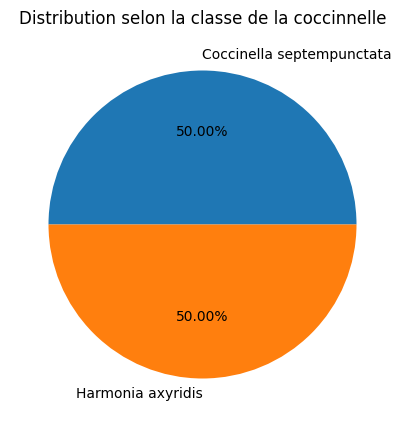

In [ ]:
Class_nbr=df_final_manual['Class'].value_counts()
Class_nbr.plot.pie(y='Class', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la classe de la coccinnelle')
plt.show()

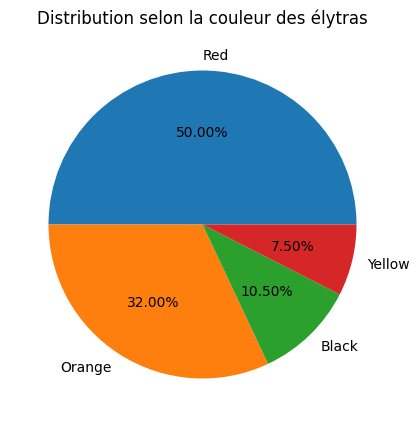

In [ ]:
Elytra_color=df_final_manual['ElytraColor'].value_counts()
Elytra_color.plot.pie(y='ElytraColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des élytras')
plt.show()

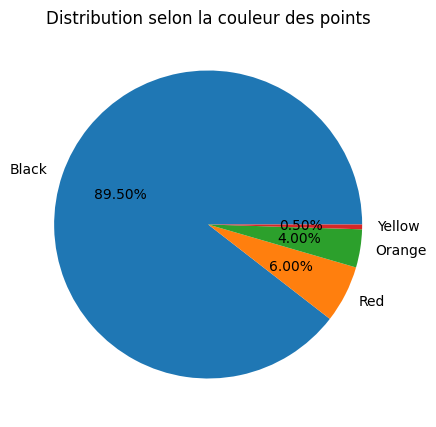

In [ ]:
Spot_color=df_final_manual['SpotColor'].value_counts()
Spot_color.plot.pie(y='SpotColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des points')
plt.show()

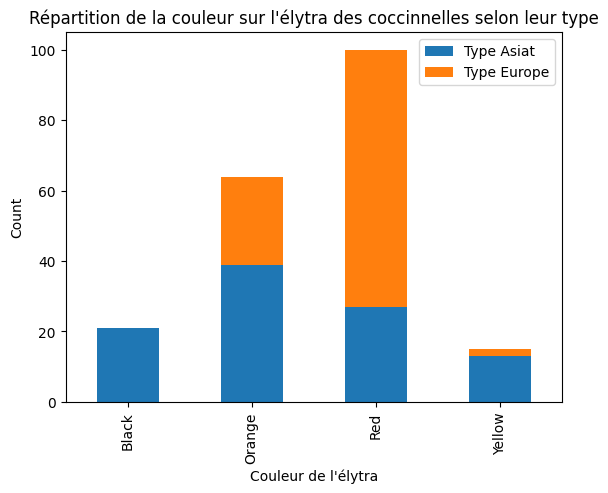

In [ ]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['ElytraColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['ElytraColor'].value_counts()
elytra_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
elytra_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur sur l'élytra des coccinnelles selon leur type")
plt.xlabel("Couleur de l'élytra")
plt.ylabel("Count")
plt.show()


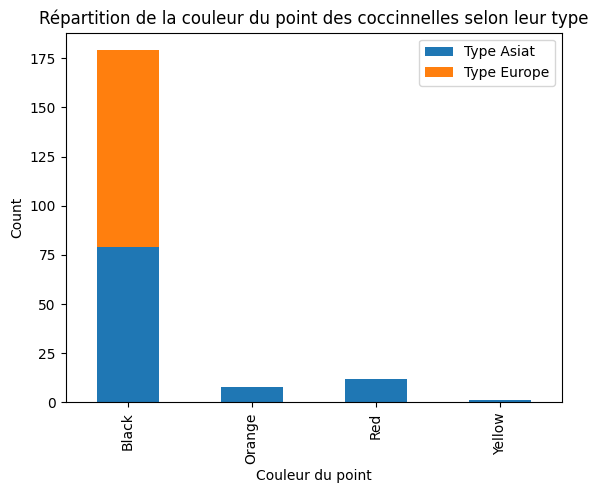

In [ ]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['SpotColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['SpotColor'].value_counts()
spot_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
spot_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur du point des coccinnelles selon leur type")
plt.xlabel("Couleur du point")
plt.ylabel("Count")
plt.show()


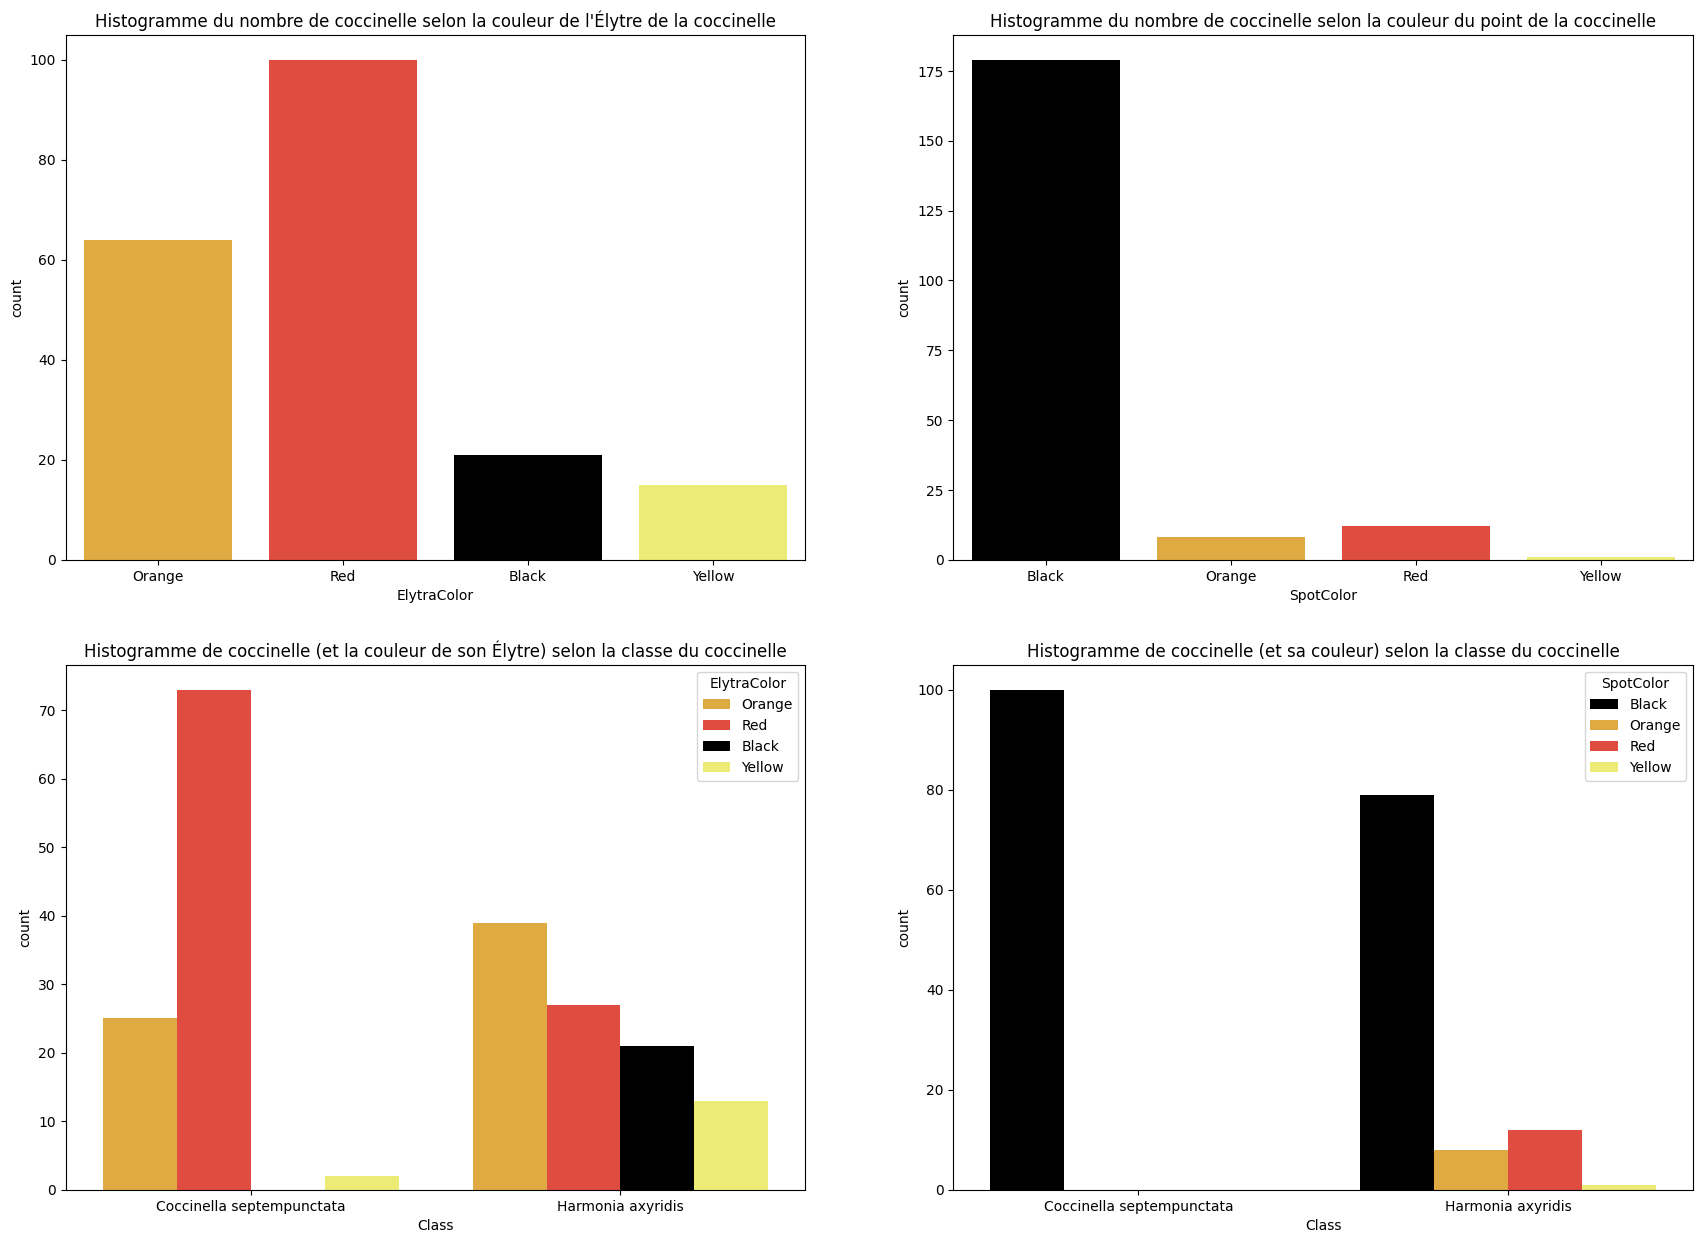

In [ ]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.countplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor",palette=palette ).set(title="Histogramme du nombre de coccinelle selon la couleur de l'Élytre de la coccinelle")
sns.countplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", palette=palette).set(title='Histogramme du nombre de coccinelle selon la couleur du point de la coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][0], x="Class", hue = "ElytraColor", palette=palette).set(title='Histogramme de coccinelle (et la couleur de son Élytre) selon la classe du coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][1], x="Class",hue = "SpotColor", palette = palette).set(title='Histogramme de coccinelle (et sa couleur) selon la classe du coccinelle')






plt.show()

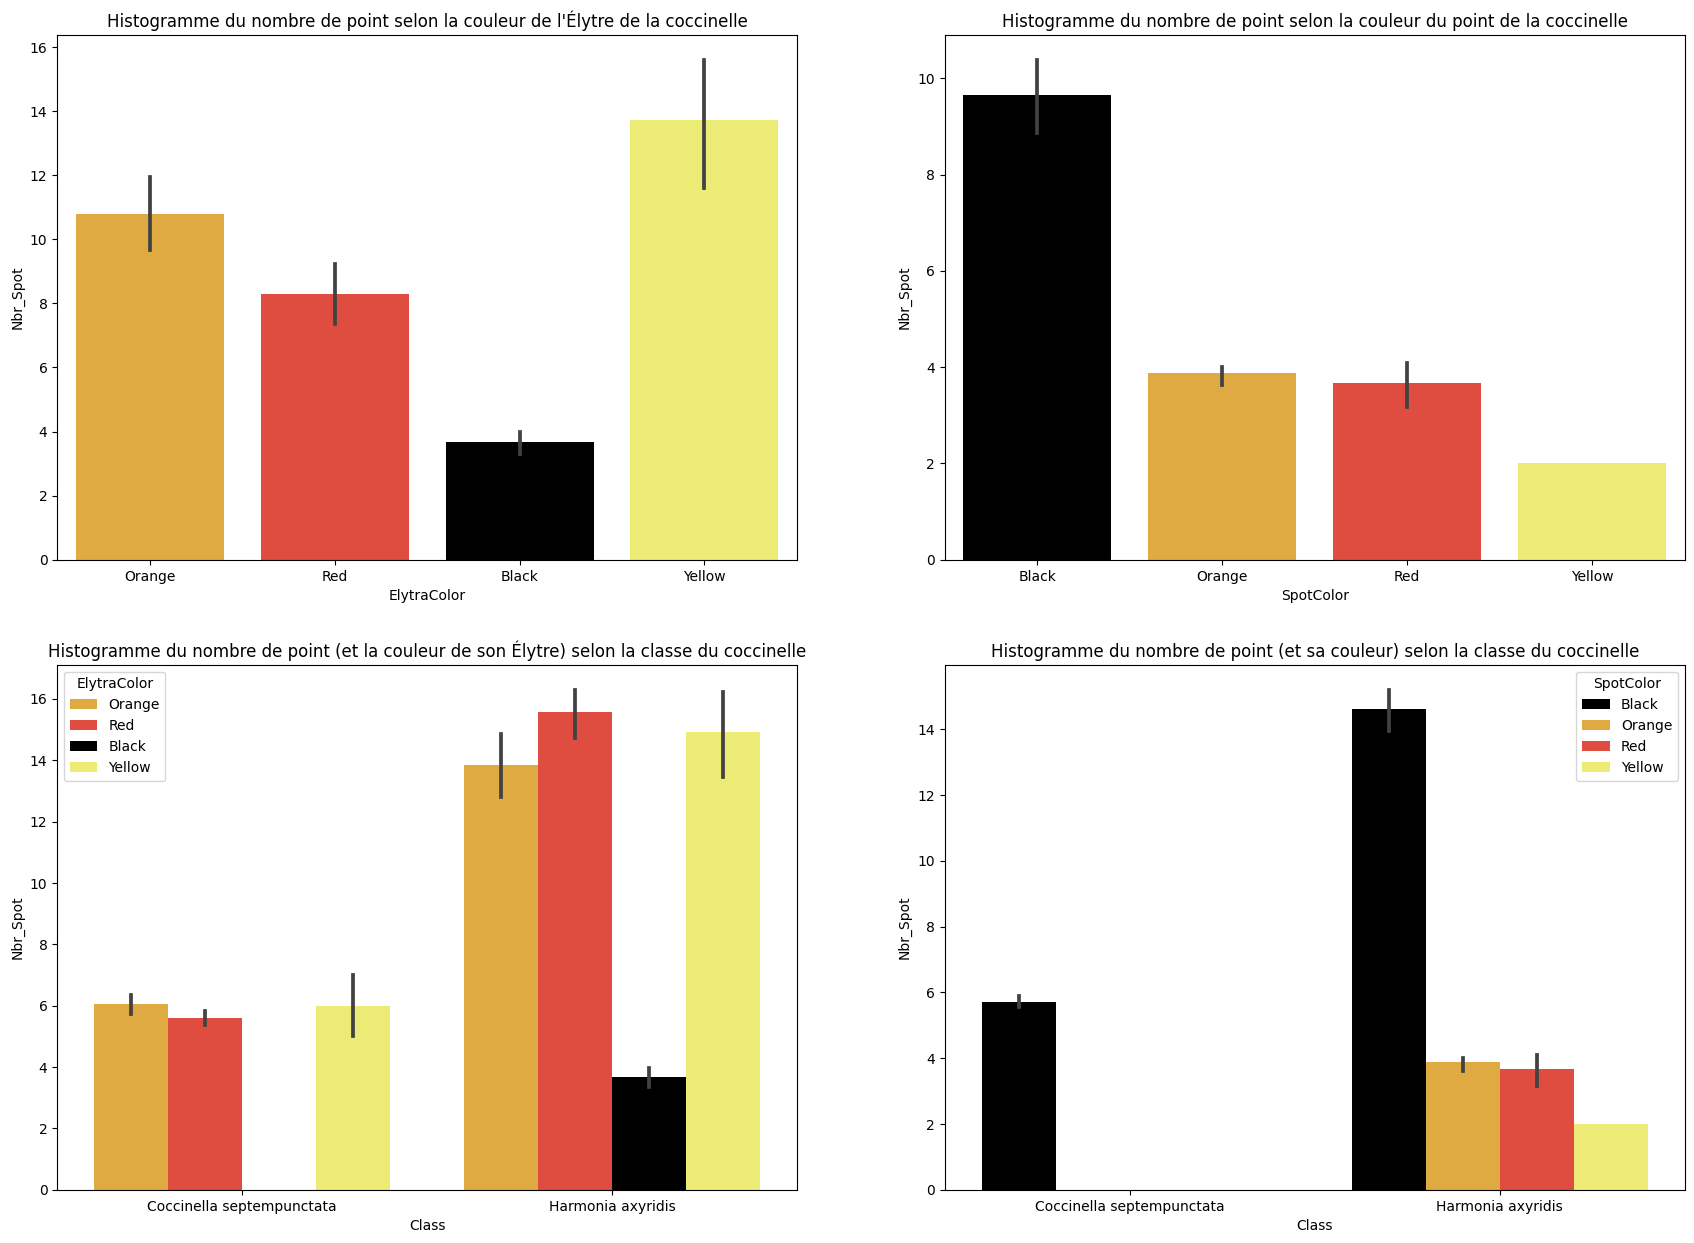

In [ ]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.barplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor", y="Nbr_Spot" ,palette=palette).set(title="Histogramme du nombre de point selon la couleur de l'Élytre de la coccinelle")
sns.barplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", y="Nbr_Spot", palette=palette).set(title='Histogramme du nombre de point selon la couleur du point de la coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][0], x="Class", y="Nbr_Spot", hue = "ElytraColor", palette=palette).set(title='Histogramme du nombre de point (et la couleur de son Élytre) selon la classe du coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][1], x="Class", y="Nbr_Spot", hue = "SpotColor", palette = palette).set(title='Histogramme du nombre de point (et sa couleur) selon la classe du coccinelle')






plt.show()

## **Analyse des dépendances des différentes features**

In [ ]:
def degree_of_freedom (df):
    degf2 = (df.shape[0] - 1 ) * (df.shape[1] - 1)
    return degf2
    
def cramer_v(df):
    n = df.sum().sum()
    chi2 = chi2_contingency(df, correction = False)[0]
    res = np.sqrt(chi2 / (n*(min(df.shape)-1)))
    return res


In [ ]:

df_crosstab1 = pd.crosstab(df_final_manual['SpotInterval'], df_final_manual['Class'], rownames = ['Number of Spot'], colnames = ['Class'])



print(f"Il y a un total de {degree_of_freedom(df_crosstab1)} degrés de liberté")
df_crosstab1

Il y a un total de 3 degrés de liberté


Class           Coccinella septempunctata  Harmonia axyridis
Number of Spot                                              
1-2                                     0                  4
3-6                                    72                 18
7                                      28                  1
8+                                      0                 77

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab1)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.8322797938027895


__Remarque__ : On rejète dans un premier temps l'hypothèse H0, on en déduit que les variables (Classe de la coccinelle et le nombre de point) ne sont pas indépendantes. De plus, comme le coefficient de Cramer est très important. On en conclut qu'il existe une relation de corrélation très significative entre les deux variables. Et qu'il sera possible de prédire l'une des variables par rapport à l'autre.

In [ ]:

df_crosstab2 = pd.crosstab(df_final_manual['ElytraColor'], df_final_manual['Class'], rownames = ['ElytraColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab2)} degrés de liberté")
df_crosstab2

Il y a un total de 3 degrés de liberté


Class        Coccinella septempunctata  Harmonia axyridis
ElytraColor                                              
Black                                0                 21
Orange                              25                 39
Red                                 73                 27
Yellow                               2                 13

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab2)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab2)}")
    

Chi2 est égale à 53.28916666666667 
p-value : 1.5907277768164958e-11 
Le coefficient de Cramer donne 0.5161839142527916


__Remarque__ : On rejète également l'hypothèse H0. On en déduit que la classe de la coccinelle et que la couleur des Élytres ne sont pas indépendantes. Par ailleurs, la coefficient de Cramer étant supérieur à 0.5. On peut considérer la relation de corrélation comme étant significatif également.

In [ ]:

df_crosstab3 = pd.crosstab(df_final_manual['SpotColor'], df_final_manual['Class'], rownames = ['SpotColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab3)} degrés de liberté")
df_crosstab3

Il y a un total de 3 degrés de liberté


Class      Coccinella septempunctata  Harmonia axyridis
SpotColor                                              
Black                            100                 79
Orange                             0                  8
Red                                0                 12
Yellow                             0                  1

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab3)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.34251778896020857


__Remarque__ : Ici l'hypothèse H0 est également rejeté. On en déduit que les variables "*SpotColor*" et "*Class*" ne sont pas indépendantes. Cela dit, étant donné que le coefficient de Cramer est inférieur à 0.5. Ainsi on ne peut pas évoquer de relation de corrélation entre ces deux variables, contrairement aux 2 cas précédents.



---



## 2. **Extraction de features (Couleur de l'Élytre, couleur du point)**

On détermine la couleur de la carapace & du point : prend en entrée les images segmentées & images colorées => renvoie en sortie une liste "*ElytraColor*" contenant la couleur de la carapace, puis d’une liste "*SpotColor*" pour la couleur du point.

In [ ]:
import numpy as np
from skimage import io, color
from scipy.spatial import distance

# Path to the image file
image_path = "/content/im-001_im.png"

# Load the image
image = io.imread(image_path)

# Convert the image to Lab color space
image_lab = color.rgb2lab(image)

# Calculate the mean color vector
color_vector = np.mean(image_lab, axis=(0, 1))

# Define the base colors
base_colors = {
    'orange': [71.27, 27.58, 77.7],
    'yellow': [97.14, -21.57, 94.48],
    'blue': [32.3, 79.2, -107.9],
    'red': [53.23, 80.11, 67.22]
}

# Calculate the distances between the color vector and each base color
distances = {color_name: distance.euclidean(color_vector, color_lab) for color_name, color_lab in base_colors.items()}

# Find the closest base color
closest_color = min(distances, key=distances.get)

# Print the color vector and the closest color
print("Color Vector: ", color_vector)
print("Closest color: ", closest_color)

Color Vector:  [41.03586503 -8.44029107 28.45714789]
Closest color:  orange


In [ ]:
import numpy as np
from skimage import io, color
from scipy.spatial import distance

# Path to the image file
image_path = "/content/im-005_im.png"

# Load the image
image = io.imread(image_path)

# Convert the image to Lab color space
image_lab = color.rgb2lab(image)

# Calculate the mean color vector
color_vector = np.mean(image_lab, axis=(0, 1))

# Define the base colors
base_colors = {
    'orange': [71.27, 27.58, 77.7],
    'yellow': [97.14, -21.57, 94.48],
    'black': [0, 0, 0],
    'red': [53.23, 80.11, 67.22]
}

# Calculate the distances between the color vector and each base color
distances = {color_name: distance.euclidean(color_vector, color_lab) for color_name, color_lab in base_colors.items()}

# Find the closest base color
closest_color = min(distances, key=distances.get)

# Extract zone 2 (shell)
shell_mask = (image_lab[:, :, 0] < 70) & (image_lab[:, :, 1] > 15) & (image_lab[:, :, 2] > 40)

# Apply the mask to the image
shell_image = image_lab.copy()
shell_image[~shell_mask] = 0

# Calculate the mean color vector of the shell
shell_color_vector = np.mean(shell_image, axis=(0, 1))

# Calculate the distances between the shell color vector and each base color
shell_distances = {color_name: distance.euclidean(shell_color_vector, color_lab) for color_name, color_lab in base_colors.items()}

# Find the closest base color for the shell
closest_shell_color = min(shell_distances, key=shell_distances.get)

# Print the color vectors and the closest colors
print("Color Vector: ", color_vector)
print("Closest color: ", closest_color)
print("Shell Color Vector: ", shell_color_vector)
print("Closest shell color: ", closest_shell_color)

Color Vector:  [53.86241731 -5.35371289 31.10732999]
Closest color:  orange
Shell Color Vector:  [5.63753582 5.50118412 5.43342592]
Closest shell color:  black


**TECHNIQUE DE PAUL : QUI MARCHE**

In [ ]:
import matplotlib.image as mpimg
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

image_ini = []
image_gris = []

im_size = 150

# Create the "new seg" folder if it doesn't exist
folder_name = "New_Image_Seg"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

folder_name2 = "Resized_Image"
if not os.path.exists(folder_name2):
    os.makedirs(folder_name2)

for k in range(0, 201):
    try:
        image_ini.append(np.array(Image.open(fr"im-{k:03}_im.png").convert("RGB").resize((im_size, im_size))))
        image_gris.append(np.array(Image.open(fr"im-{k:03}_seg.png").convert("L").resize((im_size, im_size))))
        save_path = os.path.join(folder_name, fr"im-{k:03}_new_seg.png")
        mpimg.imsave(save_path, image_gris[k-1], cmap="gray") 
        save_path2 = os.path.join(folder_name2, fr"im-{k:03}_im.png")
        mpimg.imsave(save_path2, image_ini[k-1])
    except(IOError, OSError):
        pass

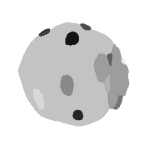

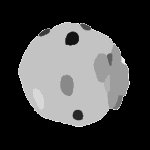

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the grayscale image
image_gray = cv2.imread('New_Image_Seg/im-006_new_seg.png', cv2.IMREAD_GRAYSCALE)

# Get the value of the first pixel
first_pixel_value = image_gray[0, 0]

# Create a mask with the same size as the image
mask_cocci = np.zeros_like(image_gray)
mask_fond = np.zeros_like(image_gray)
# Set pixels with the same value as the first pixel to 255 in the mask
mask_cocci[image_gray != first_pixel_value] = 255
#cv2_imshow(mask_cocci)
mask_fond[image_gray == first_pixel_value] = 255
#cv2_imshow(mask_fond)

# Apply the mask to the image
image_result_fond = cv2.bitwise_and(image_gray, mask_fond)
image_result_cocci = cv2.bitwise_and(image_gray, mask_cocci)

# Display the original and resulting image using cv2_imshow()
cv2_imshow(image_gray)
cv2_imshow(image_result_cocci)


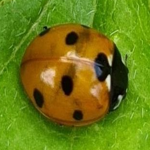

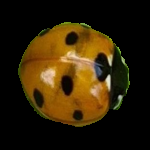

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the RGB colored image
image_rgb = cv2.imread('Resized_Image/im-006_im.png', cv2.IMREAD_COLOR)

# Get the value of the first pixel from the grayscale image
image_gray = cv2.imread('New_Image_Seg/im-006_new_seg.png', cv2.IMREAD_GRAYSCALE)
first_pixel_value = image_gray[0, 0]

# Create a mask with the same size as the RGB image
mask_cocci = np.zeros_like(image_rgb[:, :, 0])  # Create mask with the same width and height as the RGB image

# Set pixels with the same value as the first pixel to 255 in the mask
mask_cocci[image_gray != first_pixel_value] = 255

# Apply the mask to each channel of the RGB image
image_result_cocci = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cocci)

# Display the original RGB image and the resulting image using cv2_imshow()
cv2_imshow(image_rgb)
cv2_imshow(image_result_cocci)


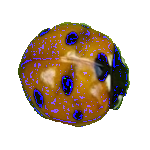

In [ ]:
background_pixel_value = image_result_cocci[0, 0]

# Create a mask for the background pixels
background_mask = (image_result_cocci == background_pixel_value)

# Set the background pixels to 255
image_result_cocci[background_mask] = 255

# Display the resulting image
cv2_imshow(image_result_cocci)

In [ ]:


folder_name3 = "No_Background_Image"
if not os.path.exists(folder_name3):
    os.makedirs(folder_name3)

for k in range(1, 201):
    try:
        # Load the RGB colored image
        image_rgb = cv2.imread(f'Resized_Image/im-{k:03}_im.png', cv2.IMREAD_COLOR)

        # Load the segmented grayscale image
        image_gray = cv2.imread(f'New_Image_Seg/im-{k:03}_new_seg.png', cv2.IMREAD_GRAYSCALE)

        # Check if image_gray is None (not loaded)
        if image_gray is None:
            raise Exception(f"Failed to load image: New_Image_Seg/im-{k:03}_new_seg.png")

        # Get the value of the first pixel from the grayscale image
        first_pixel_value = image_gray[0, 0]

        # Create a mask with the same size as the RGB image
        mask_cocci = np.zeros_like(image_rgb[:, :, 0])  # Create mask with the same width and height as the RGB image

        # Set pixels with the same value as the first pixel to 255 in the mask
        mask_cocci[image_gray != first_pixel_value] = 255

        # Apply the mask to each channel of the RGB image
        image_result_cocci = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cocci)

        # Display the original RGB image and the resulting image using cv2_imshow()
        #cv2_imshow(image_rgb)
        #cv2_imshow(image_result_cocci)



        background_pixel_value = image_result_cocci[0, 0]
        background_mask = (image_result_cocci == background_pixel_value)
        image_result_cocci[background_mask] = 255
        #cv2_imshow(image_result_cocci)

        save_path3 = os.path.join(folder_name3, fr"im-{k:03}_im.png")
        #mpimg.imsave(save_path3, image_result_cocci) # cette méthode de save renvoie des images teints bleu
        cv2.imwrite(save_path3, image_result_cocci) # cette méthode réduit l'effet lumière bleu en save




    except Exception as e:
        print(f"Error processing image {k}: {e}")


In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

def plot_color_histogram(image):
    # Convertir l'image en espace de couleurs Lab
    lab_image = color.rgb2lab(image)

    # Redimensionner l'image pour accélérer le processus de segmentation
    resized_image = lab_image.reshape(-1, 3)

    # Utiliser l'algorithme K-means pour segmenter les couleurs
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(resized_image)

    # Récupérer les étiquettes des clusters et les compter
    labels = kmeans.labels_
    counts = np.bincount(labels)

    # Trouver les couleurs des clusters
    cluster_colors_lab = kmeans.cluster_centers_
    cluster_colors_rgb = [color.lab2rgb([[clr]])[0][0] for clr in cluster_colors_lab]

    # Récupérer les indices des clusters triés par ordre décroissant de nombre de pixels
    sorted_indices = np.argsort(counts)[::-1]

    # Stocker les codes couleurs RGB des trois clusters suivants dans un DataFrame (sans la dernière ligne)
    dominant_colors = []
    for i in range(1, 4):  # Ignorer le premier cluster
        cluster_index = sorted_indices[i]
        dominant_colors.append(cluster_colors_rgb[cluster_index])
    
    df = pd.DataFrame(dominant_colors, columns=['R', 'G', 'B'])

    # Afficher les codes couleurs de chaque cluster et le nombre de pixels correspondant
    for i, clr in enumerate(cluster_colors_rgb):
        print(f"Cluster {i+1}:")
        print(f"   Code couleur Lab: {cluster_colors_lab[i]}")
        print(f"   Code couleur RGB: {clr}")
        print(f"   Nombre de pixels: {counts[i]}")
        print()

    # Créer une figure pour afficher l'histogramme des couleurs
    fig, ax = plt.subplots()

    # Afficher l'histogramme des couleurs
    ax.bar(range(len(counts)), counts, color=cluster_colors_rgb)

    # Définir les étiquettes des axes
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Nombre de pixels')

    # Afficher la légende avec les couleurs correspondantes
    legend_labels = [f'Couleur dominante {i+1}' for i in range(len(cluster_colors_rgb))]
    ax.legend(legend_labels, loc='upper right')

    # Afficher la figure
    plt.show()

    return df.iloc[:-1]  # Exclure la dernière ligne du DataFrame



lancer ça seulement pour voir avec 1 seul image

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 2:
   Code couleur Lab: [54.58696552 18.05609341 54.85139034]
   Code couleur RGB: [0.70725537 0.4584999  0.10724552]
   Nombre de pixels: 3551

Cluster 3:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977

Cluster 4:
   Code couleur Lab: [16.92184396  4.56540437 14.88085482]
   Code couleur RGB: [0.21300204 0.15231513 0.0803271 ]
   Nombre de pixels: 2577



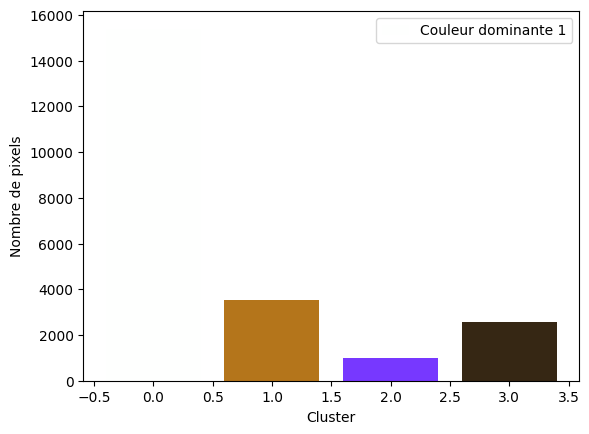

DataFrame avec les codes couleurs RGB des trois clusters suivants (sans la première couleur et sans la dernière ligne) :
          R         G         B
0  0.707255  0.458500  0.107246
1  0.213002  0.152315  0.080327


In [ ]:

# Charger l'image de la coccinelle
image = io.imread('No_Background_Image/im-004_im.png')

# Afficher l'histogramme des couleurs des élytres et stocker les codes couleurs dominants des trois clusters suivants dans un DataFrame
df_colors = plot_color_histogram(image)

# Afficher le DataFrame avec les codes couleurs RGB des trois clusters suivants (sans la première couleur et sans la dernière ligne)
print("DataFrame avec les codes couleurs RGB des trois clusters suivants (sans la première couleur et sans la dernière ligne) :")
print(df_colors)

lancer ça pour généraliser sur k images

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.59003077  0.10359494  0.29040774]
   Code couleur RGB: [0.99722021 0.99499869 0.99318887]
   Nombre de pixels: 15317

Cluster 2:
   Code couleur Lab: [36.96988761 22.70974981 39.7222933 ]
   Code couleur RGB: [0.52108643 0.27801244 0.07879802]
   Nombre de pixels: 2828

Cluster 3:
   Code couleur Lab: [15.01585906  4.3383898   3.43427652]
   Code couleur RGB: [0.17890479 0.13905791 0.12959618]
   Nombre de pixels: 1199

Cluster 4:
   Code couleur Lab: [61.98603222 18.60651858 50.34978192]
   Code couleur RGB: [0.79334343 0.53150598 0.22801596]
   Nombre de pixels: 3156



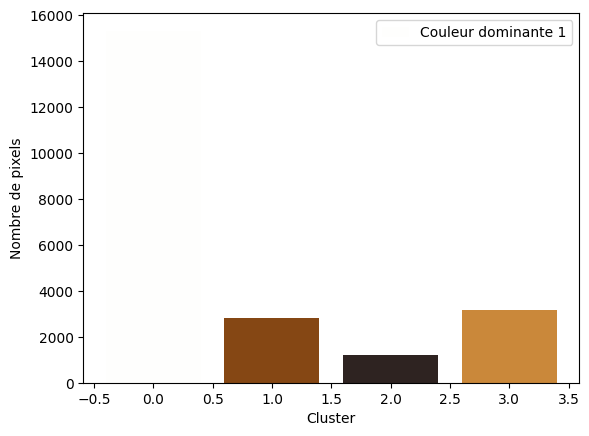

DataFrame pour l'image im-001_im.png :
          R         G         B
0  0.793343  0.531506  0.228016
1  0.521086  0.278012  0.078798
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [57.85900611 20.46225031 48.81623611]
   Code couleur RGB: [0.7539887  0.48489033 0.20117527]
   Nombre de pixels: 8169

Cluster 2:
   Code couleur Lab: [ 54.69705728  64.19074389 -70.51881926]
   Code couleur RGB: [0.6695671  0.34050002 1.        ]
   Nombre de pixels: 232

Cluster 3:
   Code couleur Lab: [33.3592104   1.29233644  1.31877408]
   Code couleur RGB: [0.31957437 0.30468659 0.29964594]
   Nombre de pixels: 2373

Cluster 4:
   Code couleur Lab: [ 9.97094057e+01 -1.18427940e-03  1.88116827e-01]
   Code couleur RGB: [0.99736303 0.99663968 0.99530576]
   Nombre de pixels: 11726



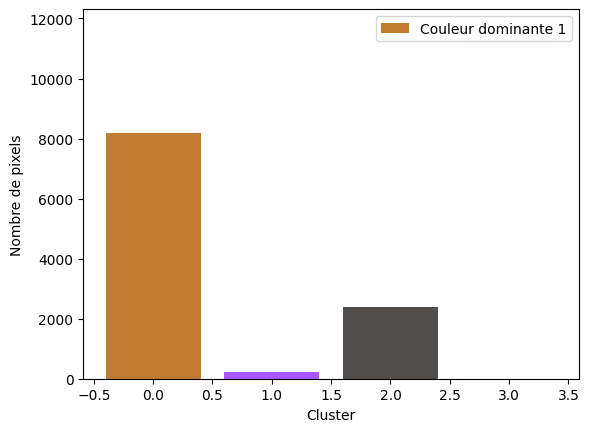

DataFrame pour l'image im-002_im.png :
          R         G         B
0  0.753989  0.484890  0.201175
1  0.319574  0.304687  0.299646
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.39118207  3.80143729 12.55544175]
   Code couleur RGB: [0.27444288 0.21730406 0.15399886]
   Nombre de pixels: 4362

Cluster 2:
   Code couleur Lab: [98.16185766  0.14554953  0.39310323]
   Code couleur RGB: [0.98171991 0.978671   0.97622781]
   Nombre de pixels: 13295

Cluster 3:
   Code couleur Lab: [46.53627835 36.05165776 36.92763645]
   Code couleur RGB: [0.69311115 0.32383376 0.19437885]
   Nombre de pixels: 4392

Cluster 4:
   Code couleur Lab: [  35.39328381   80.24346287 -102.65188831]
   Code couleur RGB: [0.29063517 0.00248472 1.        ]
   Nombre de pixels: 451



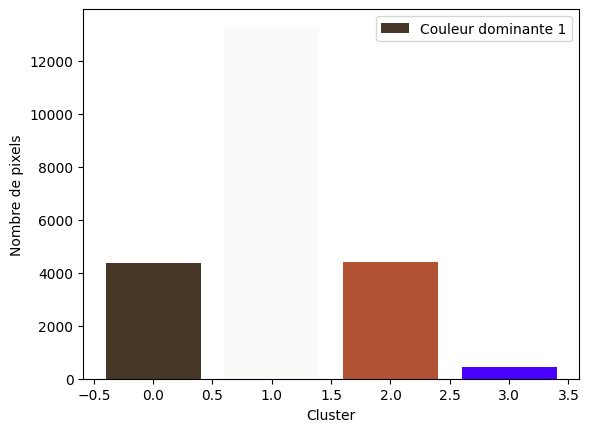

DataFrame pour l'image im-003_im.png :
          R         G         B
0  0.693111  0.323834  0.194379
1  0.274443  0.217304  0.153999
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [17.03202098  4.56623019 14.96286482]
   Code couleur RGB: [0.21408939 0.15320806 0.08070012]
   Nombre de pixels: 2585

Cluster 2:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 3:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977

Cluster 4:
   Code couleur Lab: [54.63407859 18.10123334 54.92692652]
   Code couleur RGB: [0.70809197 0.45883321 0.10695274]
   Nombre de pixels: 3543



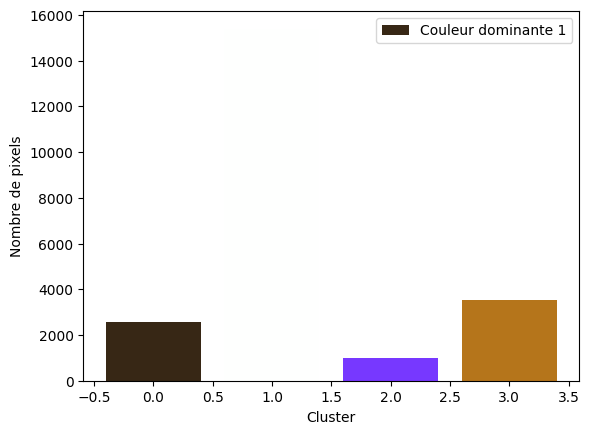

DataFrame pour l'image im-004_im.png :
          R         G         B
0  0.708092  0.458833  0.106953
1  0.214089  0.153208  0.080700
--------------------------------------


In [ ]:
for k in range(1, 5):
    try:
        # Charger l'image en couleur RGB
        image = io.imread(f'No_Background_Image/im-{k:03}_im.png')

        # Appliquer la fonction plot_color_histogram pour chaque image
        df_colors = plot_color_histogram(image)

        # Afficher le DataFrame avec les codes couleurs RGB des trois clusters suivants (sans la première couleur et sans la dernière ligne)
        print(f"DataFrame pour l'image im-{k:03}_im.png :")
        print(df_colors)
        print("--------------------------------------")
    except FileNotFoundError:
        print(f"Erreur : Fichier im-{k:03}_im.png non trouvé.")


In [ ]:
df_colors

R         G         B
0  0.708092  0.458833  0.106953
1  0.214089  0.153208  0.080700

technique 1 extraction de couleurs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [15.01020571  4.32642153  3.41924752]
   Code couleur RGB: [0.17876788 0.13903872 0.12963131]
   Nombre de pixels: 1199

Cluster 2:
   Code couleur Lab: [99.59003077  0.10359494  0.29040774]
   Code couleur RGB: [0.99722021 0.99499869 0.99318887]
   Nombre de pixels: 15317

Cluster 3:
   Code couleur Lab: [61.94914215 18.61910676 50.34001666]
   Code couleur RGB: [0.79297258 0.531098   0.22773907]
   Nombre de pixels: 3160

Cluster 4:
   Code couleur Lab: [36.92607109 22.70729206 39.69285928]
   Code couleur RGB: [0.52057069 0.27761756 0.07863886]
   Nombre de pixels: 2824



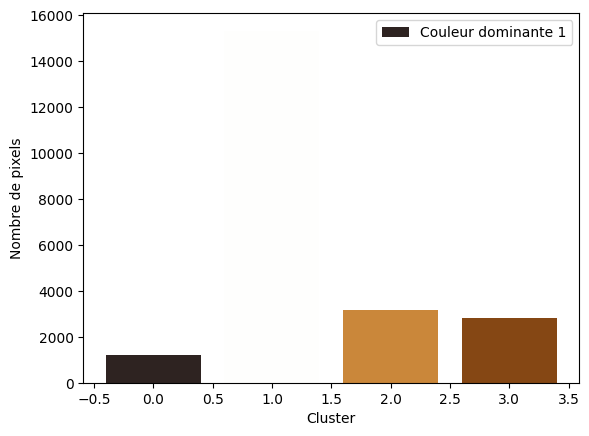

DataFrame pour l'image im-001_im.png:
        Image_id         R         G         B
0  im-001_im.png  0.792973  0.531098  0.227739
1  im-001_im.png  0.520571  0.277618  0.078639
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97094057e+01 -1.18427940e-03  1.88116827e-01]
   Code couleur RGB: [0.99736303 0.99663968 0.99530576]
   Nombre de pixels: 11726

Cluster 2:
   Code couleur Lab: [57.86037891 20.46450609 48.8187677 ]
   Code couleur RGB: [0.75401894 0.48489734 0.2011683 ]
   Nombre de pixels: 8169

Cluster 3:
   Code couleur Lab: [33.3648054   1.29265093  1.33006753]
   Code couleur RGB: [0.31965834 0.30473459 0.29962791]
   Nombre de pixels: 2373

Cluster 4:
   Code couleur Lab: [ 54.69705728  64.19074389 -70.51881926]
   Code couleur RGB: [0.6695671  0.34050002 1.        ]
   Nombre de pixels: 232



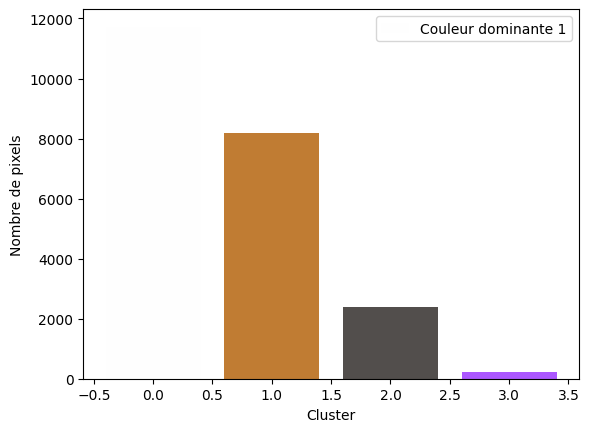

DataFrame pour l'image im-002_im.png:
        Image_id         R         G         B
0  im-001_im.png  0.792973  0.531098  0.227739
1  im-001_im.png  0.520571  0.277618  0.078639
2  im-002_im.png  0.754019  0.484897  0.201168
3  im-002_im.png  0.319658  0.304735  0.299628
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.16717656  0.14659095  0.39042611]
   Code couleur RGB: [0.98177909 0.97872949 0.97630839]
   Nombre de pixels: 13295

Cluster 2:
   Code couleur Lab: [24.42400351  3.81025485 12.57598565]
   Code couleur RGB: [0.27482298 0.21756726 0.15415044]
   Nombre de pixels: 4363

Cluster 3:
   Code couleur Lab: [  35.39328381   80.24346287 -102.65188831]
   Code couleur RGB: [0.29063517 0.00248472 1.        ]
   Nombre de pixels: 451

Cluster 4:
   Code couleur Lab: [46.54637168 36.07479435 36.93753389]
   Code couleur RGB: [0.69334999 0.32384362 0.19440768]
   Nombre de pixels: 4391



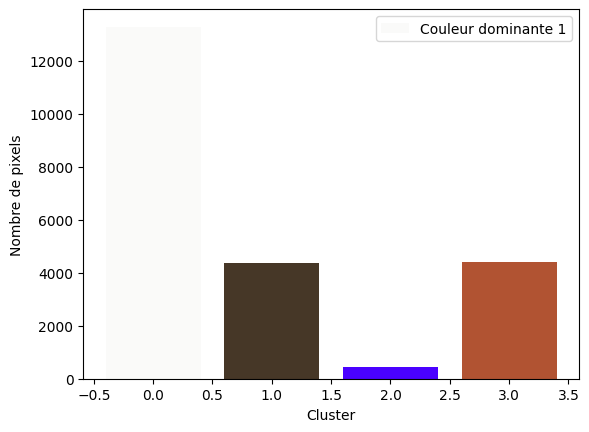

DataFrame pour l'image im-003_im.png:
        Image_id         R         G         B
0  im-001_im.png  0.792973  0.531098  0.227739
1  im-001_im.png  0.520571  0.277618  0.078639
2  im-002_im.png  0.754019  0.484897  0.201168
3  im-002_im.png  0.319658  0.304735  0.299628
4  im-003_im.png  0.693350  0.323844  0.194408
5  im-003_im.png  0.274823  0.217567  0.154150
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 2:
   Code couleur Lab: [17.09998425  4.5863837  15.01581493]
   Code couleur RGB: [0.21485645 0.15371894 0.08092047]
   Nombre de pixels: 2587

Cluster 3:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977

Cluster 4:
   Code couleur Lab: [54.66928557 18.11707627 54.97852693]
   Code couleur RGB: [0.70861898 0.45913228 0.10677561]
   Nombre de pixels: 3541



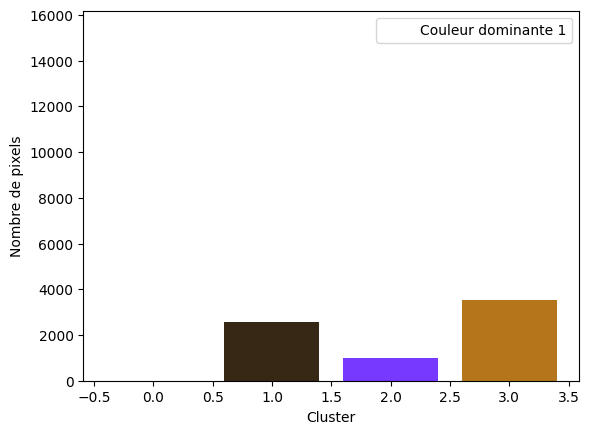

DataFrame pour l'image im-004_im.png:
        Image_id         R         G         B
0  im-001_im.png  0.792973  0.531098  0.227739
1  im-001_im.png  0.520571  0.277618  0.078639
2  im-002_im.png  0.754019  0.484897  0.201168
3  im-002_im.png  0.319658  0.304735  0.299628
4  im-003_im.png  0.693350  0.323844  0.194408
5  im-003_im.png  0.274823  0.217567  0.154150
6  im-004_im.png  0.708619  0.459132  0.106776
7  im-004_im.png  0.214856  0.153719  0.080920
--------------------------------------


In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

def plot_color_histogram(image, image_id, df):
    # Convertir l'image en espace de couleurs Lab
    lab_image = color.rgb2lab(image)

    # Redimensionner l'image pour accélérer le processus de segmentation
    resized_image = lab_image.reshape(-1, 3)

    # Utiliser l'algorithme K-means pour segmenter les couleurs
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(resized_image)

    # Récupérer les étiquettes des clusters et les compter
    labels = kmeans.labels_
    counts = np.bincount(labels)

    # Trouver les couleurs des clusters
    cluster_colors_lab = kmeans.cluster_centers_
    cluster_colors_rgb = [color.lab2rgb([[clr]])[0][0] for clr in cluster_colors_lab]

    # Récupérer les indices des clusters triés par ordre décroissant de nombre de pixels
    sorted_indices = np.argsort(counts)[::-1]

    # Stocker les codes couleurs RGB des trois clusters suivants dans un DataFrame (sans la dernière ligne)
    dominant_colors = []
    for i in range(1, 4):  # Ignorer le premier cluster
        cluster_index = sorted_indices[i]
        dominant_colors.append(cluster_colors_rgb[cluster_index])
    
    # Créer un DataFrame temporaire pour les couleurs de l'image actuelle
    df_temp = pd.DataFrame(dominant_colors, columns=['R', 'G', 'B'])
    df_temp['Image_id'] = image_id  # Ajouter le nom de l'image comme colonne 'Image ID'

    # Ajouter le DataFrame temporaire au DataFrame global
    df = pd.concat([df, df_temp], ignore_index=True)

    # Afficher les codes couleurs de chaque cluster et le nombre de pixels correspondant
    for i, clr in enumerate(cluster_colors_rgb):
        print(f"Cluster {i+1}:")
        print(f"   Code couleur Lab: {cluster_colors_lab[i]}")
        print(f"   Code couleur RGB: {clr}")
        print(f"   Nombre de pixels: {counts[i]}")
        print()

    # Créer une figure pour afficher l'histogramme des couleurs
    fig, ax = plt.subplots()

    # Afficher l'histogramme des couleurs
    ax.bar(range(len(counts)), counts, color=cluster_colors_rgb)

    # Définir les étiquettes des axes
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Nombre de pixels')

    # Afficher la légende avec les couleurs correspondantes
    legend_labels = [f'Couleur dominante {i+1}' for i in range(len(cluster_colors_rgb))]
    ax.legend(legend_labels, loc='upper right')

    # Afficher la figure
    plt.show()

    return df.iloc[:-1]  # Exclure la dernière ligne du DataFrame

df_colors = pd.DataFrame(columns=['Image_id','R', 'G', 'B'])  # DataFrame global pour les couleurs

for k in range(1, 5):
    try:
        # Charger l'image en couleur RGB
        image = io.imread(f'No_Background_Image/im-{k:03}_im.png')
        image_id = f'im-{k:03}_im.png'

        # Appliquer la fonction plot_color_histogram pour chaque image et mettre à jour le DataFrame df_colors
        df_colors = plot_color_histogram(image, image_id, df_colors)

        # Afficher le DataFrame avec les codes couleurs RGB des trois clusters suivants (sans la première couleur et sans la dernière ligne)
        print(f"DataFrame pour l'image {image_id}:")
        print(df_colors)
        print("--------------------------------------")
    except FileNotFoundError:
        print(f"Erreur : Fichier im-{k:03}_im.png non trouvé.")


In [ ]:
df_colors

Image_id         R         G         B
0  im-001_im.png  0.792973  0.531098  0.227739
1  im-001_im.png  0.520571  0.277618  0.078639
2  im-002_im.png  0.754019  0.484897  0.201168
3  im-002_im.png  0.319658  0.304735  0.299628
4  im-003_im.png  0.693350  0.323844  0.194408
5  im-003_im.png  0.274823  0.217567  0.154150
6  im-004_im.png  0.708619  0.459132  0.106776
7  im-004_im.png  0.214856  0.153719  0.080920

technique 2 d'extraction de couleurs : qui regroupe tout ensemble

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.59003077  0.10359494  0.29040774]
   Code couleur RGB: [0.99722021 0.99499869 0.99318887]
   Nombre de pixels: 15317

Cluster 2:
   Code couleur Lab: [61.89972096 18.64464795 50.34166919]
   Code couleur RGB: [0.79253652 0.53052557 0.22724716]
   Nombre de pixels: 3163

Cluster 3:
   Code couleur Lab: [14.98998137  4.32183505  3.4093094 ]
   Code couleur RGB: [0.17855407 0.13888558 0.12952263]
   Nombre de pixels: 1198

Cluster 4:
   Code couleur Lab: [36.88478727 22.68985553 39.64065608]
   Code couleur RGB: [0.51999906 0.27729455 0.07870191]
   Nombre de pixels: 2822



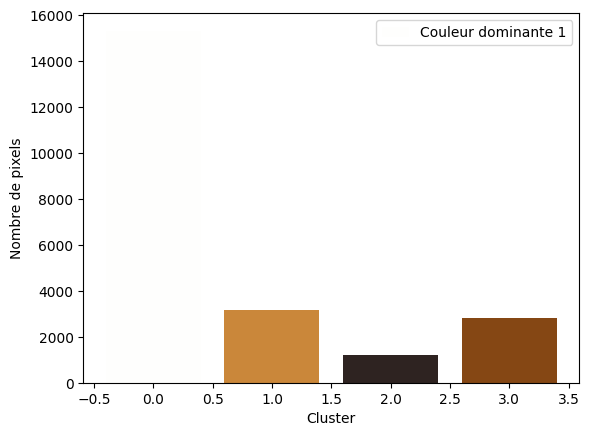

DataFrame pour l'image im-001_im.png:
                    Image_id  \
im-001_im.png  im-001_im.png   

                                                     ElytraColor  \
im-001_im.png  [0.7925365180145765, 0.5305255665537573, 0.227...   

                                                       SpotColor  
im-001_im.png  [0.5199990580611303, 0.2772945485527492, 0.078...  
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [57.86037891 20.46450609 48.8187677 ]
   Code couleur RGB: [0.75401894 0.48489734 0.2011683 ]
   Nombre de pixels: 8169

Cluster 2:
   Code couleur Lab: [ 9.97094057e+01 -1.18427940e-03  1.88116827e-01]
   Code couleur RGB: [0.99736303 0.99663968 0.99530576]
   Nombre de pixels: 11726

Cluster 3:
   Code couleur Lab: [33.3648054   1.29265093  1.33006753]
   Code couleur RGB: [0.31965834 0.30473459 0.29962791]
   Nombre de pixels: 2373

Cluster 4:
   Code couleur Lab: [ 54.69705728  64.19074389 -70.51881926]
   Code couleur RGB: [0.6695671  0.34050002 1.        ]
   Nombre de pixels: 232



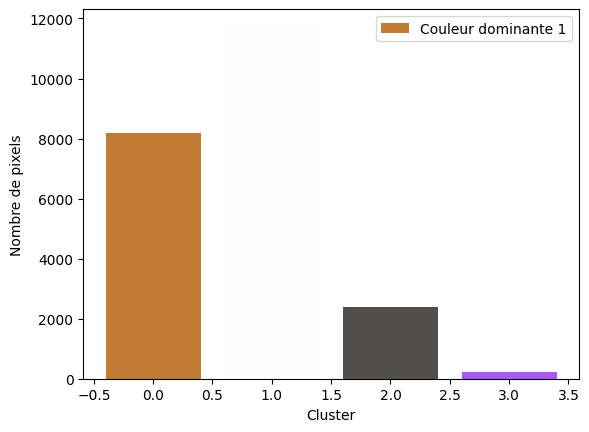

DataFrame pour l'image im-002_im.png:
                    Image_id  \
im-001_im.png  im-001_im.png   
im-002_im.png  im-002_im.png   

                                                     ElytraColor  \
im-001_im.png  [0.7925365180145765, 0.5305255665537573, 0.227...   
im-002_im.png  [0.7540189423514975, 0.484897336647877, 0.2011...   

                                                       SpotColor  
im-001_im.png  [0.5199990580611303, 0.2772945485527492, 0.078...  
im-002_im.png  [0.3196583415155817, 0.3047345870553861, 0.299...  
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.44776273  3.8435545  12.60007134]
   Code couleur RGB: [0.27525306 0.21770114 0.15420979]
   Nombre de pixels: 4371

Cluster 2:
   Code couleur Lab: [98.16717656  0.14659095  0.39042611]
   Code couleur RGB: [0.98177909 0.97872949 0.97630839]
   Nombre de pixels: 13294

Cluster 3:
   Code couleur Lab: [  35.39328381   80.24346287 -102.65188831]
   Code couleur RGB: [0.29063517 0.00248472 1.        ]
   Nombre de pixels: 451

Cluster 4:
   Code couleur Lab: [46.56809248 36.10782229 36.96352687]
   Code couleur RGB: [0.69378511 0.32392789 0.19442939]
   Nombre de pixels: 4384



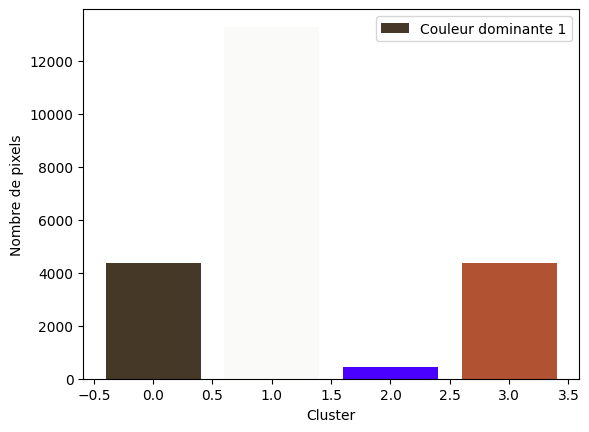

DataFrame pour l'image im-003_im.png:
                    Image_id  \
im-001_im.png  im-001_im.png   
im-002_im.png  im-002_im.png   
im-003_im.png  im-003_im.png   

                                                     ElytraColor  \
im-001_im.png  [0.7925365180145765, 0.5305255665537573, 0.227...   
im-002_im.png  [0.7540189423514975, 0.484897336647877, 0.2011...   
im-003_im.png  [0.6937851051544279, 0.32392789238707925, 0.19...   

                                                       SpotColor  
im-001_im.png  [0.5199990580611303, 0.2772945485527492, 0.078...  
im-002_im.png  [0.3196583415155817, 0.3047345870553861, 0.299...  
im-003_im.png  [0.27525305662010674, 0.21770114469712248, 0.1...  
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [54.60013892 18.07880707 54.87639019]
   Code couleur RGB: [0.70754542 0.45856482 0.10712655]
   Nombre de pixels: 3548

Cluster 2:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 3:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977

Cluster 4:
   Code couleur Lab: [16.96211302  4.55509729 14.908444  ]
   Code couleur RGB: [0.21334643 0.15266329 0.08047525]
   Nombre de pixels: 2580



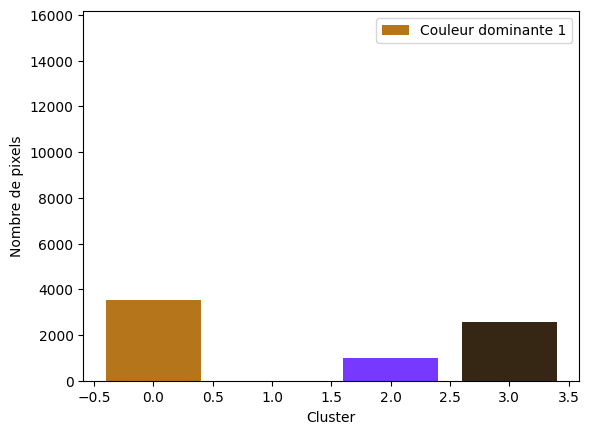

DataFrame pour l'image im-004_im.png:
                    Image_id  \
im-001_im.png  im-001_im.png   
im-002_im.png  im-002_im.png   
im-003_im.png  im-003_im.png   
im-004_im.png  im-004_im.png   

                                                     ElytraColor  \
im-001_im.png  [0.7925365180145765, 0.5305255665537573, 0.227...   
im-002_im.png  [0.7540189423514975, 0.484897336647877, 0.2011...   
im-003_im.png  [0.6937851051544279, 0.32392789238707925, 0.19...   
im-004_im.png  [0.707545424328027, 0.45856481580146474, 0.107...   

                                                       SpotColor  
im-001_im.png  [0.5199990580611303, 0.2772945485527492, 0.078...  
im-002_im.png  [0.3196583415155817, 0.3047345870553861, 0.299...  
im-003_im.png  [0.27525305662010674, 0.21770114469712248, 0.1...  
im-004_im.png  [0.21334642983017071, 0.15266328599685558, 0.0...  
--------------------------------------


In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

def plot_color_histogram(image, image_id, df):
    # Convertir l'image en espace de couleurs Lab
    lab_image = color.rgb2lab(image)

    # Redimensionner l'image pour accélérer le processus de segmentation
    resized_image = lab_image.reshape(-1, 3)

    # Utiliser l'algorithme K-means pour segmenter les couleurs
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(resized_image)

    # Récupérer les étiquettes des clusters et les compter
    labels = kmeans.labels_
    counts = np.bincount(labels)

    # Trouver les couleurs des clusters
    cluster_colors_lab = kmeans.cluster_centers_
    cluster_colors_rgb = [color.lab2rgb([[clr]])[0][0] for clr in cluster_colors_lab]

    # Récupérer les indices des clusters triés par ordre décroissant de nombre de pixels
    sorted_indices = np.argsort(counts)[::-1]

    # Stocker les codes couleurs RGB de la première et deuxième couleur dominante
    elytra_color = cluster_colors_rgb[sorted_indices[1]]
    spot_color = cluster_colors_rgb[sorted_indices[2]]

    # Créer une série avec les codes couleurs et les utiliser pour mettre à jour le DataFrame
    color_series = pd.Series([elytra_color, spot_color], index=['ElytraColor', 'SpotColor'])
    df.loc[image_id] = color_series

    # Afficher les codes couleurs de chaque cluster et le nombre de pixels correspondant
    for i, clr in enumerate(cluster_colors_rgb):
        print(f"Cluster {i+1}:")
        print(f"   Code couleur Lab: {cluster_colors_lab[i]}")
        print(f"   Code couleur RGB: {clr}")
        print(f"   Nombre de pixels: {counts[i]}")
        print()

    # Créer une figure pour afficher l'histogramme des couleurs
    fig, ax = plt.subplots()

    # Afficher l'histogramme des couleurs
    ax.bar(range(len(counts)), counts, color=cluster_colors_rgb)

    # Définir les étiquettes des axes
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Nombre de pixels')

    # Afficher la légende avec les couleurs correspondantes
    legend_labels = [f'Couleur dominante {i+1}' for i in range(len(cluster_colors_rgb))]
    ax.legend(legend_labels, loc='upper right')

    # Afficher la figure
    plt.show()

    return df

df_colors = pd.DataFrame(columns=['Image_id', 'ElytraColor', 'SpotColor'])  # DataFrame pour les couleurs

for k in range(1, 5):
    try:
        # Charger l'image en couleur RGB
        image = io.imread(f'No_Background_Image/im-{k:03}_im.png')
        image_id = f'im-{k:03}_im.png'

        # Appliquer la fonction plot_color_histogram pour chaque image et mettre à jour le DataFrame df_colors
        df_colors = plot_color_histogram(image, image_id, df_colors)

        # Ajouter l'image_id comme colonne 'Image_id'
        df_colors['Image_id'] = df_colors.index

        # Afficher le DataFrame avec les codes couleurs RGB de la première et deuxième couleur dominante
        print(f"DataFrame pour l'image {image_id}:")
        print(df_colors)
        print("--------------------------------------")
    except FileNotFoundError:
        print(f"Erreur : Fichier im-{k:03}_im.png non trouvé.")


In [ ]:
df_colors

Image_id  \
im-001_im.png  im-001_im.png   
im-002_im.png  im-002_im.png   
im-003_im.png  im-003_im.png   
im-004_im.png  im-004_im.png   

                                                     ElytraColor  \
im-001_im.png  [0.7925365180145765, 0.5305255665537573, 0.227...   
im-002_im.png  [0.7540189423514975, 0.484897336647877, 0.2011...   
im-003_im.png  [0.6937851051544279, 0.32392789238707925, 0.19...   
im-004_im.png  [0.707545424328027, 0.45856481580146474, 0.107...   

                                                       SpotColor  
im-001_im.png  [0.5199990580611303, 0.2772945485527492, 0.078...  
im-002_im.png  [0.3196583415155817, 0.3047345870553861, 0.299...  
im-003_im.png  [0.27525305662010674, 0.21770114469712248, 0.1...  
im-004_im.png  [0.21334642983017071, 0.15266328599685558, 0.0...

Technique avec code couleur entre 0 à 255 : nécessite une fonction à appliquer sur df_colors pour identifier quel couleur en fonction de la distance de Louis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.59003077  0.10359494  0.29040774]
   Code couleur RGB: [0.99722021 0.99499869 0.99318887]
   Nombre de pixels: 15317

Cluster 2:
   Code couleur Lab: [36.92976448 22.70931816 39.69745715]
   Code couleur RGB: [0.52062402 0.27764503 0.07863416]
   Nombre de pixels: 2825

Cluster 3:
   Code couleur Lab: [61.95375812 18.6160066  50.33928064]
   Code couleur RGB: [0.79300884 0.53115352 0.22778962]
   Nombre de pixels: 3159

Cluster 4:
   Code couleur Lab: [15.01020571  4.32642153  3.41924752]
   Code couleur RGB: [0.17876788 0.13903872 0.12963131]
   Nombre de pixels: 1199



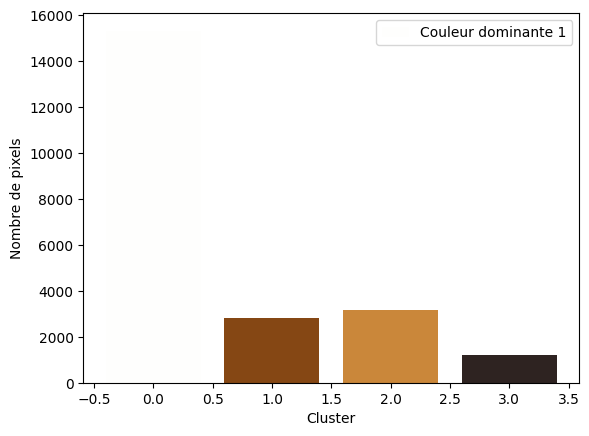

DataFrame pour l'image im-001_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97094057e+01 -1.18427940e-03  1.88116827e-01]
   Code couleur RGB: [0.99736303 0.99663968 0.99530576]
   Nombre de pixels: 11726

Cluster 2:
   Code couleur Lab: [57.86037891 20.46450609 48.8187677 ]
   Code couleur RGB: [0.75401894 0.48489734 0.2011683 ]
   Nombre de pixels: 8169

Cluster 3:
   Code couleur Lab: [33.3648054   1.29265093  1.33006753]
   Code couleur RGB: [0.31965834 0.30473459 0.29962791]
   Nombre de pixels: 2373

Cluster 4:
   Code couleur Lab: [ 54.69705728  64.19074389 -70.51881926]
   Code couleur RGB: [0.6695671  0.34050002 1.        ]
   Nombre de pixels: 232



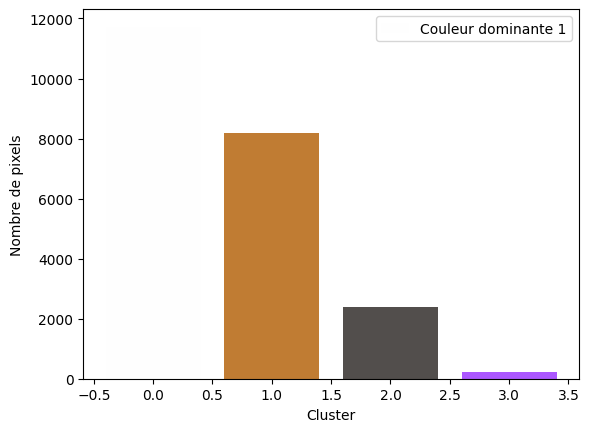

DataFrame pour l'image im-002_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.41283703  3.85965224 12.59763147]
   Code couleur RGB: [0.27501096 0.21736565 0.15393696]
   Nombre de pixels: 4370

Cluster 2:
   Code couleur Lab: [98.15651673  0.14421206  0.39576378]
   Code couleur RGB: [0.98165802 0.97861299 0.97614706]
   Nombre de pixels: 13295

Cluster 3:
   Code couleur Lab: [46.57302441 36.10972487 36.96646828]
   Code couleur RGB: [0.69385427 0.32396882 0.1944534 ]
   Nombre de pixels: 4384

Cluster 4:
   Code couleur Lab: [  35.39328381   80.24346287 -102.65188831]
   Code couleur RGB: [0.29063517 0.00248472 1.        ]
   Nombre de pixels: 451



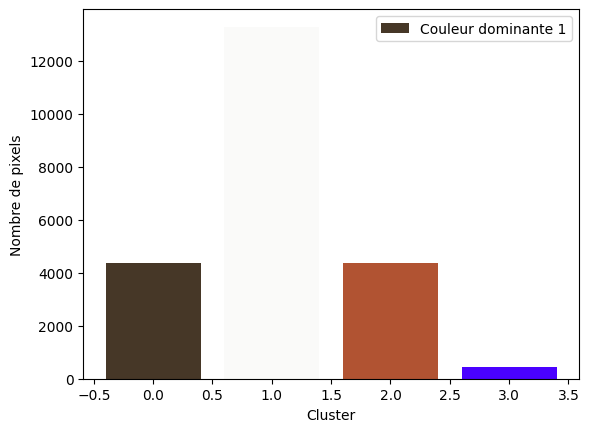

DataFrame pour l'image im-003_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [54.58279699 18.06970253 54.86199267]
   Code couleur RGB: [0.70728591 0.45842012 0.10708377]
   Nombre de pixels: 3550

Cluster 2:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 3:
   Code couleur Lab: [16.94219439  4.55189712 14.88175951]
   Code couleur RGB: [0.21312272 0.1525096  0.08047715]
   Nombre de pixels: 2578

Cluster 4:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977



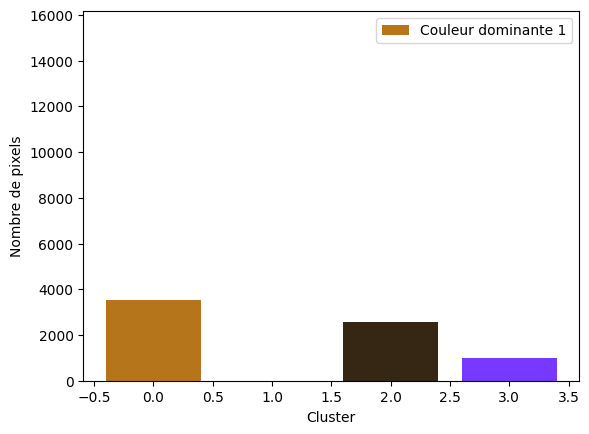

DataFrame pour l'image im-004_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.47671032  0.46634584  0.38322423]
   Code couleur RGB: [0.9878403  0.98146121 0.97991184]
   Nombre de pixels: 14413

Cluster 2:
   Code couleur Lab: [48.44200043 43.25794432 41.08429195]
   Code couleur RGB: [0.75372629 0.31282219 0.18430298]
   Nombre de pixels: 4547

Cluster 3:
   Code couleur Lab: [  34.93241636   78.89725537 -103.41743014]
   Code couleur RGB: [0.2485089  0.03179266 1.        ]
   Nombre de pixels: 466

Cluster 4:
   Code couleur Lab: [22.6736621   5.81658268 14.64000753]
   Code couleur RGB: [0.27165492 0.19797484 0.12779504]
   Nombre de pixels: 3074



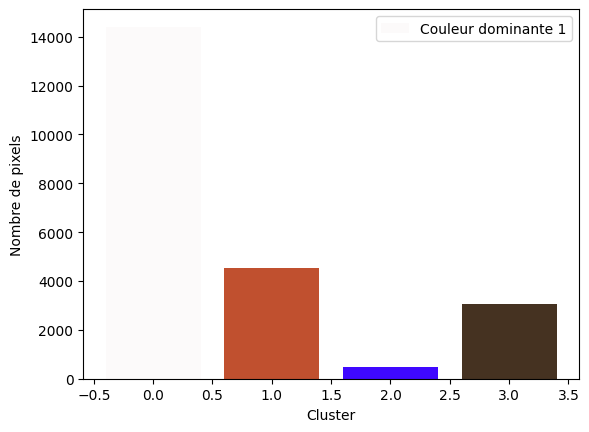

DataFrame pour l'image im-005_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.97114795e+01 3.39726992e-02 2.93131993e-01]
   Code couleur RGB: [0.99804589 0.99654661 0.99453759]
   Nombre de pixels: 13900

Cluster 2:
   Code couleur Lab: [46.68431119 13.70359842 48.24386842]
   Code couleur RGB: [0.58972535 0.39386413 0.08834089]
   Nombre de pixels: 5928

Cluster 3:
   Code couleur Lab: [ 43.85308242  66.37990478 -88.58848969]
   Code couleur RGB: [0.42507327 0.23765882 1.        ]
   Nombre de pixels: 1071

Cluster 4:
   Code couleur Lab: [14.2179075  -2.74586069 12.25223034]
   Code couleur RGB: [0.15009421 0.14392965 0.07302035]
   Nombre de pixels: 1601



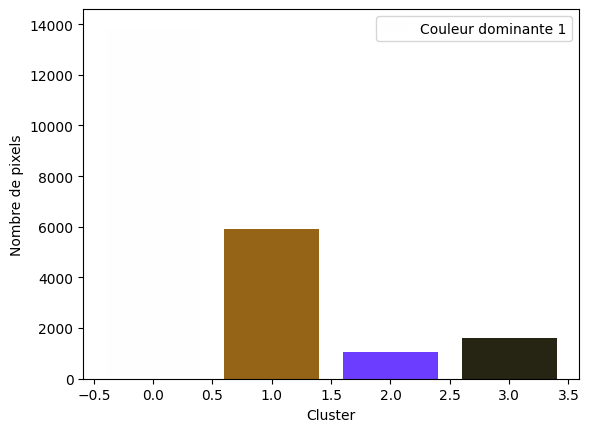

DataFrame pour l'image im-006_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
im-006_im.png  150,100,23   38,37,19
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.94613118  0.42798048  0.50588279]
   Code couleur RGB: [0.99329106 0.98683858 0.98429661]
   Nombre de pixels: 17577

Cluster 2:
   Code couleur Lab: [59.45862525 37.86796521 52.49111221]
   Code couleur RGB: [0.86764979 0.44443513 0.19432502]
   Nombre de pixels: 3053

Cluster 3:
   Code couleur Lab: [ 56.02002735  75.31735964 -68.31190007]
   Code couleur RGB: [0.77514645 0.28550701 1.        ]
   Nombre de pixels: 468

Cluster 4:
   Code couleur Lab: [40.26483736  0.5090141  17.18813027]
   Code couleur RGB: [0.41519608 0.36741017 0.26237787]
   Nombre de pixels: 1402



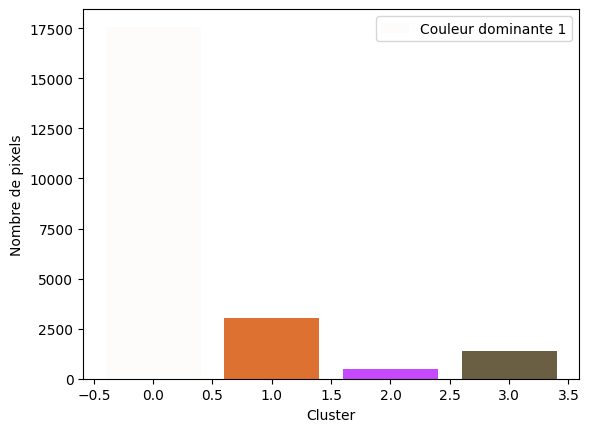

DataFrame pour l'image im-007_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
im-006_im.png  150,100,23   38,37,19
im-007_im.png  221,113,50  106,94,67
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95550525e+01 1.13075271e-01 3.29720362e-02]
   Code couleur RGB: [0.99598235 0.99465504 0.99474525]
   Nombre de pixels: 16061

Cluster 2:
   Code couleur Lab: [7.03047749 0.19909292 4.39731178]
   Code couleur RGB: [0.09640126 0.08318278 0.05639524]
   Nombre de pixels: 4807

Cluster 3:
   Code couleur Lab: [  36.79364645   77.9548279  -100.34256598]
   Code couleur RGB: [0.31752138 0.07291538 1.        ]
   Nombre de pixels: 746

Cluster 4:
   Code couleur Lab: [55.94694741 32.88486248 59.77624854]
   Code couleur RGB: [0.80336333 0.42583176 0.07519165]
   Nombre de pixels: 886



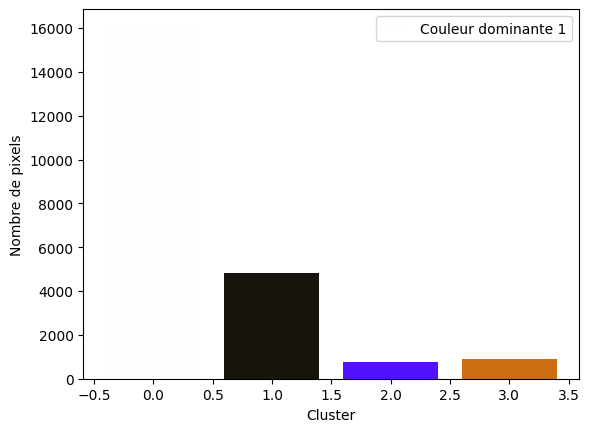

DataFrame pour l'image im-008_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [61.79000141 14.63806596 53.28237578]
   Code couleur RGB: [0.77139612 0.53996779 0.19842919]
   Nombre de pixels: 4449

Cluster 2:
   Code couleur Lab: [ 9.89528275e+01 -1.40118611e-02  7.02512317e-01]
   Code couleur RGB: [0.99049439 0.98792969 0.9828214 ]
   Nombre de pixels: 13711

Cluster 3:
   Code couleur Lab: [24.93360627  1.80740574 18.54115197]
   Code couleur RGB: [0.27716082 0.22515874 0.12158053]
   Nombre de pixels: 3815

Cluster 4:
   Code couleur Lab: [ 37.98753523  74.3593891  -98.36719462]
   Code couleur RGB: [0.31767009 0.13051554 1.        ]
   Nombre de pixels: 525



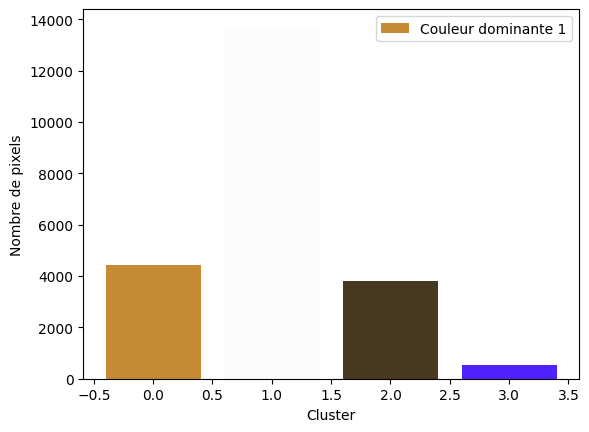

DataFrame pour l'image im-009_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.06779565  0.22496274  0.60099271]
   Code couleur RGB: [0.9933705  0.98868382 0.9849269 ]
   Nombre de pixels: 17289

Cluster 2:
   Code couleur Lab: [71.82383258 14.16522051 48.50106878]
   Code couleur RGB: [0.88150552 0.64523275 0.33882849]
   Nombre de pixels: 3583

Cluster 3:
   Code couleur Lab: [43.12912717 11.1516508  13.79054453]
   Code couleur RGB: [0.49971127 0.37124152 0.31240325]
   Nombre de pixels: 1564

Cluster 4:
   Code couleur Lab: [ 40.51249633  73.06070475 -94.05461969]
   Code couleur RGB: [0.39316133 0.16265079 1.        ]
   Nombre de pixels: 64



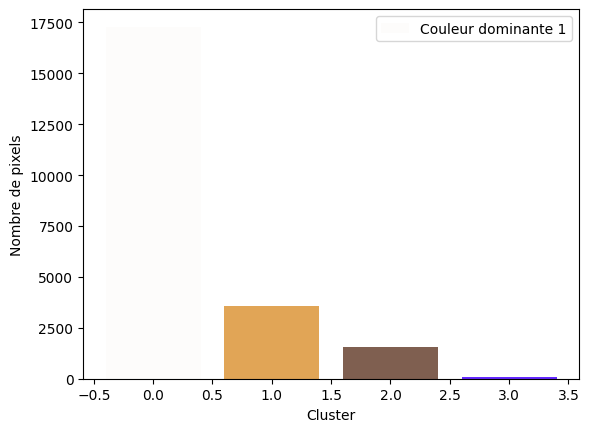

DataFrame pour l'image im-010_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.11319401  0.18574264  0.18900682]
   Code couleur RGB: [0.99210914 0.98941641 0.98855728]
   Nombre de pixels: 14361

Cluster 2:
   Code couleur Lab: [43.70088428 43.12554056 44.08787148]
   Code couleur RGB: [0.6978592  0.26477379 0.11764809]
   Nombre de pixels: 5580

Cluster 3:
   Code couleur Lab: [25.89591614  4.83428498 -2.09240001]
   Code couleur RGB: [0.26431023 0.2313408  0.25321713]
   Nombre de pixels: 2419

Cluster 4:
   Code couleur Lab: [ 37.28726356  79.09575389 -99.45079227]
   Code couleur RGB: [0.35122202 0.05587459 1.        ]
   Nombre de pixels: 140



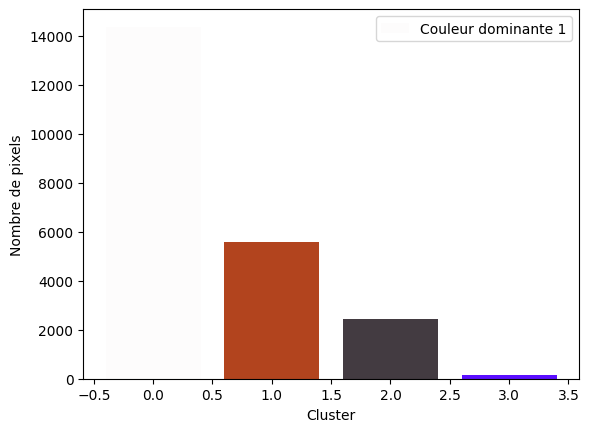

DataFrame pour l'image im-011_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.65794263 -0.49371941  0.8229456 ]
   Code couleur RGB: [0.99504269 0.99706081 0.98983672]
   Nombre de pixels: 14127

Cluster 2:
   Code couleur Lab: [55.49891439 44.39132437 59.75723007]
   Code couleur RGB: [0.85571038 0.3776288  0.08342963]
   Nombre de pixels: 6034

Cluster 3:
   Code couleur Lab: [ 39.35498744  76.34311702 -95.9923203 ]
   Code couleur RGB: [0.39104031 0.11942806 1.        ]
   Nombre de pixels: 495

Cluster 4:
   Code couleur Lab: [19.95911384  7.49296668 20.82063168]
   Code couleur RGB: [0.26050052 0.17055348 0.06826786]
   Nombre de pixels: 1844



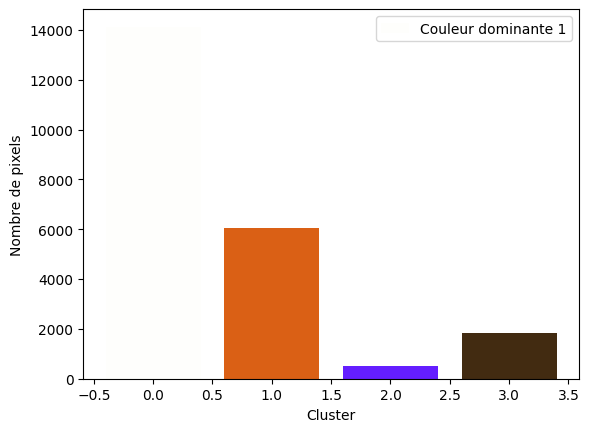

DataFrame pour l'image im-012_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [40.22590179 38.39140882 36.03358014]
   Code couleur RGB: [0.63012079 0.25236997 0.1457375 ]
   Nombre de pixels: 5337

Cluster 2:
   Code couleur Lab: [98.80361192  0.29746178 -0.1572863 ]
   Code couleur RGB: [0.988267   0.98573708 0.98768375]
   Nombre de pixels: 13872

Cluster 3:
   Code couleur Lab: [25.51383957  5.81497749 10.27152645]
   Code couleur RGB: [0.29191476 0.22323805 0.17731055]
   Nombre de pixels: 3075

Cluster 4:
   Code couleur Lab: [  34.38717837   79.09306915 -104.33095211]
   Code couleur RGB: [0.22243925 0.02080894 1.        ]
   Nombre de pixels: 216



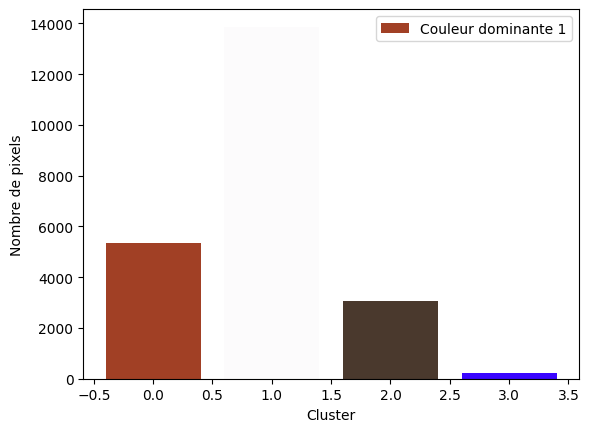

DataFrame pour l'image im-013_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.83612405 -0.13913425  0.17181553]
   Code couleur RGB: [0.99762509 0.99841933 0.99684975]
   Nombre de pixels: 15012

Cluster 2:
   Code couleur Lab: [51.21547804 47.50937466 57.98328339]
   Code couleur RGB: [0.81683055 0.3197914  0.05573056]
   Nombre de pixels: 4432

Cluster 3:
   Code couleur Lab: [ 46.01517115  77.87306504 -84.96307892]
   Code couleur RGB: [0.58304331 0.16606199 1.        ]
   Nombre de pixels: 1193

Cluster 4:
   Code couleur Lab: [10.91344941  9.9512522  10.41709518]
   Code couleur RGB: [0.17964719 0.0928292  0.05608692]
   Nombre de pixels: 1863



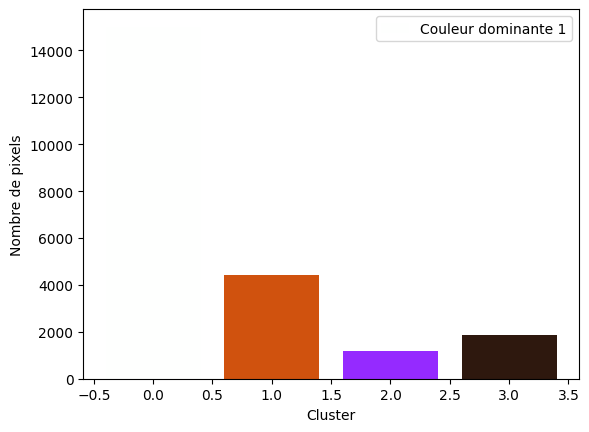

DataFrame pour l'image im-014_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.21281933  0.75497073 -0.26325277]
   Code couleur RGB: [0.98488556 0.9779633  0.98185189]
   Nombre de pixels: 12481

Cluster 2:
   Code couleur Lab: [29.4026019  15.66226556 28.12921344]
   Code couleur RGB: [0.39866464 0.23102657 0.09928653]
   Nombre de pixels: 4462

Cluster 3:
   Code couleur Lab: [57.42624558 19.37549144 34.94398578]
   Code couleur RGB: [0.72971274 0.48554274 0.30368343]
   Nombre de pixels: 2789

Cluster 4:
   Code couleur Lab: [28.89744423  7.12883643 -6.26422173]
   Code couleur RGB: [0.29373994 0.25413643 0.305298  ]
   Nombre de pixels: 2768



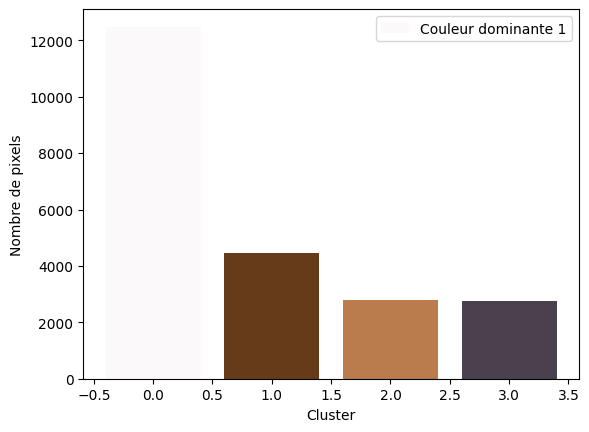

DataFrame pour l'image im-015_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.93960959e+01  1.03125166e-01 -2.28185554e-02]
   Code couleur RGB: [0.99389709 0.99289088 0.99336175]
   Nombre de pixels: 12641

Cluster 2:
   Code couleur Lab: [21.16246193  0.18917843  9.54098452]
   Code couleur RGB: [0.22116036 0.19707992 0.1445216 ]
   Nombre de pixels: 4398

Cluster 3:
   Code couleur Lab: [43.37934101 29.42215877 36.20163864]
   Code couleur RGB: [0.6235712  0.31711237 0.16867179]
   Nombre de pixels: 3544

Cluster 4:
   Code couleur Lab: [60.20173581 -0.46352753 10.4883244 ]
   Code couleur RGB: [0.59589685 0.56733902 0.4970858 ]
   Nombre de pixels: 1917



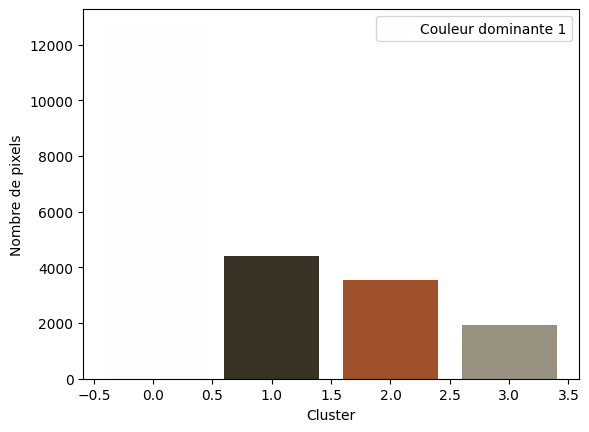

DataFrame pour l'image im-016_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.26538821 -0.16494056  0.29239072]
   Code couleur RGB: [0.99136439 0.99196359 0.9894516 ]
   Nombre de pixels: 13218

Cluster 2:
   Code couleur Lab: [14.44156243  6.84167198 12.96640103]
   Code couleur RGB: [0.19932012 0.12763418 0.07228223]
   Nombre de pixels: 3541

Cluster 3:
   Code couleur Lab: [ 39.45566382  72.78373609 -95.92686972]
   Code couleur RGB: [0.35298197 0.15709477 1.        ]
   Nombre de pixels: 1260

Cluster 4:
   Code couleur Lab: [50.03760977 17.32412521 51.03720965]
   Code couleur RGB: [0.6484332  0.41631633 0.09777703]
   Nombre de pixels: 4481



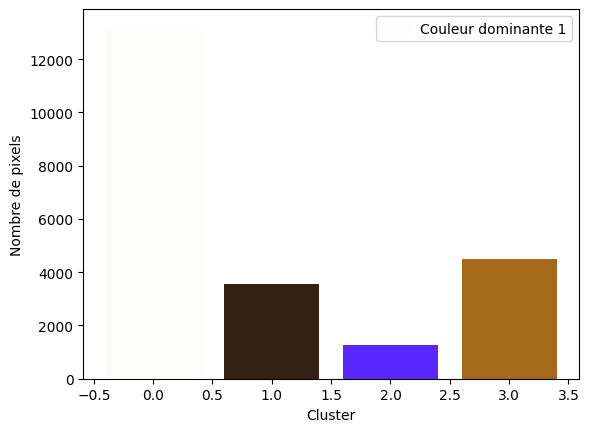

DataFrame pour l'image im-017_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.86304541 -0.23716836  0.14755237]
   Code couleur RGB: [0.99704768 0.99897035 0.99732608]
   Nombre de pixels: 15875

Cluster 2:
   Code couleur Lab: [51.01306099 53.11190641 59.474511  ]
   Code couleur RGB: [0.84172569 0.28913432 0.03800123]
   Nombre de pixels: 4008

Cluster 3:
   Code couleur Lab: [ 55.82450767  79.11343392 -68.53027769]
   Code couleur RGB: [0.79724743 0.25464287 1.        ]
   Nombre de pixels: 1447

Cluster 4:
   Code couleur Lab: [49.3310865  25.6722589  45.22271632]
   Code couleur RGB: [0.6795694  0.38567959 0.15135536]
   Nombre de pixels: 1170



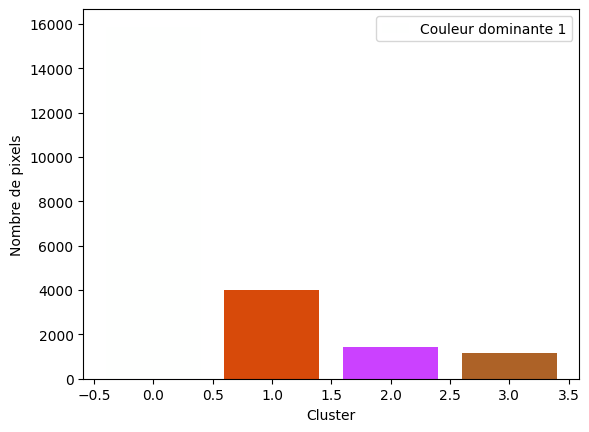

DataFrame pour l'image im-018_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.68934371 -0.53184958  0.2504602 ]
   Code couleur RGB: [0.99304673 0.9976794  0.99453089]
   Nombre de pixels: 16345

Cluster 2:
   Code couleur Lab: [6.49060077 0.23483961 3.59238276]
   Code couleur RGB: [0.09058578 0.0786701  0.05637237]
   Nombre de pixels: 4221

Cluster 3:
   Code couleur Lab: [  34.20099583   79.44576824 -104.65779531]
   Code couleur RGB: [0.21792039 0.01017911 1.        ]
   Nombre de pixels: 1164

Cluster 4:
   Code couleur Lab: [37.68300576 44.18505706 45.35603135]
   Code couleur RGB: [0.63119321 0.19737362 0.0480718 ]
   Nombre de pixels: 770



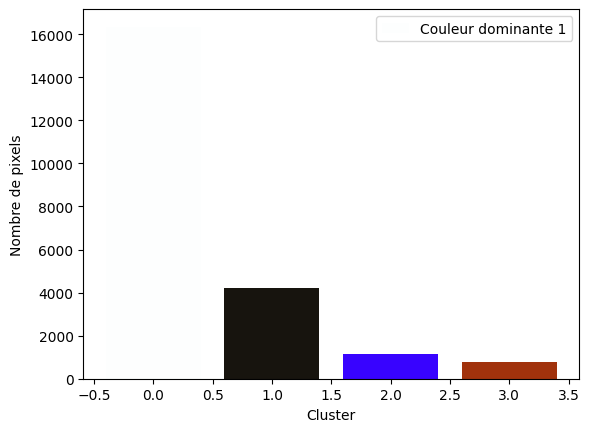

DataFrame pour l'image im-019_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.46281849 -0.14663726  0.19790692]
   Code couleur RGB: [0.99341705 0.99418883 0.99241107]
   Nombre de pixels: 15887

Cluster 2:
   Code couleur Lab: [21.14166222  4.04279515  3.92890323]
   Code couleur RGB: [0.2314475  0.19049053 0.17714613]
   Nombre de pixels: 2212

Cluster 3:
   Code couleur Lab: [ 37.71796303  76.49687744 -98.72675562]
   Code couleur RGB: [0.33576008 0.10305488 1.        ]
   Nombre de pixels: 717

Cluster 4:
   Code couleur Lab: [30.72948019 26.84728636 29.01670883]
   Code couleur RGB: [0.46526179 0.20831438 0.10859413]
   Nombre de pixels: 3684



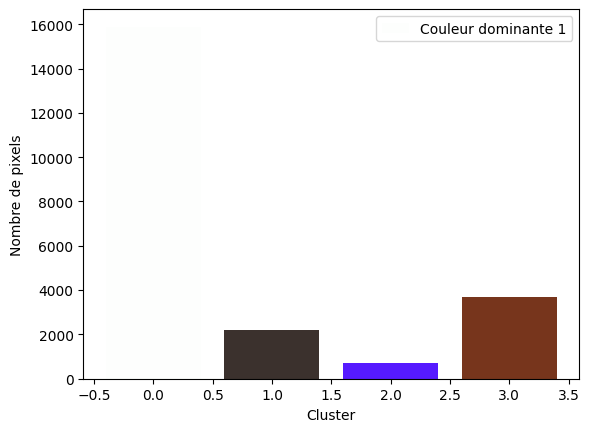

DataFrame pour l'image im-020_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [13.55114953  4.65101888 14.60133066]
   Code couleur RGB: [0.18365083 0.12478699 0.05156035]
   Nombre de pixels: 1609

Cluster 2:
   Code couleur Lab: [ 9.99028168e+01 -3.73549131e-02  9.85268145e-02]
   Code couleur RGB: [0.99894761 0.99895208 0.99817798]
   Nombre de pixels: 15810

Cluster 3:
   Code couleur Lab: [44.77906224 38.22561944 52.29326074]
   Code couleur RGB: [0.69130832 0.29599082 0.03771448]
   Nombre de pixels: 3833

Cluster 4:
   Code couleur Lab: [ 45.44648555  74.79366838 -85.86445087]
   Code couleur RGB: [0.5450887  0.18965408 1.        ]
   Nombre de pixels: 1248



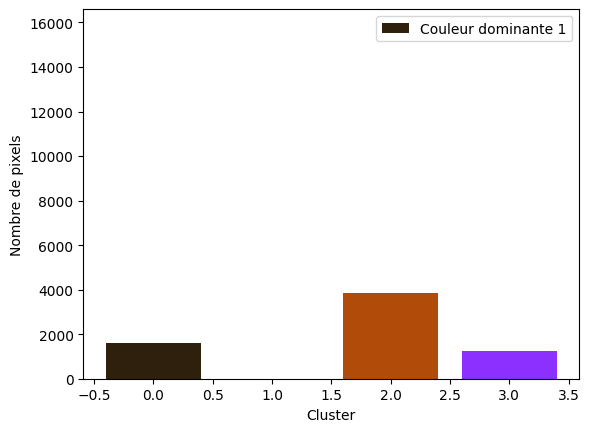

DataFrame pour l'image im-021_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [96.9789861   1.03392796  0.65656543]
   Code couleur RGB: [0.9763821  0.96306364 0.96099602]
   Nombre de pixels: 12945

Cluster 2:
   Code couleur Lab: [43.12566643 38.87483789 40.27819494]
   Code couleur RGB: [0.66888528 0.27836343 0.14025094]
   Nombre de pixels: 5635

Cluster 3:
   Code couleur Lab: [16.03716745 -5.14926363 10.02488283]
   Code couleur RGB: [0.14839368 0.16300964 0.09981976]
   Nombre de pixels: 3285

Cluster 4:
   Code couleur Lab: [ 47.74544298  78.22455601 -81.92182859]
   Code couleur RGB: [0.6259535  0.17955443 1.        ]
   Nombre de pixels: 635



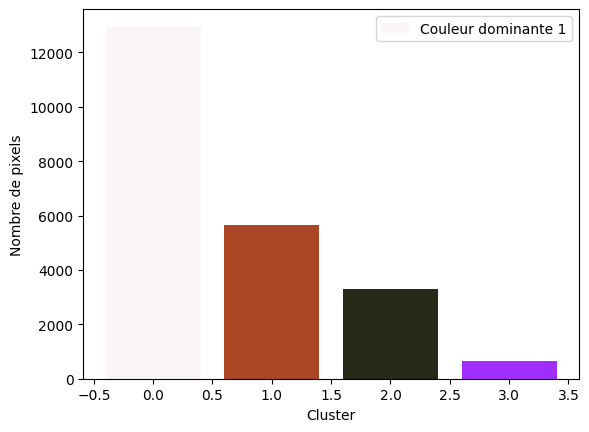

DataFrame pour l'image im-022_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.82766332e+01  8.64650516e-01 -3.98383464e-02]
   Code couleur RGB: [0.98728385 0.97835201 0.98090095]
   Nombre de pixels: 11369

Cluster 2:
   Code couleur Lab: [46.55519313  3.61424716 27.9464452 ]
   Code couleur RGB: [0.51378163 0.41920181 0.24794399]
   Nombre de pixels: 2709

Cluster 3:
   Code couleur Lab: [14.7582165   3.33696466 -0.97666535]
   Code couleur RGB: [0.16217785 0.13986513 0.15139482]
   Nombre de pixels: 4328

Cluster 4:
   Code couleur Lab: [59.04817774 24.07939204 59.03744287]
   Code couleur RGB: [0.79454912 0.48514939 0.11565777]
   Nombre de pixels: 4094



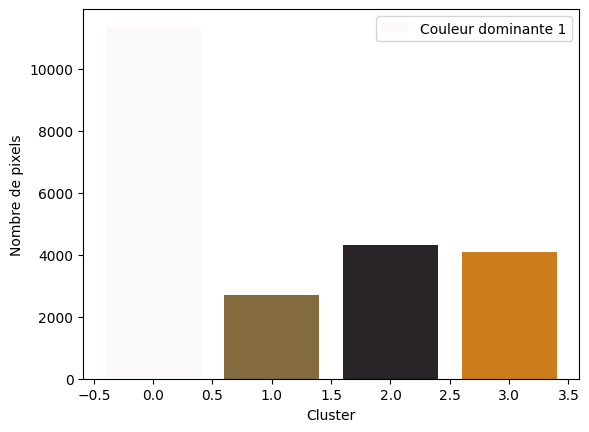

DataFrame pour l'image im-023_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [10.18321917  1.19439858  5.61476574]
   Code couleur RGB: [0.12690174 0.10604375 0.07933154]
   Nombre de pixels: 6057

Cluster 2:
   Code couleur Lab: [ 9.97080643e+01  2.16943331e-02 -6.51299187e-02]
   Code couleur RGB: [0.99662852 0.99664434 0.9972148 ]
   Nombre de pixels: 11862

Cluster 3:
   Code couleur Lab: [38.04434715 16.1881571  33.59416525]
   Code couleur RGB: [0.4969433  0.30737775 0.13506943]
   Nombre de pixels: 3529

Cluster 4:
   Code couleur Lab: [ 57.85930473  15.44904729 -31.24598576]
   Code couleur RGB: [0.53617459 0.51965018 0.75925103]
   Nombre de pixels: 1052



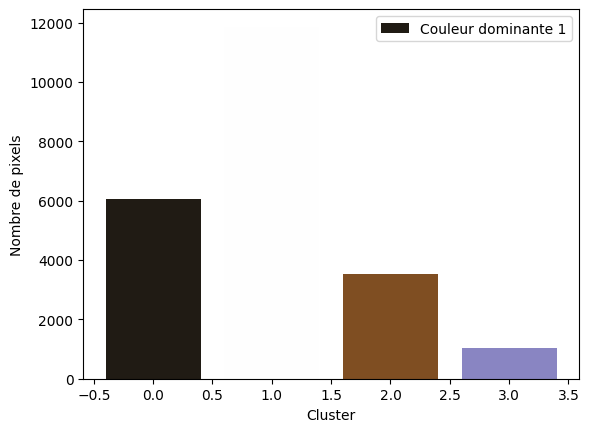

DataFrame pour l'image im-024_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
------------

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98037313e+01 9.87258520e-02 1.15914322e-01]
   Code couleur RGB: [0.99898776 0.99749019 0.99693907]
   Nombre de pixels: 13146

Cluster 2:
   Code couleur Lab: [21.70457459 -8.51701768 15.40755134]
   Code couleur RGB: [0.18607035 0.21565654 0.11264571]
   Nombre de pixels: 6681

Cluster 3:
   Code couleur Lab: [53.05295525  1.22664225 -3.32030859]
   Code couleur RGB: [0.49469571 0.49490221 0.51893993]
   Nombre de pixels: 982

Cluster 4:
   Code couleur Lab: [60.55336227 13.45475782 52.35993612]
   Code couleur RGB: [0.74963182 0.53067489 0.19361452]
   Nombre de pixels: 1691



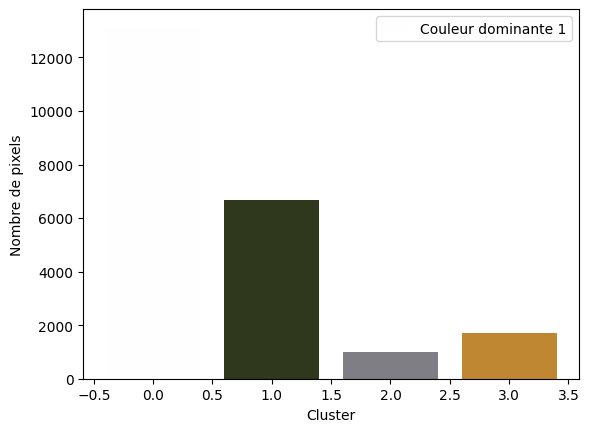

DataFrame pour l'image im-025_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95055496e+01 1.56878259e-02 3.94648615e-01]
   Code couleur RGB: [0.99591906 0.99422179 0.99142703]
   Nombre de pixels: 16232

Cluster 2:
   Code couleur Lab: [50.52075974 58.04588031 57.5810177 ]
   Code couleur RGB: [0.85824065 0.2547229  0.06722204]
   Nombre de pixels: 4174

Cluster 3:
   Code couleur Lab: [17.86730814  4.15134874 10.29957971]
   Code couleur RGB: [0.21382135 0.1616074  0.11414831]
   Nombre de pixels: 1738

Cluster 4:
   Code couleur Lab: [ 43.54548022  79.94378233 -89.00577821]
   Code couleur RGB: [0.54105147 0.11491089 1.        ]
   Nombre de pixels: 356



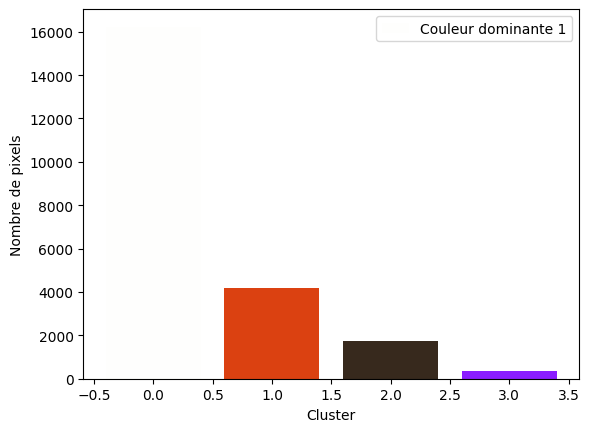

DataFrame pour l'image im-026_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91103869e+01 -1.95638428e-02  5.96366924e-01]
   Code couleur RGB: [0.9918622  0.98976196 0.98541053]
   Nombre de pixels: 15856

Cluster 2:
   Code couleur Lab: [66.33977211  9.77810463 47.63738301]
   Code couleur RGB: [0.79083913 0.59971867 0.28987867]
   Nombre de pixels: 4139

Cluster 3:
   Code couleur Lab: [  35.25876062   78.21092145 -102.87745326]
   Code couleur RGB: [0.25364815 0.05207229 1.        ]
   Nombre de pixels: 282

Cluster 4:
   Code couleur Lab: [26.89198637  1.25262844 12.44597641]
   Code couleur RGB: [0.28363275 0.24431254 0.17519716]
   Nombre de pixels: 2223



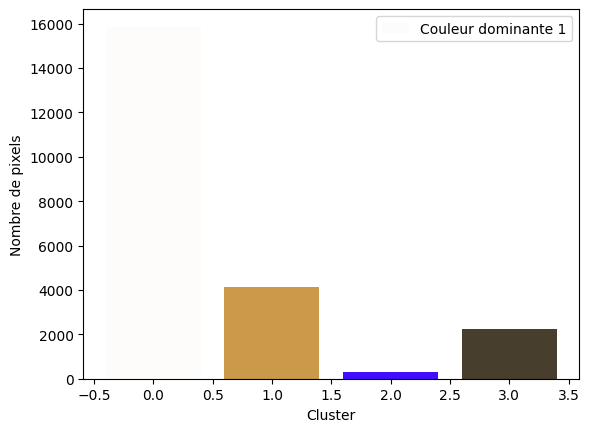

DataFrame pour l'image im-027_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.62653473  0.35241746  0.64338907]
   Code couleur RGB: [0.98953928 0.98335851 0.9796241 ]
   Nombre de pixels: 12345

Cluster 2:
   Code couleur Lab: [30.65969322 -1.37471005 26.29959821]
   Code couleur RGB: [0.32374887 0.28115906 0.11740627]
   Nombre de pixels: 5434

Cluster 3:
   Code couleur Lab: [51.85554719 38.37688036 51.65259525]
   Code couleur RGB: [0.77713605 0.36581069 0.12643432]
   Nombre de pixels: 4309

Cluster 4:
   Code couleur Lab: [ 54.39774144  67.31568378 -71.02366758]
   Code couleur RGB: [0.68642728 0.32085024 1.        ]
   Nombre de pixels: 412



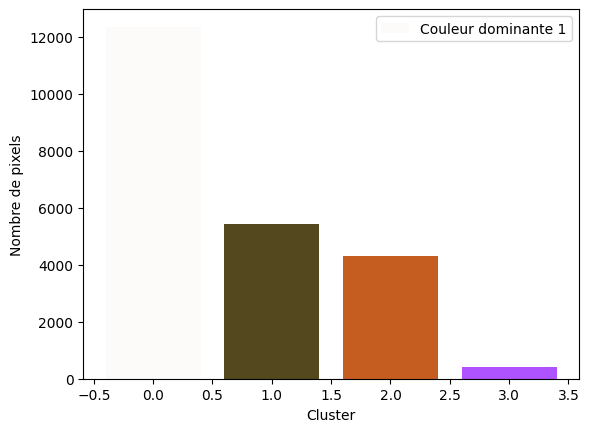

DataFrame pour l'image im-028_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [10.93718474 -1.61460304  6.07355588]
   Code couleur RGB: [0.119267   0.11663729 0.0825867 ]
   Nombre de pixels: 8739

Cluster 2:
   Code couleur Lab: [98.8939429  -0.11060115  0.53984746]
   Code couleur RGB: [0.98846956 0.98754404 0.98337251]
   Nombre de pixels: 12750

Cluster 3:
   Code couleur Lab: [46.7073401  52.60135151 50.14502295]
   Code couleur RGB: [0.78180017 0.24615617 0.10015379]
   Nombre de pixels: 879

Cluster 4:
   Code couleur Lab: [  33.28839748   77.03068258 -106.19127468]
   Code couleur RGB: [0.06787311 0.05748408 1.        ]
   Nombre de pixels: 132



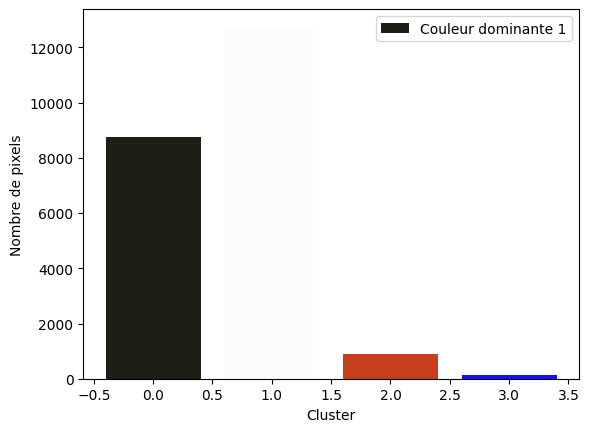

DataFrame pour l'image im-029_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98382011e+01 1.23669556e-01 6.79923397e-02]
   Code couleur RGB: [0.99941086 0.99783553 0.99769785]
   Nombre de pixels: 16034

Cluster 2:
   Code couleur Lab: [70.11735255 20.06308099 71.02307239]
   Code couleur RGB: [0.91396457 0.60869563 0.09130016]
   Nombre de pixels: 4507

Cluster 3:
   Code couleur Lab: [ 55.59979888  63.22262598 -69.43869769]
   Code couleur RGB: [0.67881316 0.35391509 1.        ]
   Nombre de pixels: 913

Cluster 4:
   Code couleur Lab: [22.52799623  4.90341387 24.40887822]
   Code couleur RGB: [0.27572533 0.19747095 0.06399417]
   Nombre de pixels: 1046



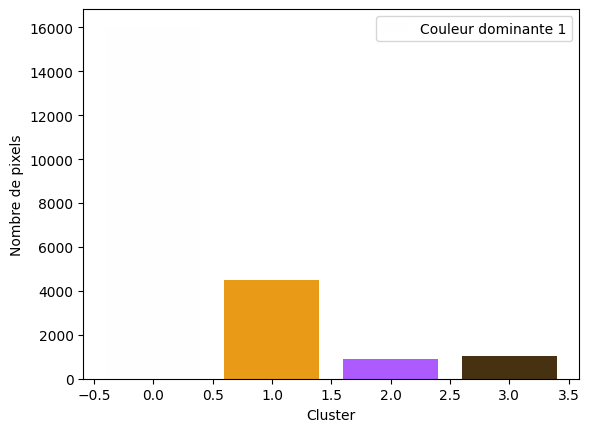

DataFrame pour l'image im-030_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [50.06781325 39.85622831 47.64956974]
   Code couleur RGB: [0.76062622 0.34255628 0.14573373]
   Nombre de pixels: 4123

Cluster 2:
   Code couleur Lab: [97.45645676  0.89079649  0.91745639]
   Code couleur RGB: [0.9815526  0.96872749 0.9643972 ]
   Nombre de pixels: 14755

Cluster 3:
   Code couleur Lab: [ 50.96294061  78.706634   -76.57291815]
   Code couleur RGB: [0.69804519 0.20786405 1.        ]
   Nombre de pixels: 927

Cluster 4:
   Code couleur Lab: [42.40791785  0.80341025 -3.28999354]
   Code couleur RGB: [0.38771    0.39167743 0.4136146 ]
   Nombre de pixels: 2695



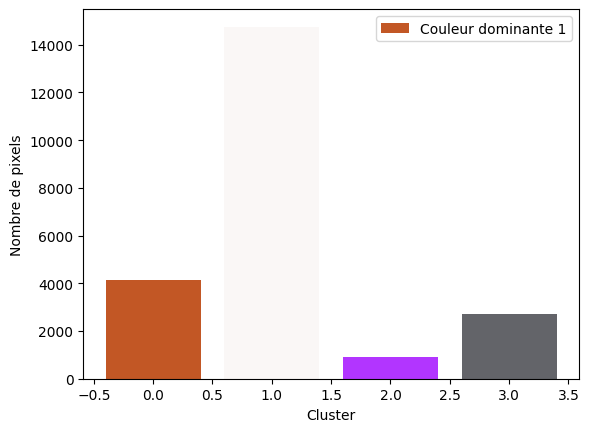

DataFrame pour l'image im-031_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [56.13551439 29.55013072 54.30948302]
   Code couleur RGB: [0.78551046 0.43940898 0.1387565 ]
   Nombre de pixels: 7035

Cluster 2:
   Code couleur Lab: [ 9.88511821e+01 -8.92127902e-02  5.43562110e-01]
   Code couleur RGB: [0.98817068 0.98700618 0.98286279]
   Nombre de pixels: 13133

Cluster 3:
   Code couleur Lab: [14.42054336  5.05141378  3.49966978]
   Code couleur RGB: [0.17755731 0.132798   0.12456291]
   Nombre de pixels: 2199

Cluster 4:
   Code couleur Lab: [ 40.55736572  76.15112364 -94.00888303]
   Code couleur RGB: [0.42630774 0.13245647 1.        ]
   Nombre de pixels: 133



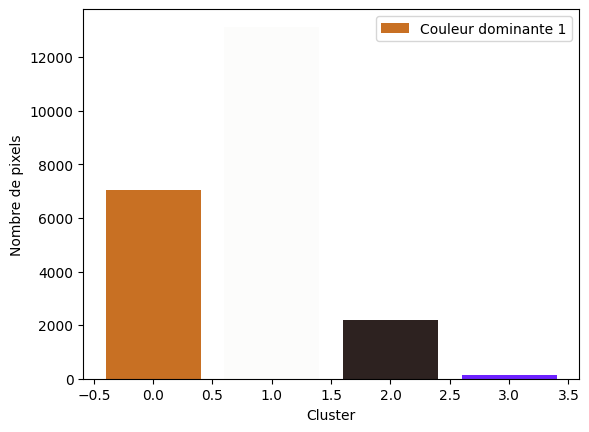

DataFrame pour l'image im-032_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.9804688e+01  4.1352468e-02 -4.2519573e-02]
   Code couleur RGB: [0.99796697 0.99768772 0.99814402]
   Nombre de pixels: 17569

Cluster 2:
   Code couleur Lab: [41.21568528 35.36775102 34.52739856]
   Code couleur RGB: [0.62633115 0.27474251 0.1638597 ]
   Nombre de pixels: 2644

Cluster 3:
   Code couleur Lab: [28.29520772  2.64700178  5.50624435]
   Code couleur RGB: [0.29126747 0.25526481 0.22913485]
   Nombre de pixels: 1214

Cluster 4:
   Code couleur Lab: [59.09173924 20.05934535 -0.70422713]
   Code couleur RGB: [0.69010257 0.5085775  0.56503753]
   Nombre de pixels: 1073



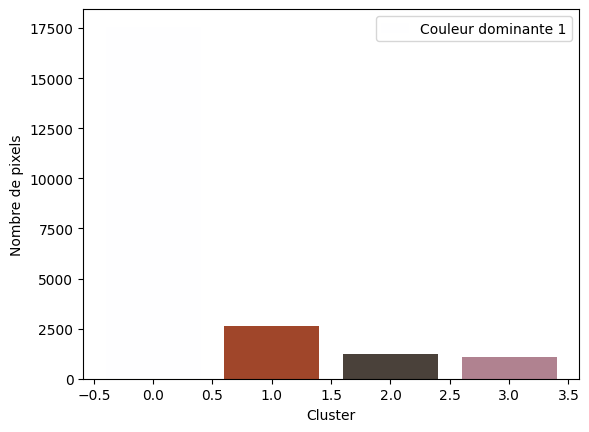

DataFrame pour l'image im-033_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [51.36845423 46.95844343 57.11794947]
   Code couleur RGB: [0.81572712 0.32404493 0.06913155]
   Nombre de pixels: 3120

Cluster 2:
   Code couleur Lab: [9.92851429e+01 2.38569439e-03 1.04652233e+00]
   Code couleur RGB: [0.99561298 0.99155889 0.98398334]
   Nombre de pixels: 15574

Cluster 3:
   Code couleur Lab: [35.32161689  6.33394594 27.23062949]
   Code couleur RGB: [0.41221511 0.30735015 0.15337189]
   Nombre de pixels: 2987

Cluster 4:
   Code couleur Lab: [ 45.40685629  77.59847006 -85.93392488]
   Code couleur RGB: [0.56687444 0.16275609 1.        ]
   Nombre de pixels: 819



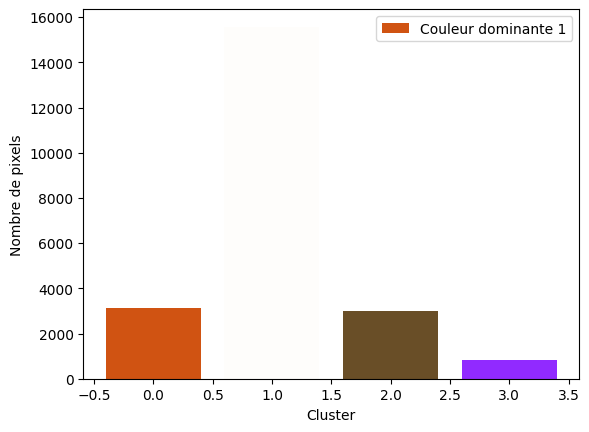

DataFrame pour l'image im-034_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.78789786 -0.21667092  0.40665819]
   Code couleur RGB: [0.99728583 0.99798956 0.99450912]
   Nombre de pixels: 12955

Cluster 2:
   Code couleur Lab: [44.174863   45.62634491 51.78021909]
   Code couleur RGB: [0.7186438  0.25661906 0.04756582]
   Nombre de pixels: 5934

Cluster 3:
   Code couleur Lab: [ 46.44687269  79.40892901 -84.1008105 ]
   Code couleur RGB: [0.60572325 0.15348373 1.        ]
   Nombre de pixels: 783

Cluster 4:
   Code couleur Lab: [21.42265099 16.66466861 22.49732796]
   Code couleur RGB: [0.31757235 0.15952598 0.07200917]
   Nombre de pixels: 2828



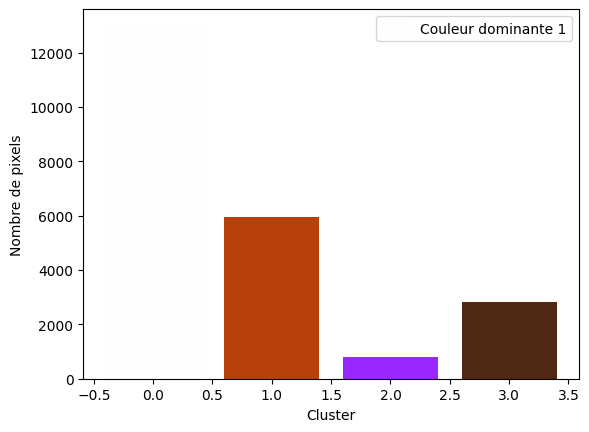

DataFrame pour l'image im-035_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.93294005e+01 -9.74842955e-02  3.64363056e-01]
   Code couleur RGB: [0.99289413 0.99250536 0.98964181]
   Nombre de pixels: 16278

Cluster 2:
   Code couleur Lab: [70.15312415 20.31509569 60.08213653]
   Code couleur RGB: [0.90818733 0.60942452 0.22500204]
   Nombre de pixels: 4043

Cluster 3:
   Code couleur Lab: [28.23217459 11.16448645 15.59425835]
   Code couleur RGB: [0.35283195 0.23395496 0.1691717 ]
   Nombre de pixels: 1794

Cluster 4:
   Code couleur Lab: [  36.48060231   77.55930828 -100.80241515]
   Code couleur RGB: [0.30033265 0.07625557 1.        ]
   Nombre de pixels: 385



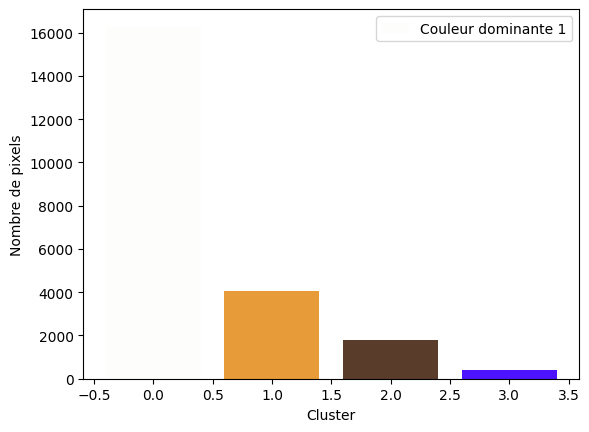

DataFrame pour l'image im-036_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [53.60551805  1.78891979 54.72663779]
   Code couleur RGB: [0.60670262 0.48929411 0.08302289]
   Nombre de pixels: 3225

Cluster 2:
   Code couleur Lab: [ 9.92236347e+01 -4.65167881e-02  3.72936857e-03]
   Code couleur RGB: [0.99082055 0.99128843 0.99118189]
   Nombre de pixels: 14059

Cluster 3:
   Code couleur Lab: [ 49.82019906  56.69897631 -78.92194294]
   Code couleur RGB: [0.49320947 0.33590296 1.        ]
   Nombre de pixels: 1348

Cluster 4:
   Code couleur Lab: [20.25687292 -7.17250012 18.44704899]
   Code couleur RGB: [0.18611034 0.20073751 0.08224473]
   Nombre de pixels: 3868



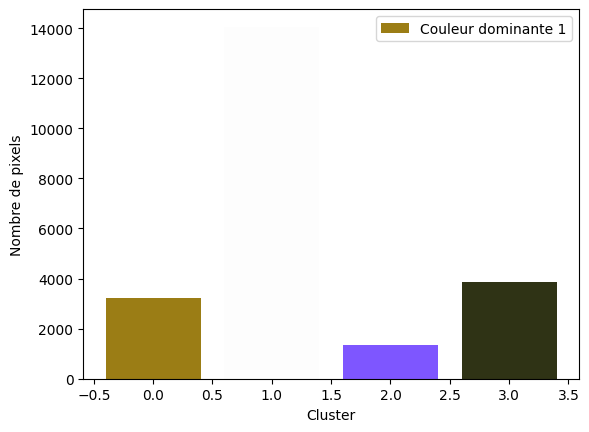

DataFrame pour l'image im-037_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.96612618e+01 2.35362538e-01 4.62891134e-02]
   Code couleur RGB: [0.99822783 0.99556013 0.99586772]
   Nombre de pixels: 16052

Cluster 2:
   Code couleur Lab: [ 38.39860047  76.23977312 -97.66646252]
   Code couleur RGB: [0.35655269 0.11254407 1.        ]
   Nombre de pixels: 876

Cluster 3:
   Code couleur Lab: [16.36363377  9.30488071 14.57601531]
   Code couleur RGB: [0.22949406 0.13747595 0.07881348]
   Nombre de pixels: 2342

Cluster 4:
   Code couleur Lab: [66.14566147 22.84211878 62.38268675]
   Code couleur RGB: [0.87547979 0.5605043  0.15933164]
   Nombre de pixels: 3230



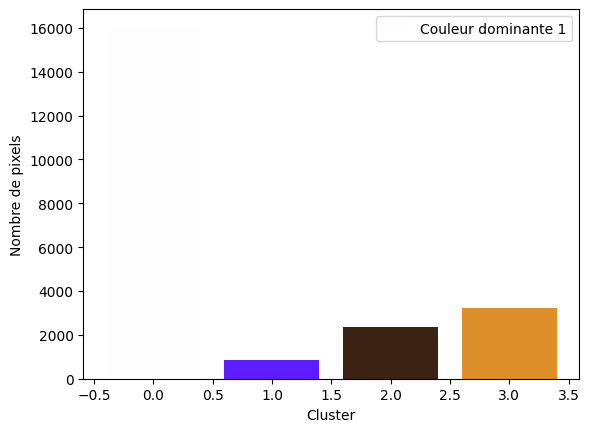

DataFrame pour l'image im-038_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.42702674  0.97106127  0.71808556]
   Code couleur RGB: [0.99250781 0.97957023 0.97688705]
   Nombre de pixels: 16236

Cluster 2:
   Code couleur Lab: [58.75472216 16.10719893 52.6562901 ]
   Code couleur RGB: [0.74369667 0.50550639 0.17382102]
   Nombre de pixels: 3650

Cluster 3:
   Code couleur Lab: [27.69842113  5.32152304 14.17656935]
   Code couleur RGB: [0.31579609 0.24279915 0.17220731]
   Nombre de pixels: 2483

Cluster 4:
   Code couleur Lab: [ 37.83871494  72.86521343 -98.54736031]
   Code couleur RGB: [0.29204383 0.14392974 1.        ]
   Nombre de pixels: 131



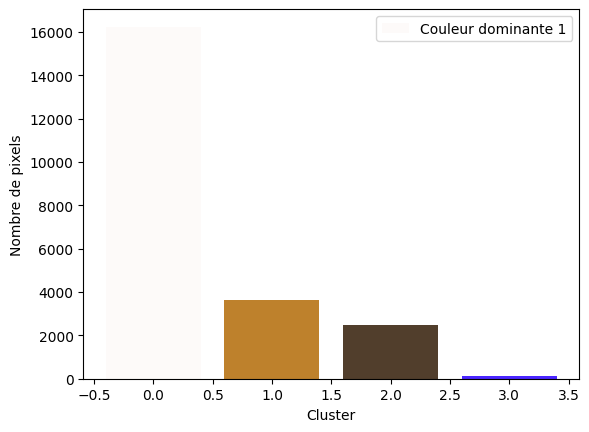

DataFrame pour l'image im-039_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.93489114e+01 -4.93530604e-02  9.41047404e-01]
   Code couleur RGB: [0.99554803 0.99243941 0.98549843]
   Nombre de pixels: 12330

Cluster 2:
   Code couleur Lab: [60.14380016 38.92115059 62.05207956]
   Code couleur RGB: [0.88701667 0.44645564 0.10598154]
   Nombre de pixels: 6756

Cluster 3:
   Code couleur Lab: [ 61.99110593  66.48275366 -58.56317476]
   Code couleur RGB: [0.82852707 0.39546643 1.        ]
   Nombre de pixels: 807

Cluster 4:
   Code couleur Lab: [52.15278216  2.72937224 40.82946539]
   Code couleur RGB: [0.58372333 0.47418356 0.20447785]
   Nombre de pixels: 2607



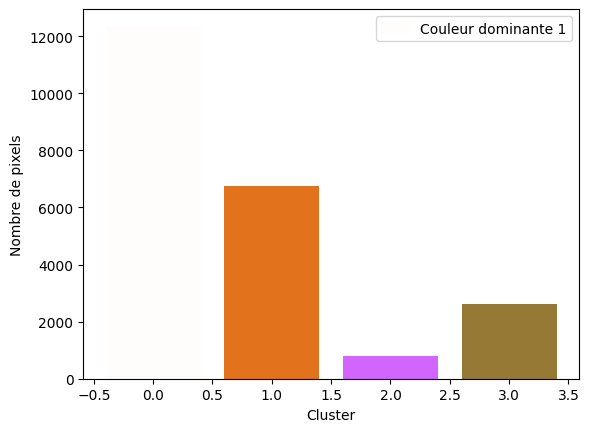

DataFrame pour l'image im-040_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.76279988 -0.18575138  0.17150343]
   Code couleur RGB: [0.99641222 0.99769924 0.99601256]
   Nombre de pixels: 12264

Cluster 2:
   Code couleur Lab: [17.08478324  2.88244018  6.21835895]
   Code couleur RGB: [0.19414175 0.15832125 0.13068386]
   Nombre de pixels: 2354

Cluster 3:
   Code couleur Lab: [42.12252279 45.20840879 45.82915004]
   Code couleur RGB: [0.68939623 0.2381805  0.08915293]
   Nombre de pixels: 5950

Cluster 4:
   Code couleur Lab: [65.35477189 19.64059294  5.63288398]
   Code couleur RGB: [0.77069697 0.57188365 0.58585399]
   Nombre de pixels: 1932



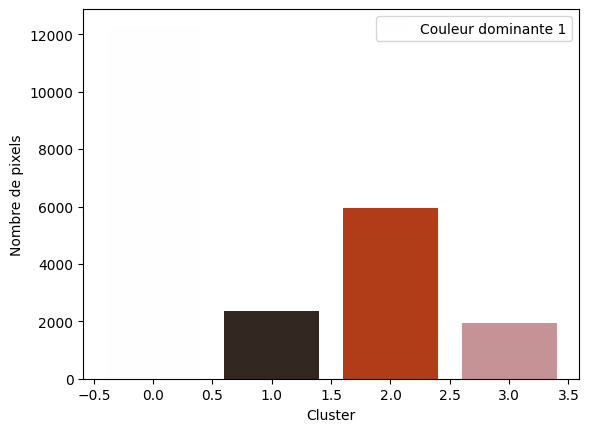

DataFrame pour l'image im-041_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.8638893  -0.2174949   0.72216075]
   Code couleur RGB: [0.98791009 0.98740815 0.98163639]
   Nombre de pixels: 13340

Cluster 2:
   Code couleur Lab: [44.53647937 37.54387881 45.20531067]
   Code couleur RGB: [0.68191805 0.2971316  0.11241859]
   Nombre de pixels: 5101

Cluster 3:
   Code couleur Lab: [ 46.13277156  77.43901328 -84.63919046]
   Code couleur RGB: [0.58323018 0.17132942 1.        ]
   Nombre de pixels: 831

Cluster 4:
   Code couleur Lab: [17.42489985  6.62836204  8.83000198]
   Code couleur RGB: [0.2199688  0.15305216 0.11933336]
   Nombre de pixels: 3228



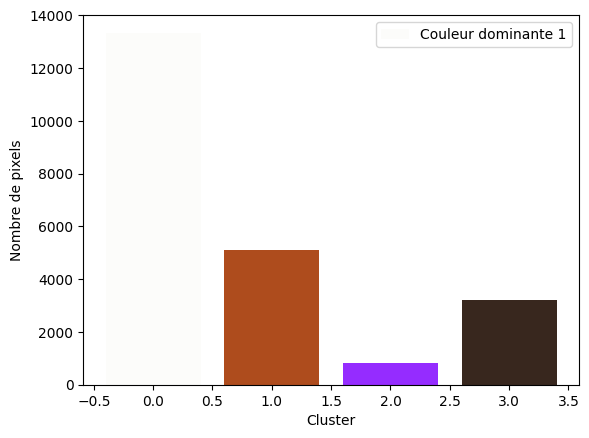

DataFrame pour l'image im-042_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [31.09090201 -6.85035487 18.07689005]
   Code couleur RGB: [0.28491871 0.29611035 0.17454536]
   Nombre de pixels: 2164

Cluster 2:
   Code couleur Lab: [99.38268406 -0.27139928  0.57262566]
   Code couleur RGB: [0.99283033 0.99347008 0.98864326]
   Nombre de pixels: 13424

Cluster 3:
   Code couleur Lab: [64.50121159  7.7620809  55.01538941]
   Code couleur RGB: [0.76511803 0.58497625 0.20697195]
   Nombre de pixels: 4826

Cluster 4:
   Code couleur Lab: [68.89395979 -8.53357724 26.04672773]
   Code couleur RGB: [0.66820881 0.67171886 0.4731326 ]
   Nombre de pixels: 2086



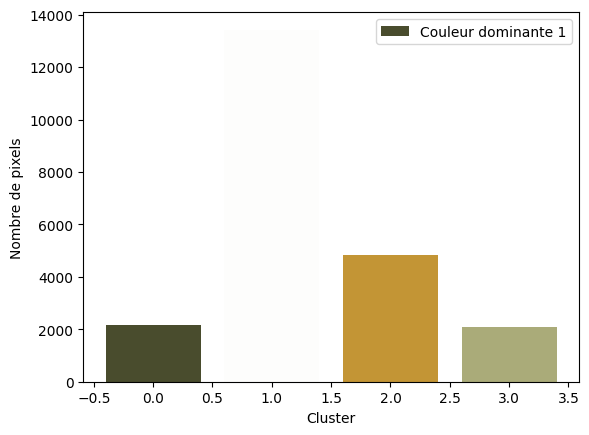

DataFrame pour l'image im-043_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [62.06419869 24.80636279 -7.22484229]
   Code couleur RGB: [0.73533985 0.52744308 0.64077179]
   Nombre de pixels: 1725

Cluster 2:
   Code couleur Lab: [23.96816559  5.72665736  9.27353681]
   Code couleur RGB: [0.27553029 0.21018856 0.17018315]
   Nombre de pixels: 3019

Cluster 3:
   Code couleur Lab: [44.89644513 43.44579191 38.98731621]
   Code couleur RGB: [0.71086008 0.27622789 0.16793789]
   Nombre de pixels: 3841

Cluster 4:
   Code couleur Lab: [ 9.94485149e+01  1.34751762e-01 -9.37621038e-02]
   Code couleur RGB: [0.99449532 0.99343038 0.99449923]
   Nombre de pixels: 13915



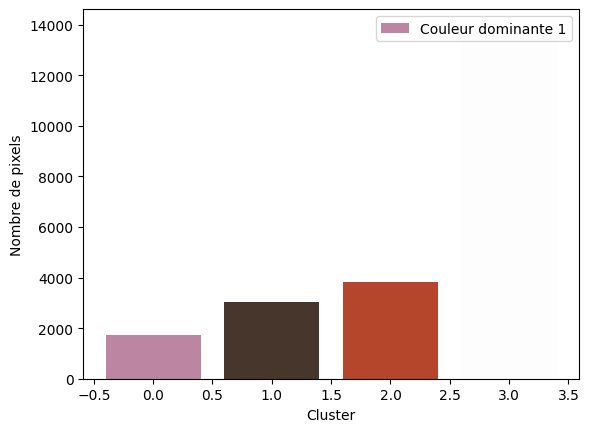

DataFrame pour l'image im-044_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.80444615e+01 1.44785947e-04 4.63061234e-01]
   Code couleur RGB: [0.97946447 0.97767335 0.97435032]
   Nombre de pixels: 12423

Cluster 2:
   Code couleur Lab: [53.83433033  0.76589329 47.70665548]
   Code couleur RGB: [0.59755649 0.49445986 0.16168468]
   Nombre de pixels: 7841

Cluster 3:
   Code couleur Lab: [21.21265713 -2.26219928 14.40569224]
   Code couleur RGB: [0.21607461 0.20121706 0.11584927]
   Nombre de pixels: 1903

Cluster 4:
   Code couleur Lab: [ 49.44655253  58.40216737 -79.3986638 ]
   Code couleur RGB: [0.50062473 0.32483795 1.        ]
   Nombre de pixels: 333



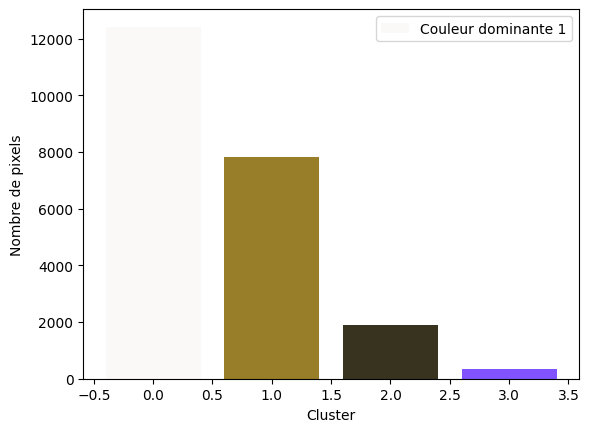

DataFrame pour l'image im-045_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.94989083e+01 8.44298867e-02 2.95511539e-01]
   Code couleur RGB: [0.99604787 0.99400889 0.99211297]
   Nombre de pixels: 12992

Cluster 2:
   Code couleur Lab: [39.91763796 40.11178726 43.54727809]
   Code couleur RGB: [0.63846177 0.2406412  0.08465373]
   Nombre de pixels: 6340

Cluster 3:
   Code couleur Lab: [ 37.02650481  75.51655188 -99.90234734]
   Code couleur RGB: [0.29487592 0.10969815 1.        ]
   Nombre de pixels: 752

Cluster 4:
   Code couleur Lab: [21.33548975  4.7791992  21.44811482]
   Code couleur RGB: [0.26125439 0.18790853 0.07443036]
   Nombre de pixels: 2416



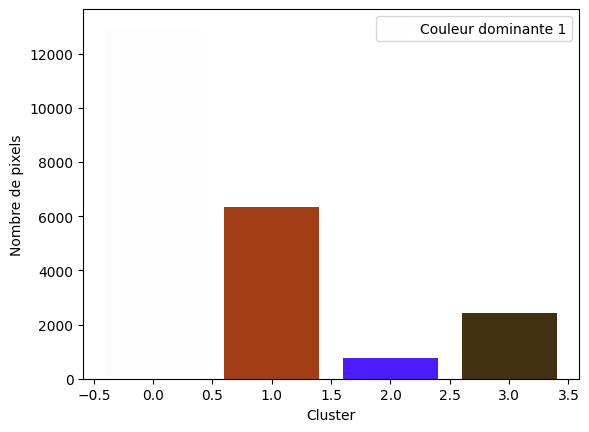

DataFrame pour l'image im-046_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 42.27817346   1.72674929 -22.99135444]
   Code couleur RGB: [0.30557698 0.39485177 0.5389168 ]
   Nombre de pixels: 1157

Cluster 2:
   Code couleur Lab: [ 9.94887620e+01  3.54339279e-02 -8.35471951e-02]
   Code couleur RGB: [0.99418317 0.99412553 0.99486505]
   Nombre de pixels: 14391

Cluster 3:
   Code couleur Lab: [51.64801743 -0.15978036 38.2955237 ]
   Code couleur RGB: [0.5586203  0.47586087 0.21857148]
   Nombre de pixels: 1482

Cluster 4:
   Code couleur Lab: [13.97945134 -8.16153733  8.13354338]
   Code couleur RGB: [0.10958412 0.1507326  0.09401363]
   Nombre de pixels: 5470



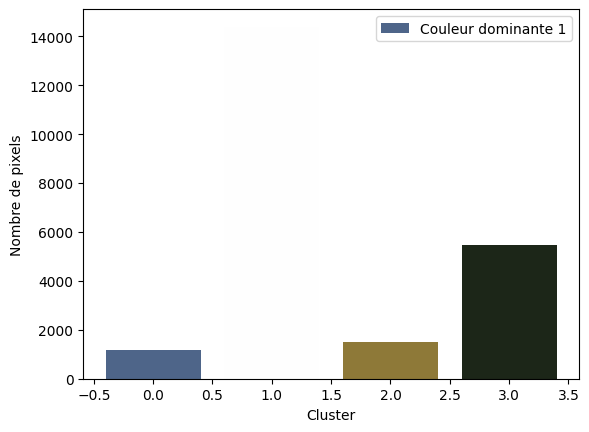

DataFrame pour l'image im-047_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [40.60846664 -0.79343174 34.14864988]
   Code couleur RGB: [0.43468639 0.37100083 0.14793948]
   Nombre de pixels: 4839

Cluster 2:
   Code couleur Lab: [ 9.92854856e+01 -1.01006813e-01  3.67525142e-02]
   Code couleur RGB: [0.99119846 0.99211276 0.99162606]
   Nombre de pixels: 12718

Cluster 3:
   Code couleur Lab: [  36.92120245   71.60946484 -100.13453067]
   Code couleur RGB: [0.2261402  0.14887138 1.        ]
   Nombre de pixels: 1138

Cluster 4:
   Code couleur Lab: [12.33402271 -0.43274925  5.16967249]
   Code couleur RGB: [0.13507058 0.12592322 0.09844786]
   Nombre de pixels: 3805



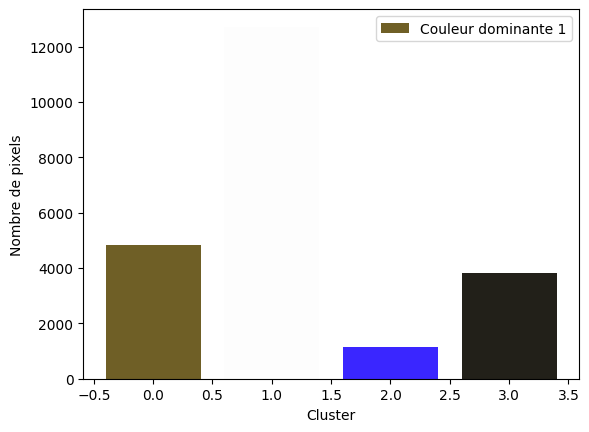

DataFrame pour l'image im-048_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.78278334e+01  5.04731692e-01 -7.88322858e-02]
   Code couleur RGB: [0.97916122 0.97415982 0.9760642 ]
   Nombre de pixels: 13444

Cluster 2:
   Code couleur Lab: [61.72924067 19.46583482 56.25263983]
   Code couleur RGB: [0.79972987 0.52583759 0.17233946]
   Nombre de pixels: 5757

Cluster 3:
   Code couleur Lab: [  34.50551352   76.56701551 -104.15172622]
   Code couleur RGB: [0.1772917  0.07521846 1.        ]
   Nombre de pixels: 111

Cluster 4:
   Code couleur Lab: [22.49795784  2.83669655  7.47282211]
   Code couleur RGB: [0.24373369 0.20379379 0.16795987]
   Nombre de pixels: 3188



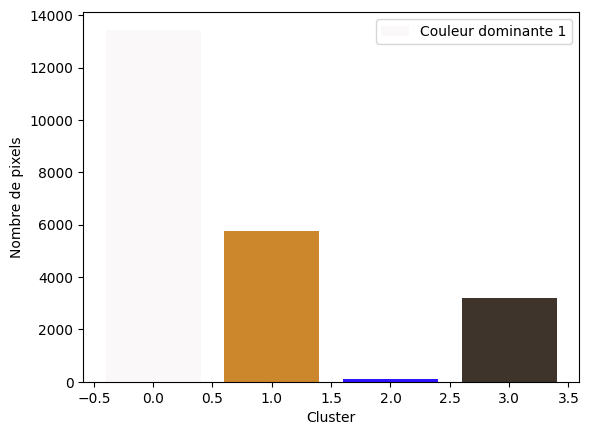

DataFrame pour l'image im-049_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.11428156 -0.11287619  0.85848073]
   Code couleur RGB: [0.99207909 0.98995492 0.98345567]
   Nombre de pixels: 13954

Cluster 2:
   Code couleur Lab: [54.97727119 32.14166018 55.47100339]
   Code couleur RGB: [0.78557588 0.41910928 0.11608586]
   Nombre de pixels: 4537

Cluster 3:
   Code couleur Lab: [21.54373252  5.9109468  13.5246402 ]
   Code couleur RGB: [0.2602148  0.18831127 0.12526416]
   Nombre de pixels: 3405

Cluster 4:
   Code couleur Lab: [ 54.49464537  71.19482567 -71.041714  ]
   Code couleur RGB: [0.71541366 0.29876685 1.        ]
   Nombre de pixels: 604



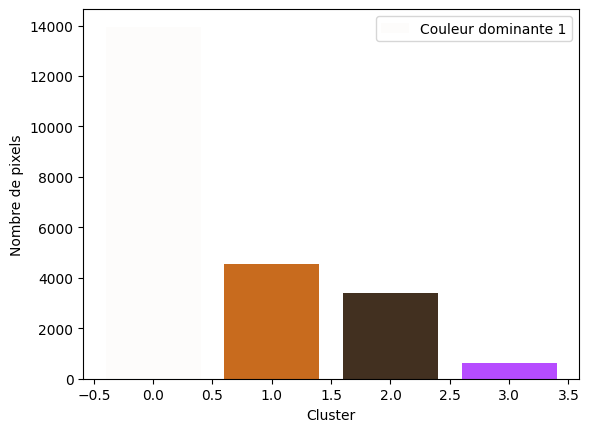

DataFrame pour l'image im-050_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [43.32847609  7.80070138 17.24444672]
   Code couleur RGB: [0.48849268 0.38046298 0.29121461]
   Nombre de pixels: 1899

Cluster 2:
   Code couleur Lab: [9.97060492e+01 8.15232346e-02 2.07937143e-01]
   Code couleur RGB: [0.99806617 0.99639474 0.99512884]
   Nombre de pixels: 14861

Cluster 3:
   Code couleur Lab: [11.13126589  3.53124394 -6.65780668]
   Code couleur RGB: [0.11810632 0.11194987 0.1520741 ]
   Nombre de pixels: 4088

Cluster 4:
   Code couleur Lab: [ 39.23184138  10.19712406 -16.1655682 ]
   Code couleur RGB: [0.3770196  0.34502074 0.46534415]
   Nombre de pixels: 1652



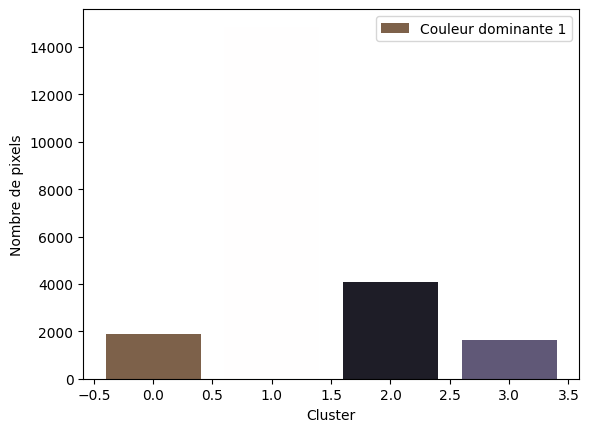

DataFrame pour l'image im-051_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [16.1348757   1.1179667   0.66637626]
   Code couleur RGB: [0.16516452 0.1548864  0.15348563]
   Nombre de pixels: 5940

Cluster 2:
   Code couleur Lab: [9.96027786e+01 2.68458940e-02 1.64209964e-01]
   Code couleur RGB: [0.99629361 0.99536746 0.99427998]
   Nombre de pixels: 12804

Cluster 3:
   Code couleur Lab: [63.33163228 24.47891691 62.29136501]
   Code couleur RGB: [0.850254   0.52691285 0.12848056]
   Nombre de pixels: 2319

Cluster 4:
   Code couleur Lab: [ 46.78708296   7.81459945 -25.7727966 ]
   Code couleur RGB: [0.38833696 0.42622079 0.60399652]
   Nombre de pixels: 1437



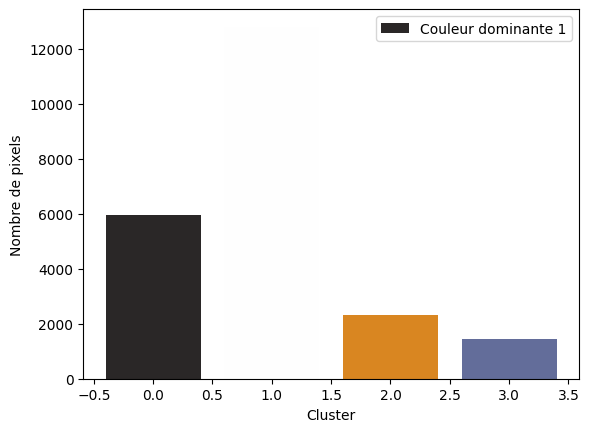

DataFrame pour l'image im-052_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
im-006_im.png  150,100,23    38,37,19
im-007_im.png  221,113,50   106,94,67
im-008_im.png    25,21,14  205,109,19
im-009_im.png  197,138,51    71,57,31
im-010_im.png  225,165,86   127,95,80
im-011_im.png   178,68,30    67,59,65
im-012_im.png   218,96,21    66,43,17
im-013_im.png   161,64,37    74,57,45
im-014_im.png   208,82,14    46,24,14
im-015_im.png   102,59,25  186,124,77
im-016_im.png    56,50,37   159,81,43
im-017_im.png  165,106,25    51,33,18
im-018_im.png   215,74,10  203,65,255
im-019_im.png    23,20,14    56,3,255
im-020_im.png   119,53,28    59,49,45
im-021_im.png   176,75,10    47,32,13
im-022_im.png   171,71,36    38,42,25
im-023_im.png    41,36,39  203,124,29
im-024_im.png    32,27,20   127,78,34
im-025_im.pn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.99563511e+01 -2.80819625e-02  3.65746157e-02]
   Code couleur RGB: [0.99940986 0.99955654 0.99925793]
   Nombre de pixels: 13590

Cluster 2:
   Code couleur Lab: [ 9.43042514 -2.5608698   5.5411119 ]
   Code couleur RGB: [0.10176011 0.10634178 0.07266957]
   Nombre de pixels: 5109

Cluster 3:
   Code couleur Lab: [  35.99387001   77.24251982 -101.63700993]
   Code couleur RGB: [0.27400574 0.07703198 1.        ]
   Nombre de pixels: 448

Cluster 4:
   Code couleur Lab: [50.04067754 19.52909253  8.71332195]
   Code couleur RGB: [0.61054297 0.41728809 0.41217246]
   Nombre de pixels: 3353



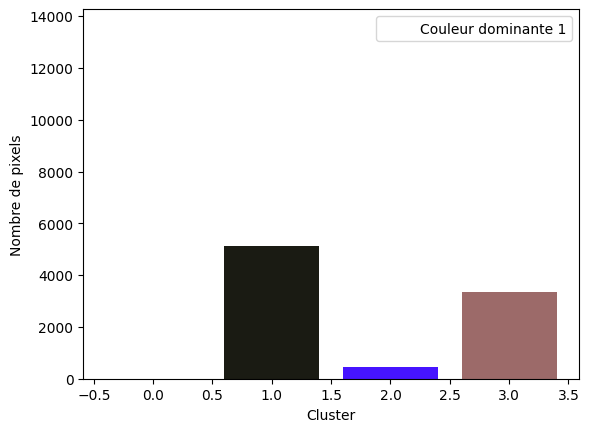

DataFrame pour l'image im-053_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [23.21191305 -4.12970152 21.57986165]
   Code couleur RGB: [0.23336308 0.22084317 0.08645   ]
   Nombre de pixels: 988

Cluster 2:
   Code couleur Lab: [9.96949052e+01 1.06736615e-01 6.80300520e-02]
   Code couleur RGB: [0.99764505 0.99624854 0.99606705]
   Nombre de pixels: 16556

Cluster 3:
   Code couleur Lab: [38.1529246  32.10135589 36.53720603]
   Code couleur RGB: [0.57703312 0.25752569 0.12087642]
   Nombre de pixels: 3266

Cluster 4:
   Code couleur Lab: [ 41.41282424  75.11749619 -92.5344218 ]
   Code couleur RGB: [0.4418281  0.15074969 1.        ]
   Nombre de pixels: 1690



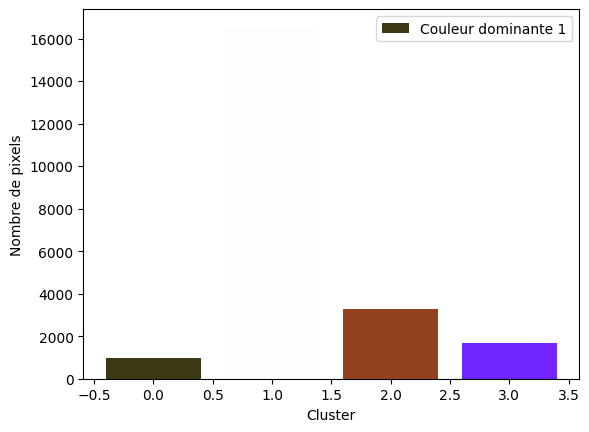

DataFrame pour l'image im-054_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [56.25631289 16.47747827 55.55677041]
   Code couleur RGB: [0.7186974  0.47928618 0.11734234]
   Nombre de pixels: 2824

Cluster 2:
   Code couleur Lab: [99.67552908  0.22315543  0.17977685]
   Code couleur RGB: [0.99876656 0.9957121  0.99501558]
   Nombre de pixels: 15418

Cluster 3:
   Code couleur Lab: [ 41.39758649  71.29893862 -92.7354339 ]
   Code couleur RGB: [0.40077894 0.18470141 1.        ]
   Nombre de pixels: 1796

Cluster 4:
   Code couleur Lab: [15.66056157  4.9409447  17.82046639]
   Code couleur RGB: [0.20666726 0.14084067 0.04885946]
   Nombre de pixels: 2462



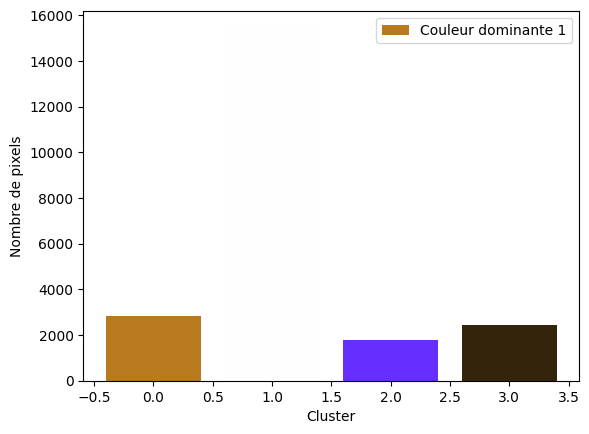

DataFrame pour l'image im-055_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64639363  0.40582341 -0.12157163]
   Code couleur RGB: [0.99884116 0.99502653 0.99699571]
   Nombre de pixels: 15264

Cluster 2:
   Code couleur Lab: [13.78431064  6.38183009 13.80379913]
   Code couleur RGB: [0.19248591 0.12319836 0.06048282]
   Nombre de pixels: 3068

Cluster 3:
   Code couleur Lab: [ 42.73873249  73.95224656 -90.50595007]
   Code couleur RGB: [0.46663575 0.17352908 1.        ]
   Nombre de pixels: 1014

Cluster 4:
   Code couleur Lab: [61.62817988 25.54547259 62.62453936]
   Code couleur RGB: [0.83554689 0.50637676 0.10362045]
   Nombre de pixels: 3154



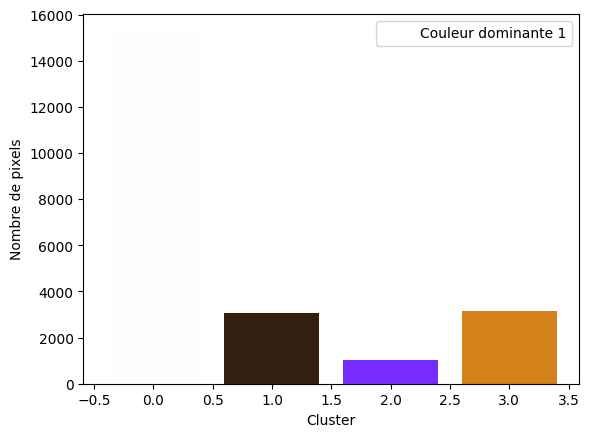

DataFrame pour l'image im-056_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [46.01360307 48.36445648 53.66884583]
   Code couleur RGB: [0.75473021 0.26164973 0.04919702]
   Nombre de pixels: 3239

Cluster 2:
   Code couleur Lab: [99.60515209 -0.21752255  0.35972186]
   Code couleur RGB: [0.99503554 0.99592921 0.99278996]
   Nombre de pixels: 15724

Cluster 3:
   Code couleur Lab: [ 41.85061431  79.08880022 -91.85417269]
   Code couleur RGB: [0.49024909 0.10820273 1.        ]
   Nombre de pixels: 1133

Cluster 4:
   Code couleur Lab: [9.44055736 5.00674783 7.22190241]
   Code couleur RGB: [0.1417947  0.09280099 0.06272034]
   Nombre de pixels: 2404



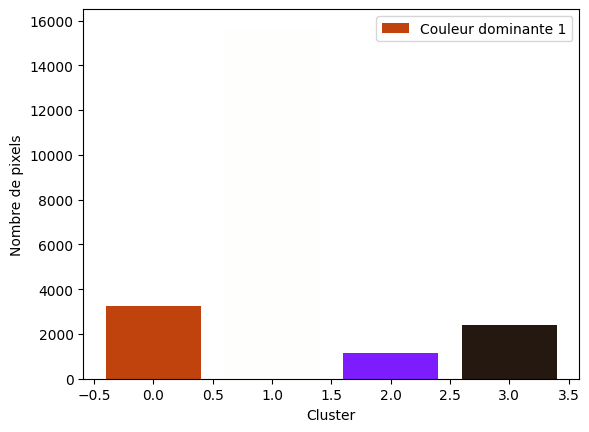

DataFrame pour l'image im-057_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.27840006 -0.18816816 -0.19558035]
   Code couleur RGB: [0.98957757 0.99231278 0.99329434]
   Nombre de pixels: 12872

Cluster 2:
   Code couleur Lab: [ 8.5810181  -4.13041328  3.18584959]
   Code couleur RGB: [0.08096725 0.10249074 0.07915022]
   Nombre de pixels: 6843

Cluster 3:
   Code couleur Lab: [ 38.63923206  78.20236589 -97.25601498]
   Code couleur RGB: [0.3869377  0.08754352 1.        ]
   Nombre de pixels: 434

Cluster 4:
   Code couleur Lab: [50.64730849  3.32580045 48.89456589]
   Code couleur RGB: [0.57813107 0.45722591 0.1182083 ]
   Nombre de pixels: 2351



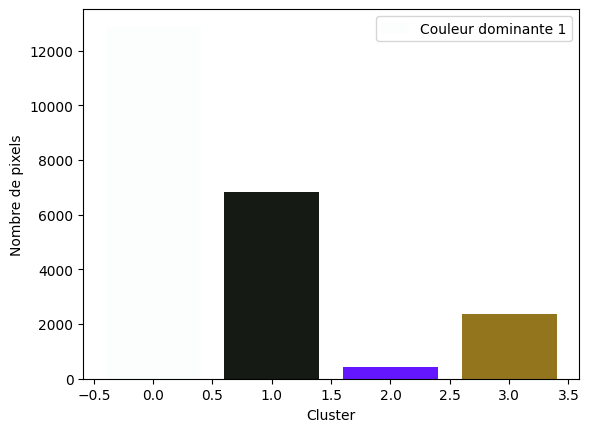

DataFrame pour l'image im-058_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [53.19787396 38.97289506 51.09151502]
   Code couleur RGB: [0.79608109 0.37706004 0.14552076]
   Nombre de pixels: 4756

Cluster 2:
   Code couleur Lab: [99.34043829 -0.12460815  0.82146654]
   Code couleur RGB: [0.99442127 0.99256108 0.98629827]
   Nombre de pixels: 10780

Cluster 3:
   Code couleur Lab: [22.38038196  5.79208969 23.13805948]
   Code couleur RGB: [0.27754024 0.19445405 0.07191162]
   Nombre de pixels: 6356

Cluster 4:
   Code couleur Lab: [ 37.47780158  75.48204472 -99.14611461]
   Code couleur RGB: [0.3131611  0.11375419 1.        ]
   Nombre de pixels: 608



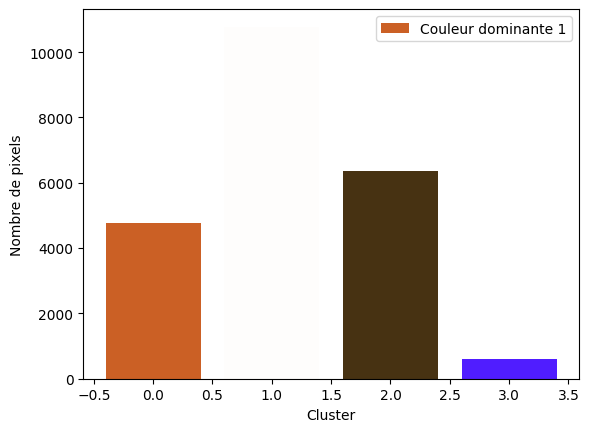

DataFrame pour l'image im-059_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [21.71800574 25.34062819 23.06678787]
   Code couleur RGB: [0.3585577  0.13336257 0.07380881]
   Nombre de pixels: 5976

Cluster 2:
   Code couleur Lab: [ 9.97052073e+01 -5.59931389e-02  1.86429031e-01]
   Code couleur RGB: [0.99686466 0.99672556 0.99526322]
   Nombre de pixels: 12459

Cluster 3:
   Code couleur Lab: [55.86923322 18.711411   -6.12839088]
   Code couleur RGB: [0.63314984 0.48153952 0.56842467]
   Nombre de pixels: 913

Cluster 4:
   Code couleur Lab: [15.91383597 -1.44370504 11.74940324]
   Code couleur RGB: [0.17044217 0.15568725 0.08957182]
   Nombre de pixels: 3152



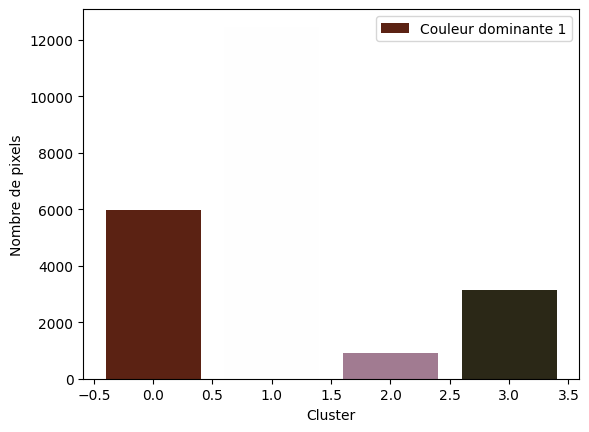

DataFrame pour l'image im-060_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
im-006_im.png  150,100,23     38,37,19
im-007_im.png  221,113,50    106,94,67
im-008_im.png    25,21,14   205,109,19
im-009_im.png  197,138,51     71,57,31
im-010_im.png  225,165,86    127,95,80
im-011_im.png   178,68,30     67,59,65
im-012_im.png   218,96,21     66,43,17
im-013_im.png   161,64,37     74,57,45
im-014_im.png   208,82,14     46,24,14
im-015_im.png   102,59,25   186,124,77
im-016_im.png    56,50,37    159,81,43
im-017_im.png  165,106,25     51,33,18
im-018_im.png   215,74,10   203,65,255
im-019_im.png    23,20,14     56,3,255
im-020_im.png   119,53,28     59,49,45
im-021_im.png   176,75,10     47,32,13
im-022_im.png   171,71,36     38,42,25
im-023_im.png    41,36,39   203,124,29
im-024_im.png    32,27,20 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [57.51625793 26.20340037 -4.30297839]
   Code couleur RGB: [0.70212411 0.47617081 0.57402498]
   Nombre de pixels: 1640

Cluster 2:
   Code couleur Lab: [ 9.98984611e+01 -2.11976319e-02  2.06242454e-02]
   Code couleur RGB: [0.9987507  0.99888655 0.99872193]
   Nombre de pixels: 15411

Cluster 3:
   Code couleur Lab: [11.72141561  2.49406706  3.45870302]
   Code couleur RGB: [0.14204736 0.11617812 0.10319124]
   Nombre de pixels: 1982

Cluster 4:
   Code couleur Lab: [30.25178918 34.89624089 29.63789258]
   Code couleur RGB: [0.49645761 0.17140945 0.10371277]
   Nombre de pixels: 3467



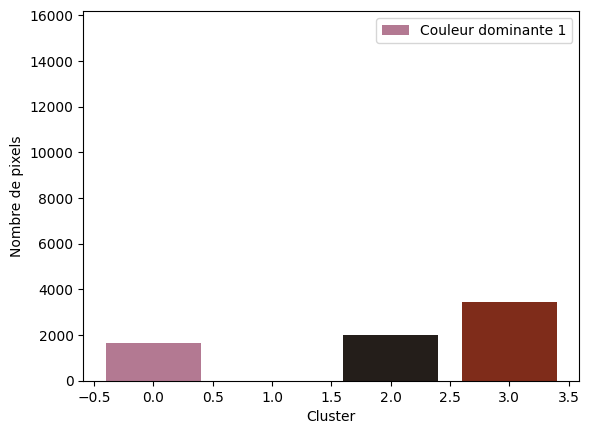

DataFrame pour l'image im-061_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-057_im.png   192,67,13    36,24,16
im-058_im.png    21,26,20  147,117,30
im-059_im.png    71,50,18   203,96,37
im-060_im.png    91,34,19    43,40,23
im-061_im.png   127,44,26    36,30,26

[61 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.88987064e+01 8.63511833e-02 5.11450659e-01]
   Code couleur RGB: [0.99001523 0.987129   0.98366909]
   Nombre de pixels: 10826

Cluster 2:
   Code couleur Lab: [49.75442495 27.89416635 49.16741907]
   Code couleur RGB: [0.69826432 0.38232167 0.12147937]
   Nombre de pixels: 6361

Cluster 3:
   Code couleur Lab: [29.88550461 -0.63970828 20.91597016]
   Code couleur RGB: [0.31383064 0.27341695 0.14723231]
   Nombre de pixels: 4752

Cluster 4:
   Code couleur Lab: [ 50.30979969  68.12360557 -77.80095572]
   Code couleur RGB: [0.60480592 0.28005344 1.        ]
   Nombre de pixels: 561



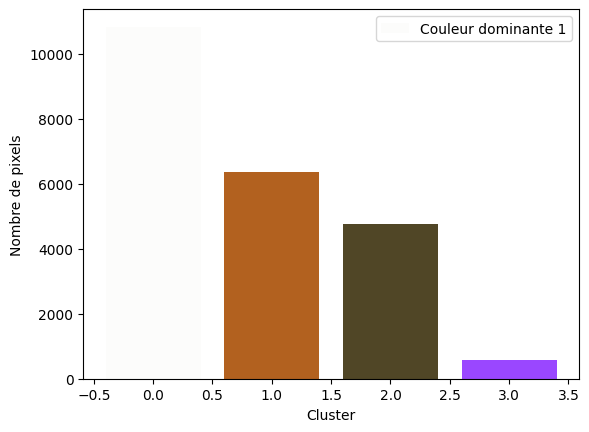

DataFrame pour l'image im-062_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-058_im.png    21,26,20  147,117,30
im-059_im.png    71,50,18   203,96,37
im-060_im.png    91,34,19    43,40,23
im-061_im.png   127,44,26    36,30,26
im-062_im.png   178,97,31    80,70,38

[62 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.06500045  0.23884224  0.10950529]
   Code couleur RGB: [0.99170895 0.98876434 0.98862023]
   Nombre de pixels: 12139

Cluster 2:
   Code couleur Lab: [28.48161821 33.02058439 26.00511706]
   Code couleur RGB: [0.46637284 0.16347864 0.11229974]
   Nombre de pixels: 7480

Cluster 3:
   Code couleur Lab: [ 38.01115612  78.96011702 -98.20169581]
   Code couleur RGB: [0.3754409  0.06701821 1.        ]
   Nombre de pixels: 298

Cluster 4:
   Code couleur Lab: [20.95059509  2.17651161 -0.11381738]
   Code couleur RGB: [0.21017688 0.1934198  0.19835606]
   Nombre de pixels: 2583



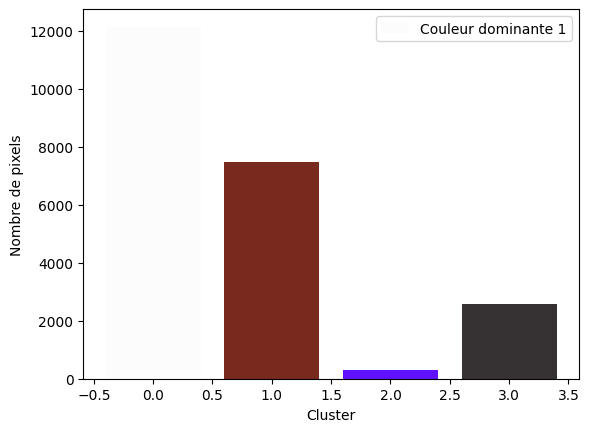

DataFrame pour l'image im-063_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-059_im.png    71,50,18  203,96,37
im-060_im.png    91,34,19   43,40,23
im-061_im.png   127,44,26   36,30,26
im-062_im.png   178,97,31   80,70,38
im-063_im.png   119,42,29   54,49,51

[63 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.99078617e+01 -2.53132883e-02  3.21805811e-02]
   Code couleur RGB: [0.99886547 0.99899995 0.9987405 ]
   Nombre de pixels: 14683

Cluster 2:
   Code couleur Lab: [24.01686903 19.55204921 26.3856882 ]
   Code couleur RGB: [0.35936439 0.17282058 0.06798209]
   Nombre de pixels: 1290

Cluster 3:
   Code couleur Lab: [ 53.96802552  61.16395935 -71.94858754]
   Code couleur RGB: [0.62959079 0.3496591  1.        ]
   Nombre de pixels: 1281

Cluster 4:
   Code couleur Lab: [58.81338302 17.21740077 60.55763955]
   Code couleur RGB: [0.75584992 0.50232503 0.08582066]
   Nombre de pixels: 5246



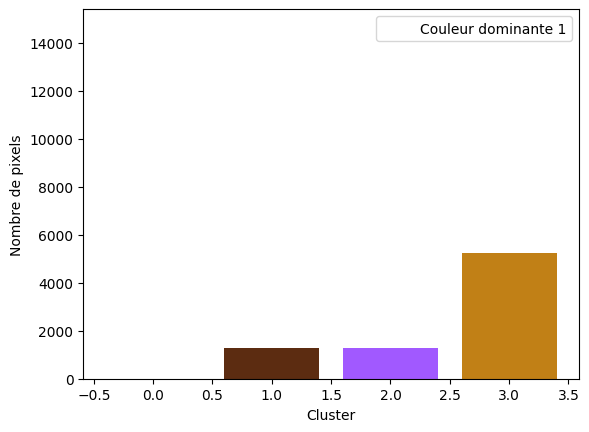

DataFrame pour l'image im-064_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-060_im.png    91,34,19   43,40,23
im-061_im.png   127,44,26   36,30,26
im-062_im.png   178,97,31   80,70,38
im-063_im.png   119,42,29   54,49,51
im-064_im.png  193,128,22   92,44,17

[64 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.89523663e+01  1.18506149e+00 -7.62298528e-02]
   Code couleur RGB: [0.99740418 0.98523627 0.98888118]
   Nombre de pixels: 16358

Cluster 2:
   Code couleur Lab: [72.57816813  9.17503926 70.5357903 ]
   Code couleur RGB: [0.88110698 0.66364714 0.1248514 ]
   Nombre de pixels: 3557

Cluster 3:
   Code couleur Lab: [ 39.69991229  68.73224127 -95.52357339]
   Code couleur RGB: [0.31052462 0.19107183 1.        ]
   Nombre de pixels: 690

Cluster 4:
   Code couleur Lab: [22.25919917 -0.95983831 21.06596556]
   Code couleur RGB: [0.24086344 0.20703867 0.08288116]
   Nombre de pixels: 1895



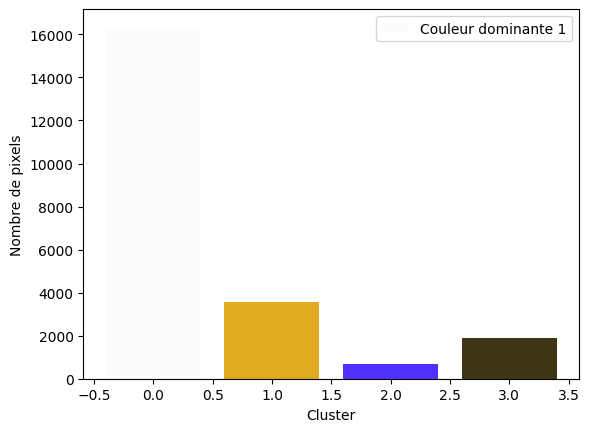

DataFrame pour l'image im-065_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-061_im.png   127,44,26   36,30,26
im-062_im.png   178,97,31   80,70,38
im-063_im.png   119,42,29   54,49,51
im-064_im.png  193,128,22   92,44,17
im-065_im.png  225,169,32   61,53,21

[65 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [37.94591698 35.56454777 35.23528981]
   Code couleur RGB: [0.59006881 0.24209056 0.13028844]
   Nombre de pixels: 6154

Cluster 2:
   Code couleur Lab: [9.85522680e+01 2.96759125e-01 9.73469413e-02]
   Code couleur RGB: [0.98631706 0.98281411 0.982907  ]
   Nombre de pixels: 13265

Cluster 3:
   Code couleur Lab: [23.72648173  4.95808652  2.29593144]
   Code couleur RGB: [0.25608763 0.21113658 0.20864946]
   Nombre de pixels: 2955

Cluster 4:
   Code couleur Lab: [ 44.94854471  78.4808501  -86.56885105]
   Code couleur RGB: [0.5639101  0.14823569 1.        ]
   Nombre de pixels: 126



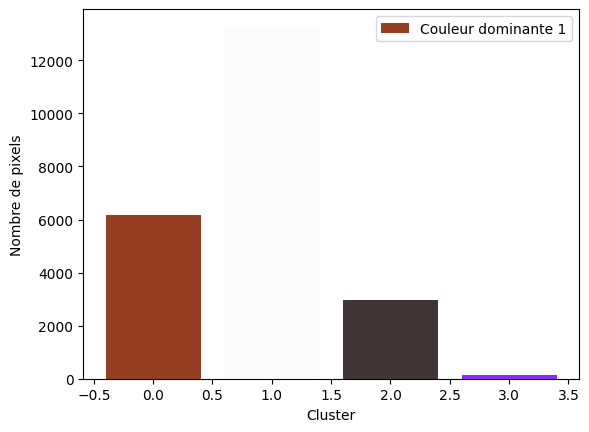

DataFrame pour l'image im-066_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-062_im.png   178,97,31   80,70,38
im-063_im.png   119,42,29   54,49,51
im-064_im.png  193,128,22   92,44,17
im-065_im.png  225,169,32   61,53,21
im-066_im.png   150,62,33   65,54,53

[66 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [15.18628785  5.15812313 12.01802441]
   Code couleur RGB: [0.19707058 0.13733082 0.08356729]
   Nombre de pixels: 3624

Cluster 2:
   Code couleur Lab: [ 40.89936893  71.04168331 -93.50783242]
   Code couleur RGB: [0.38252772 0.18272622 1.        ]
   Nombre de pixels: 153

Cluster 3:
   Code couleur Lab: [44.14311537 16.97450652 44.91245139]
   Code couleur RGB: [0.57596955 0.361242   0.09795016]
   Nombre de pixels: 6435

Cluster 4:
   Code couleur Lab: [98.36114796  0.15465139  0.49028206]
   Code couleur RGB: [0.98439534 0.98087704 0.97774994]
   Nombre de pixels: 12288



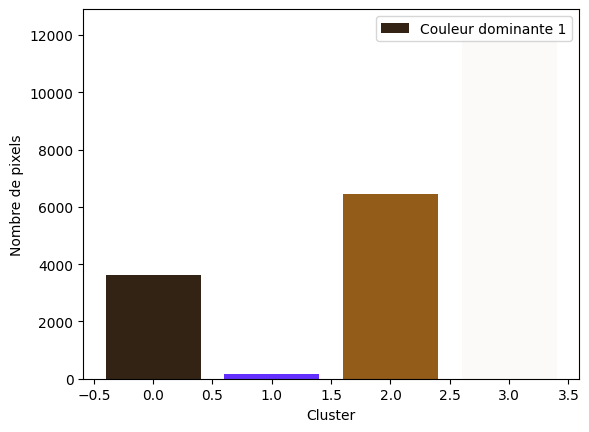

DataFrame pour l'image im-067_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-063_im.png   119,42,29   54,49,51
im-064_im.png  193,128,22   92,44,17
im-065_im.png  225,169,32   61,53,21
im-066_im.png   150,62,33   65,54,53
im-067_im.png   147,92,25   50,35,21

[67 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.51593234 -0.10422693  0.68014289]
   Code couleur RGB: [0.99607927 0.99454609 0.98936317]
   Nombre de pixels: 15633

Cluster 2:
   Code couleur Lab: [20.73259245 10.11579086 15.99096455]
   Code couleur RGB: [0.27565466 0.17162882 0.10497079]
   Nombre de pixels: 1736

Cluster 3:
   Code couleur Lab: [58.06808978 34.65566658 61.3118923 ]
   Code couleur RGB: [0.83911424 0.44084775 0.08426723]
   Nombre de pixels: 4113

Cluster 4:
   Code couleur Lab: [ 54.0231262   69.75927945 -71.93492629]
   Code couleur RGB: [0.69492616 0.30348065 1.        ]
   Nombre de pixels: 1018



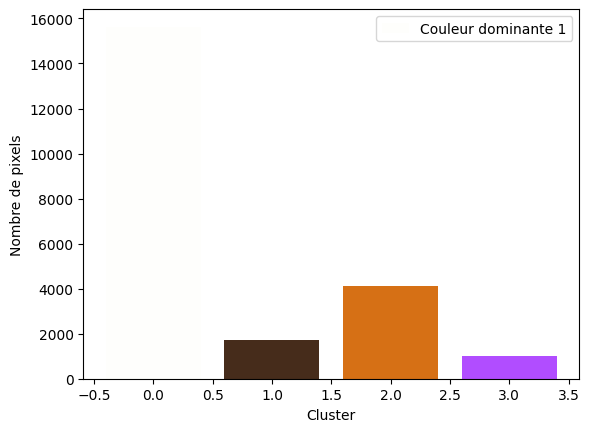

DataFrame pour l'image im-068_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-064_im.png  193,128,22   92,44,17
im-065_im.png  225,169,32   61,53,21
im-066_im.png   150,62,33   65,54,53
im-067_im.png   147,92,25   50,35,21
im-068_im.png  214,112,21   70,44,27

[68 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.37451229 -0.10538273  0.1974296 ]
   Code couleur RGB: [0.99274743 0.99308624 0.99141805]
   Nombre de pixels: 15935

Cluster 2:
   Code couleur Lab: [21.30370609 -0.30884546 13.27197074]
   Code couleur RGB: [0.22573241 0.19863232 0.12369995]
   Nombre de pixels: 2529

Cluster 3:
   Code couleur Lab: [ 40.98293508  69.76707005 -93.42489513]
   Code couleur RGB: [0.37022806 0.19313983 1.        ]
   Nombre de pixels: 752

Cluster 4:
   Code couleur Lab: [59.60279826  3.42335139 48.81408739]
   Code couleur RGB: [0.67815232 0.54614058 0.21096376]
   Nombre de pixels: 3284



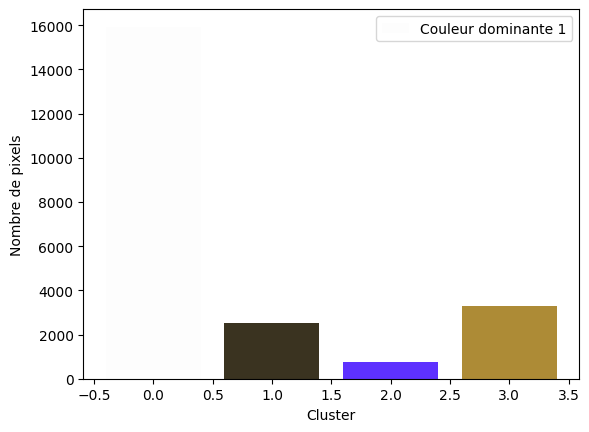

DataFrame pour l'image im-069_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-065_im.png  225,169,32   61,53,21
im-066_im.png   150,62,33   65,54,53
im-067_im.png   147,92,25   50,35,21
im-068_im.png  214,112,21   70,44,27
im-069_im.png  173,139,54   58,51,32

[69 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.99398324e+01 3.27270046e-02 5.12933336e-02]
   Code couleur RGB: [0.99976853 0.99921663 0.99896694]
   Nombre de pixels: 14624

Cluster 2:
   Code couleur Lab: [47.23107546 50.07812604 56.36804578]
   Code couleur RGB: [0.77883412 0.26519847 0.02797648]
   Nombre de pixels: 4642

Cluster 3:
   Code couleur Lab: [ 39.67730251  75.75852751 -95.48409932]
   Code couleur RGB: [0.39486983 0.12910994 1.        ]
   Nombre de pixels: 995

Cluster 4:
   Code couleur Lab: [18.28329842 23.42646208 24.47270038]
   Code couleur RGB: [0.31615962 0.11004607 0.02670956]
   Nombre de pixels: 2239



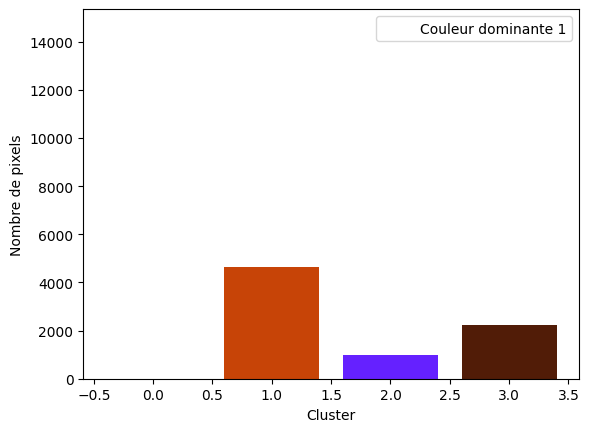

DataFrame pour l'image im-070_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-066_im.png   150,62,33   65,54,53
im-067_im.png   147,92,25   50,35,21
im-068_im.png  214,112,21   70,44,27
im-069_im.png  173,139,54   58,51,32
im-070_im.png    199,68,7    81,28,7

[70 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.67513268 -0.20359024  0.49466198]
   Code couleur RGB: [0.99642416 0.99665041 0.99256285]
   Nombre de pixels: 15614

Cluster 2:
   Code couleur Lab: [27.89703827 -2.12081881 20.59531225]
   Code couleur RGB: [0.28646333 0.25849758 0.13223021]
   Nombre de pixels: 1787

Cluster 3:
   Code couleur Lab: [53.22020934 39.21296061 56.38775307]
   Code couleur RGB: [0.80029461 0.37576135 0.0920413 ]
   Nombre de pixels: 4430

Cluster 4:
   Code couleur Lab: [ 53.1390015   75.41429183 -73.08647538]
   Code couleur RGB: [0.71875997 0.25681712 1.        ]
   Nombre de pixels: 669



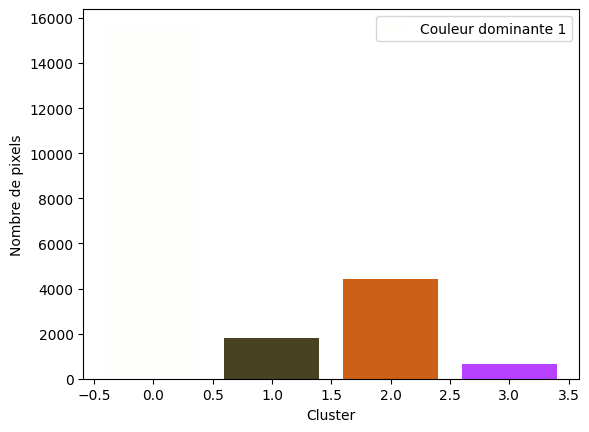

DataFrame pour l'image im-071_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-067_im.png   147,92,25   50,35,21
im-068_im.png  214,112,21   70,44,27
im-069_im.png  173,139,54   58,51,32
im-070_im.png    199,68,7    81,28,7
im-071_im.png   204,96,23   73,66,34

[71 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.62533462  0.12673984  0.11286992]
   Code couleur RGB: [0.99717665 0.99539628 0.99493948]
   Nombre de pixels: 16337

Cluster 2:
   Code couleur Lab: [21.9948081   0.10180553  7.61211494]
   Code couleur RGB: [0.22447313 0.20469537 0.16257849]
   Nombre de pixels: 1393

Cluster 3:
   Code couleur Lab: [47.8199542  34.63581613 35.43213263]
   Code couleur RGB: [0.69994865 0.34201186 0.21608894]
   Nombre de pixels: 4378

Cluster 4:
   Code couleur Lab: [ 43.80227036  78.08876543 -88.53580066]
   Code couleur RGB: [0.53240914 0.14118979 1.        ]
   Nombre de pixels: 392



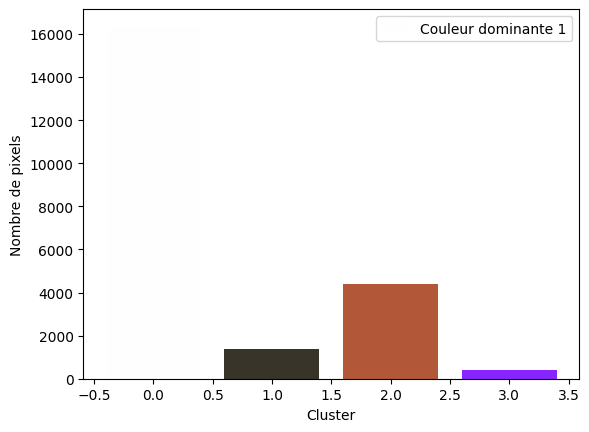

DataFrame pour l'image im-072_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-068_im.png  214,112,21   70,44,27
im-069_im.png  173,139,54   58,51,32
im-070_im.png    199,68,7    81,28,7
im-071_im.png   204,96,23   73,66,34
im-072_im.png   178,87,55   57,52,41

[72 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.05384868 -0.30658013  0.34814695]
   Code couleur RGB: [0.98801437 0.9898893  0.98660987]
   Nombre de pixels: 15982

Cluster 2:
   Code couleur Lab: [49.0070263  43.31224577 41.5546687 ]
   Code couleur RGB: [0.76108698 0.31826134 0.18595811]
   Nombre de pixels: 2168

Cluster 3:
   Code couleur Lab: [  34.73067166   79.33910243 -103.76391024]
   Code couleur RGB: [0.24531167 0.01836526 1.        ]
   Nombre de pixels: 570

Cluster 4:
   Code couleur Lab: [15.5604558   5.59551431  8.38141816]
   Code couleur RGB: [0.19781172 0.14002808 0.10691763]
   Nombre de pixels: 3780



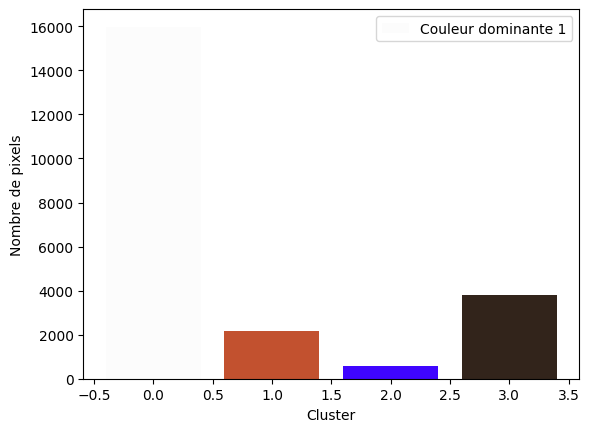

DataFrame pour l'image im-073_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-069_im.png  173,139,54   58,51,32
im-070_im.png    199,68,7    81,28,7
im-071_im.png   204,96,23   73,66,34
im-072_im.png   178,87,55   57,52,41
im-073_im.png    50,36,27  194,81,47

[73 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98788068e+01 5.75797111e-04 4.96001555e-02]
   Code couleur RGB: [0.99880777 0.99860163 0.99828169]
   Nombre de pixels: 11758

Cluster 2:
   Code couleur Lab: [48.21567251 52.91494543 45.61033987]
   Code couleur RGB: [0.79987886 0.26166059 0.15283604]
   Nombre de pixels: 7021

Cluster 3:
   Code couleur Lab: [11.26265284  5.70419886  4.5660591 ]
   Code couleur RGB: [0.15574814 0.10611981 0.09416984]
   Nombre de pixels: 2427

Cluster 4:
   Code couleur Lab: [69.78418063 34.37857272 -5.68711966]
   Code couleur RGB: [0.8854238  0.57734171 0.71305526]
   Nombre de pixels: 1294



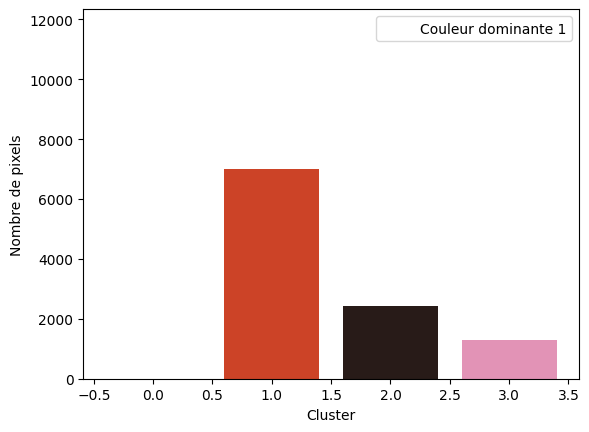

DataFrame pour l'image im-074_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-070_im.png    199,68,7    81,28,7
im-071_im.png   204,96,23   73,66,34
im-072_im.png   178,87,55   57,52,41
im-073_im.png    50,36,27  194,81,47
im-074_im.png   204,67,39   40,27,24

[74 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.46747036 -0.16173882  0.47244478]
   Code couleur RGB: [0.99432567 0.99419676 0.99038015]
   Nombre de pixels: 16116

Cluster 2:
   Code couleur Lab: [41.01495477 30.07366687 41.042274  ]
   Code couleur RGB: [0.60279219 0.29161068 0.11012857]
   Nombre de pixels: 4370

Cluster 3:
   Code couleur Lab: [  34.98008372   78.11871706 -103.34416081]
   Code couleur RGB: [0.23768245 0.05113527 1.        ]
   Nombre de pixels: 444

Cluster 4:
   Code couleur Lab: [12.29329796  0.12183572  9.13804299]
   Code couleur RGB: [0.1442768  0.1240238  0.07623172]
   Nombre de pixels: 1570



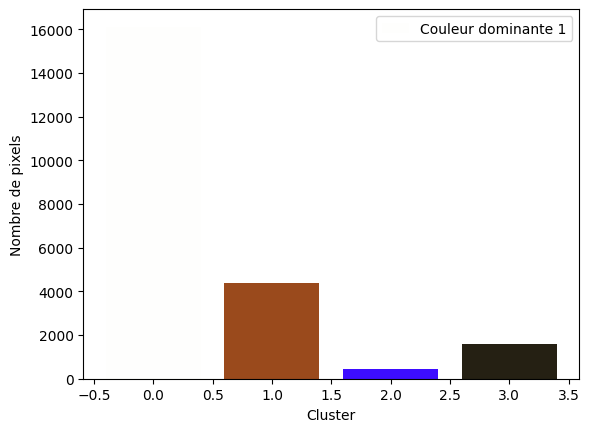

DataFrame pour l'image im-075_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-071_im.png   204,96,23   73,66,34
im-072_im.png   178,87,55   57,52,41
im-073_im.png    50,36,27  194,81,47
im-074_im.png   204,67,39   40,27,24
im-075_im.png   154,74,28   37,32,19

[75 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.81226075 -0.13710639  0.13165949]
   Code couleur RGB: [0.99722684 0.99815516 0.99688359]
   Nombre de pixels: 14430

Cluster 2:
   Code couleur Lab: [10.22805793  6.83925506  8.9299208 ]
   Code couleur RGB: [0.15868602 0.09481522 0.05910281]
   Nombre de pixels: 3933

Cluster 3:
   Code couleur Lab: [ 37.88574153  78.48329824 -98.45732614]
   Code couleur RGB: [0.3652467  0.07467505 1.        ]
   Nombre de pixels: 978

Cluster 4:
   Code couleur Lab: [37.15567332 34.56852658 40.97906219]
   Code couleur RGB: [0.57939662 0.23778462 0.07721911]
   Nombre de pixels: 3159



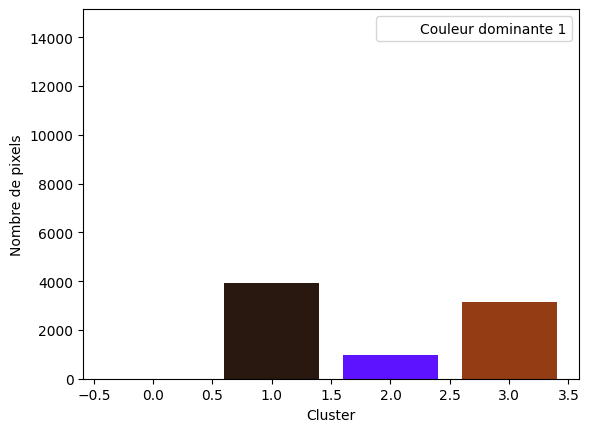

DataFrame pour l'image im-076_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-072_im.png   178,87,55   57,52,41
im-073_im.png    50,36,27  194,81,47
im-074_im.png   204,67,39   40,27,24
im-075_im.png   154,74,28   37,32,19
im-076_im.png    40,24,15  148,61,20

[76 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98596922e+01 1.89657957e-02 9.15154934e-02]
   Code couleur RGB: [0.99888961 0.99832722 0.99774896]
   Nombre de pixels: 13037

Cluster 2:
   Code couleur Lab: [10.15750506  1.74339067  7.4632098 ]
   Code couleur RGB: [0.13261921 0.10453758 0.06773489]
   Nombre de pixels: 2300

Cluster 3:
   Code couleur Lab: [49.8787343  23.57712471 47.23446237]
   Code couleur RGB: [0.67654142 0.39720128 0.13800418]
   Nombre de pixels: 6951

Cluster 4:
   Code couleur Lab: [  33.69993291   77.35422237 -105.49511308]
   Code couleur RGB: [0.13211086 0.05470005 1.        ]
   Nombre de pixels: 212



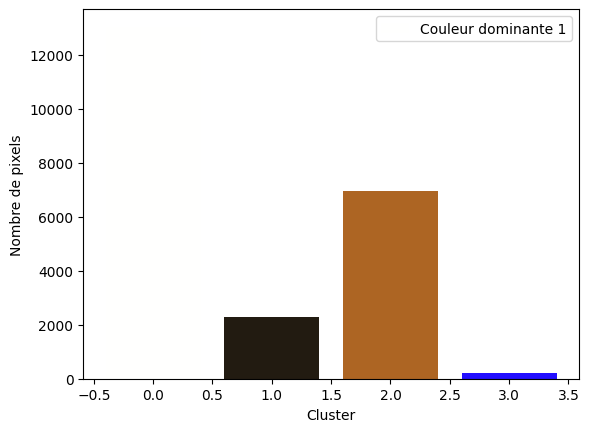

DataFrame pour l'image im-077_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-073_im.png    50,36,27  194,81,47
im-074_im.png   204,67,39   40,27,24
im-075_im.png   154,74,28   37,32,19
im-076_im.png    40,24,15  148,61,20
im-077_im.png  173,101,35   34,27,17

[77 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.81060129 -0.12643121  0.12705702]
   Code couleur RGB: [0.99727823 0.99811177 0.99690115]
   Nombre de pixels: 16420

Cluster 2:
   Code couleur Lab: [37.48610576 44.04947251 43.28446125]
   Code couleur RGB: [0.62744605 0.19631633 0.06679598]
   Nombre de pixels: 2559

Cluster 3:
   Code couleur Lab: [ 39.09231975  79.17912703 -96.41705919]
   Code couleur RGB: [0.41251905 0.07559827 1.        ]
   Nombre de pixels: 762

Cluster 4:
   Code couleur Lab: [24.01675366  8.45708741 18.64259474]
   Code couleur RGB: [0.30193878 0.20309516 0.11494325]
   Nombre de pixels: 2759



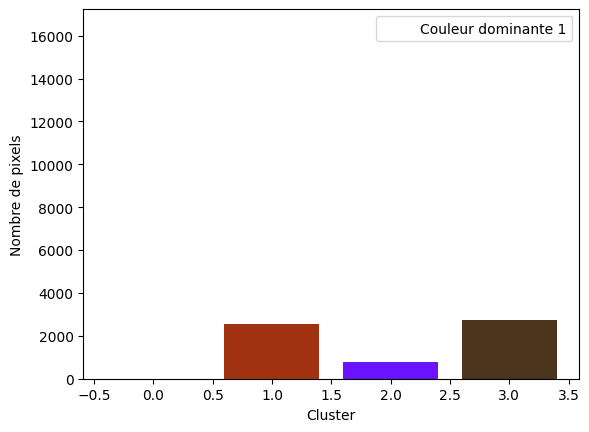

DataFrame pour l'image im-078_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-074_im.png   204,67,39   40,27,24
im-075_im.png   154,74,28   37,32,19
im-076_im.png    40,24,15  148,61,20
im-077_im.png  173,101,35   34,27,17
im-078_im.png    77,52,29  160,50,17

[78 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [46.6677269  23.11839153 49.20832035]
   Code couleur RGB: [0.63830922 0.36732902 0.08470956]
   Nombre de pixels: 7191

Cluster 2:
   Code couleur Lab: [ 9.86381369e+01 -3.87732748e-02  3.83761584e-01]
   Code couleur RGB: [0.98559573 0.98451588 0.9816657 ]
   Nombre de pixels: 11995

Cluster 3:
   Code couleur Lab: [12.18665713 -1.59014434  6.30030789]
   Code couleur RGB: [0.12981131 0.12649587 0.09106487]
   Nombre de pixels: 3180

Cluster 4:
   Code couleur Lab: [ 52.96820005  68.25057009 -73.36374121]
   Code couleur RGB: [0.66367087 0.30262614 1.        ]
   Nombre de pixels: 134



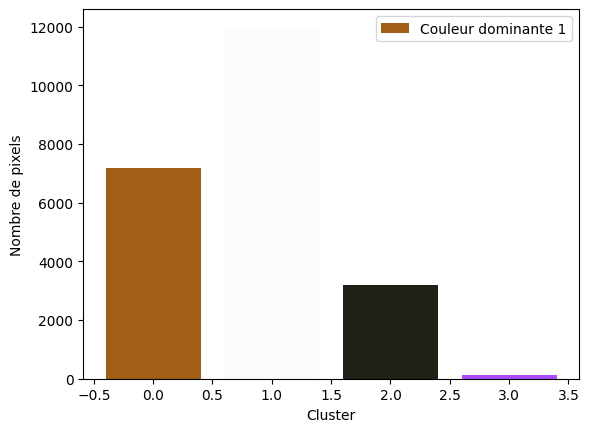

DataFrame pour l'image im-079_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-075_im.png   154,74,28   37,32,19
im-076_im.png    40,24,15  148,61,20
im-077_im.png  173,101,35   34,27,17
im-078_im.png    77,52,29  160,50,17
im-079_im.png   163,94,22   33,32,23

[79 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.93395835e+01 -1.46646886e-01  8.51256605e-02]
   Code couleur RGB: [0.99161502 0.99282313 0.99186712]
   Nombre de pixels: 15259

Cluster 2:
   Code couleur Lab: [12.44206622  1.3734273   4.28014999]
   Code couleur RGB: [0.14374367 0.12378701 0.10428791]
   Nombre de pixels: 1416

Cluster 3:
   Code couleur Lab: [ 37.93272837  78.46139663 -98.35962817]
   Code couleur RGB: [0.36685471 0.07546671 1.        ]
   Nombre de pixels: 687

Cluster 4:
   Code couleur Lab: [28.9828561  26.73116764 26.83452534]
   Code couleur RGB: [0.4443627  0.19307903 0.10868643]
   Nombre de pixels: 5138



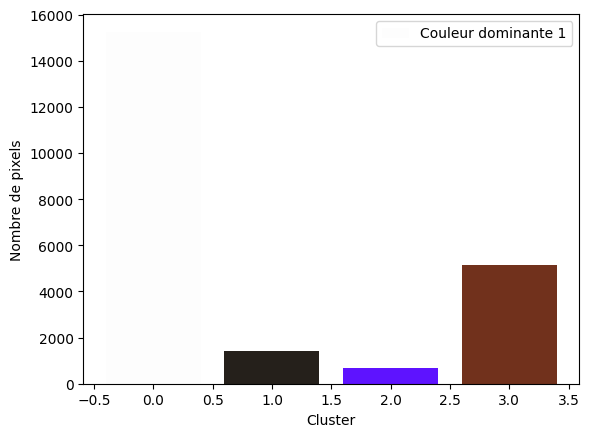

DataFrame pour l'image im-080_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-076_im.png    40,24,15  148,61,20
im-077_im.png  173,101,35   34,27,17
im-078_im.png    77,52,29  160,50,17
im-079_im.png   163,94,22   33,32,23
im-080_im.png   113,49,28   37,32,27

[80 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [  36.32646385   74.54987865 -101.09146957]
   Code couleur RGB: [0.247102   0.11560818 1.        ]
   Nombre de pixels: 556

Cluster 2:
   Code couleur Lab: [ 9.89872396e+01 -2.91506057e-02  3.38189498e-01]
   Code couleur RGB: [0.98947108 0.98846463 0.98596873]
   Nombre de pixels: 15416

Cluster 3:
   Code couleur Lab: [35.8729169  20.45204326 38.05905014]
   Code couleur RGB: [0.49720722 0.27486701 0.08174307]
   Nombre de pixels: 2805

Cluster 4:
   Code couleur Lab: [22.50263509 -2.09457495 13.53579534]
   Code couleur RGB: [0.22711793 0.21211861 0.13157757]
   Nombre de pixels: 3723



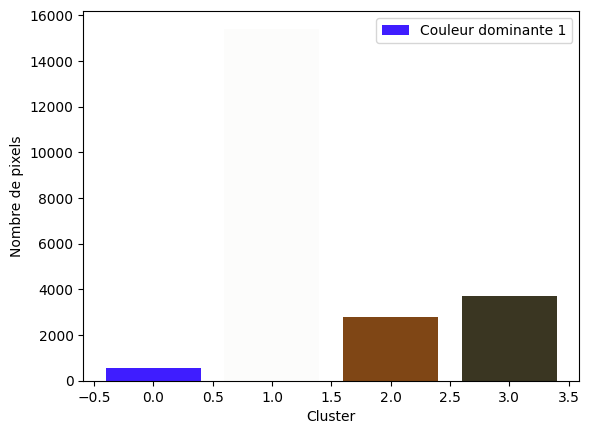

DataFrame pour l'image im-081_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-077_im.png  173,101,35   34,27,17
im-078_im.png    77,52,29  160,50,17
im-079_im.png   163,94,22   33,32,23
im-080_im.png   113,49,28   37,32,27
im-081_im.png    58,54,34  127,70,21

[81 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.47834184 3.0877025  8.51076337]
   Code couleur RGB: [0.13553629 0.09655969 0.05326255]
   Nombre de pixels: 3555

Cluster 2:
   Code couleur Lab: [ 9.94376895e+01 -1.23310350e-02 -7.45023958e-02]
   Code couleur RGB: [0.99324793 0.99365881 0.99420979]
   Nombre de pixels: 15697

Cluster 3:
   Code couleur Lab: [  35.68075125   77.40642384 -102.19233279]
   Code couleur RGB: [0.26117098 0.07161347 1.        ]
   Nombre de pixels: 1256

Cluster 4:
   Code couleur Lab: [57.84690757 25.30027028 59.64342568]
   Code couleur RGB: [0.78696136 0.46937058 0.09410408]
   Nombre de pixels: 1992



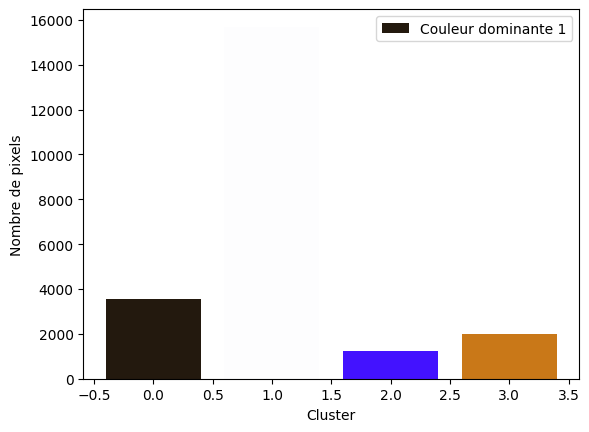

DataFrame pour l'image im-082_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-078_im.png    77,52,29   160,50,17
im-079_im.png   163,94,22    33,32,23
im-080_im.png   113,49,28    37,32,27
im-081_im.png    58,54,34   127,70,21
im-082_im.png    35,25,14  201,120,24

[82 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [97.73350428 -0.32553285  1.55290058]
   Code couleur RGB: [0.97715163 0.97462115 0.96255522]
   Nombre de pixels: 13011

Cluster 2:
   Code couleur Lab: [31.46200453  5.85611337 23.00646345]
   Code couleur RGB: [0.36637008 0.27389382 0.14847718]
   Nombre de pixels: 3379

Cluster 3:
   Code couleur Lab: [ 42.42278108  73.97941663 -90.92685136]
   Code couleur RGB: [0.4590339  0.17034988 1.        ]
   Nombre de pixels: 1306

Cluster 4:
   Code couleur Lab: [47.22409549 30.35478572 48.31386037]
   Code couleur RGB: [0.68035369 0.34960412 0.1054676 ]
   Nombre de pixels: 4804



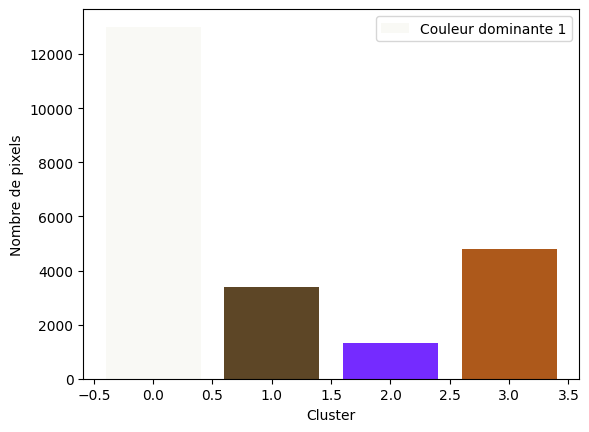

DataFrame pour l'image im-083_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-079_im.png   163,94,22    33,32,23
im-080_im.png   113,49,28    37,32,27
im-081_im.png    58,54,34   127,70,21
im-082_im.png    35,25,14  201,120,24
im-083_im.png   173,89,27    93,70,38

[83 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91686780e+01 -7.63646160e-02  6.64323529e-01]
   Code couleur RGB: [0.99230521 0.99054104 0.98554854]
   Nombre de pixels: 8756

Cluster 2:
   Code couleur Lab: [31.43873124 -4.50180964 23.05649676]
   Code couleur RGB: [0.30975914 0.29444061 0.14548343]
   Nombre de pixels: 6117

Cluster 3:
   Code couleur Lab: [ 45.76061377  68.79686356 -85.31932711]
   Code couleur RGB: [0.5017075  0.23732703 1.        ]
   Nombre de pixels: 1221

Cluster 4:
   Code couleur Lab: [44.21741511 24.25411174 39.93902899]
   Code couleur RGB: [0.61018269 0.3413824  0.14576356]
   Nombre de pixels: 6406



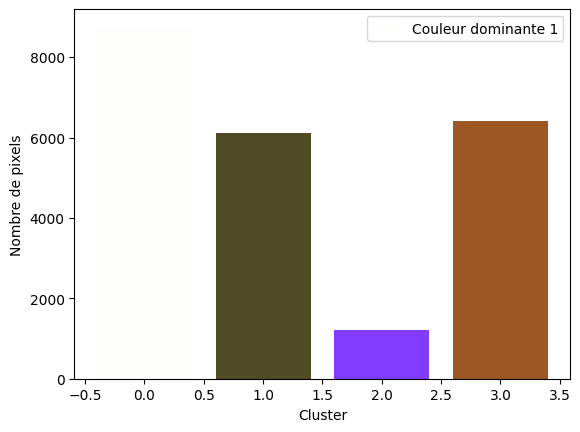

DataFrame pour l'image im-084_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-080_im.png   113,49,28    37,32,27
im-081_im.png    58,54,34   127,70,21
im-082_im.png    35,25,14  201,120,24
im-083_im.png   173,89,27    93,70,38
im-084_im.png   156,87,37    79,75,37

[84 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.86779603 -0.43641389  0.32449576]
   Code couleur RGB: [0.99611491 0.99945461 0.99600942]
   Nombre de pixels: 13842

Cluster 2:
   Code couleur Lab: [7.47778762 2.73884864 0.25442647]
   Code couleur RGB: [0.1032548  0.08328955 0.08704205]
   Nombre de pixels: 2199

Cluster 3:
   Code couleur Lab: [28.07375931 27.81217285 25.01684775]
   Code couleur RGB: [0.43819068 0.18108874 0.11344396]
   Nombre de pixels: 5014

Cluster 4:
   Code couleur Lab: [ 57.23174953  17.28865619 -10.25501643]
   Code couleur RGB: [0.62620164 0.5003875  0.61004984]
   Nombre de pixels: 1445



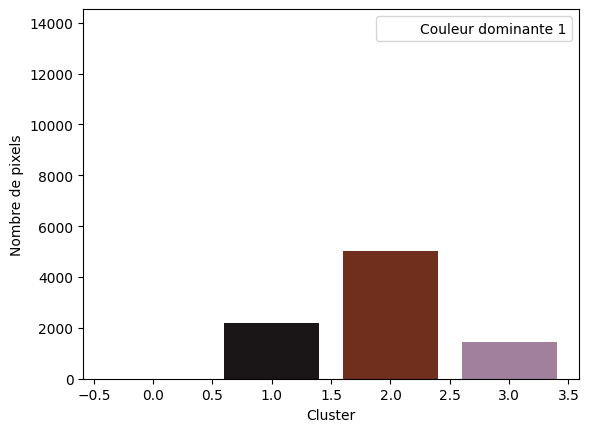

DataFrame pour l'image im-085_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-081_im.png    58,54,34   127,70,21
im-082_im.png    35,25,14  201,120,24
im-083_im.png   173,89,27    93,70,38
im-084_im.png   156,87,37    79,75,37
im-085_im.png   112,46,29    26,21,22

[85 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [55.89606447 15.63803157 51.42299361]
   Code couleur RGB: [0.70708653 0.47837037 0.15568263]
   Nombre de pixels: 2926

Cluster 2:
   Code couleur Lab: [99.16260943 -0.30109935  0.13481591]
   Code couleur RGB: [0.98853067 0.99117357 0.9894606 ]
   Nombre de pixels: 16632

Cluster 3:
   Code couleur Lab: [ 44.56009749  70.3993397  -87.46917164]
   Code couleur RGB: [0.48337374 0.21678347 1.        ]
   Nombre de pixels: 673

Cluster 4:
   Code couleur Lab: [24.08888537  8.11721839 13.42677895]
   Code couleur RGB: [0.29488548 0.20526968 0.1470689 ]
   Nombre de pixels: 2269



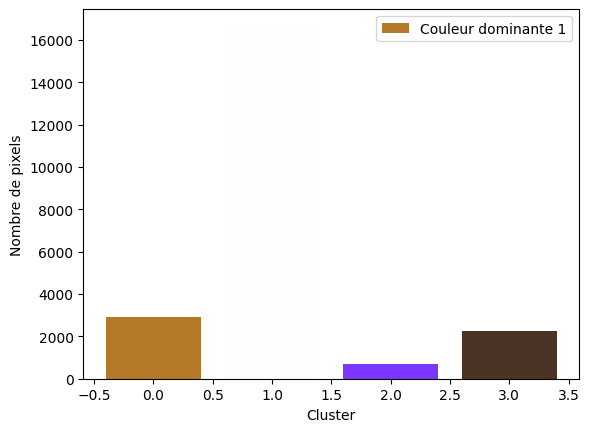

DataFrame pour l'image im-086_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-082_im.png    35,25,14  201,120,24
im-083_im.png   173,89,27    93,70,38
im-084_im.png   156,87,37    79,75,37
im-085_im.png   112,46,29    26,21,22
im-086_im.png  180,122,40    75,52,38

[86 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [61.51737634  6.3689523  23.81561618]
   Code couleur RGB: [0.68293304 0.56237456 0.41888403]
   Nombre de pixels: 2987

Cluster 2:
   Code couleur Lab: [99.34715193  0.41624143  0.17457558]
   Code couleur RGB: [0.99657869 0.99151523 0.99135358]
   Nombre de pixels: 12444

Cluster 3:
   Code couleur Lab: [58.5859859  30.95917754 45.97492237]
   Code couleur RGB: [0.81634004 0.46040531 0.23599322]
   Nombre de pixels: 4164

Cluster 4:
   Code couleur Lab: [20.16494285  8.75120572 11.22091426]
   Code couleur RGB: [0.25838984 0.17077186 0.12806398]
   Nombre de pixels: 2905



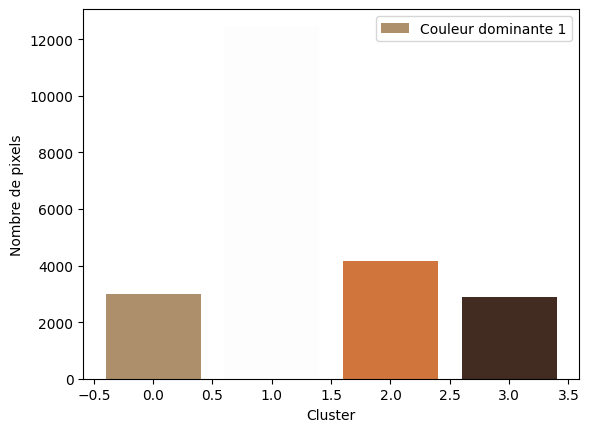

DataFrame pour l'image im-087_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-083_im.png   173,89,27     93,70,38
im-084_im.png   156,87,37     79,75,37
im-085_im.png   112,46,29     26,21,22
im-086_im.png  180,122,40     75,52,38
im-087_im.png  208,117,60  174,143,107

[87 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.95075910e+01 -9.09695311e-02 -5.96840859e-04]
   Code couleur RGB: [0.99366771 0.99462136 0.99443233]
   Nombre de pixels: 12523

Cluster 2:
   Code couleur Lab: [11.81061539  1.29752394  3.02554651]
   Code couleur RGB: [0.13579206 0.11913213 0.10605147]
   Nombre de pixels: 8269

Cluster 3:
   Code couleur Lab: [ 38.59262708  76.12366215 -97.26820081]
   Code couleur RGB: [0.36292828 0.11538253 1.        ]
   Nombre de pixels: 245

Cluster 4:
   Code couleur Lab: [48.24210327 26.92444511 45.92816134]
   Code couleur RGB: [0.67373672 0.37106456 0.1354313 ]
   Nombre de pixels: 1463



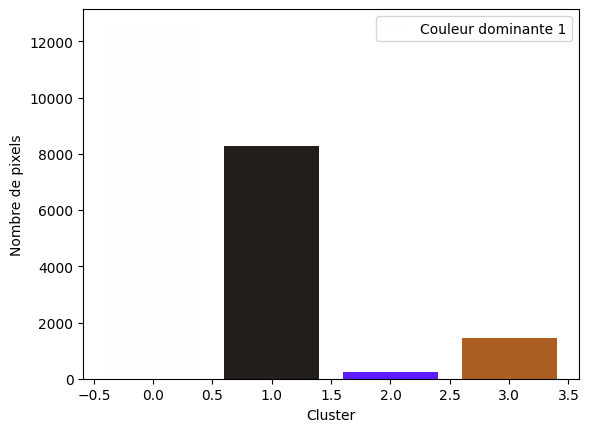

DataFrame pour l'image im-088_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-084_im.png   156,87,37     79,75,37
im-085_im.png   112,46,29     26,21,22
im-086_im.png  180,122,40     75,52,38
im-087_im.png  208,117,60  174,143,107
im-088_im.png    35,30,27    172,95,35

[88 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [28.95946564 -3.36712708 12.05645657]
   Code couleur RGB: [0.27532183 0.27152116 0.19446481]
   Nombre de pixels: 3389

Cluster 2:
   Code couleur Lab: [98.0031438  -0.60042107 -0.61682315]
   Code couleur RGB: [0.97026141 0.97897607 0.98196152]
   Nombre de pixels: 15120

Cluster 3:
   Code couleur Lab: [ 41.61638966  73.48060055 -92.34316447]
   Code couleur RGB: [0.4302725  0.16821124 1.        ]
   Nombre de pixels: 317

Cluster 4:
   Code couleur Lab: [53.29886803 21.40595141 50.38979921]
   Code couleur RGB: [0.70705681 0.43675282 0.14207578]
   Nombre de pixels: 3674



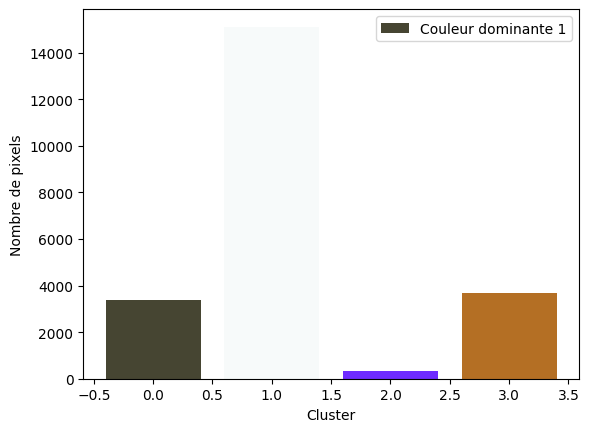

DataFrame pour l'image im-089_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-085_im.png   112,46,29     26,21,22
im-086_im.png  180,122,40     75,52,38
im-087_im.png  208,117,60  174,143,107
im-088_im.png    35,30,27    172,95,35
im-089_im.png  180,111,36     70,69,50

[89 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.93236607e+01 6.85103297e-02 3.62653117e-01]
   Code couleur RGB: [0.99416716 0.99203794 0.98961285]
   Nombre de pixels: 13627

Cluster 2:
   Code couleur Lab: [14.17136083  3.5554246  10.20184723]
   Code couleur RGB: [0.17834119 0.13259861 0.08567828]
   Nombre de pixels: 2807

Cluster 3:
   Code couleur Lab: [  33.64682519   77.60109446 -105.58107871]
   Code couleur RGB: [0.13476604 0.04917797 1.        ]
   Nombre de pixels: 387

Cluster 4:
   Code couleur Lab: [41.19125924 16.16560649 28.01782408]
   Code couleur RGB: [0.52561028 0.33756113 0.2023099 ]
   Nombre de pixels: 5679



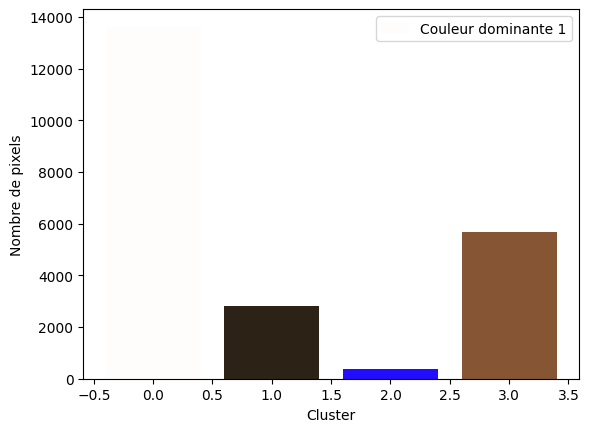

DataFrame pour l'image im-090_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-086_im.png  180,122,40     75,52,38
im-087_im.png  208,117,60  174,143,107
im-088_im.png    35,30,27    172,95,35
im-089_im.png  180,111,36     70,69,50
im-090_im.png   134,86,52     45,34,22

[90 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.96387509 -0.23628443  0.70833976]
   Code couleur RGB: [0.98884333 0.9885918  0.98287131]
   Nombre de pixels: 14952

Cluster 2:
   Code couleur Lab: [44.9107917  41.86070631 51.2705515 ]
   Code couleur RGB: [0.70971245 0.28190133 0.05843747]
   Nombre de pixels: 3935

Cluster 3:
   Code couleur Lab: [12.38738472  4.76242092  8.66056839]
   Code couleur RGB: [0.16671192 0.11619508 0.08054653]
   Nombre de pixels: 2624

Cluster 4:
   Code couleur Lab: [  36.92748939   77.86071867 -100.07854807]
   Code couleur RGB: [0.32216159 0.0756554  1.        ]
   Nombre de pixels: 989



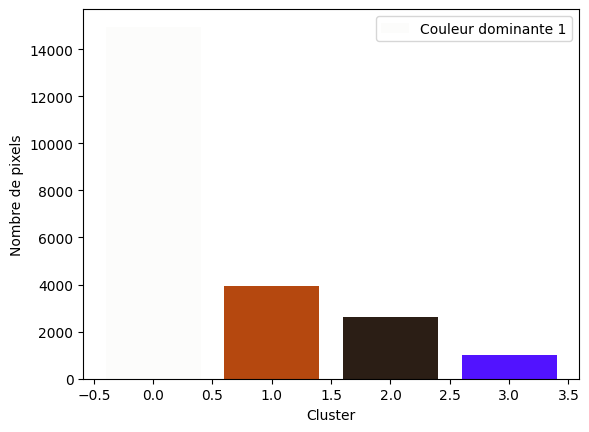

DataFrame pour l'image im-091_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-087_im.png  208,117,60  174,143,107
im-088_im.png    35,30,27    172,95,35
im-089_im.png  180,111,36     70,69,50
im-090_im.png   134,86,52     45,34,22
im-091_im.png   181,72,15     43,30,21

[91 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [2.94223979e+01 2.22864067e-02 1.59359768e+01]
   Code couleur RGB: [0.30595949 0.26867648 0.17504271]
   Nombre de pixels: 2053

Cluster 2:
   Code couleur Lab: [99.25226971  0.27014514 -0.25799414]
   Code couleur RGB: [0.99277747 0.99092275 0.99353433]
   Nombre de pixels: 14367

Cluster 3:
   Code couleur Lab: [ 50.24632152  71.54846379 -77.82874375]
   Code couleur RGB: [0.63029927 0.25739105 1.        ]
   Nombre de pixels: 1139

Cluster 4:
   Code couleur Lab: [45.06331842 31.787636   47.82120953]
   Code couleur RGB: [0.66173123 0.32371621 0.08899527]
   Nombre de pixels: 4941



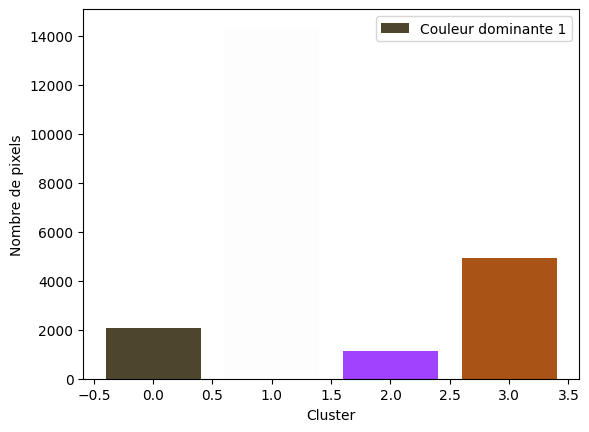

DataFrame pour l'image im-092_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-088_im.png    35,30,27  172,95,35
im-089_im.png  180,111,36   70,69,50
im-090_im.png   134,86,52   45,34,22
im-091_im.png   181,72,15   43,30,21
im-092_im.png   169,83,23   78,69,45

[92 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94154986e+01 -2.79825254e-02  3.04380970e-01]
   Code couleur RGB: [0.99422143 0.99333206 0.99108326]
   Nombre de pixels: 16963

Cluster 2:
   Code couleur Lab: [ 47.79297595  75.99545644 -81.88127866]
   Code couleur RGB: [0.6099345 0.2008032 1.       ]
   Nombre de pixels: 1139

Cluster 3:
   Code couleur Lab: [42.74691092 37.52502479 48.34025185]
   Code couleur RGB: [0.66205949 0.27924701 0.06345122]
   Nombre de pixels: 2668

Cluster 4:
   Code couleur Lab: [18.74472093 -3.16099641  7.82361887]
   Code couleur RGB: [0.17830117 0.18277392 0.13422703]
   Nombre de pixels: 1730



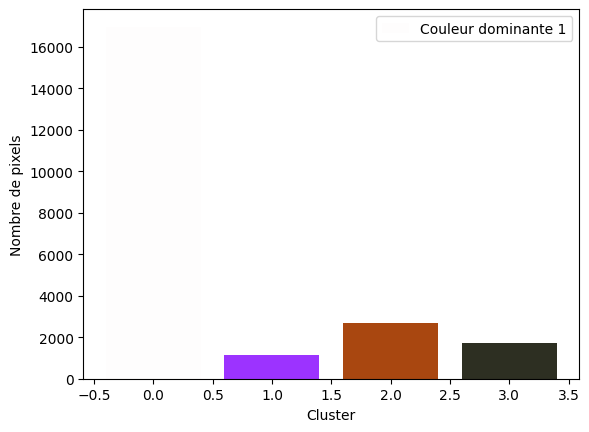

DataFrame pour l'image im-093_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-089_im.png  180,111,36   70,69,50
im-090_im.png   134,86,52   45,34,22
im-091_im.png   181,72,15   43,30,21
im-092_im.png   169,83,23   78,69,45
im-093_im.png   169,71,16   45,47,34

[93 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.73629231e+01 -2.07924222e-01 -3.05519328e-02]
   Code couleur RGB: [0.96831959 0.97061253 0.9703424 ]
   Nombre de pixels: 12178

Cluster 2:
   Code couleur Lab: [47.26688913 38.52600676 48.81057084]
   Code couleur RGB: [0.72105731 0.31978122 0.10708292]
   Nombre de pixels: 5118

Cluster 3:
   Code couleur Lab: [ 47.07552238  76.25217242 -83.17440778]
   Code couleur RGB: [0.59501744 0.19191729 1.        ]
   Nombre de pixels: 1410

Cluster 4:
   Code couleur Lab: [18.70416605 12.08204194  3.12734439]
   Code couleur RGB: [0.24926319 0.15223596 0.16236585]
   Nombre de pixels: 3794



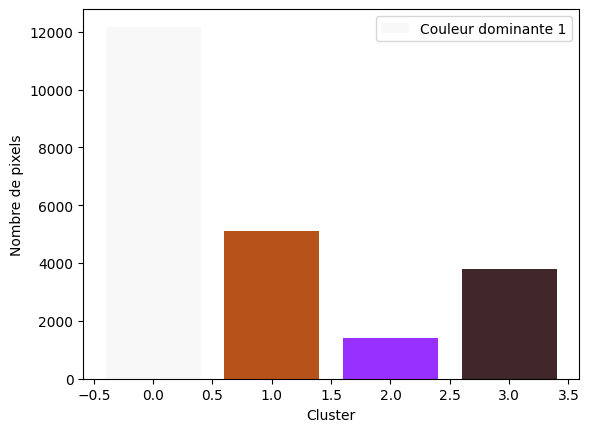

DataFrame pour l'image im-094_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-090_im.png   134,86,52   45,34,22
im-091_im.png   181,72,15   43,30,21
im-092_im.png   169,83,23   78,69,45
im-093_im.png   169,71,16   45,47,34
im-094_im.png   184,82,27   64,39,41

[94 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.92418843e+01 7.76128121e-02 1.29048364e-01]
   Code couleur RGB: [0.99248124 0.9911571  0.99045663]
   Nombre de pixels: 13973

Cluster 2:
   Code couleur Lab: [14.32273299 -2.93259459 12.45359363]
   Code couleur RGB: [0.15027983 0.14506214 0.07261999]
   Nombre de pixels: 2343

Cluster 3:
   Code couleur Lab: [ 44.86260805  63.5210987  -86.98220007]
   Code couleur RGB: [0.42479555 0.26227923 1.        ]
   Nombre de pixels: 1337

Cluster 4:
   Code couleur Lab: [46.10924157  4.62039578 47.95981088]
   Code couleur RGB: [0.53481819 0.41039256 0.07822882]
   Nombre de pixels: 4847



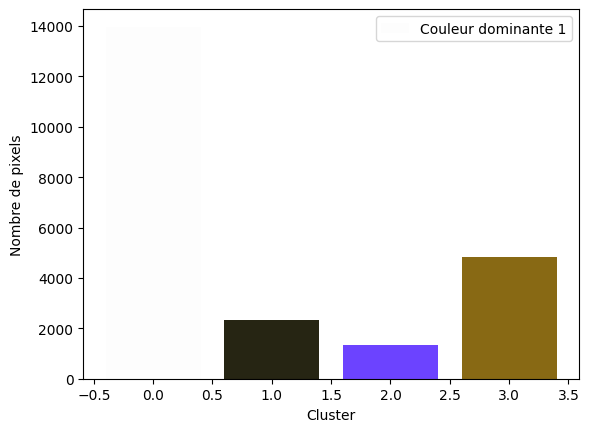

DataFrame pour l'image im-095_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-091_im.png   181,72,15   43,30,21
im-092_im.png   169,83,23   78,69,45
im-093_im.png   169,71,16   45,47,34
im-094_im.png   184,82,27   64,39,41
im-095_im.png  136,105,20   38,37,19

[95 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [59.1068762  22.24851318 49.93400769]
   Code couleur RGB: [0.77914792 0.49211902 0.20477429]
   Nombre de pixels: 2682

Cluster 2:
   Code couleur Lab: [23.97750489 -2.56071326 19.17217285]
   Code couleur RGB: [0.24591966 0.22499368 0.10879439]
   Nombre de pixels: 2438

Cluster 3:
   Code couleur Lab: [ 9.95849419e+01 -9.54604757e-02  1.14494781e-02]
   Code couleur RGB: [0.99455274 0.9955072  0.99521888]
   Nombre de pixels: 16768

Cluster 4:
   Code couleur Lab: [  35.04492548   75.81535525 -103.2399603 ]
   Code couleur RGB: [0.19754675 0.09038634 1.        ]
   Nombre de pixels: 612



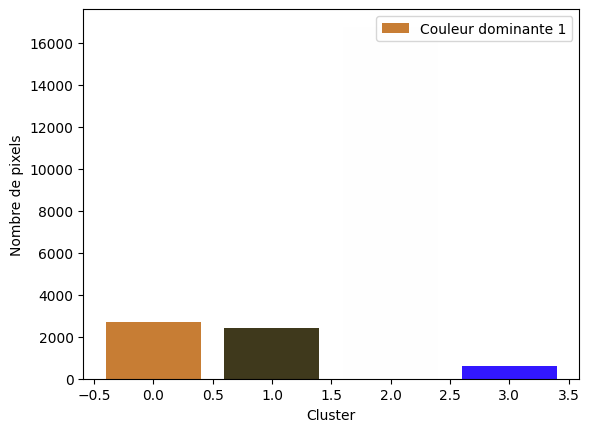

DataFrame pour l'image im-096_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-092_im.png   169,83,23   78,69,45
im-093_im.png   169,71,16   45,47,34
im-094_im.png   184,82,27   64,39,41
im-095_im.png  136,105,20   38,37,19
im-096_im.png  199,125,52   63,57,28

[96 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.75776834 -0.44186982  0.15500146]
   Code couleur RGB: [0.99421367 0.9982676  0.99604488]
   Nombre de pixels: 17061

Cluster 2:
   Code couleur Lab: [44.63970349 46.11410356 42.79308077]
   Code couleur RGB: [0.7225673  0.2601973  0.13840603]
   Nombre de pixels: 3757

Cluster 3:
   Code couleur Lab: [  35.63647662   79.86040011 -102.23825163]
   Code couleur RGB: [0.29590145 0.01525325 1.        ]
   Nombre de pixels: 330

Cluster 4:
   Code couleur Lab: [19.19181227 10.97179198  8.64483815]
   Code couleur RGB: [0.25661709 0.15786207 0.1352686 ]
   Nombre de pixels: 1352



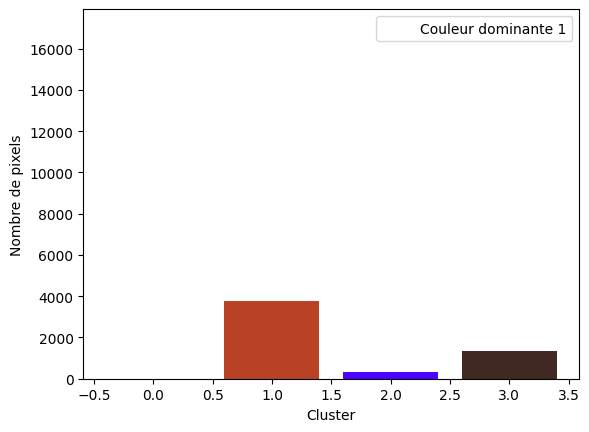

DataFrame pour l'image im-097_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-093_im.png   169,71,16   45,47,34
im-094_im.png   184,82,27   64,39,41
im-095_im.png  136,105,20   38,37,19
im-096_im.png  199,125,52   63,57,28
im-097_im.png   184,66,35   65,40,34

[97 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [43.51017479 52.40566173 52.33820179]
   Code couleur RGB: [0.74203603 0.2113547  0.04132024]
   Nombre de pixels: 7481

Cluster 2:
   Code couleur Lab: [ 9.93032877e+01 -9.77866260e-02  7.24312933e-01]
   Code couleur RGB: [0.99387263 0.99210302 0.9866172 ]
   Nombre de pixels: 11644

Cluster 3:
   Code couleur Lab: [14.41190264  7.27505231 13.43337834]
   Code couleur RGB: [0.20153944 0.12638322 0.06913042]
   Nombre de pixels: 2405

Cluster 4:
   Code couleur Lab: [ 47.27348682  81.88506112 -82.68633952]
   Code couleur RGB: [0.64273456 0.13183681 1.        ]
   Nombre de pixels: 970



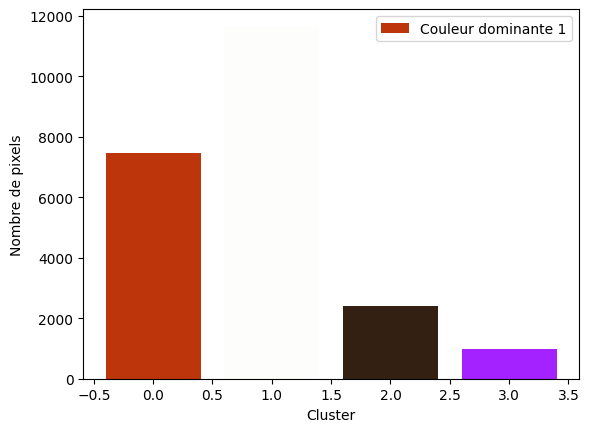

DataFrame pour l'image im-098_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-094_im.png   184,82,27   64,39,41
im-095_im.png  136,105,20   38,37,19
im-096_im.png  199,125,52   63,57,28
im-097_im.png   184,66,35   65,40,34
im-098_im.png   189,54,11   51,32,18

[98 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 42.7981504   76.15759697 -90.219474  ]
   Code couleur RGB: [0.48992912 0.15258395 1.        ]
   Nombre de pixels: 441

Cluster 2:
   Code couleur Lab: [9.95055948e+01 3.55749498e-02 1.54122102e-01]
   Code couleur RGB: [0.99522446 0.99424552 0.99325414]
   Nombre de pixels: 18202

Cluster 3:
   Code couleur Lab: [23.59928428  9.96167037 10.72416586]
   Code couleur RGB: [0.29579288 0.19727208 0.15928864]
   Nombre de pixels: 2082

Cluster 4:
   Code couleur Lab: [36.04193729 33.70743011 40.50854456]
   Code couleur RGB: [0.56237804 0.23064494 0.07018184]
   Nombre de pixels: 1775



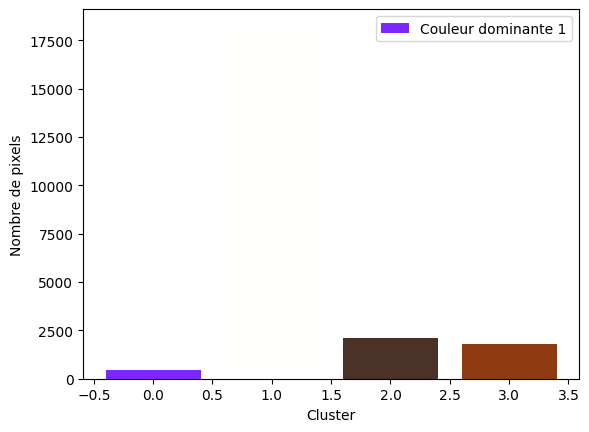

DataFrame pour l'image im-099_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-095_im.png  136,105,20   38,37,19
im-096_im.png  199,125,52   63,57,28
im-097_im.png   184,66,35   65,40,34
im-098_im.png   189,54,11   51,32,18
im-099_im.png    75,50,41  143,59,18

[99 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91744330e+01 -2.05233633e-02  8.00974484e-01]
   Code couleur RGB: [0.99330513 0.99043051 0.98458614]
   Nombre de pixels: 12709

Cluster 2:
   Code couleur Lab: [64.20246578 18.71577323 65.16941071]
   Code couleur RGB: [0.83108248 0.55220918 0.09506838]
   Nombre de pixels: 5822

Cluster 3:
   Code couleur Lab: [14.55016206 -2.95501887 12.1133185 ]
   Code couleur RGB: [0.15152191 0.14699903 0.07658323]
   Nombre de pixels: 2115

Cluster 4:
   Code couleur Lab: [ 60.52756017  57.14422569 -61.41865176]
   Code couleur RGB: [0.73289712 0.42670802 1.        ]
   Nombre de pixels: 1854



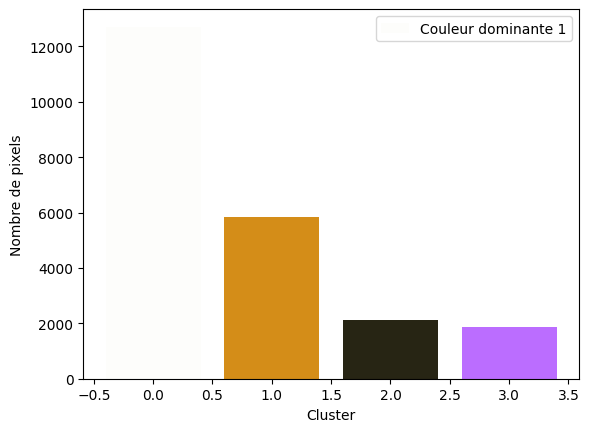

DataFrame pour l'image im-100_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-096_im.png  199,125,52   63,57,28
im-097_im.png   184,66,35   65,40,34
im-098_im.png   189,54,11   51,32,18
im-099_im.png    75,50,41  143,59,18
im-100_im.png  212,141,24   39,37,20

[100 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.22605681 31.09067309 59.85949518]
   Code couleur RGB: [0.8462575  0.47488875 0.12594212]
   Nombre de pixels: 3329

Cluster 2:
   Code couleur Lab: [ 9.97972248e+01 -6.31599177e-02  1.78412328e-01]
   Code couleur RGB: [0.99782346 0.99779089 0.99636834]
   Nombre de pixels: 17606

Cluster 3:
   Code couleur Lab: [19.20224721  9.30758616 14.43501052]
   Code couleur RGB: [0.25580941 0.16092116 0.10183099]
   Nombre de pixels: 1130

Cluster 4:
   Code couleur Lab: [ 44.1560008   72.63536979 -88.11664182]
   Code couleur RGB: [0.49310103 0.19653729 1.        ]
   Nombre de pixels: 435



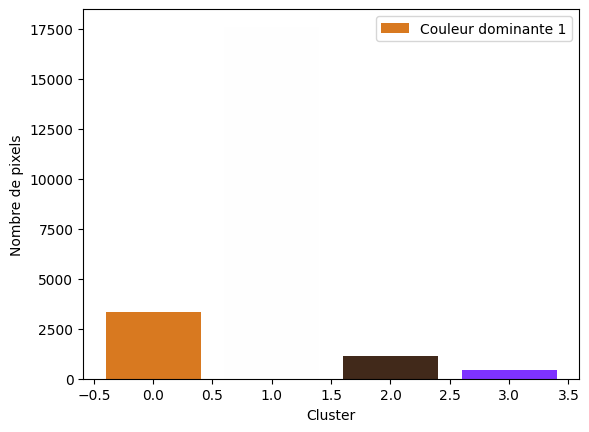

DataFrame pour l'image im-101_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-097_im.png   184,66,35   65,40,34
im-098_im.png   189,54,11   51,32,18
im-099_im.png    75,50,41  143,59,18
im-100_im.png  212,141,24   39,37,20
im-101_im.png  216,121,32   65,41,26

[101 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 43.4560037   72.40612682 -89.26875344]
   Code couleur RGB: [0.47235096 0.1924659  1.        ]
   Nombre de pixels: 531

Cluster 2:
   Code couleur Lab: [99.42687388  0.89022099 -0.46410049]
   Code couleur RGB: [0.99904378 0.99145549 0.9971659 ]
   Nombre de pixels: 17056

Cluster 3:
   Code couleur Lab: [76.30110431 10.90145624 76.0124364 ]
   Code couleur RGB: [0.94021865 0.6979179  0.09157703]
   Nombre de pixels: 2604

Cluster 4:
   Code couleur Lab: [19.38292314  6.84687653 16.93056895]
   Code couleur RGB: [0.24851687 0.16762228 0.08787034]
   Nombre de pixels: 2309



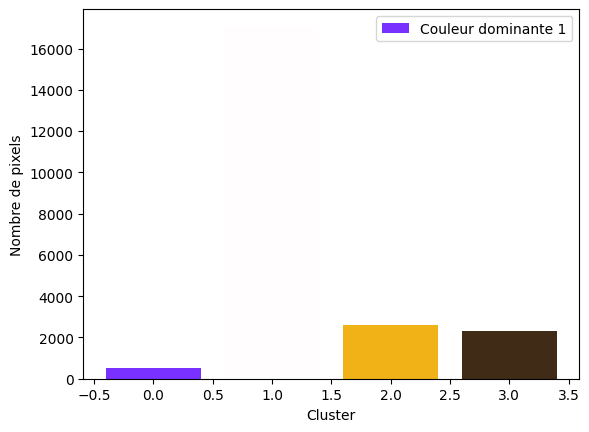

DataFrame pour l'image im-102_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-098_im.png   189,54,11   51,32,18
im-099_im.png    75,50,41  143,59,18
im-100_im.png  212,141,24   39,37,20
im-101_im.png  216,121,32   65,41,26
im-102_im.png  240,178,23   63,43,22

[102 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [23.9926112  -3.56849576 10.63268397]
   Code couleur RGB: [0.22682755 0.22809406 0.16096685]
   Nombre de pixels: 4008

Cluster 2:
   Code couleur Lab: [ 9.80499154e+01  6.06341108e-01 -3.08352817e-02]
   Code couleur RGB: [0.98266573 0.97641155 0.97822946]
   Nombre de pixels: 14581

Cluster 3:
   Code couleur Lab: [50.61034106 25.14555427 32.8552169 ]
   Code couleur RGB: [0.68125905 0.40151154 0.25661474]
   Nombre de pixels: 3770

Cluster 4:
   Code couleur Lab: [  34.62155616   78.84166234 -103.94594141]
   Code couleur RGB: [0.23089502 0.02973406 1.        ]
   Nombre de pixels: 141



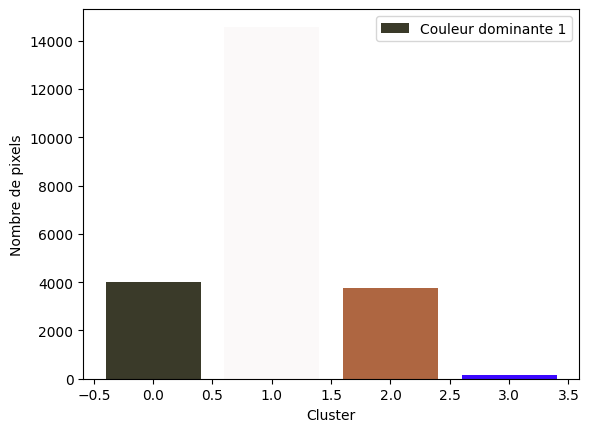

DataFrame pour l'image im-103_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-099_im.png    75,50,41   143,59,18
im-100_im.png  212,141,24    39,37,20
im-101_im.png  216,121,32    65,41,26
im-102_im.png  240,178,23    63,43,22
im-103_im.png    58,58,41  174,102,65

[103 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [12.47404015  1.32802241  0.22367707]
   Code couleur RGB: [0.13527185 0.12491603 0.12622498]
   Nombre de pixels: 3173

Cluster 2:
   Code couleur Lab: [9.65109872e+01 4.88536226e-02 2.42436949e-01]
   Code couleur RGB: [0.96174132 0.96029137 0.95870016]
   Nombre de pixels: 14149

Cluster 3:
   Code couleur Lab: [54.86953671 35.61464015 41.10830603]
   Code couleur RGB: [0.79242425 0.40773363 0.24000572]
   Nombre de pixels: 5043

Cluster 4:
   Code couleur Lab: [ 37.0566156   81.73387096 -99.86170158]
   Code couleur RGB: [0.37294023 0.         1.        ]
   Nombre de pixels: 135



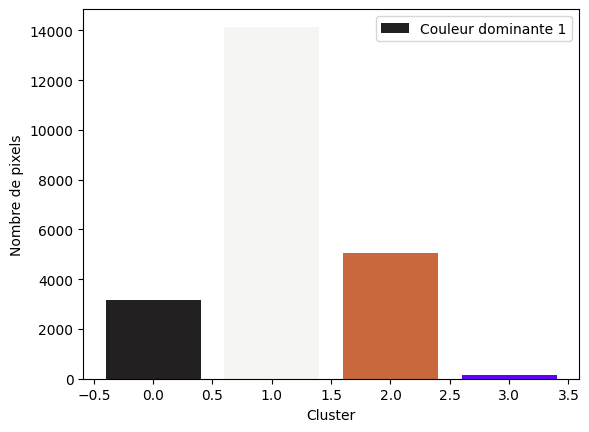

DataFrame pour l'image im-104_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-100_im.png  212,141,24    39,37,20
im-101_im.png  216,121,32    65,41,26
im-102_im.png  240,178,23    63,43,22
im-103_im.png    58,58,41  174,102,65
im-104_im.png  202,104,61    34,32,32

[104 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95661633e+01 4.11900638e-02 2.50205713e-01]
   Code couleur RGB: [0.99630039 0.99489116 0.99321403]
   Nombre de pixels: 13507

Cluster 2:
   Code couleur Lab: [8.36346107 1.59058873 2.65056921]
   Code couleur RGB: [0.10918902 0.09177767 0.08099247]
   Nombre de pixels: 2811

Cluster 3:
   Code couleur Lab: [40.66426224 40.63315188 33.50956862]
   Code couleur RGB: [0.64414772 0.24723914 0.16823041]
   Nombre de pixels: 2882

Cluster 4:
   Code couleur Lab: [35.42029766 17.32668832 10.01306543]
   Code couleur RGB: [0.44839433 0.28403766 0.26710172]
   Nombre de pixels: 3300



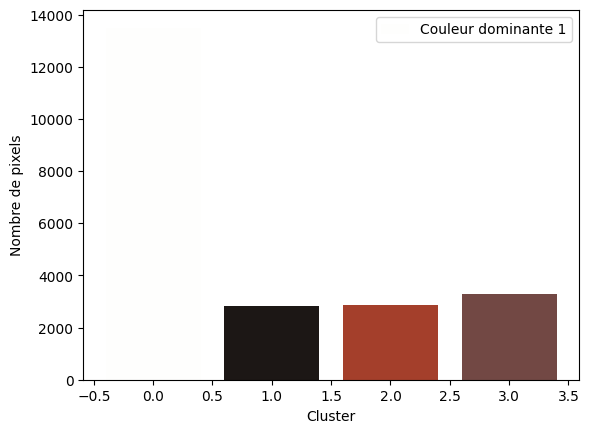

DataFrame pour l'image im-105_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-101_im.png  216,121,32    65,41,26
im-102_im.png  240,178,23    63,43,22
im-103_im.png    58,58,41  174,102,65
im-104_im.png  202,104,61    34,32,32
im-105_im.png   114,72,68   164,63,43

[105 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97532607e+01 -4.87279011e-02  1.81741978e-01]
   Code couleur RGB: [0.99745288 0.99725529 0.99584564]
   Nombre de pixels: 14391

Cluster 2:
   Code couleur Lab: [ 6.80713172 -1.97683168  5.75338911]
   Code couleur RGB: [0.08593864 0.08489481 0.0420316 ]
   Nombre de pixels: 5319

Cluster 3:
   Code couleur Lab: [  35.3944169    76.64443867 -102.64416129]
   Code couleur RGB: [0.23429872 0.08120969 1.        ]
   Nombre de pixels: 1271

Cluster 4:
   Code couleur Lab: [38.0901268  17.32018775 35.46950365]
   Code couleur RGB: [0.50448823 0.30450356 0.12173978]
   Nombre de pixels: 1519



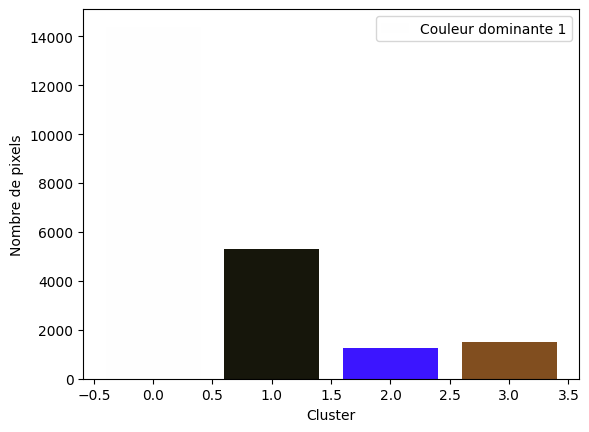

DataFrame pour l'image im-106_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-102_im.png  240,178,23    63,43,22
im-103_im.png    58,58,41  174,102,65
im-104_im.png  202,104,61    34,32,32
im-105_im.png   114,72,68   164,63,43
im-106_im.png    22,22,11   129,78,31

[106 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [64.16618153 25.50400418 67.15056138]
   Code couleur RGB: [0.86875964 0.5318722  0.06945731]
   Nombre de pixels: 3568

Cluster 2:
   Code couleur Lab: [9.98414519e+01 5.97091664e-02 1.68956302e-01]
   Code couleur RGB: [0.99928929 0.99799786 0.99695975]
   Nombre de pixels: 15251

Cluster 3:
   Code couleur Lab: [ 56.19407428  62.86515066 -68.33331277]
   Code couleur RGB: [0.68908652 0.3608695  1.        ]
   Nombre de pixels: 1251

Cluster 4:
   Code couleur Lab: [25.73820634  6.27000593 27.97986372]
   Code couleur RGB: [0.31640554 0.22180783 0.0654277 ]
   Nombre de pixels: 2430



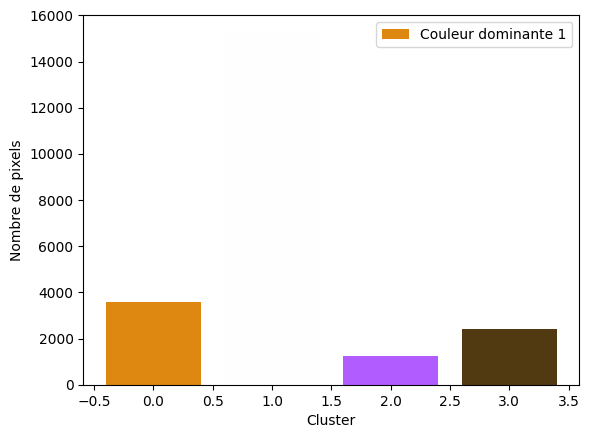

DataFrame pour l'image im-107_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-103_im.png    58,58,41  174,102,65
im-104_im.png  202,104,61    34,32,32
im-105_im.png   114,72,68   164,63,43
im-106_im.png    22,22,11   129,78,31
im-107_im.png  222,136,18    81,57,17

[107 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [50.08561784 12.95511154 47.37549536]
   Code couleur RGB: [0.62340651 0.42871484 0.13281773]
   Nombre de pixels: 2860

Cluster 2:
   Code couleur Lab: [ 9.97945336e+01 -4.76587304e-02  9.95107486e-02]
   Code couleur RGB: [0.99763684 0.99774617 0.99693859]
   Nombre de pixels: 15578

Cluster 3:
   Code couleur Lab: [  36.30769595   75.55646695 -101.15308969]
   Code couleur RGB: [0.26206048 0.10367194 1.        ]
   Nombre de pixels: 893

Cluster 4:
   Code couleur Lab: [12.31296948  5.38428166 11.27777845]
   Code couleur RGB: [0.17244089 0.11391289 0.06352877]
   Nombre de pixels: 3169



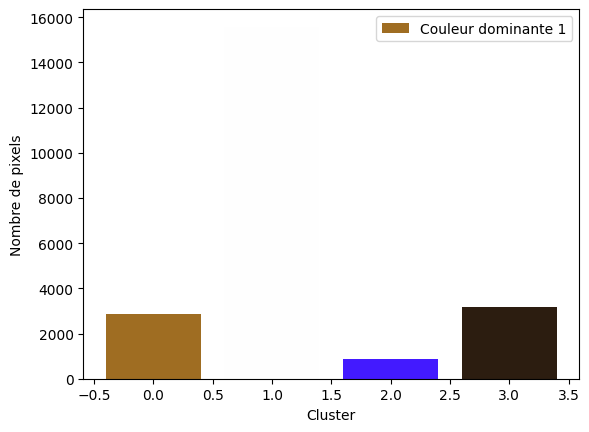

DataFrame pour l'image im-108_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-104_im.png  202,104,61    34,32,32
im-105_im.png   114,72,68   164,63,43
im-106_im.png    22,22,11   129,78,31
im-107_im.png  222,136,18    81,57,17
im-108_im.png    44,29,16  159,109,34

[108 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [43.80551129 33.36994734 47.74472612]
   Code couleur RGB: [0.65454525 0.30581125 0.07772792]
   Nombre de pixels: 5731

Cluster 2:
   Code couleur Lab: [9.94875434e+01 5.29806546e-02 2.86819531e-01]
   Code couleur RGB: [0.99563313 0.9939588  0.99204547]
   Nombre de pixels: 13528

Cluster 3:
   Code couleur Lab: [ 46.11637947  74.74666771 -84.6807148 ]
   Code couleur RGB: [0.56132773 0.19598648 1.        ]
   Nombre de pixels: 1156

Cluster 4:
   Code couleur Lab: [ 33.50874128 -13.56725249  28.36500206]
   Code couleur RGB: [0.28181553 0.32837696 0.12398365]
   Nombre de pixels: 2085



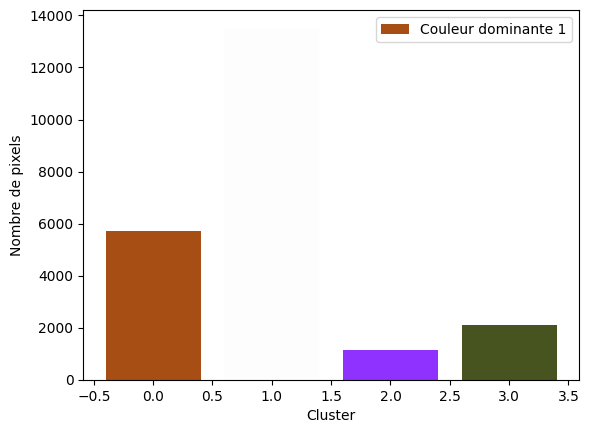

DataFrame pour l'image im-109_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-105_im.png   114,72,68   164,63,43
im-106_im.png    22,22,11   129,78,31
im-107_im.png  222,136,18    81,57,17
im-108_im.png    44,29,16  159,109,34
im-109_im.png   167,78,20    72,84,32

[109 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [63.2029914  32.51726222 63.06290517]
   Code couleur RGB: [0.89208319 0.50008707 0.12471727]
   Nombre de pixels: 6679

Cluster 2:
   Code couleur Lab: [99.19834722 -0.17864517  0.7752111 ]
   Code couleur RGB: [0.99220725 0.99109288 0.98503027]
   Nombre de pixels: 12382

Cluster 3:
   Code couleur Lab: [19.78228525 -4.5268477  11.11389011]
   Code couleur RGB: [0.18553561 0.19333737 0.12343215]
   Nombre de pixels: 2771

Cluster 4:
   Code couleur Lab: [ 58.46639832  68.12060664 -64.50142059]
   Code couleur RGB: [0.77224392 0.35376214 1.        ]
   Nombre de pixels: 668



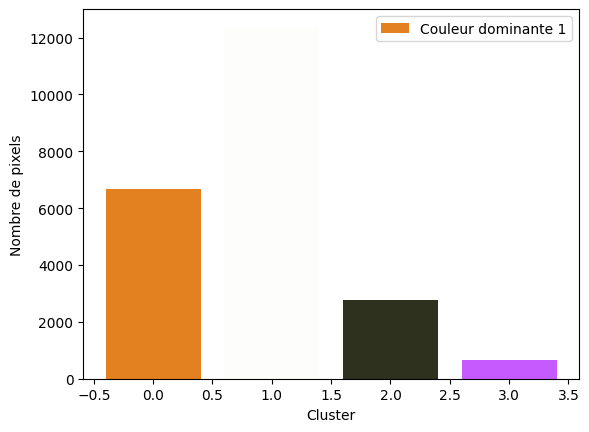

DataFrame pour l'image im-110_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-106_im.png    22,22,11   129,78,31
im-107_im.png  222,136,18    81,57,17
im-108_im.png    44,29,16  159,109,34
im-109_im.png   167,78,20    72,84,32
im-110_im.png  227,128,32    47,49,31

[110 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [37.94874328 27.4247746  33.7628234 ]
   Code couleur RGB: [0.55082878 0.2726288  0.137429  ]
   Nombre de pixels: 3318

Cluster 2:
   Code couleur Lab: [9.99144463e+01 1.09434958e-02 4.72612464e-02]
   Code couleur RGB: [0.99928868 0.99898222 0.99870595]
   Nombre de pixels: 14925

Cluster 3:
   Code couleur Lab: [21.95364135  2.5689135  14.50356264]
   Code couleur RGB: [0.24839318 0.19851429 0.12214248]
   Nombre de pixels: 2968

Cluster 4:
   Code couleur Lab: [56.30872975 -2.30630865 19.23674201]
   Code couleur RGB: [0.56362709 0.5299301  0.39842268]
   Nombre de pixels: 1289



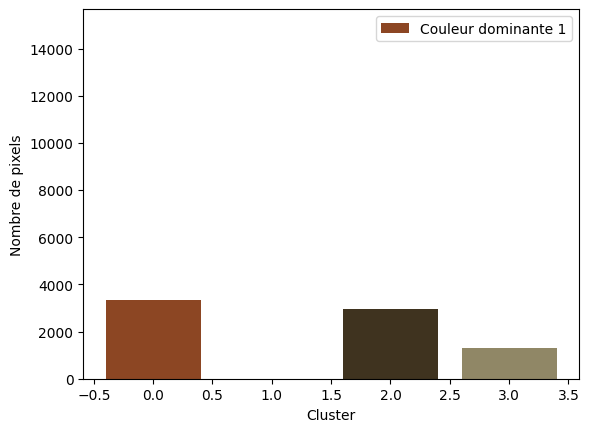

DataFrame pour l'image im-111_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-107_im.png  222,136,18    81,57,17
im-108_im.png    44,29,16  159,109,34
im-109_im.png   167,78,20    72,84,32
im-110_im.png  227,128,32    47,49,31
im-111_im.png   140,70,35    63,51,31

[111 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.87352478e+01 3.02042622e-02 1.03392771e+00]
   Code couleur RGB: [0.98955022 0.98525744 0.97785374]
   Nombre de pixels: 12222

Cluster 2:
   Code couleur Lab: [52.12897861 44.44915598 57.43354415]
   Code couleur RGB: [0.81310527 0.34309912 0.07143866]
   Nombre de pixels: 6228

Cluster 3:
   Code couleur Lab: [17.5270881  -0.08219658 14.19937658]
   Code couleur RGB: [0.19476666 0.16629931 0.08814359]
   Nombre de pixels: 3563

Cluster 4:
   Code couleur Lab: [ 43.86131604  72.40474991 -88.50188426]
   Code couleur RGB: [0.48407705 0.19567365 1.        ]
   Nombre de pixels: 487



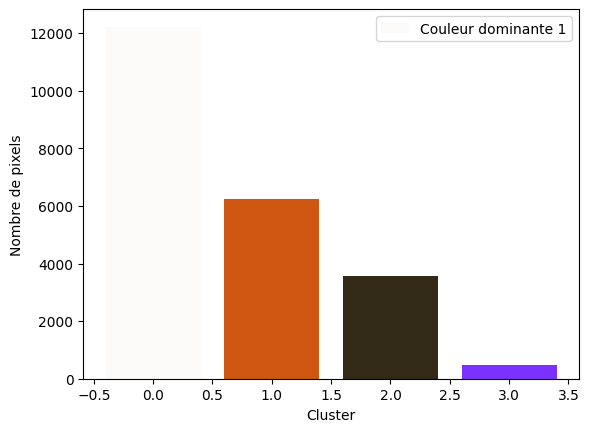

DataFrame pour l'image im-112_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-108_im.png    44,29,16  159,109,34
im-109_im.png   167,78,20    72,84,32
im-110_im.png  227,128,32    47,49,31
im-111_im.png   140,70,35    63,51,31
im-112_im.png   207,87,18    50,42,22

[112 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64688027 -0.63772519  0.31419914]
   Code couleur RGB: [0.9919314  0.99743398 0.99355038]
   Nombre de pixels: 13265

Cluster 2:
   Code couleur Lab: [29.38507187 39.2338131  31.26482674]
   Code couleur RGB: [0.50649029 0.14036678 0.08747334]
   Nombre de pixels: 6293

Cluster 3:
   Code couleur Lab: [58.73928526 15.31455245  1.9363107 ]
   Code couleur RGB: [0.66298764 0.51697477 0.5429127 ]
   Nombre de pixels: 2811

Cluster 4:
   Code couleur Lab: [  34.33661471   79.45380437 -104.40621659]
   Code couleur RGB: [0.22637729 0.01115697 1.        ]
   Nombre de pixels: 131



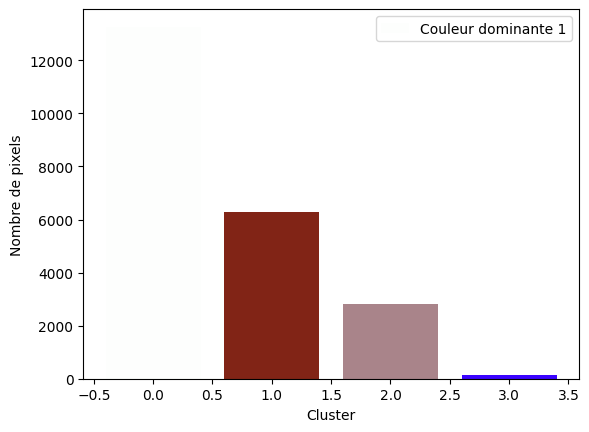

DataFrame pour l'image im-113_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-109_im.png   167,78,20     72,84,32
im-110_im.png  227,128,32     47,49,31
im-111_im.png   140,70,35     63,51,31
im-112_im.png   207,87,18     50,42,22
im-113_im.png   129,36,22  169,132,138

[113 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98529367e+01 1.40090900e-02 5.89611769e-02]
   Code couleur RGB: [0.99865626 0.99827219 0.99791853]
   Nombre de pixels: 16861

Cluster 2:
   Code couleur Lab: [42.54068512 24.04910129 44.83926674]
   Code couleur RGB: [0.59317585 0.32553584 0.08687674]
   Nombre de pixels: 3809

Cluster 3:
   Code couleur Lab: [ 47.12985345  67.41179336 -83.0737963 ]
   Code couleur RGB: [0.52403492 0.25745896 1.        ]
   Nombre de pixels: 547

Cluster 4:
   Code couleur Lab: [28.36079249  3.03920406 16.06609361]
   Code couleur RGB: [0.31266385 0.253153   0.16578538]
   Nombre de pixels: 1283



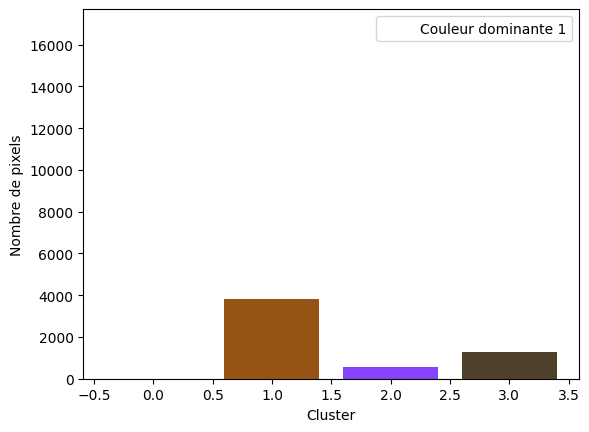

DataFrame pour l'image im-114_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-110_im.png  227,128,32     47,49,31
im-111_im.png   140,70,35     63,51,31
im-112_im.png   207,87,18     50,42,22
im-113_im.png   129,36,22  169,132,138
im-114_im.png   151,83,22     80,65,42

[114 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.85649428 -0.10785924  0.17376417]
   Code couleur RGB: [0.98676531 0.98722123 0.98572055]
   Nombre de pixels: 13888

Cluster 2:
   Code couleur Lab: [18.6883017  -1.45800468 12.45971554]
   Code couleur RGB: [0.19533024 0.17867362 0.10729036]
   Nombre de pixels: 4761

Cluster 3:
   Code couleur Lab: [  36.0340475    75.3922736  -101.60662305]
   Code couleur RGB: [0.24581084 0.10356716 1.        ]
   Nombre de pixels: 579

Cluster 4:
   Code couleur Lab: [60.78514926 15.58836036 51.63571459]
   Code couleur RGB: [0.76363375 0.5274474  0.20351006]
   Nombre de pixels: 3272



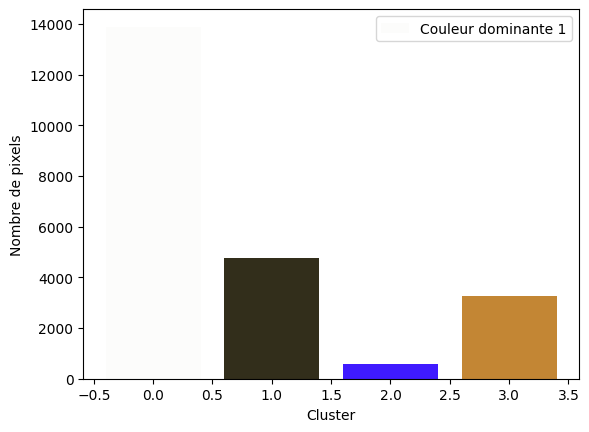

DataFrame pour l'image im-115_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-111_im.png   140,70,35     63,51,31
im-112_im.png   207,87,18     50,42,22
im-113_im.png   129,36,22  169,132,138
im-114_im.png   151,83,22     80,65,42
im-115_im.png    50,46,27   195,134,52

[115 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.89275912e+01 -3.20139561e-02  5.49519495e-01]
   Code couleur RGB: [0.98952113 0.98773236 0.98369159]
   Nombre de pixels: 15240

Cluster 2:
   Code couleur Lab: [ 37.16500446  79.24069352 -99.68488341]
   Code couleur RGB: [0.34812907 0.05131525 1.        ]
   Nombre de pixels: 222

Cluster 3:
   Code couleur Lab: [64.26495909 13.88044415 49.00605688]
   Code couleur RGB: [0.79206842 0.5676684  0.2597797 ]
   Nombre de pixels: 1299

Cluster 4:
   Code couleur Lab: [14.92760977 -3.05893167  5.44886364]
   Code couleur RGB: [0.14222099 0.15122862 0.11695298]
   Nombre de pixels: 5739



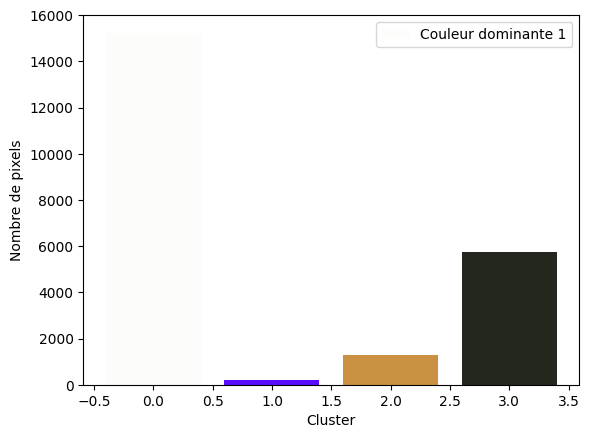

DataFrame pour l'image im-116_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-112_im.png   207,87,18     50,42,22
im-113_im.png   129,36,22  169,132,138
im-114_im.png   151,83,22     80,65,42
im-115_im.png    50,46,27   195,134,52
im-116_im.png    36,39,30   202,145,66

[116 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.2871706   0.10282823 -0.30499757]
   Code couleur RGB: [0.99164819 0.99173933 0.9942636 ]
   Nombre de pixels: 12303

Cluster 2:
   Code couleur Lab: [58.25093436 32.04614215 51.92893377]
   Code couleur RGB: [0.82239092 0.4526439  0.18405351]
   Nombre de pixels: 4738

Cluster 3:
   Code couleur Lab: [22.99323087  7.85249892 11.47524316]
   Code couleur RGB: [0.28064163 0.19677023 0.14951104]
   Nombre de pixels: 3075

Cluster 4:
   Code couleur Lab: [77.29475535 19.21659511 28.74178087]
   Code couleur RGB: [0.94860105 0.6927169  0.54425632]
   Nombre de pixels: 2384



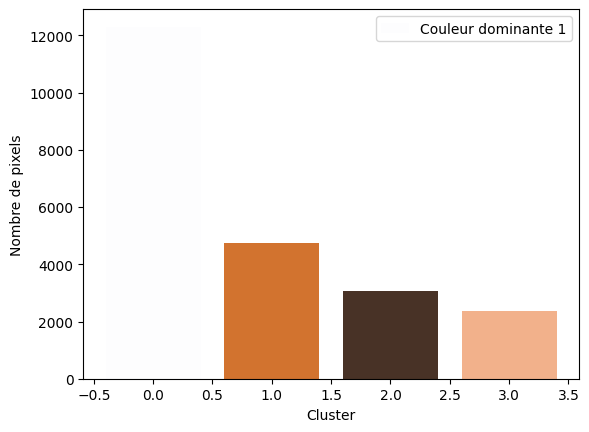

DataFrame pour l'image im-117_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-113_im.png   129,36,22  169,132,138
im-114_im.png   151,83,22     80,65,42
im-115_im.png    50,46,27   195,134,52
im-116_im.png    36,39,30   202,145,66
im-117_im.png  210,115,47     72,50,38

[117 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.25349557 -0.5635806   0.60336582]
   Code couleur RGB: [0.98910344 0.99270115 0.98690405]
   Nombre de pixels: 11839

Cluster 2:
   Code couleur Lab: [28.54650746 39.31116152 35.23280795]
   Code couleur RGB: [0.49894324 0.13049092 0.05093511]
   Nombre de pixels: 4268

Cluster 3:
   Code couleur Lab: [  36.90298259   79.29339847 -100.08068811]
   Code couleur RGB: [0.33963847 0.046398   1.        ]
   Nombre de pixels: 1800

Cluster 4:
   Code couleur Lab: [13.33273467  8.11447137 12.07741289]
   Code couleur RGB: [0.19431292 0.1160588  0.06837565]
   Nombre de pixels: 4593



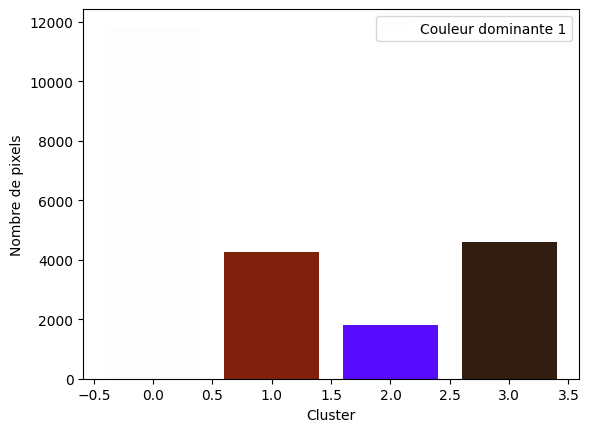

DataFrame pour l'image im-118_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-114_im.png   151,83,22    80,65,42
im-115_im.png    50,46,27  195,134,52
im-116_im.png    36,39,30  202,145,66
im-117_im.png  210,115,47    72,50,38
im-118_im.png    50,30,17   127,33,13

[118 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.2430407   0.10407423  0.27414626]
   Code couleur RGB: [0.99322506 0.99106283 0.98937388]
   Nombre de pixels: 14355

Cluster 2:
   Code couleur Lab: [11.35762393  2.9884351   4.78178607]
   Code couleur RGB: [0.14383693 0.11214785 0.09340721]
   Nombre de pixels: 3424

Cluster 3:
   Code couleur Lab: [ 46.56245739  78.13764625 -83.96172176]
   Code couleur RGB: [0.59829033 0.16861282 1.        ]
   Nombre de pixels: 638

Cluster 4:
   Code couleur Lab: [45.80889427 42.83466247 46.97495035]
   Code couleur RGB: [0.72327298 0.28711565 0.11265788]
   Nombre de pixels: 4083



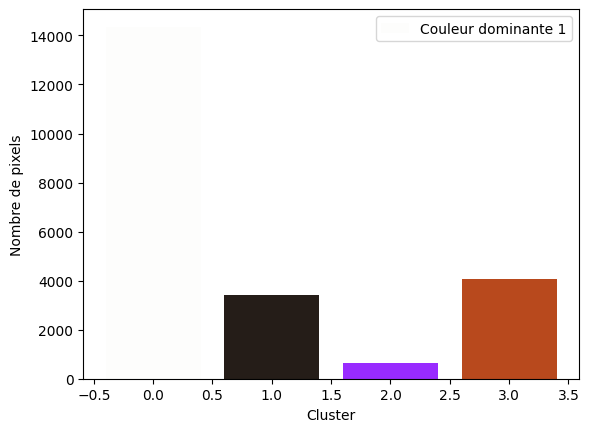

DataFrame pour l'image im-119_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-115_im.png    50,46,27  195,134,52
im-116_im.png    36,39,30  202,145,66
im-117_im.png  210,115,47    72,50,38
im-118_im.png    50,30,17   127,33,13
im-119_im.png   184,73,29    37,29,24

[119 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.34004786 -0.64566099  0.51225647]
   Code couleur RGB: [0.98909359 0.99390912 0.98856492]
   Nombre de pixels: 15662

Cluster 2:
   Code couleur Lab: [10.64854764  1.44601074 -0.62501147]
   Code couleur RGB: [0.11928144 0.11043607 0.11621972]
   Nombre de pixels: 5488

Cluster 3:
   Code couleur Lab: [ 46.56590362  31.02007541 -51.41767106]
   Code couleur RGB: [0.42953908 0.37624866 0.77425522]
   Nombre de pixels: 788

Cluster 4:
   Code couleur Lab: [41.13741099 57.85220652 41.53085301]
   Code couleur RGB: [0.7333169  0.14240164 0.12391837]
   Nombre de pixels: 562



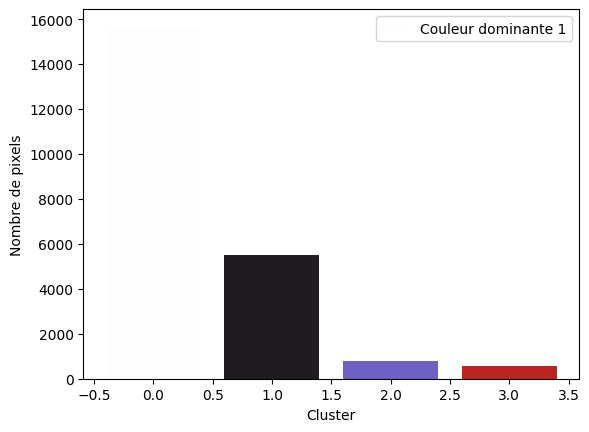

DataFrame pour l'image im-120_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-116_im.png    36,39,30  202,145,66
im-117_im.png  210,115,47    72,50,38
im-118_im.png    50,30,17   127,33,13
im-119_im.png   184,73,29    37,29,24
im-120_im.png    30,28,30  110,96,197

[120 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [8.58788942 2.55780216 5.56454995]
   Code couleur RGB: [0.12127237 0.09119436 0.06506302]
   Nombre de pixels: 5221

Cluster 2:
   Code couleur Lab: [ 9.98622273e+01 -1.04035819e-01  6.49288756e-02]
   Code couleur RGB: [0.99782454 0.99866265 0.99796235]
   Nombre de pixels: 13095

Cluster 3:
   Code couleur Lab: [  35.57456073   75.08205679 -102.35430912]
   Code couleur RGB: [0.21537437 0.103817   1.        ]
   Nombre de pixels: 695

Cluster 4:
   Code couleur Lab: [38.60456078 23.62866228 40.45959208]
   Code couleur RGB: [0.54416798 0.29027973 0.0885354 ]
   Nombre de pixels: 3489



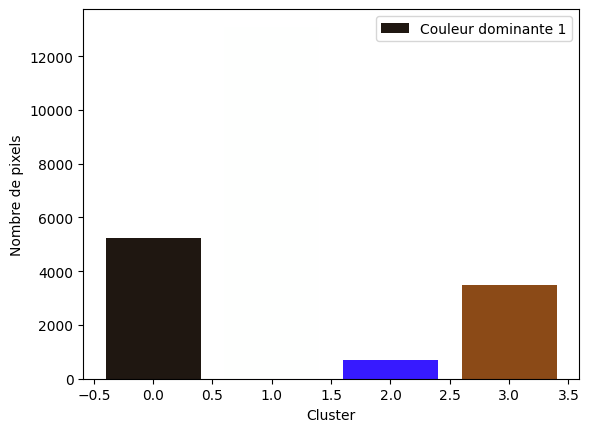

DataFrame pour l'image im-121_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-117_im.png  210,115,47    72,50,38
im-118_im.png    50,30,17   127,33,13
im-119_im.png   184,73,29    37,29,24
im-120_im.png    30,28,30  110,96,197
im-121_im.png    31,23,17   139,74,23

[121 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [10.1339884  -1.37603985  5.95415022]
   Code couleur RGB: [0.11410503 0.10993046 0.0765739 ]
   Nombre de pixels: 6581

Cluster 2:
   Code couleur Lab: [99.55993866 -0.18987249  0.35433513]
   Code couleur RGB: [0.99472717 0.99535019 0.99232138]
   Nombre de pixels: 14411

Cluster 3:
   Code couleur Lab: [ 37.88270106  80.04681279 -98.43681093]
   Code couleur RGB: [0.38281451 0.04078788 1.        ]
   Nombre de pixels: 390

Cluster 4:
   Code couleur Lab: [36.23257674 49.27089885 44.94506083]
   Code couleur RGB: [0.63630949 0.1495289  0.04288323]
   Nombre de pixels: 1118



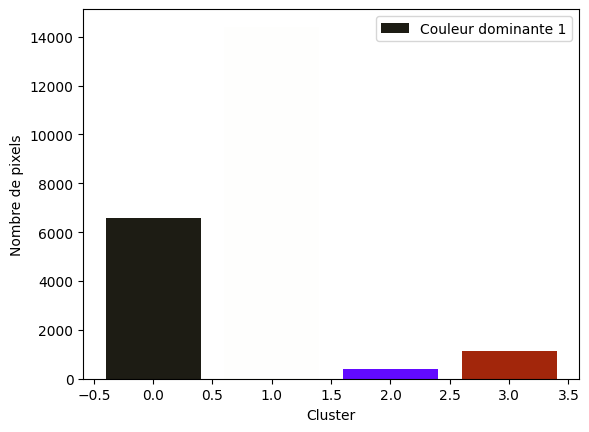

DataFrame pour l'image im-122_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-118_im.png    50,30,17   127,33,13
im-119_im.png   184,73,29    37,29,24
im-120_im.png    30,28,30  110,96,197
im-121_im.png    31,23,17   139,74,23
im-122_im.png    29,28,20   162,38,11

[122 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.82523908  0.24852245  0.86071519]
   Code couleur RGB: [0.99172193 0.98579897 0.98021481]
   Nombre de pixels: 11759

Cluster 2:
   Code couleur Lab: [55.32640135 45.88646857 48.79356348]
   Code couleur RGB: [0.85528204 0.3708439  0.18966762]
   Nombre de pixels: 3796

Cluster 3:
   Code couleur Lab: [19.32155047 12.61562682 16.01852999]
   Code couleur RGB: [0.27368757 0.15362818 0.09419003]
   Nombre de pixels: 6848

Cluster 4:
   Code couleur Lab: [  36.00565697   77.29403164 -101.60766961]
   Code couleur RGB: [0.27548399 0.07625288 1.        ]
   Nombre de pixels: 97



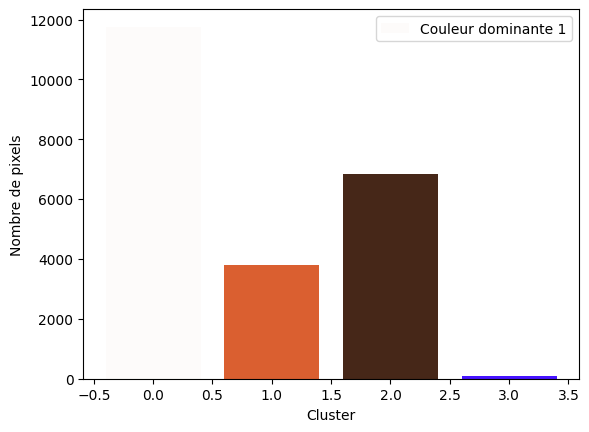

DataFrame pour l'image im-123_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-119_im.png   184,73,29    37,29,24
im-120_im.png    30,28,30  110,96,197
im-121_im.png    31,23,17   139,74,23
im-122_im.png    29,28,20   162,38,11
im-123_im.png    70,39,24   218,95,48

[123 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.96352758e+01 -6.71043431e-02  3.54214649e-01]
   Code couleur RGB: [0.99657813 0.99590818 0.99319478]
   Nombre de pixels: 14942

Cluster 2:
   Code couleur Lab: [25.32777094 12.4898398   7.05483294]
   Code couleur RGB: [0.31940045 0.20685338 0.1957042 ]
   Nombre de pixels: 3271

Cluster 3:
   Code couleur Lab: [53.85129612 40.08255166 52.9407526 ]
   Code couleur RGB: [0.81059692 0.37911449 0.13574619]
   Nombre de pixels: 4114

Cluster 4:
   Code couleur Lab: [ 39.03050184  77.58494654 -96.53911518]
   Code couleur RGB: [0.39376565 0.10035909 1.        ]
   Nombre de pixels: 173



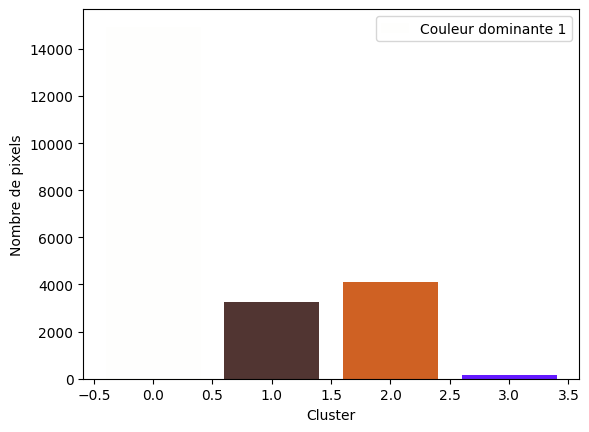

DataFrame pour l'image im-124_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-120_im.png    30,28,30  110,96,197
im-121_im.png    31,23,17   139,74,23
im-122_im.png    29,28,20   162,38,11
im-123_im.png    70,39,24   218,95,48
im-124_im.png   207,97,35    81,53,50

[124 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98441003e+01 -2.99119027e-02  1.54670395e-01]
   Code couleur RGB: [0.99854126 0.99824993 0.99708572]
   Nombre de pixels: 16642

Cluster 2:
   Code couleur Lab: [13.64664778  7.37694066 13.62807333]
   Code couleur RGB: [0.19554353 0.11996712 0.06059372]
   Nombre de pixels: 1808

Cluster 3:
   Code couleur Lab: [ 46.33576095  72.48069657 -84.43606149]
   Code couleur RGB: [0.5471865  0.21633771 1.        ]
   Nombre de pixels: 1366

Cluster 4:
   Code couleur Lab: [46.65926287 31.76534284 51.99029719]
   Code couleur RGB: [0.68247483 0.33886571 0.05913101]
   Nombre de pixels: 2684



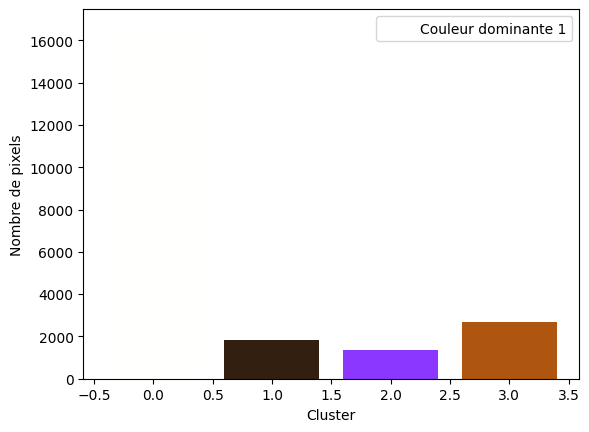

DataFrame pour l'image im-125_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-121_im.png    31,23,17  139,74,23
im-122_im.png    29,28,20  162,38,11
im-123_im.png    70,39,24  218,95,48
im-124_im.png   207,97,35   81,53,50
im-125_im.png   174,86,15   50,31,15

[125 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [66.46030947 18.03965199 60.12618254]
   Code couleur RGB: [0.85099367 0.57766569 0.18360921]
   Nombre de pixels: 6009

Cluster 2:
   Code couleur Lab: [99.51670545  0.15624601  0.52636773]
   Code couleur RGB: [0.99765058 0.99396793 0.99057454]
   Nombre de pixels: 12495

Cluster 3:
   Code couleur Lab: [28.48487156 20.98617196 22.57361045]
   Code couleur RGB: [0.40968721 0.20829184 0.13028866]
   Nombre de pixels: 3729

Cluster 4:
   Code couleur Lab: [ 43.33429722  71.23364528 -89.45406656]
   Code couleur RGB: [0.45812159 0.20054561 1.        ]
   Nombre de pixels: 267



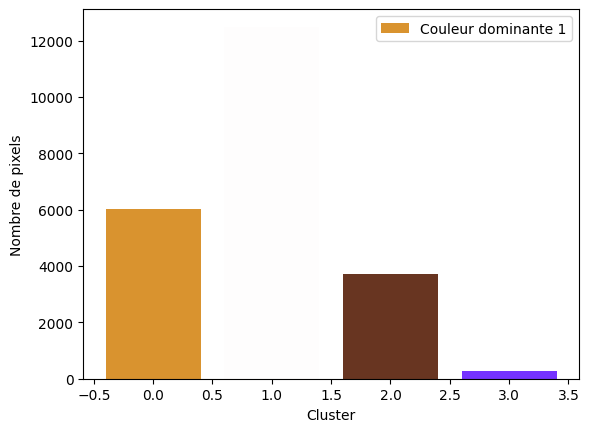

DataFrame pour l'image im-126_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-122_im.png    29,28,20  162,38,11
im-123_im.png    70,39,24  218,95,48
im-124_im.png   207,97,35   81,53,50
im-125_im.png   174,86,15   50,31,15
im-126_im.png  217,147,47  104,53,33

[126 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.73516795 15.43659738 57.61431397]
   Code couleur RGB: [0.76680679 0.52673014 0.14485027]
   Nombre de pixels: 4610

Cluster 2:
   Code couleur Lab: [9.94915700e+01 7.03874164e-02 2.16841015e-01]
   Code couleur RGB: [0.99557079 0.99398306 0.99262421]
   Nombre de pixels: 12655

Cluster 3:
   Code couleur Lab: [16.48112416  2.41418599  3.24630446]
   Code couleur RGB: [0.1809184  0.1548006  0.14223704]
   Nombre de pixels: 2148

Cluster 4:
   Code couleur Lab: [40.55879102 18.02136986 35.48842485]
   Code couleur RGB: [0.53493018 0.32556376 0.14411646]
   Nombre de pixels: 3087



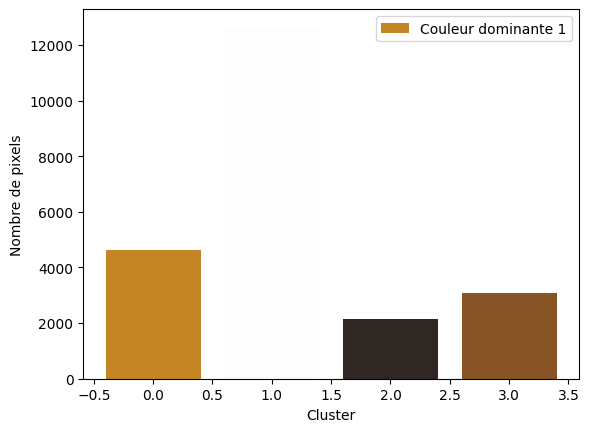

DataFrame pour l'image im-127_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-123_im.png    70,39,24  218,95,48
im-124_im.png   207,97,35   81,53,50
im-125_im.png   174,86,15   50,31,15
im-126_im.png  217,147,47  104,53,33
im-127_im.png  196,134,37  136,83,37

[127 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.27441071 -0.22998882  0.1841981 ]
   Code couleur RGB: [0.990553   0.99225574 0.99036489]
   Nombre de pixels: 14421

Cluster 2:
   Code couleur Lab: [16.30949676 -5.79323353  8.73792013]
   Code couleur RGB: [0.14438544 0.16645616 0.10918166]
   Nombre de pixels: 5580

Cluster 3:
   Code couleur Lab: [  36.60178716   78.69437999 -100.63128368]
   Code couleur RGB: [0.31993569 0.05658414 1.        ]
   Nombre de pixels: 710

Cluster 4:
   Code couleur Lab: [56.2983084  45.15353117 55.88497664]
   Code couleur RGB: [0.86761401 0.38307171 0.13632911]
   Nombre de pixels: 1789



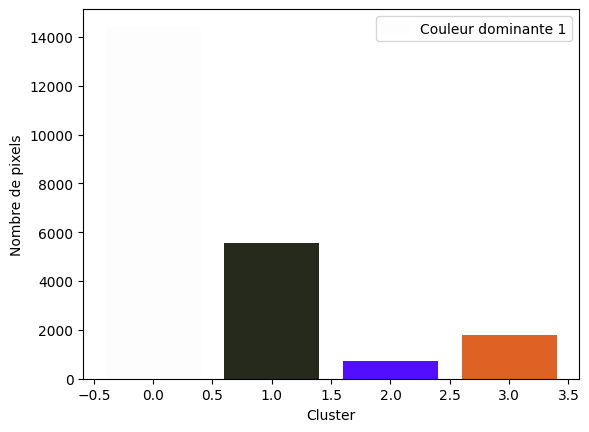

DataFrame pour l'image im-128_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-124_im.png   207,97,35   81,53,50
im-125_im.png   174,86,15   50,31,15
im-126_im.png  217,147,47  104,53,33
im-127_im.png  196,134,37  136,83,37
im-128_im.png    37,42,28  221,98,35

[128 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95171287e+01 5.06138083e-02 1.82806243e-01]
   Code couleur RGB: [0.99557963 0.99433145 0.9931697 ]
   Nombre de pixels: 15534

Cluster 2:
   Code couleur Lab: [44.60995186  8.35702735 44.63853624]
   Code couleur RGB: [0.53615812 0.38766086 0.10020567]
   Nombre de pixels: 4837

Cluster 3:
   Code couleur Lab: [ 45.61716551  62.5590861  -85.64820298]
   Code couleur RGB: [0.43778408 0.27327984 1.        ]
   Nombre de pixels: 985

Cluster 4:
   Code couleur Lab: [ 9.7626404  -1.36601124  6.71894843]
   Code couleur RGB: [0.11292081 0.10685942 0.06839821]
   Nombre de pixels: 1144



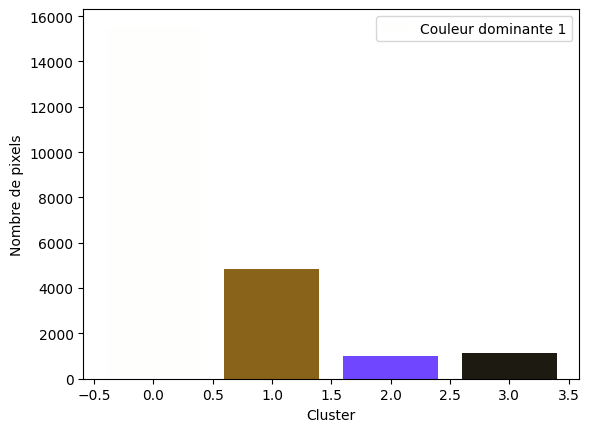

DataFrame pour l'image im-129_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-125_im.png   174,86,15   50,31,15
im-126_im.png  217,147,47  104,53,33
im-127_im.png  196,134,37  136,83,37
im-128_im.png    37,42,28  221,98,35
im-129_im.png   137,99,26   29,27,17

[129 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.90783438e+01 5.64552686e-02 2.55419377e-01]
   Code couleur RGB: [0.9909035  0.98931511 0.9876408 ]
   Nombre de pixels: 12665

Cluster 2:
   Code couleur Lab: [40.77058142 29.36887906 44.43441115]
   Code couleur RGB: [0.59842125 0.29137728 0.07656219]
   Nombre de pixels: 6088

Cluster 3:
   Code couleur Lab: [ 48.65184178  69.92667193 -80.48274007]
   Code couleur RGB: [0.58185598 0.25422039 1.        ]
   Nombre de pixels: 1142

Cluster 4:
   Code couleur Lab: [13.48324267  0.91824765  3.10926116]
   Code couleur RGB: [0.14760297 0.13315814 0.11872694]
   Nombre de pixels: 2605



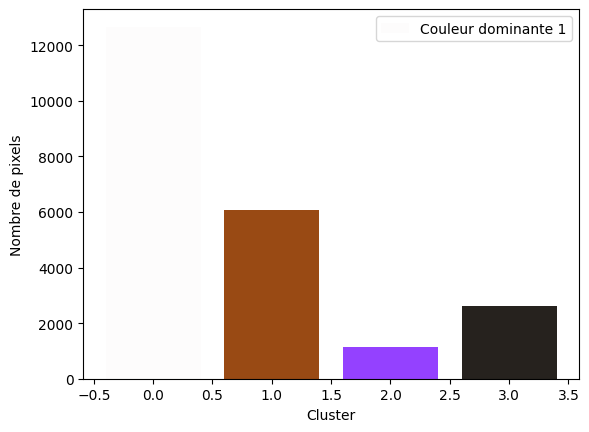

DataFrame pour l'image im-130_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-126_im.png  217,147,47  104,53,33
im-127_im.png  196,134,37  136,83,37
im-128_im.png    37,42,28  221,98,35
im-129_im.png   137,99,26   29,27,17
im-130_im.png   153,74,20   38,34,30

[130 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [53.2244246  30.1622358  46.35907381]
   Code couleur RGB: [0.74885575 0.40936382 0.18141941]
   Nombre de pixels: 3103

Cluster 2:
   Code couleur Lab: [97.57443492 -0.72836554  0.15557046]
   Code couleur RGB: [0.96715766 0.9742026  0.97125633]
   Nombre de pixels: 13939

Cluster 3:
   Code couleur Lab: [16.21374414  3.67384304  4.16782552]
   Code couleur RGB: [0.18706939 0.1499983  0.13513599]
   Nombre de pixels: 4810

Cluster 4:
   Code couleur Lab: [  34.21621018   79.31397211 -104.62758355]
   Code couleur RGB: [0.21642053 0.01358893 1.        ]
   Nombre de pixels: 648



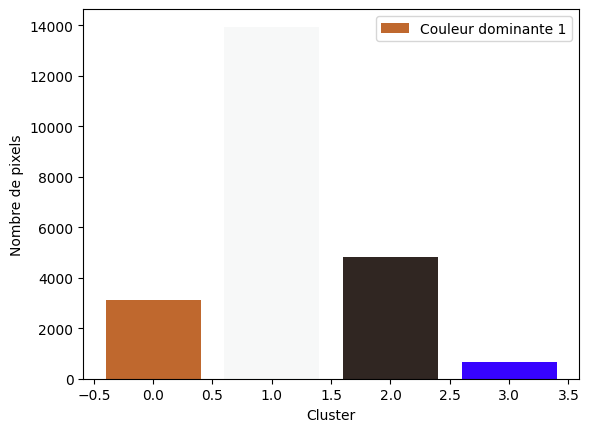

DataFrame pour l'image im-131_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-127_im.png  196,134,37   136,83,37
im-128_im.png    37,42,28   221,98,35
im-129_im.png   137,99,26    29,27,17
im-130_im.png   153,74,20    38,34,30
im-131_im.png    48,38,34  191,104,46

[131 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [22.9862881   3.860706   12.38085886]
   Code couleur RGB: [0.26155947 0.20508519 0.14343375]
   Nombre de pixels: 3133

Cluster 2:
   Code couleur Lab: [9.94360231e+01 8.80751614e-02 3.92553350e-01]
   Code couleur RGB: [0.99570788 0.99325716 0.99066396]
   Nombre de pixels: 11199

Cluster 3:
   Code couleur Lab: [49.9342305  40.7867518  52.31668804]
   Code couleur RGB: [0.76598816 0.33687349 0.10179623]
   Nombre de pixels: 7980

Cluster 4:
   Code couleur Lab: [ 53.42784573  75.68925626 -72.53914508]
   Code couleur RGB: [0.72684714 0.2574526  1.        ]
   Nombre de pixels: 188



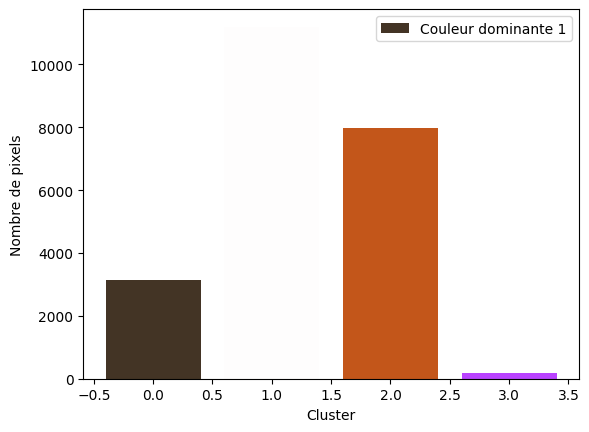

DataFrame pour l'image im-132_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-128_im.png    37,42,28   221,98,35
im-129_im.png   137,99,26    29,27,17
im-130_im.png   153,74,20    38,34,30
im-131_im.png    48,38,34  191,104,46
im-132_im.png   195,86,26    67,52,37

[132 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [27.00185365  9.39335929 23.51545643]
   Code couleur RGB: [0.34043025 0.22621586 0.1085563 ]
   Nombre de pixels: 2952

Cluster 2:
   Code couleur Lab: [ 9.91515246e+01 -6.15041203e-02  2.59946003e-01]
   Code couleur RGB: [0.99079488 0.99043021 0.98842013]
   Nombre de pixels: 14620

Cluster 3:
   Code couleur Lab: [ 39.67616465  72.94353695 -95.49356274]
   Code couleur RGB: [0.3634215  0.15720458 1.        ]
   Nombre de pixels: 724

Cluster 4:
   Code couleur Lab: [60.81906305 24.93548076 51.62985504]
   Code couleur RGB: [0.81522039 0.50120006 0.20845053]
   Nombre de pixels: 4204



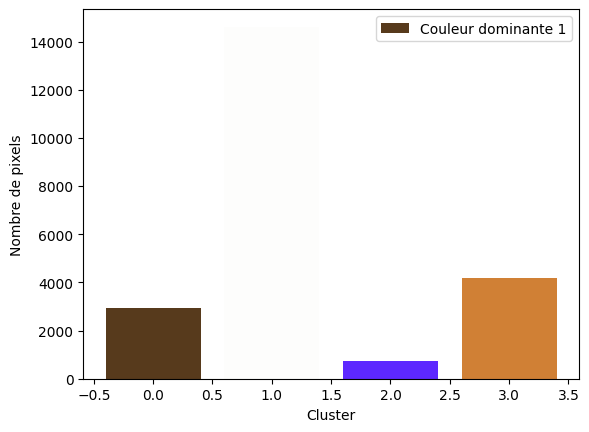

DataFrame pour l'image im-133_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-129_im.png   137,99,26    29,27,17
im-130_im.png   153,74,20    38,34,30
im-131_im.png    48,38,34  191,104,46
im-132_im.png   195,86,26    67,52,37
im-133_im.png  208,128,53    87,58,28

[133 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [33.10884739 41.81017366 42.09448088]
   Code couleur RGB: [0.56522903 0.16305653 0.03250805]
   Nombre de pixels: 4399

Cluster 2:
   Code couleur Lab: [ 9.98242598e+01 -1.53699907e-02  1.90889940e-01]
   Code couleur RGB: [0.99856306 0.99797836 0.99658749]
   Nombre de pixels: 15379

Cluster 3:
   Code couleur Lab: [ 39.47310851  78.13989723 -95.76090905]
   Code couleur RGB: [0.41393085 0.09659978 1.        ]
   Nombre de pixels: 1232

Cluster 4:
   Code couleur Lab: [12.69266685  6.47112412 14.13905911]
   Code couleur RGB: [0.18406427 0.11419468 0.04581508]
   Nombre de pixels: 1490



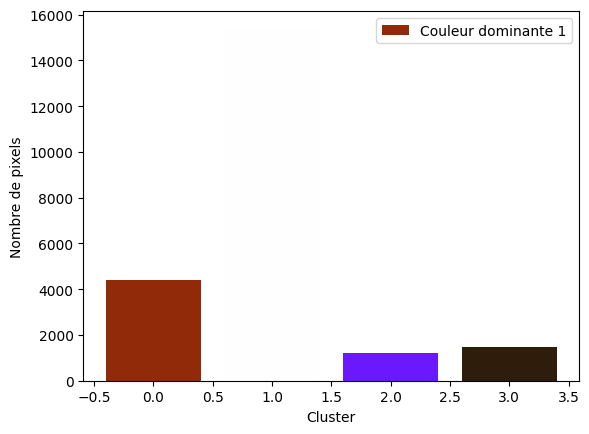

DataFrame pour l'image im-134_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-130_im.png   153,74,20    38,34,30
im-131_im.png    48,38,34  191,104,46
im-132_im.png   195,86,26    67,52,37
im-133_im.png  208,128,53    87,58,28
im-134_im.png    144,42,8    47,29,12

[134 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [20.81525702  2.91390222 10.78011764]
   Code couleur RGB: [0.2345712  0.18871192 0.13490501]
   Nombre de pixels: 2281

Cluster 2:
   Code couleur Lab: [99.37629641 -0.12874187  0.66883908]
   Code couleur RGB: [0.99425477 0.99302333 0.98786138]
   Nombre de pixels: 15656

Cluster 3:
   Code couleur Lab: [ 49.08498419  75.57499086 -79.76736333]
   Code couleur RGB: [0.63515497 0.21668239 1.        ]
   Nombre de pixels: 1090

Cluster 4:
   Code couleur Lab: [45.80475899 49.47880703 54.04335961]
   Code couleur RGB: [0.75750044 0.25345966 0.04278969]
   Nombre de pixels: 3473



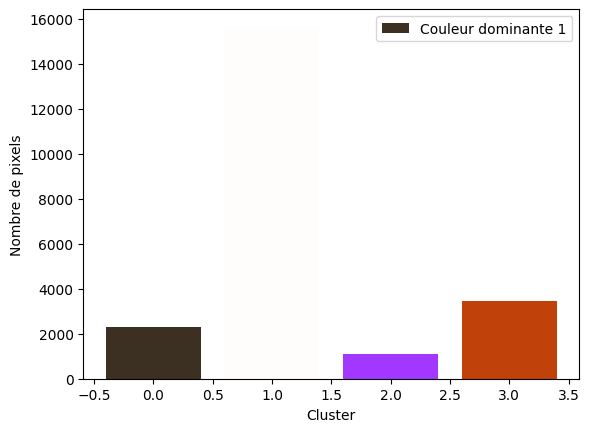

DataFrame pour l'image im-135_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-131_im.png    48,38,34  191,104,46
im-132_im.png   195,86,26    67,52,37
im-133_im.png  208,128,53    87,58,28
im-134_im.png    144,42,8    47,29,12
im-135_im.png   193,65,11    60,48,34

[135 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94191364e+01 -2.74262099e-02  7.90318483e-01]
   Code couleur RGB: [0.99599083 0.99322799 0.98744052]
   Nombre de pixels: 13600

Cluster 2:
   Code couleur Lab: [64.17200463 41.72402301 65.4754591 ]
   Code couleur RGB: [0.95365239 0.47700603 0.11568339]
   Nombre de pixels: 5820

Cluster 3:
   Code couleur Lab: [66.41755423 11.07762891 36.61556749]
   Code couleur RGB: [0.78596513 0.59883111 0.37577407]
   Nombre de pixels: 2202

Cluster 4:
   Code couleur Lab: [31.75693156  3.62246868  4.74383222]
   Code couleur RGB: [0.32732595 0.28452936 0.26452118]
   Nombre de pixels: 878



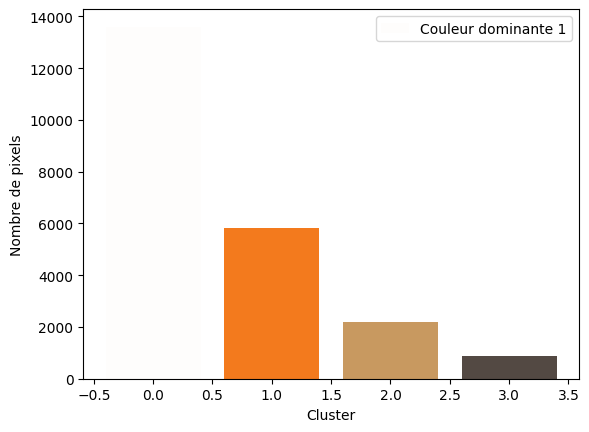

DataFrame pour l'image im-136_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-132_im.png   195,86,26    67,52,37
im-133_im.png  208,128,53    87,58,28
im-134_im.png    144,42,8    47,29,12
im-135_im.png   193,65,11    60,48,34
im-136_im.png  243,122,29  200,153,96

[136 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [20.82304655  5.99645244 17.80591839]
   Code couleur RGB: [0.25881556 0.1814325  0.09376793]
   Nombre de pixels: 4294

Cluster 2:
   Code couleur Lab: [ 9.99149988e+01 -3.38086930e-03  2.11393136e-02]
   Code couleur RGB: [0.99908521 0.99903108 0.99890848]
   Nombre de pixels: 15121

Cluster 3:
   Code couleur Lab: [  35.84097052   75.03223877 -101.89209489]
   Code couleur RGB: [0.22997281 0.10634565 1.        ]
   Nombre de pixels: 573

Cluster 4:
   Code couleur Lab: [50.86106692 18.64718387 44.03642784]
   Code couleur RGB: [0.65987131 0.42139853 0.17253717]
   Nombre de pixels: 2512



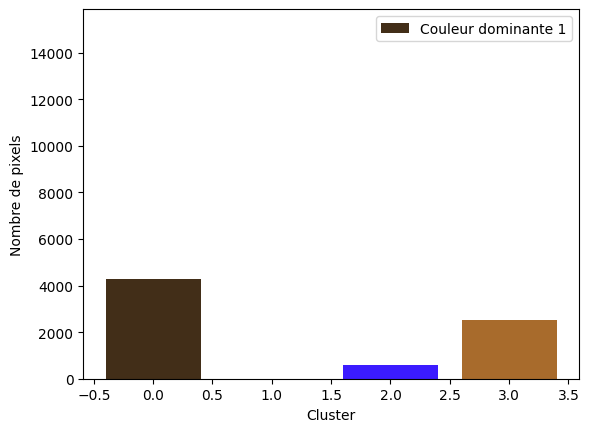

DataFrame pour l'image im-137_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-133_im.png  208,128,53    87,58,28
im-134_im.png    144,42,8    47,29,12
im-135_im.png   193,65,11    60,48,34
im-136_im.png  243,122,29  200,153,96
im-137_im.png    66,46,24  168,107,44

[137 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [25.13044444  5.07558323 21.22056107]
   Code couleur RGB: [0.29866925 0.21983579 0.10691792]
   Nombre de pixels: 1607

Cluster 2:
   Code couleur Lab: [9.99306884e+01 5.57739862e-04 6.79185700e-02]
   Code couleur RGB: [0.99946284 0.99918591 0.99873234]
   Nombre de pixels: 13049

Cluster 3:
   Code couleur Lab: [50.44554291 40.15395183 37.7020732 ]
   Code couleur RGB: [0.76007428 0.34664176 0.22581078]
   Nombre de pixels: 7659

Cluster 4:
   Code couleur Lab: [  35.4339928    75.86885211 -102.57468244]
   Code couleur RGB: [0.22248363 0.09260583 1.        ]
   Nombre de pixels: 185



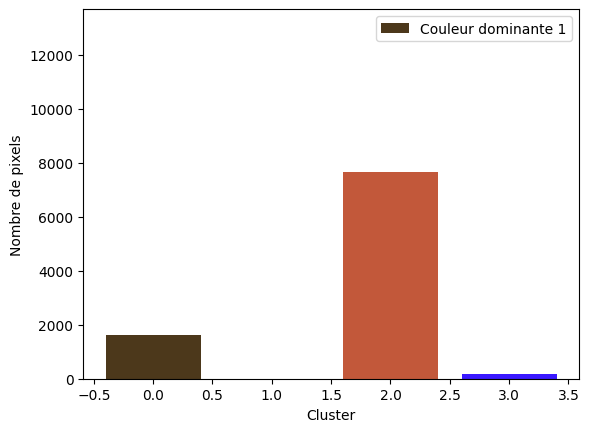

DataFrame pour l'image im-138_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-134_im.png    144,42,8    47,29,12
im-135_im.png   193,65,11    60,48,34
im-136_im.png  243,122,29  200,153,96
im-137_im.png    66,46,24  168,107,44
im-138_im.png   194,88,58    76,56,27

[138 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.76518863 -0.14494483  0.10414081]
   Code couleur RGB: [0.99652991 0.99764745 0.99655647]
   Nombre de pixels: 14823

Cluster 2:
   Code couleur Lab: [13.07519313  3.91367156 12.37632313]
   Code couleur RGB: [0.17349214 0.12277385 0.06306984]
   Nombre de pixels: 3347

Cluster 3:
   Code couleur Lab: [  34.58366429   77.53387513 -104.0013651 ]
   Code couleur RGB: [0.204027   0.05906256 1.        ]
   Nombre de pixels: 786

Cluster 4:
   Code couleur Lab: [40.77437229 25.60531853 40.3838536 ]
   Code couleur RGB: [0.57812223 0.30439994 0.11089604]
   Nombre de pixels: 3544



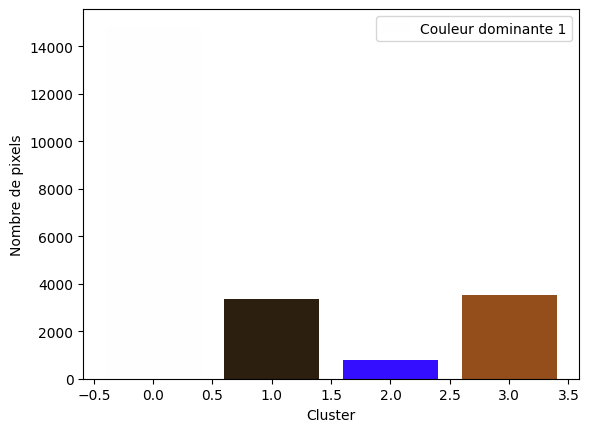

DataFrame pour l'image im-139_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-135_im.png   193,65,11    60,48,34
im-136_im.png  243,122,29  200,153,96
im-137_im.png    66,46,24  168,107,44
im-138_im.png   194,88,58    76,56,27
im-139_im.png   147,78,28    44,31,16

[139 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98553898e+01 -1.13213304e-02  3.16309254e-02]
   Code couleur RGB: [0.99838076 0.99836975 0.99815026]
   Nombre de pixels: 13861

Cluster 2:
   Code couleur Lab: [32.50542032 14.09306766 21.95934634]
   Code couleur RGB: [0.41763204 0.26378796 0.16621734]
   Nombre de pixels: 7157

Cluster 3:
   Code couleur Lab: [12.66564081 -2.01667585  6.91894804]
   Code couleur RGB: [0.13253046 0.13093512 0.09133992]
   Nombre de pixels: 1427

Cluster 4:
   Code couleur Lab: [  33.1347786    77.78486759 -106.44557316]
   Code couleur RGB: [0.08226627 0.04037019 1.        ]
   Nombre de pixels: 55



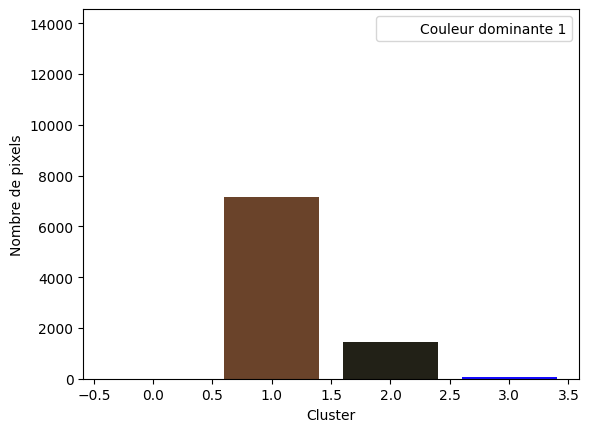

DataFrame pour l'image im-140_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-136_im.png  243,122,29  200,153,96
im-137_im.png    66,46,24  168,107,44
im-138_im.png   194,88,58    76,56,27
im-139_im.png   147,78,28    44,31,16
im-140_im.png   106,67,42    34,33,23

[140 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.62695073 -0.46107364  0.29903429]
   Code couleur RGB: [0.99308802 0.99678479 0.99346376]
   Nombre de pixels: 15960

Cluster 2:
   Code couleur Lab: [  36.77914002   78.72035302 -100.31138582]
   Code couleur RGB: [0.32752679 0.05792111 1.        ]
   Nombre de pixels: 1120

Cluster 3:
   Code couleur Lab: [35.14846321 40.25290412 41.08649507]
   Code couleur RGB: [0.58188648 0.19245261 0.06142622]
   Nombre de pixels: 2428

Cluster 4:
   Code couleur Lab: [13.15744894  4.1880663  11.37678712]
   Code couleur RGB: [0.17415128 0.12304584 0.07056048]
   Nombre de pixels: 2992



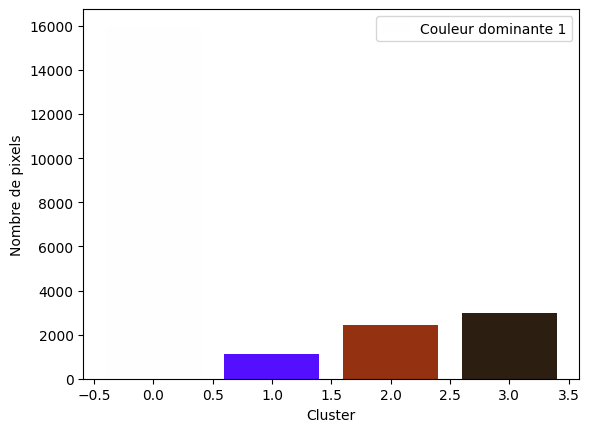

DataFrame pour l'image im-141_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-137_im.png    66,46,24  168,107,44
im-138_im.png   194,88,58    76,56,27
im-139_im.png   147,78,28    44,31,16
im-140_im.png   106,67,42    34,33,23
im-141_im.png    44,31,18   148,49,16

[141 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.97136502e+01 8.10230678e-02 1.66904035e-01]
   Code couleur RGB: [0.99800226 0.99649452 0.99552637]
   Nombre de pixels: 16564

Cluster 2:
   Code couleur Lab: [68.41638983 28.16674738 54.03814784]
   Code couleur RGB: [0.92615099 0.56875475 0.26507794]
   Nombre de pixels: 4576

Cluster 3:
   Code couleur Lab: [32.9685392   4.04825586  6.99778717]
   Code couleur RGB: [0.34606215 0.29416729 0.26165686]
   Nombre de pixels: 1022

Cluster 4:
   Code couleur Lab: [ 67.26933733  61.3108971  -50.09342518]
   Code couleur RGB: [0.88966062 0.47088744 1.        ]
   Nombre de pixels: 338



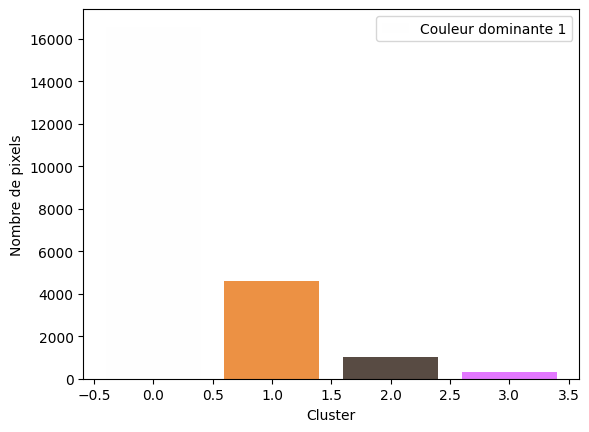

DataFrame pour l'image im-142_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-138_im.png   194,88,58   76,56,27
im-139_im.png   147,78,28   44,31,16
im-140_im.png   106,67,42   34,33,23
im-141_im.png    44,31,18  148,49,16
im-142_im.png  236,145,68   88,75,67

[142 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.67050695  0.12444351  0.27184764]
   Code couleur RGB: [0.99823757 0.99586765 0.99424638]
   Nombre de pixels: 12087

Cluster 2:
   Code couleur Lab: [68.84522385 16.88477212 59.09783695]
   Code couleur RGB: [0.87218667 0.60555326 0.21868933]
   Nombre de pixels: 5661

Cluster 3:
   Code couleur Lab: [18.20831044  7.43894022 17.33907151]
   Code couleur RGB: [0.24071235 0.15651042 0.07629601]
   Nombre de pixels: 4490

Cluster 4:
   Code couleur Lab: [ 38.86430336  73.86768642 -96.83644251]
   Code couleur RGB: [0.34567129 0.14215294 1.        ]
   Nombre de pixels: 262



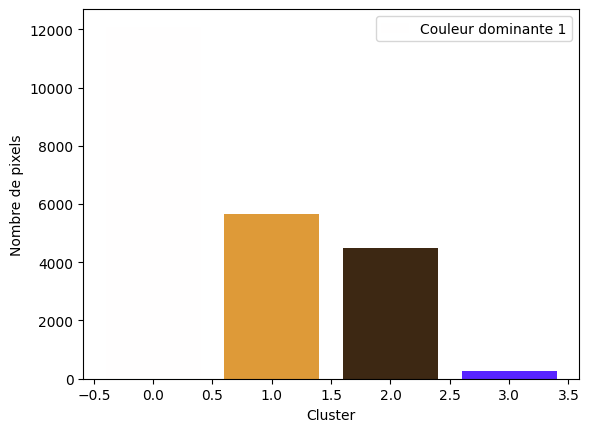

DataFrame pour l'image im-143_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-139_im.png   147,78,28   44,31,16
im-140_im.png   106,67,42   34,33,23
im-141_im.png    44,31,18  148,49,16
im-142_im.png  236,145,68   88,75,67
im-143_im.png  222,154,56   61,40,19

[143 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.15237197 -0.50456598  0.5185586 ]
   Code couleur RGB: [0.98813308 0.99143571 0.98640828]
   Nombre de pixels: 12540

Cluster 2:
   Code couleur Lab: [15.6355147  -0.78478449 13.68614403]
   Code couleur RGB: [0.17408317 0.15201443 0.07626625]
   Nombre de pixels: 2977

Cluster 3:
   Code couleur Lab: [50.52495919 12.19243596 50.22652412]
   Code couleur RGB: [0.62630662 0.43466906 0.10843238]
   Nombre de pixels: 6211

Cluster 4:
   Code couleur Lab: [ 41.67981157  70.26185064 -92.27305869]
   Code couleur RGB: [0.39850211 0.19483297 1.        ]
   Nombre de pixels: 772



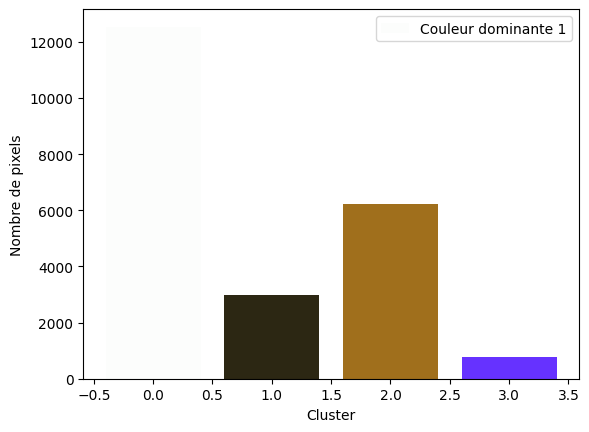

DataFrame pour l'image im-144_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-140_im.png   106,67,42   34,33,23
im-141_im.png    44,31,18  148,49,16
im-142_im.png  236,145,68   88,75,67
im-143_im.png  222,154,56   61,40,19
im-144_im.png  160,111,28   44,39,19

[144 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.36445891 -0.10077777  0.47512196]
   Code couleur RGB: [0.99365934 0.9928785  0.98919954]
   Nombre de pixels: 15341

Cluster 2:
   Code couleur Lab: [37.7148926  43.41903648 44.20318135]
   Code couleur RGB: [0.62768548 0.20197589 0.05964265]
   Nombre de pixels: 3548

Cluster 3:
   Code couleur Lab: [ 40.49989065  79.64252543 -94.04347535]
   Code couleur RGB: [0.45880589 0.08387746 1.        ]
   Nombre de pixels: 773

Cluster 4:
   Code couleur Lab: [12.28640855  4.52409687  8.13559292]
   Code couleur RGB: [0.16402243 0.11595507 0.0826798 ]
   Nombre de pixels: 2838



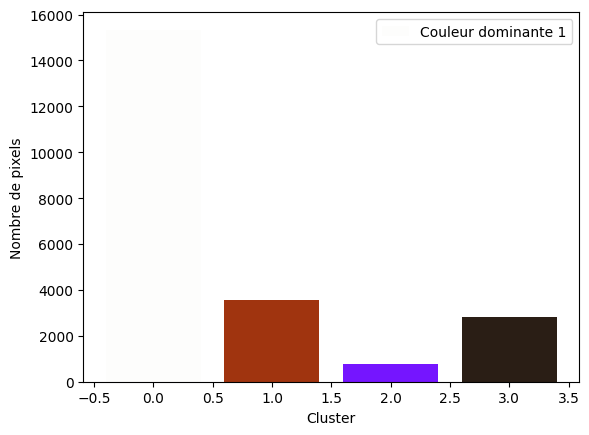

DataFrame pour l'image im-145_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-141_im.png    44,31,18  148,49,16
im-142_im.png  236,145,68   88,75,67
im-143_im.png  222,154,56   61,40,19
im-144_im.png  160,111,28   44,39,19
im-145_im.png   160,52,15   42,30,21

[145 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.04551155  0.21913124 -0.20881047]
   Code couleur RGB: [0.97885817 0.97735437 0.97947089]
   Nombre de pixels: 12006

Cluster 2:
   Code couleur Lab: [11.17061515 -1.03614303 -0.19119162]
   Code couleur RGB: [0.1104613  0.11867369 0.11782776]
   Nombre de pixels: 9040

Cluster 3:
   Code couleur Lab: [ 38.89321933  77.2147168  -96.7820485 ]
   Code couleur RGB: [0.38514612 0.10420827 1.        ]
   Nombre de pixels: 287

Cluster 4:
   Code couleur Lab: [33.10878622 31.47102943 36.2995823 ]
   Code couleur RGB: [0.51676111 0.21221617 0.07756433]
   Nombre de pixels: 1167



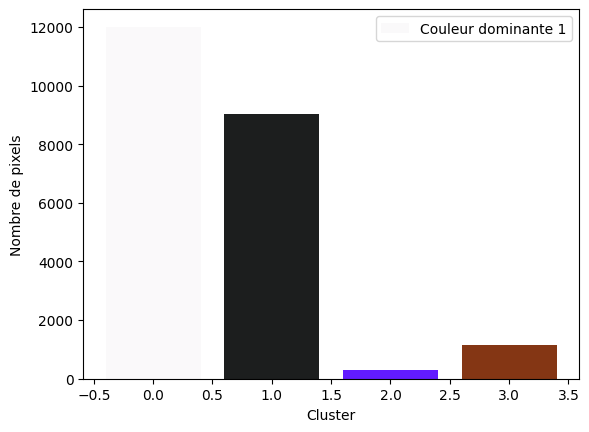

DataFrame pour l'image im-146_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-142_im.png  236,145,68   88,75,67
im-143_im.png  222,154,56   61,40,19
im-144_im.png  160,111,28   44,39,19
im-145_im.png   160,52,15   42,30,21
im-146_im.png    28,30,30  132,54,20

[146 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.88450157 -0.25092881  1.19687262]
   Code couleur RGB: [0.98954896 0.98758298 0.97827012]
   Nombre de pixels: 12552

Cluster 2:
   Code couleur Lab: [52.50419199 43.43985168 55.83308605]
   Code couleur RGB: [0.81210084 0.35143568 0.09441666]
   Nombre de pixels: 5992

Cluster 3:
   Code couleur Lab: [ 44.04273066  76.5341289  -88.23248626]
   Code couleur RGB: [0.52465684 0.16055631 1.        ]
   Nombre de pixels: 957

Cluster 4:
   Code couleur Lab: [18.44622963  2.56548107 16.2129914 ]
   Code couleur RGB: [0.21857552 0.168725   0.08386327]
   Nombre de pixels: 2999



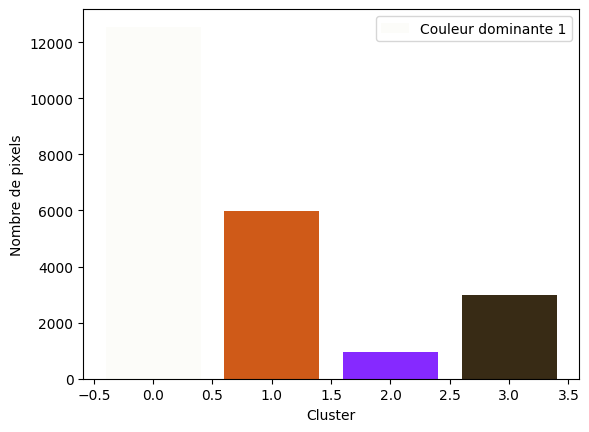

DataFrame pour l'image im-147_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-143_im.png  222,154,56   61,40,19
im-144_im.png  160,111,28   44,39,19
im-145_im.png   160,52,15   42,30,21
im-146_im.png    28,30,30  132,54,20
im-147_im.png   207,90,24   56,43,21

[147 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94565418e+01 -3.33219257e-02  2.88955462e-01]
   Code couleur RGB: [0.99458935 0.99381563 0.99166531]
   Nombre de pixels: 17980

Cluster 2:
   Code couleur Lab: [65.48768283 11.04265261 59.09370729]
   Code couleur RGB: [0.79900186 0.58643484 0.17926562]
   Nombre de pixels: 2466

Cluster 3:
   Code couleur Lab: [20.08980978  5.33537669 12.81182402]
   Code couleur RGB: [0.24308329 0.17734794 0.11762194]
   Nombre de pixels: 1615

Cluster 4:
   Code couleur Lab: [ 38.38458972  73.45386103 -97.70591475]
   Code couleur RGB: [0.32144293 0.14264844 1.        ]
   Nombre de pixels: 439



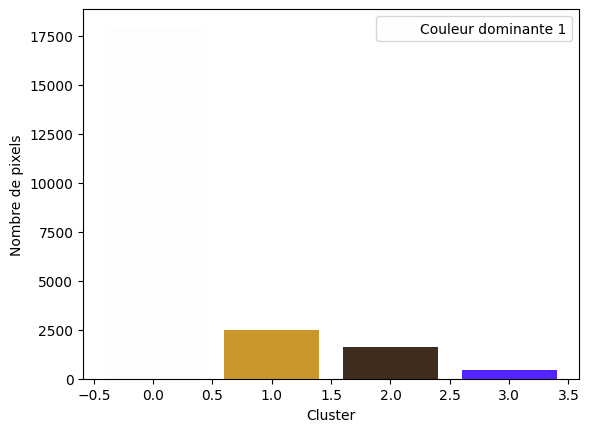

DataFrame pour l'image im-148_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-144_im.png  160,111,28   44,39,19
im-145_im.png   160,52,15   42,30,21
im-146_im.png    28,30,30  132,54,20
im-147_im.png   207,90,24   56,43,21
im-148_im.png  204,150,46   62,45,30

[148 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [51.83644181 42.85451938 56.79052305]
   Code couleur RGB: [0.80142425 0.34701257 0.07426941]
   Nombre de pixels: 2800

Cluster 2:
   Code couleur Lab: [99.35262683 -0.12494522  0.64937199]
   Code couleur RGB: [0.99394771 0.99275116 0.98774102]
   Nombre de pixels: 15431

Cluster 3:
   Code couleur Lab: [ 38.33708553  77.0442405  -97.7665536 ]
   Code couleur RGB: [0.36375079 0.10157176 1.        ]
   Nombre de pixels: 1310

Cluster 4:
   Code couleur Lab: [12.06485303  5.59347084 12.08728316]
   Code couleur RGB: [0.17239633 0.11137205 0.05509284]
   Nombre de pixels: 2959



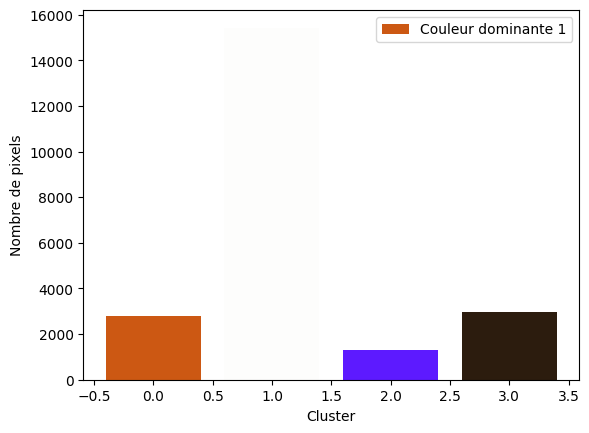

DataFrame pour l'image im-149_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-145_im.png   160,52,15   42,30,21
im-146_im.png    28,30,30  132,54,20
im-147_im.png   207,90,24   56,43,21
im-148_im.png  204,150,46   62,45,30
im-149_im.png    44,28,14  204,88,19

[149 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.31524     0.1278739   0.22440156]
   Code couleur RGB: [0.99406063 0.99183929 0.99057346]
   Nombre de pixels: 16383

Cluster 2:
   Code couleur Lab: [45.82162798 26.44916814 44.20106183]
   Code couleur RGB: [0.64226742 0.34938012 0.12677865]
   Nombre de pixels: 3642

Cluster 3:
   Code couleur Lab: [39.78893014 -7.5911484  20.24271118]
   Code couleur RGB: [0.36631613 0.37818234 0.2366102 ]
   Nombre de pixels: 2344

Cluster 4:
   Code couleur Lab: [ 49.69424229  69.47169933 -78.73456347]
   Code couleur RGB: [0.60211803 0.26619318 1.        ]
   Nombre de pixels: 131



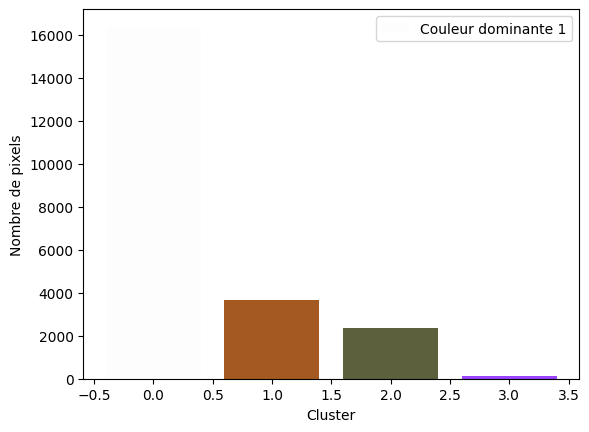

DataFrame pour l'image im-150_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-146_im.png    28,30,30  132,54,20
im-147_im.png   207,90,24   56,43,21
im-148_im.png  204,150,46   62,45,30
im-149_im.png    44,28,14  204,88,19
im-150_im.png   164,89,32   93,96,60

[150 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.92896305e+01 6.03735137e-03 2.55532352e-02]
   Code couleur RGB: [0.99207386 0.99190353 0.9917729 ]
   Nombre de pixels: 13866

Cluster 2:
   Code couleur Lab: [17.54087211 -3.00389406  9.70589322]
   Code couleur RGB: [0.17255788 0.17210789 0.11383426]
   Nombre de pixels: 7064

Cluster 3:
   Code couleur Lab: [  33.55230342   77.06457502 -105.74742612]
   Code couleur RGB: [0.10635809 0.05900152 1.        ]
   Nombre de pixels: 308

Cluster 4:
   Code couleur Lab: [64.68090454  3.46444526 48.28717551]
   Code couleur RGB: [0.73506806 0.59791313 0.26589298]
   Nombre de pixels: 1262



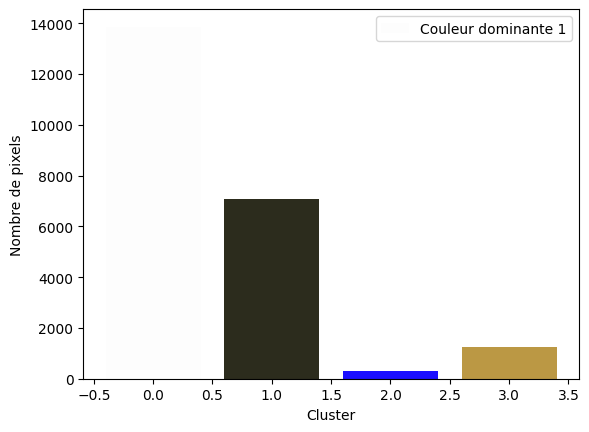

DataFrame pour l'image im-151_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-147_im.png   207,90,24    56,43,21
im-148_im.png  204,150,46    62,45,30
im-149_im.png    44,28,14   204,88,19
im-150_im.png   164,89,32    93,96,60
im-151_im.png    44,44,29  187,152,68

[151 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98256816e+01 -9.57212209e-02  2.23920858e-01]
   Code couleur RGB: [0.99804503 0.99817979 0.99634179]
   Nombre de pixels: 15899

Cluster 2:
   Code couleur Lab: [15.92727175  0.08179693 15.76478008]
   Code couleur RGB: [0.18354147 0.15261453 0.06567307]
   Nombre de pixels: 1628

Cluster 3:
   Code couleur Lab: [ 43.00035535  74.0801445  -89.91981662]
   Code couleur RGB: [0.47629368 0.17428538 1.        ]
   Nombre de pixels: 730

Cluster 4:
   Code couleur Lab: [46.67477565 31.94313999 50.25095447]
   Code couleur RGB: [0.68269544 0.33855733 0.0806929 ]
   Nombre de pixels: 4243



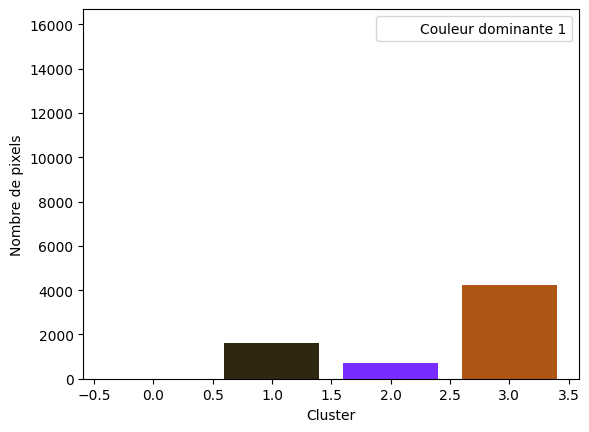

DataFrame pour l'image im-152_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-148_im.png  204,150,46    62,45,30
im-149_im.png    44,28,14   204,88,19
im-150_im.png   164,89,32    93,96,60
im-151_im.png    44,44,29  187,152,68
im-152_im.png   174,86,21    47,39,17

[152 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [57.07665125  4.59181469 50.36417251]
   Code couleur RGB: [0.65804134 0.51783715 0.17203129]
   Nombre de pixels: 6846

Cluster 2:
   Code couleur Lab: [9.83604573e+01 5.34533479e-02 8.08505626e-01]
   Code couleur RGB: [0.98469419 0.98102045 0.97532096]
   Nombre de pixels: 11798

Cluster 3:
   Code couleur Lab: [26.41864906 -0.89128945  9.83517657]
   Code couleur RGB: [0.26253668 0.24468891 0.18656234]
   Nombre de pixels: 3302

Cluster 4:
   Code couleur Lab: [ 38.84940567  70.30358837 -96.97218802]
   Code couleur RGB: [0.29687716 0.17333855 1.        ]
   Nombre de pixels: 554



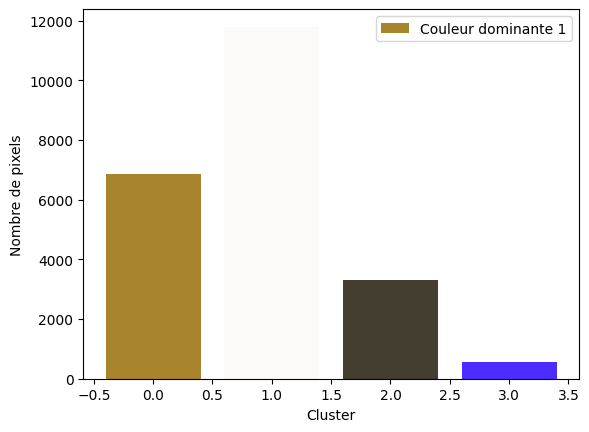

DataFrame pour l'image im-153_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-149_im.png    44,28,14   204,88,19
im-150_im.png   164,89,32    93,96,60
im-151_im.png    44,44,29  187,152,68
im-152_im.png   174,86,21    47,39,17
im-153_im.png  168,132,44    67,62,48

[153 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [54.55669282 30.05497564 56.10791873]
   Code couleur RGB: [0.77019619 0.42185355 0.10234741]
   Nombre de pixels: 2488

Cluster 2:
   Code couleur Lab: [99.19753359 -0.60884335  0.88488052]
   Code couleur RGB: [0.98910252 0.99209214 0.9841296 ]
   Nombre de pixels: 15933

Cluster 3:
   Code couleur Lab: [ 38.6113896   76.30213363 -97.35730872]
   Code couleur RGB: [0.36419437 0.11379522 1.        ]
   Nombre de pixels: 997

Cluster 4:
   Code couleur Lab: [11.75348719  4.44868765  9.77797804]
   Code couleur RGB: [0.16152888 0.11160862 0.0681029 ]
   Nombre de pixels: 3082



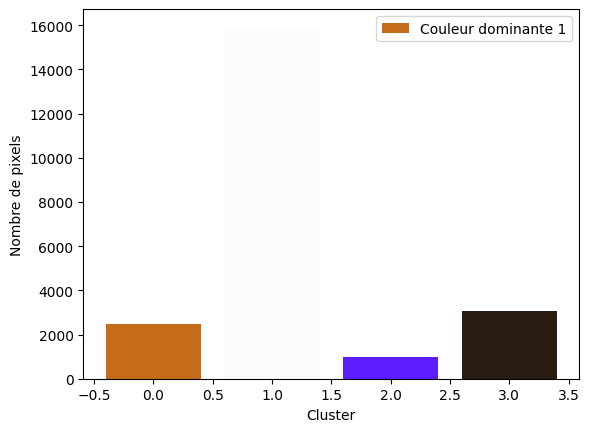

DataFrame pour l'image im-154_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-150_im.png   164,89,32    93,96,60
im-151_im.png    44,44,29  187,152,68
im-152_im.png   174,86,21    47,39,17
im-153_im.png  168,132,44    67,62,48
im-154_im.png    41,28,17  196,108,26

[154 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.95703055e+01 -4.78189509e-02  9.09229955e-02]
   Code couleur RGB: [0.99505746 0.99520169 0.99445658]
   Nombre de pixels: 11363

Cluster 2:
   Code couleur Lab: [42.43459648 34.95904242 33.49637225]
   Code couleur RGB: [0.63769324 0.28836509 0.18165966]
   Nombre de pixels: 6059

Cluster 3:
   Code couleur Lab: [ 37.96827578  79.10163459 -98.28746017]
   Code couleur RGB: [0.37539456 0.06380428 1.        ]
   Nombre de pixels: 1676

Cluster 4:
   Code couleur Lab: [10.64680915 10.0232284   9.74566621]
   Code couleur RGB: [0.17687846 0.09068215 0.05821521]
   Nombre de pixels: 3402



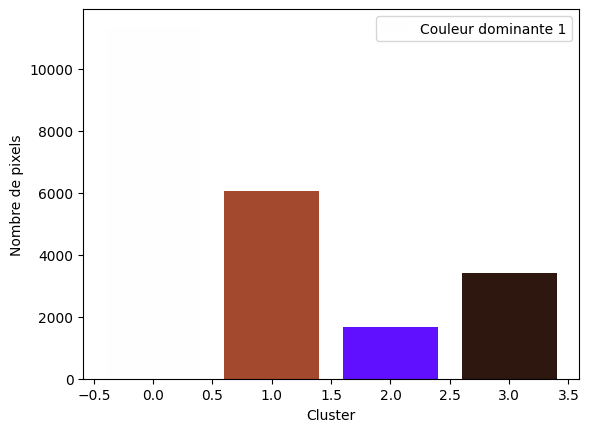

DataFrame pour l'image im-155_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-151_im.png    44,44,29  187,152,68
im-152_im.png   174,86,21    47,39,17
im-153_im.png  168,132,44    67,62,48
im-154_im.png    41,28,17  196,108,26
im-155_im.png   163,74,46    45,23,15

[155 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91894507e+01 -1.56779416e-01  6.03038155e-04]
   Code couleur RGB: [0.98952669 0.99116865 0.99080226]
   Nombre de pixels: 16644

Cluster 2:
   Code couleur Lab: [19.30538784 -4.59371845  2.60220857]
   Code couleur RGB: [0.16187955 0.19082702 0.16831853]
   Nombre de pixels: 4975

Cluster 3:
   Code couleur Lab: [40.46298834 34.74357776 40.888573  ]
   Code couleur RGB: [0.6185101  0.26900098 0.10897973]
   Nombre de pixels: 796

Cluster 4:
   Code couleur Lab: [ 44.66820717  77.63465448 -87.11177958]
   Code couleur RGB: [0.54981395 0.15494092 1.        ]
   Nombre de pixels: 85



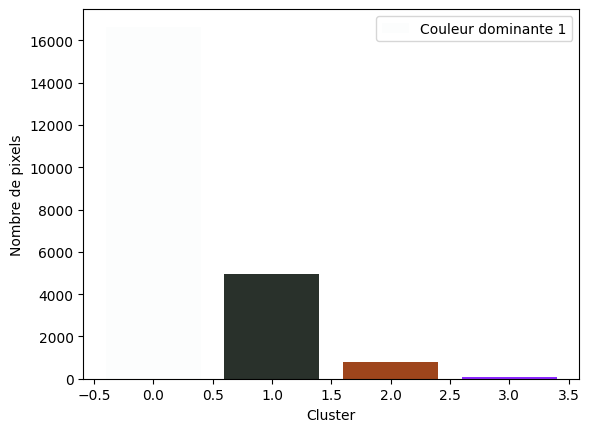

DataFrame pour l'image im-156_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-152_im.png   174,86,21    47,39,17
im-153_im.png  168,132,44    67,62,48
im-154_im.png    41,28,17  196,108,26
im-155_im.png   163,74,46    45,23,15
im-156_im.png    41,49,43   158,69,28

[156 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97777308e+01 -9.51242609e-03  1.50203172e-01]
   Code couleur RGB: [0.99793658 0.99744751 0.99636839]
   Nombre de pixels: 13422

Cluster 2:
   Code couleur Lab: [37.20681193 15.87161805 36.81368025]
   Code couleur RGB: [0.48868659 0.30013467 0.10233602]
   Nombre de pixels: 5499

Cluster 3:
   Code couleur Lab: [ 40.48922969  71.55149026 -94.12491877]
   Code couleur RGB: [0.37536304 0.17535217 1.        ]
   Nombre de pixels: 1216

Cluster 4:
   Code couleur Lab: [6.61387694 1.53409023 4.90525027]
   Code couleur RGB: [0.10142417 0.07699789 0.04753071]
   Nombre de pixels: 2363



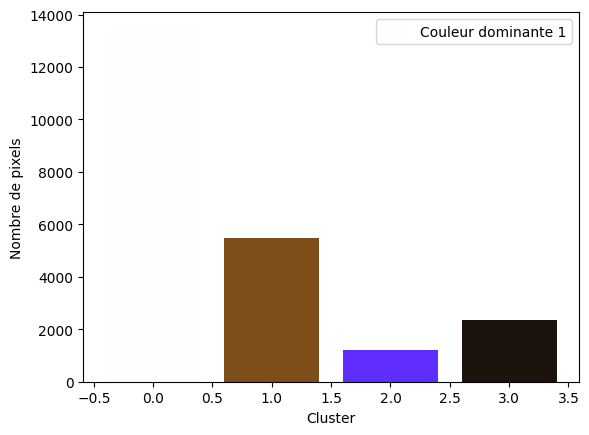

DataFrame pour l'image im-157_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-153_im.png  168,132,44    67,62,48
im-154_im.png    41,28,17  196,108,26
im-155_im.png   163,74,46    45,23,15
im-156_im.png    41,49,43   158,69,28
im-157_im.png   125,77,26    26,20,12

[157 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [97.88359595  0.83475839  0.72131731]
   Code couleur RGB: [0.98526148 0.97375098 0.9706963 ]
   Nombre de pixels: 12723

Cluster 2:
   Code couleur Lab: [38.84908702 34.68245841 45.84384364]
   Code couleur RGB: [0.60175186 0.25310574 0.04505628]
   Nombre de pixels: 5541

Cluster 3:
   Code couleur Lab: [20.41397011 -3.01615221 14.7251673 ]
   Code couleur RGB: [0.20538221 0.1956739  0.10736322]
   Nombre de pixels: 3153

Cluster 4:
   Code couleur Lab: [ 44.98018851  73.64879818 -86.60919194]
   Code couleur RGB: [0.52419754 0.19512988 1.        ]
   Nombre de pixels: 1083



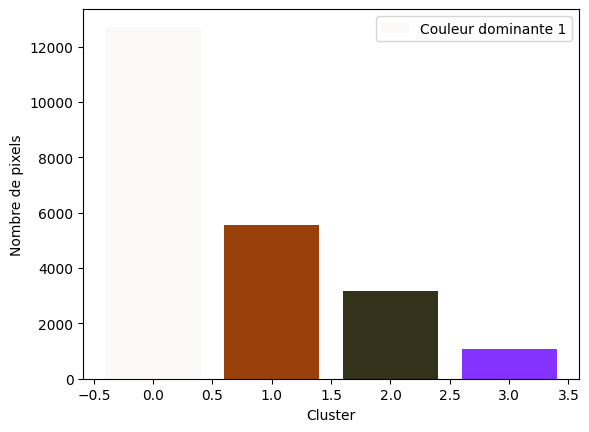

DataFrame pour l'image im-158_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-154_im.png    41,28,17  196,108,26
im-155_im.png   163,74,46    45,23,15
im-156_im.png    41,49,43   158,69,28
im-157_im.png   125,77,26    26,20,12
im-158_im.png   153,65,11    52,50,27

[158 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [16.18254053 10.43024334 15.13668663]
   Code couleur RGB: [0.23338639 0.13324925 0.07426027]
   Nombre de pixels: 3712

Cluster 2:
   Code couleur Lab: [54.55517305 42.83563978 57.38249605]
   Code couleur RGB: [0.83518305 0.37469978 0.09954384]
   Nombre de pixels: 4261

Cluster 3:
   Code couleur Lab: [ 9.98015562e+01 -6.67708630e-02  8.53462214e-02]
   Code couleur RGB: [0.99751082 0.9978766  0.99712319]
   Nombre de pixels: 13808

Cluster 4:
   Code couleur Lab: [ 39.74953681  78.37587742 -95.383597  ]
   Code couleur RGB: [0.42390607 0.09628874 1.        ]
   Nombre de pixels: 719



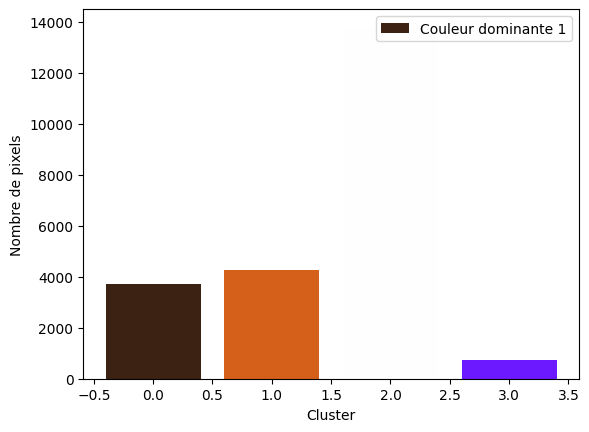

DataFrame pour l'image im-159_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-155_im.png   163,74,46   45,23,15
im-156_im.png    41,49,43  158,69,28
im-157_im.png   125,77,26   26,20,12
im-158_im.png   153,65,11   52,50,27
im-159_im.png   213,96,25   60,34,19

[159 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.90569236e+01 -6.92911636e-04 -4.23787720e-01]
   Code couleur RGB: [0.98776863 0.98941311 0.99253492]
   Nombre de pixels: 12689

Cluster 2:
   Code couleur Lab: [20.63504734  1.93728898 -4.65231386]
   Code couleur RGB: [0.19328868 0.19230476 0.22144118]
   Nombre de pixels: 5673

Cluster 3:
   Code couleur Lab: [51.699574   18.07569564 39.46484123]
   Code couleur RGB: [0.66245492 0.43174592 0.21623866]
   Nombre de pixels: 3997

Cluster 4:
   Code couleur Lab: [  36.19432012   75.38364849 -101.33195922]
   Code couleur RGB: [0.25391077 0.10488775 1.        ]
   Nombre de pixels: 141



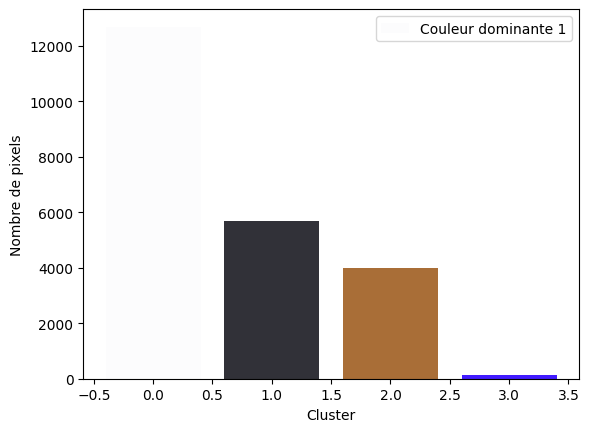

DataFrame pour l'image im-160_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-156_im.png    41,49,43   158,69,28
im-157_im.png   125,77,26    26,20,12
im-158_im.png   153,65,11    52,50,27
im-159_im.png   213,96,25    60,34,19
im-160_im.png    49,49,56  169,110,55

[160 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.98436601 41.85013035 44.17105156]
   Code couleur RGB: [0.76735414 0.33402141 0.17427538]
   Nombre de pixels: 4860

Cluster 2:
   Code couleur Lab: [98.5422969   0.80175062 -0.36101548]
   Code couleur RGB: [0.98865171 0.98160984 0.98633215]
   Nombre de pixels: 13009

Cluster 3:
   Code couleur Lab: [49.80397348 19.7330715  18.87590764]
   Code couleur RGB: [0.62616218 0.41205553 0.34291358]
   Nombre de pixels: 2658

Cluster 4:
   Code couleur Lab: [17.19179711  0.72973756 -3.45786504]
   Code couleur RGB: [0.16044282 0.16528026 0.18505655]
   Nombre de pixels: 1973



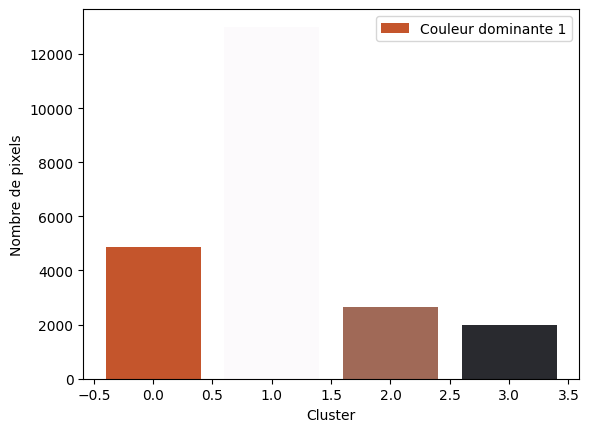

DataFrame pour l'image im-161_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-157_im.png   125,77,26    26,20,12
im-158_im.png   153,65,11    52,50,27
im-159_im.png   213,96,25    60,34,19
im-160_im.png    49,49,56  169,110,55
im-161_im.png   196,85,44  160,105,87

[161 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.47975982 -0.27801241  0.45730678]
   Code couleur RGB: [0.99346855 0.99462262 0.99061814]
   Nombre de pixels: 12182

Cluster 2:
   Code couleur Lab: [17.27997953 -1.305491   17.02982934]
   Code couleur RGB: [0.18980457 0.16608988 0.0686879 ]
   Nombre de pixels: 5323

Cluster 3:
   Code couleur Lab: [46.23352545 36.88528354 52.39864711]
   Code couleur RGB: [0.70240516 0.3156788  0.05421117]
   Nombre de pixels: 3921

Cluster 4:
   Code couleur Lab: [ 39.07245948  75.98092181 -96.53250628]
   Code couleur RGB: [0.37697253 0.12146035 1.        ]
   Nombre de pixels: 1074



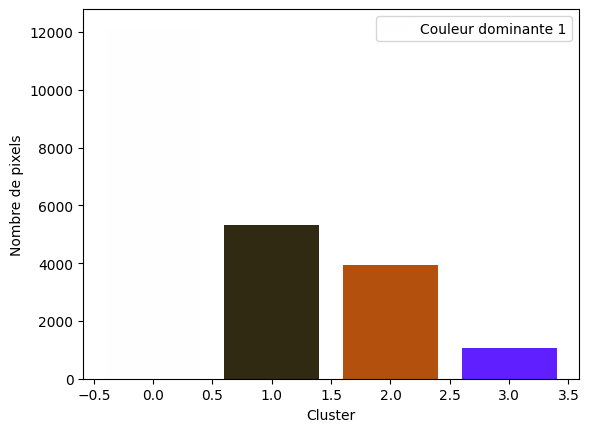

DataFrame pour l'image im-162_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-158_im.png   153,65,11    52,50,27
im-159_im.png   213,96,25    60,34,19
im-160_im.png    49,49,56  169,110,55
im-161_im.png   196,85,44  160,105,87
im-162_im.png    48,42,18   179,80,14

[162 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97267086e+01 -3.87662074e-02  2.60310567e-01]
   Code couleur RGB: [0.99751226 0.99690604 0.99494937]
   Nombre de pixels: 14119

Cluster 2:
   Code couleur Lab: [11.34798519  9.04911024 11.72565864]
   Code couleur RGB: [0.18107396 0.09815992 0.05056236]
   Nombre de pixels: 3416

Cluster 3:
   Code couleur Lab: [ 43.69535487  71.17844393 -88.9097419 ]
   Code couleur RGB: [0.46712029 0.20401671 1.        ]
   Nombre de pixels: 1286

Cluster 4:
   Code couleur Lab: [46.9165703  23.62736244 48.3397046 ]
   Code couleur RGB: [0.64324839 0.36826584 0.09712833]
   Nombre de pixels: 3679



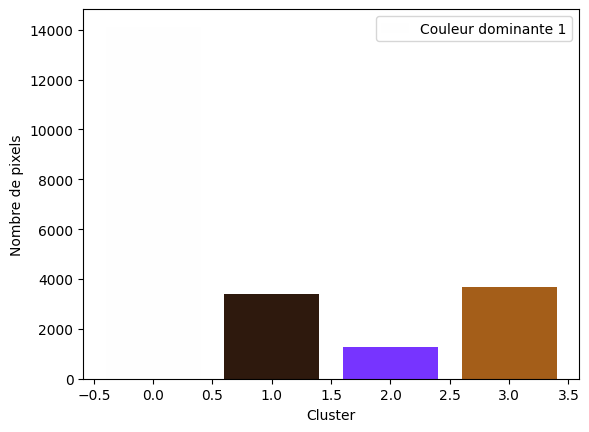

DataFrame pour l'image im-163_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-159_im.png   213,96,25    60,34,19
im-160_im.png    49,49,56  169,110,55
im-161_im.png   196,85,44  160,105,87
im-162_im.png    48,42,18   179,80,14
im-163_im.png   164,94,25    46,25,13

[163 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [27.76725289 -0.03126132 19.0404282 ]
   Code couleur RGB: [0.29461379 0.2535818  0.14156139]
   Nombre de pixels: 3289

Cluster 2:
   Code couleur Lab: [45.23214711 41.8413177  50.27505125]
   Code couleur RGB: [0.71309442 0.28533    0.07372921]
   Nombre de pixels: 3701

Cluster 3:
   Code couleur Lab: [ 42.57366083  76.47718719 -90.62658653]
   Code couleur RGB: [0.486523   0.14725878 1.        ]
   Nombre de pixels: 1081

Cluster 4:
   Code couleur Lab: [ 9.81133816e+01 -3.87519807e-02  1.01827420e+00]
   Code couleur RGB: [0.98188905 0.97838395 0.97092721]
   Nombre de pixels: 14429



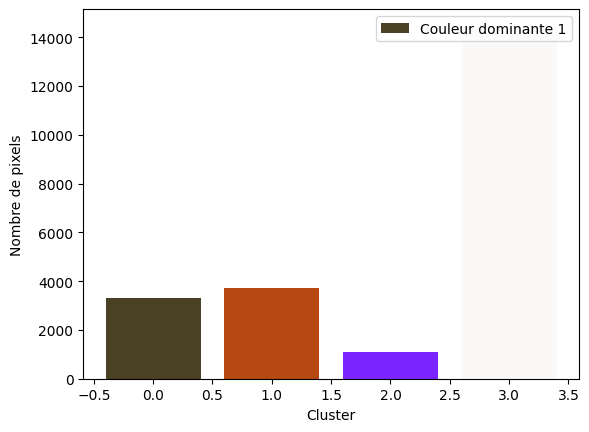

DataFrame pour l'image im-164_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-160_im.png    49,49,56  169,110,55
im-161_im.png   196,85,44  160,105,87
im-162_im.png    48,42,18   179,80,14
im-163_im.png   164,94,25    46,25,13
im-164_im.png   182,73,19    75,65,36

[164 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.50474256 -0.1126818   0.67141392]
   Code couleur RGB: [0.99585278 0.99444211 0.98930122]
   Nombre de pixels: 16051

Cluster 2:
   Code couleur Lab: [47.34306968 56.18221071 54.61818545]
   Code couleur RGB: [0.80820648 0.23050056 0.06376369]
   Nombre de pixels: 3783

Cluster 3:
   Code couleur Lab: [20.74704717  8.62450594 10.58309848]
   Code couleur RGB: [0.26233498 0.17607436 0.13643431]
   Nombre de pixels: 1975

Cluster 4:
   Code couleur Lab: [ 49.90463949  83.11468367 -78.31793217]
   Code couleur RGB: [0.70703714 0.14810776 1.        ]
   Nombre de pixels: 691



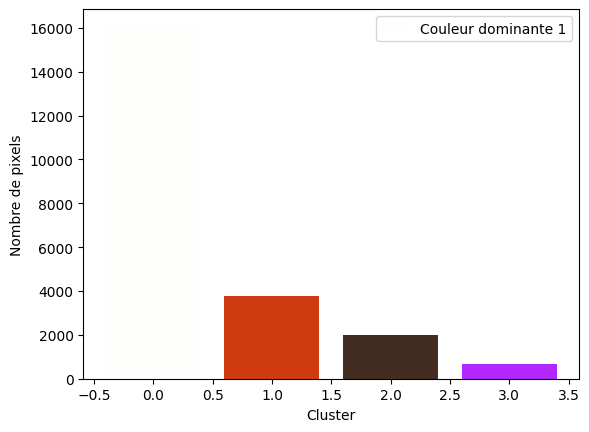

DataFrame pour l'image im-165_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-161_im.png   196,85,44  160,105,87
im-162_im.png    48,42,18   179,80,14
im-163_im.png   164,94,25    46,25,13
im-164_im.png   182,73,19    75,65,36
im-165_im.png   206,59,16    67,45,35

[165 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [16.63951486 -0.25519552  2.2878038 ]
   Code couleur RGB: [0.16536399 0.1611746  0.14852609]
   Nombre de pixels: 6785

Cluster 2:
   Code couleur Lab: [ 9.91290624e+01 -3.60078232e-01  7.80329661e-02]
   Code couleur RGB: [0.98746782 0.99095242 0.98950202]
   Nombre de pixels: 13189

Cluster 3:
   Code couleur Lab: [49.13248491  7.2308999  49.48682812]
   Code couleur RGB: [0.58340367 0.43338649 0.09753712]
   Nombre de pixels: 2094

Cluster 4:
   Code couleur Lab: [  34.25835119   78.04254574 -104.56469519]
   Code couleur RGB: [0.19326792 0.04547769 1.        ]
   Nombre de pixels: 432



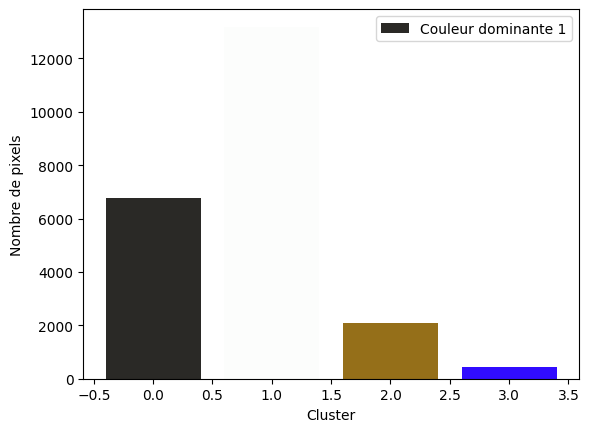

DataFrame pour l'image im-166_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-162_im.png    48,42,18   179,80,14
im-163_im.png   164,94,25    46,25,13
im-164_im.png   182,73,19    75,65,36
im-165_im.png   206,59,16    67,45,35
im-166_im.png    42,41,38  149,111,25

[166 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98916006e+01 -3.31281140e-02  1.03207385e-01]
   Code couleur RGB: [0.99887117 0.99881293 0.99801558]
   Nombre de pixels: 17523

Cluster 2:
   Code couleur Lab: [47.53396405 39.84807861 52.78508949]
   Code couleur RGB: [0.73251182 0.31663186 0.06882734]
   Nombre de pixels: 3022

Cluster 3:
   Code couleur Lab: [ 46.78864048  76.68060056 -83.59395363]
   Code couleur RGB: [0.59214785 0.18512881 1.        ]
   Nombre de pixels: 677

Cluster 4:
   Code couleur Lab: [12.5957369   1.20874608  8.25492612]
   Code couleur RGB: [0.15080221 0.12465381 0.0839517 ]
   Nombre de pixels: 1278



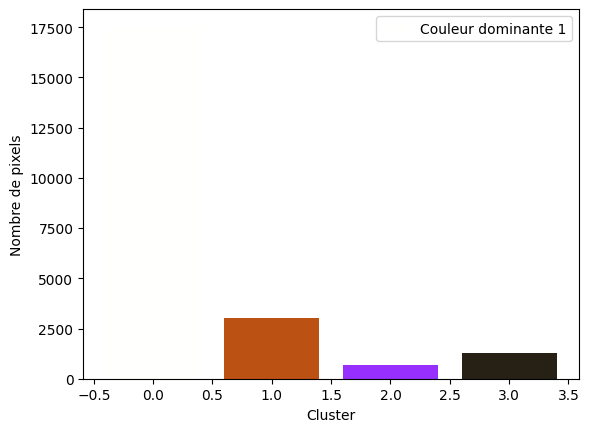

DataFrame pour l'image im-167_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-163_im.png   164,94,25    46,25,13
im-164_im.png   182,73,19    75,65,36
im-165_im.png   206,59,16    67,45,35
im-166_im.png    42,41,38  149,111,25
im-167_im.png   187,81,18    38,32,21

[167 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [32.16564073 29.53179489 36.49418086]
   Code couleur RGB: [0.49747645 0.21083537 0.06617775]
   Nombre de pixels: 6156

Cluster 2:
   Code couleur Lab: [98.25790601 -0.31458442  0.68955185]
   Code couleur RGB: [0.9801414  0.98078433 0.97500879]
   Nombre de pixels: 12534

Cluster 3:
   Code couleur Lab: [ 40.54837932  75.71220357 -93.99069741]
   Code couleur RGB: [0.4219646  0.13709056 1.        ]
   Nombre de pixels: 671

Cluster 4:
   Code couleur Lab: [20.51331977 -0.97049977  4.85076927]
   Code couleur RGB: [0.19979582 0.19448927 0.16600478]
   Nombre de pixels: 3139



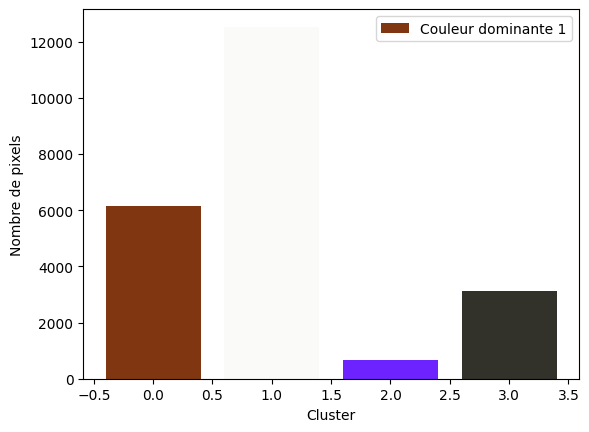

DataFrame pour l'image im-168_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-164_im.png   182,73,19    75,65,36
im-165_im.png   206,59,16    67,45,35
im-166_im.png    42,41,38  149,111,25
im-167_im.png   187,81,18    38,32,21
im-168_im.png   127,54,17    51,50,42

[168 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [19.72643082  3.86304042 14.4297241 ]
   Code couleur RGB: [0.23451373 0.17708583 0.10492602]
   Nombre de pixels: 2080

Cluster 2:
   Code couleur Lab: [ 9.98381998e+01 -1.67456705e-02  2.36843509e-01]
   Code couleur RGB: [0.99887427 0.99812644 0.99639698]
   Nombre de pixels: 12945

Cluster 3:
   Code couleur Lab: [53.27193088 26.1786394  45.9067732 ]
   Code couleur RGB: [0.7285176  0.42266544 0.18367584]
   Nombre de pixels: 7370

Cluster 4:
   Code couleur Lab: [ 42.14594534  73.35057015 -91.43809424]
   Code couleur RGB: [0.44469071 0.17368379 1.        ]
   Nombre de pixels: 105



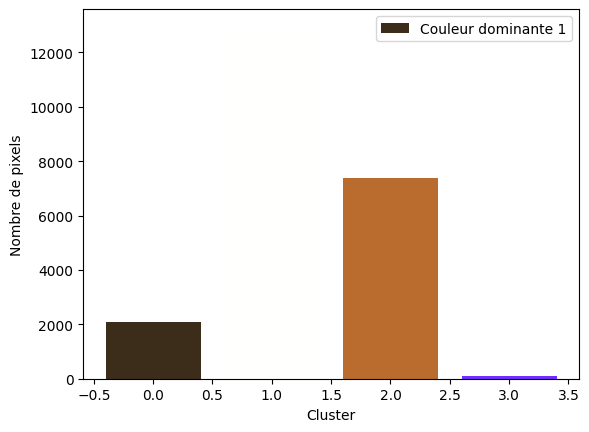

DataFrame pour l'image im-169_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-165_im.png   206,59,16    67,45,35
im-166_im.png    42,41,38  149,111,25
im-167_im.png   187,81,18    38,32,21
im-168_im.png   127,54,17    51,50,42
im-169_im.png  186,108,47    60,45,27

[169 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.93943640e+01 1.09837239e-02 7.30039350e-01]
   Code couleur RGB: [0.99580685 0.99287134 0.98762195]
   Nombre de pixels: 15218

Cluster 2:
   Code couleur Lab: [69.06120082 22.94892177 68.10607951]
   Code couleur RGB: [0.91531125 0.58967148 0.12482323]
   Nombre de pixels: 4268

Cluster 3:
   Code couleur Lab: [17.18074503  3.97396652 12.1808687 ]
   Code couleur RGB: [0.20934275 0.15600401 0.09793759]
   Nombre de pixels: 2512

Cluster 4:
   Code couleur Lab: [ 49.77225351  68.28095697 -79.0962543 ]
   Code couleur RGB: [0.59127704 0.27501492 1.        ]
   Nombre de pixels: 502



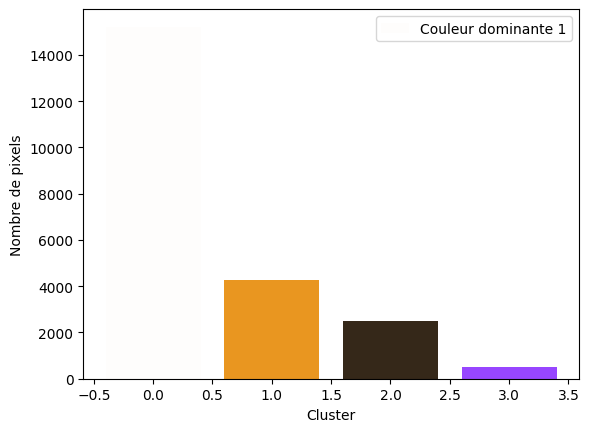

DataFrame pour l'image im-170_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-166_im.png    42,41,38  149,111,25
im-167_im.png   187,81,18    38,32,21
im-168_im.png   127,54,17    51,50,42
im-169_im.png  186,108,47    60,45,27
im-170_im.png  233,150,32    53,40,25

[170 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.40077832 -1.28705146  1.00978542]
   Code couleur RGB: [0.98634059 0.99599812 0.98539161]
   Nombre de pixels: 13462

Cluster 2:
   Code couleur Lab: [33.32332809 32.33185125 36.25578155]
   Code couleur RGB: [0.52306161 0.21082563 0.08035159]
   Nombre de pixels: 6642

Cluster 3:
   Code couleur Lab: [ 38.1105103   78.61020742 -98.06107502]
   Code couleur RGB: [0.37463257 0.07475696 1.        ]
   Nombre de pixels: 809

Cluster 4:
   Code couleur Lab: [11.62559634  8.54832187  7.96638224]
   Code couleur RGB: [0.17649416 0.10221354 0.07887571]
   Nombre de pixels: 1587



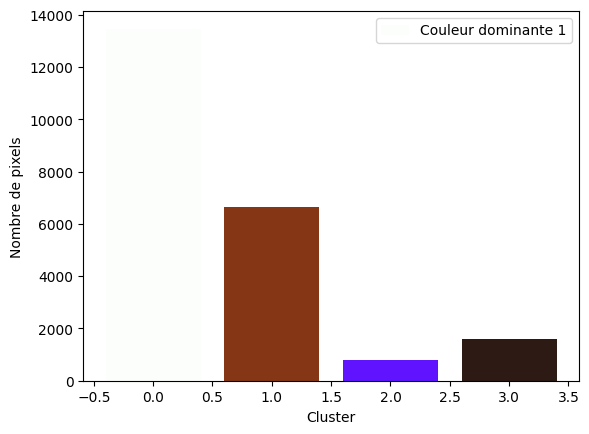

DataFrame pour l'image im-171_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-167_im.png   187,81,18   38,32,21
im-168_im.png   127,54,17   51,50,42
im-169_im.png  186,108,47   60,45,27
im-170_im.png  233,150,32   53,40,25
im-171_im.png   133,54,20   45,26,20

[171 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.23173139  0.2952218   0.64155336]
   Code couleur RGB: [0.99594254 0.99036102 0.98648813]
   Nombre de pixels: 15472

Cluster 2:
   Code couleur Lab: [49.14824174 18.99521629 44.91508734]
   Code couleur RGB: [0.64287568 0.40366837 0.14881749]
   Nombre de pixels: 4672

Cluster 3:
   Code couleur Lab: [ 42.00570814  70.24726149 -91.59789   ]
   Code couleur RGB: [0.40993963 0.19720134 1.        ]
   Nombre de pixels: 522

Cluster 4:
   Code couleur Lab: [18.95055784  4.55352886  7.20236156]
   Code couleur RGB: [0.2207358  0.17034059 0.14049102]
   Nombre de pixels: 1834



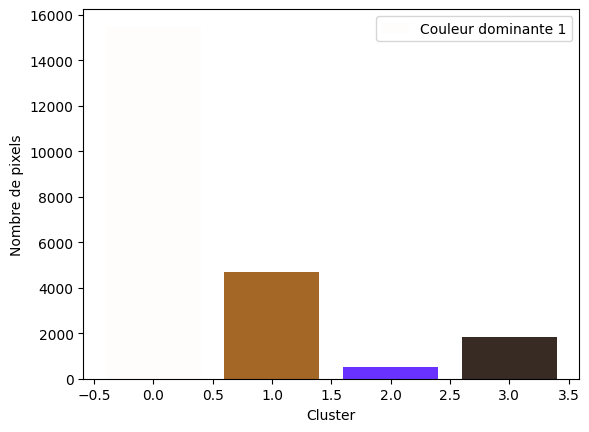

DataFrame pour l'image im-172_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-168_im.png   127,54,17   51,50,42
im-169_im.png  186,108,47   60,45,27
im-170_im.png  233,150,32   53,40,25
im-171_im.png   133,54,20   45,26,20
im-172_im.png  164,103,38   56,43,36

[172 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [75.85993769 12.73640299 69.417813  ]
   Code couleur RGB: [0.94090167 0.68902738 0.18587017]
   Nombre de pixels: 5313

Cluster 2:
   Code couleur Lab: [99.62083377 -0.24369842  1.07748001]
   Code couleur RGB: [0.99754769 0.99595849 0.98752003]
   Nombre de pixels: 14175

Cluster 3:
   Code couleur Lab: [45.32880195 -0.94055261 36.88570253]
   Code couleur RGB: [0.48566441 0.41603828 0.17014561]
   Nombre de pixels: 2793

Cluster 4:
   Code couleur Lab: [ 40.46768774  69.93090896 -94.16241133]
   Code couleur RGB: [0.35576638 0.18779976 1.        ]
   Nombre de pixels: 219



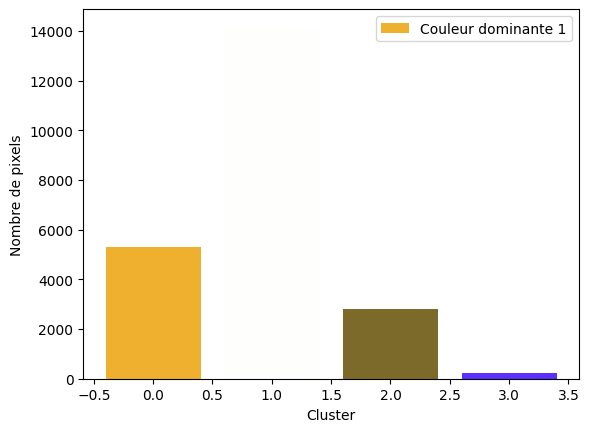

DataFrame pour l'image im-173_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-169_im.png  186,108,47    60,45,27
im-170_im.png  233,150,32    53,40,25
im-171_im.png   133,54,20    45,26,20
im-172_im.png  164,103,38    56,43,36
im-173_im.png  240,176,47  124,106,43

[173 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.16034499 -0.36201308  1.25674249]
   Code couleur RGB: [0.99199302 0.99096378 0.98092474]
   Nombre de pixels: 13874

Cluster 2:
   Code couleur Lab: [46.40507043 24.49854127 48.13334821]
   Code couleur RGB: [0.64159719 0.36070183 0.09443756]
   Nombre de pixels: 5942

Cluster 3:
   Code couleur Lab: [ 38.06868747  71.34080262 -98.18929136]
   Code couleur RGB: [0.27937486 0.15915364 1.        ]
   Nombre de pixels: 366

Cluster 4:
   Code couleur Lab: [19.88198238  0.5329854  18.82206914]
   Code couleur RGB: [0.22433129 0.18431425 0.07861563]
   Nombre de pixels: 2318



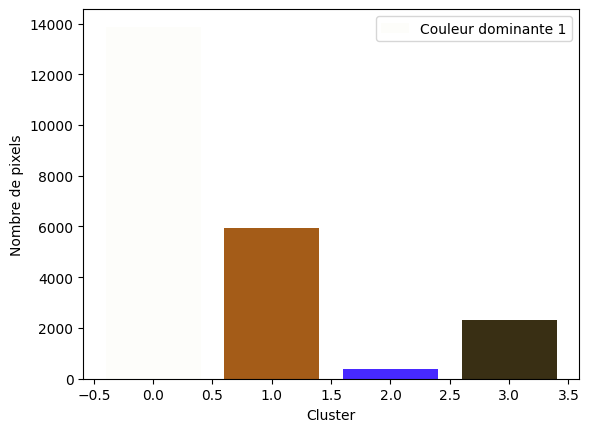

DataFrame pour l'image im-174_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-170_im.png  233,150,32    53,40,25
im-171_im.png   133,54,20    45,26,20
im-172_im.png  164,103,38    56,43,36
im-173_im.png  240,176,47  124,106,43
im-174_im.png   164,92,24    57,47,20

[174 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.83011271 -0.29930609  0.11334934]
   Code couleur RGB: [0.99604582 0.99875686 0.99720275]
   Nombre de pixels: 17240

Cluster 2:
   Code couleur Lab: [20.31684159 12.50661615 22.77247168]
   Code couleur RGB: [0.2883112  0.16138491 0.05947339]
   Nombre de pixels: 2194

Cluster 3:
   Code couleur Lab: [  36.36394424   76.11722148 -101.01039804]
   Code couleur RGB: [0.27422348 0.09668332 1.        ]
   Nombre de pixels: 593

Cluster 4:
   Code couleur Lab: [41.94586551 26.52346286 37.80364127]
   Code couleur RGB: [0.59420025 0.31283865 0.14263261]
   Nombre de pixels: 2473



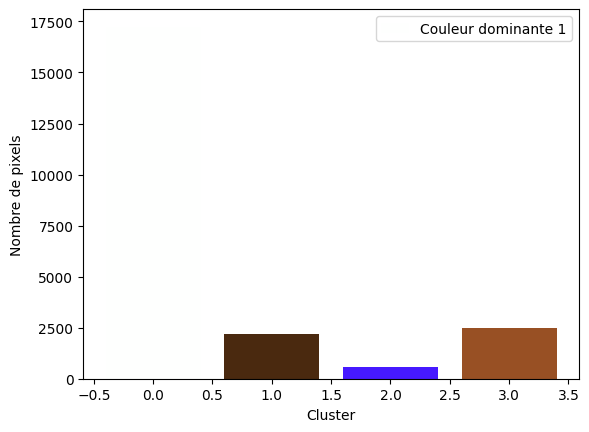

DataFrame pour l'image im-175_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-171_im.png   133,54,20    45,26,20
im-172_im.png  164,103,38    56,43,36
im-173_im.png  240,176,47  124,106,43
im-174_im.png   164,92,24    57,47,20
im-175_im.png   152,80,36    74,41,15

[175 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.69107788 41.38778667 47.84354092]
   Code couleur RGB: [0.76367873 0.33248041 0.14140779]
   Nombre de pixels: 5648

Cluster 2:
   Code couleur Lab: [98.78837313  0.36157896  0.62279386]
   Code couleur RGB: [0.99137712 0.98517669 0.98161438]
   Nombre de pixels: 13615

Cluster 3:
   Code couleur Lab: [27.81985308  7.51714707 11.34248151]
   Code couleur RGB: [0.32425651 0.23955753 0.19076681]
   Nombre de pixels: 2935

Cluster 4:
   Code couleur Lab: [ 53.1687108   77.43206012 -72.91878291]
   Code couleur RGB: [0.73395422 0.24122402 1.        ]
   Nombre de pixels: 302



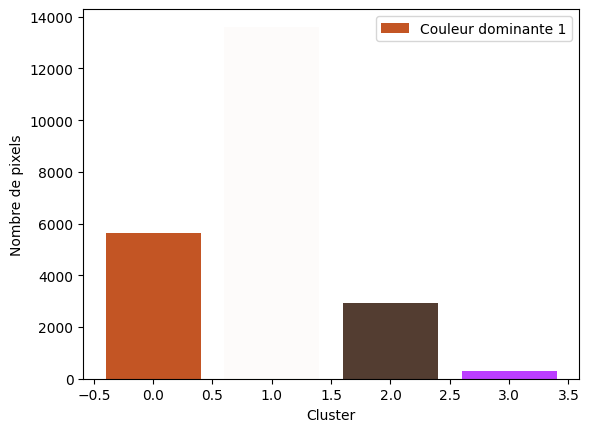

DataFrame pour l'image im-176_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-172_im.png  164,103,38    56,43,36
im-173_im.png  240,176,47  124,106,43
im-174_im.png   164,92,24    57,47,20
im-175_im.png   152,80,36    74,41,15
im-176_im.png   195,85,36    83,61,49

[176 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95339741e+01 1.04110816e-01 6.23747742e-02]
   Code couleur RGB: [0.99577516 0.99442868 0.99428165]
   Nombre de pixels: 15683

Cluster 2:
   Code couleur Lab: [13.98895559  3.58607741 11.13627246]
   Code couleur RGB: [0.17809812 0.13093598 0.07896918]
   Nombre de pixels: 3736

Cluster 3:
   Code couleur Lab: [ 38.38498772  74.70866825 -97.73106502]
   Code couleur RGB: [0.33706696 0.13006243 1.        ]
   Nombre de pixels: 813

Cluster 4:
   Code couleur Lab: [64.92303201 14.9404097  64.89840099]
   Code couleur RGB: [0.81858013 0.56991273 0.1054697 ]
   Nombre de pixels: 2268



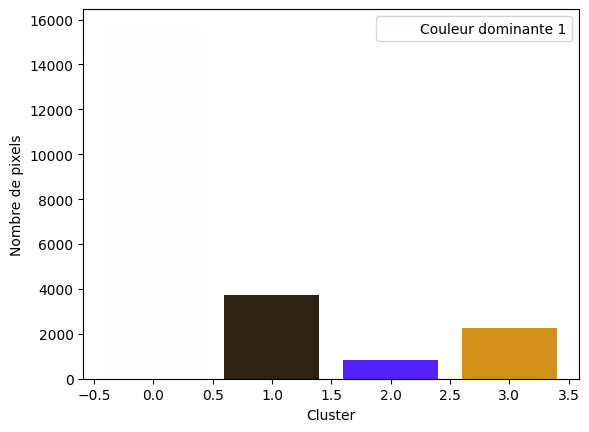

DataFrame pour l'image im-177_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-173_im.png  240,176,47  124,106,43
im-174_im.png   164,92,24    57,47,20
im-175_im.png   152,80,36    74,41,15
im-176_im.png   195,85,36    83,61,49
im-177_im.png    45,33,20  209,145,27

[177 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.19693401  0.77074314  0.43673793]
   Code couleur RGB: [0.99865792 0.9888688  0.98771215]
   Nombre de pixels: 14420

Cluster 2:
   Code couleur Lab: [45.25787068 20.27160146 36.81200275]
   Code couleur RGB: [0.59936491 0.36354718 0.17759988]
   Nombre de pixels: 2116

Cluster 3:
   Code couleur Lab: [37.80812453 -8.38535326 25.06775077]
   Code couleur RGB: [0.35049748 0.3602025  0.18639546]
   Nombre de pixels: 1520

Cluster 4:
   Code couleur Lab: [66.34812117 31.87289205 48.29269155]
   Code couleur RGB: [0.91649346 0.53632778 0.29301364]
   Nombre de pixels: 4444



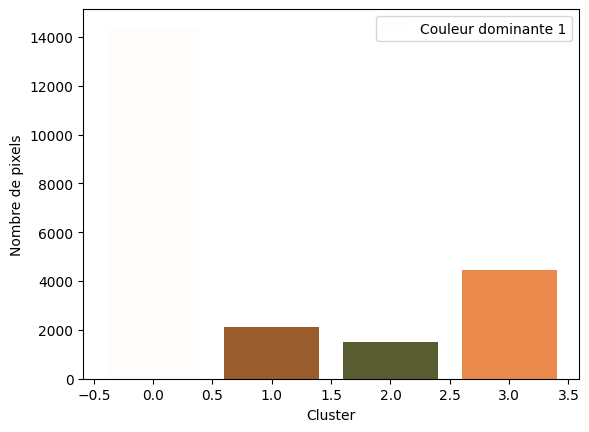

DataFrame pour l'image im-178_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-174_im.png   164,92,24    57,47,20
im-175_im.png   152,80,36    74,41,15
im-176_im.png   195,85,36    83,61,49
im-177_im.png    45,33,20  209,145,27
im-178_im.png  234,137,75   153,93,45

[178 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.38930084 -0.3113275   0.83006422]
   Code couleur RGB: [0.99349553 0.9935658  0.98676097]
   Nombre de pixels: 13470

Cluster 2:
   Code couleur Lab: [56.41447026 44.47971163 62.96217225]
   Code couleur RGB: [0.86896765 0.38633677 0.04692582]
   Nombre de pixels: 4431

Cluster 3:
   Code couleur Lab: [ 57.66736066  73.73327096 -65.73672599]
   Code couleur RGB: [0.79552968 0.31242401 1.        ]
   Nombre de pixels: 1752

Cluster 4:
   Code couleur Lab: [22.40451654  4.47705915 13.41209097]
   Code couleur RGB: [0.26081641 0.19867238 0.13266496]
   Nombre de pixels: 2847



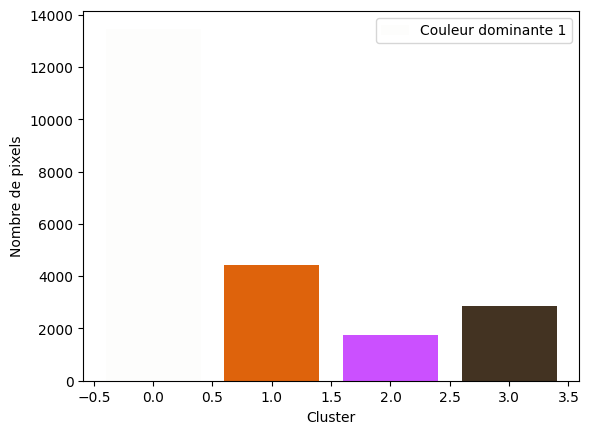

DataFrame pour l'image im-179_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-175_im.png   152,80,36    74,41,15
im-176_im.png   195,85,36    83,61,49
im-177_im.png    45,33,20  209,145,27
im-178_im.png  234,137,75   153,93,45
im-179_im.png   222,99,12    67,51,34

[179 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [28.74415913 13.81969665 26.83791414]
   Code couleur RGB: [0.38213348 0.23021902 0.10207223]
   Nombre de pixels: 1802

Cluster 2:
   Code couleur Lab: [99.63094083 -0.22761473  0.38902486]
   Code couleur RGB: [0.99535103 0.99623794 0.99285908]
   Nombre de pixels: 16144

Cluster 3:
   Code couleur Lab: [ 37.18505495  75.71894743 -99.63676657]
   Code couleur RGB: [0.3043681  0.10851364 1.        ]
   Nombre de pixels: 521

Cluster 4:
   Code couleur Lab: [62.76401285 30.58150097 54.22397592]
   Code couleur RGB: [0.87080548 0.50295323 0.20812153]
   Nombre de pixels: 4033



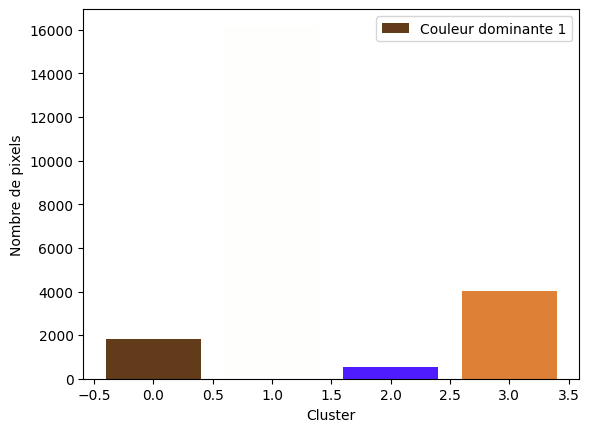

DataFrame pour l'image im-180_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-176_im.png   195,85,36    83,61,49
im-177_im.png    45,33,20  209,145,27
im-178_im.png  234,137,75   153,93,45
im-179_im.png   222,99,12    67,51,34
im-180_im.png  222,128,53    97,59,26

[180 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.40369014  0.22593063 -0.16948926]
   Code couleur RGB: [0.99445488 0.99272252 0.99457692]
   Nombre de pixels: 16197

Cluster 2:
   Code couleur Lab: [45.01032949 31.62751817 47.55829893]
   Code couleur RGB: [0.66019707 0.32379808 0.09097501]
   Nombre de pixels: 4147

Cluster 3:
   Code couleur Lab: [ 50.3071656   71.63572187 -77.72803745]
   Code couleur RGB: [0.63228692 0.25734248 1.        ]
   Nombre de pixels: 884

Cluster 4:
   Code couleur Lab: [24.90643459  1.53222114 12.91977511]
   Code couleur RGB: [0.2676655  0.2262682  0.15571971]
   Nombre de pixels: 1272



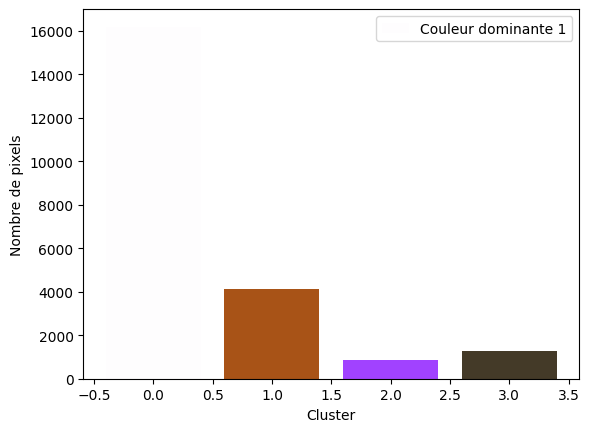

DataFrame pour l'image im-181_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-177_im.png    45,33,20  209,145,27
im-178_im.png  234,137,75   153,93,45
im-179_im.png   222,99,12    67,51,34
im-180_im.png  222,128,53    97,59,26
im-181_im.png   168,83,23    68,58,40

[181 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.91227244e+01 8.29146921e-02 4.56282661e-01]
   Code couleur RGB: [0.99233451 0.98969482 0.98662609]
   Nombre de pixels: 14847

Cluster 2:
   Code couleur Lab: [47.68678757 38.11679437 46.10783109]
   Code couleur RGB: [0.72267334 0.32590818 0.13506698]
   Nombre de pixels: 5245

Cluster 3:
   Code couleur Lab: [20.49604718  3.22709993  7.23298359]
   Code couleur RGB: [0.22756881 0.18599787 0.15278609]
   Nombre de pixels: 1963

Cluster 4:
   Code couleur Lab: [ 49.06225698  76.70106854 -79.75177228]
   Code couleur RGB: [0.64333716 0.20682217 1.        ]
   Nombre de pixels: 445



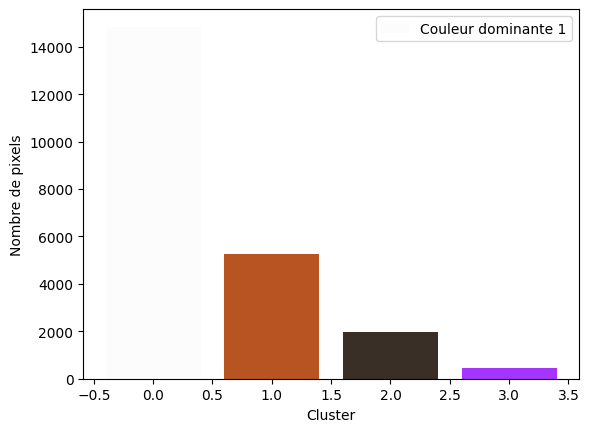

DataFrame pour l'image im-182_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-178_im.png  234,137,75  153,93,45
im-179_im.png   222,99,12   67,51,34
im-180_im.png  222,128,53   97,59,26
im-181_im.png   168,83,23   68,58,40
im-182_im.png   184,83,34   58,47,39

[182 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.28585387  0.34031718  0.21703371]
   Code couleur RGB: [0.98407289 0.97965493 0.97898993]
   Nombre de pixels: 13165

Cluster 2:
   Code couleur Lab: [10.29781206  1.75679043  5.17952112]
   Code couleur RGB: [0.12981227 0.10602086 0.08284485]
   Nombre de pixels: 1599

Cluster 3:
   Code couleur Lab: [53.56283626 13.70815143 48.09646894]
   Code couleur RGB: [0.66734759 0.46073133 0.16167455]
   Nombre de pixels: 7241

Cluster 4:
   Code couleur Lab: [ 38.71631638  77.62864662 -97.11288466]
   Code couleur RGB: [0.38341077 0.0968893  1.        ]
   Nombre de pixels: 495



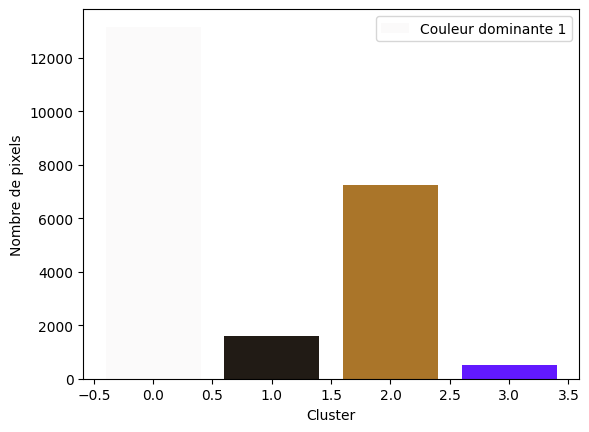

DataFrame pour l'image im-183_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-179_im.png   222,99,12   67,51,34
im-180_im.png  222,128,53   97,59,26
im-181_im.png   168,83,23   68,58,40
im-182_im.png   184,83,34   58,47,39
im-183_im.png  170,117,41   33,27,21

[183 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64357787 -0.1117668   0.12487822]
   Code couleur RGB: [0.99549201 0.99617906 0.99502232]
   Nombre de pixels: 16200

Cluster 2:
   Code couleur Lab: [34.466274   42.55214809 40.43436104]
   Code couleur RGB: [0.58386274 0.17332697 0.06275332]
   Nombre de pixels: 4148

Cluster 3:
   Code couleur Lab: [11.82291514  7.85102744  7.63442785]
   Code couleur RGB: [0.17465512 0.10539711 0.08229929]
   Nombre de pixels: 1220

Cluster 4:
   Code couleur Lab: [ 39.57305782  79.95388596 -95.58252811]
   Code couleur RGB: [0.43508196 0.06643371 1.        ]
   Nombre de pixels: 932



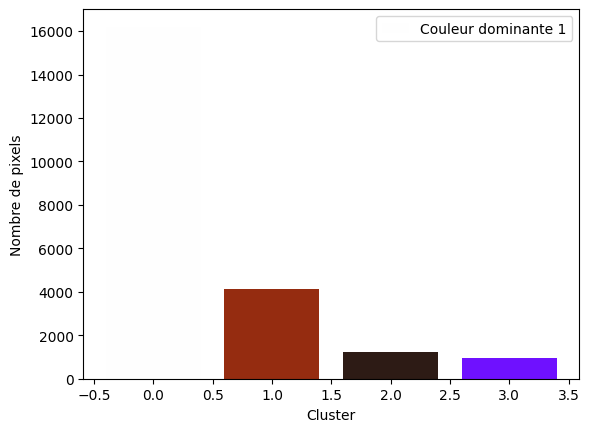

DataFrame pour l'image im-184_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-180_im.png  222,128,53   97,59,26
im-181_im.png   168,83,23   68,58,40
im-182_im.png   184,83,34   58,47,39
im-183_im.png  170,117,41   33,27,21
im-184_im.png   149,44,16   45,27,21

[184 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.01760954 -0.86606562  0.50187047]
   Code couleur RGB: [0.98360811 0.99078364 0.98495636]
   Nombre de pixels: 14244

Cluster 2:
   Code couleur Lab: [19.06164414  3.49791992 11.51785989]
   Code couleur RGB: [0.22290691 0.17266985 0.11657857]
   Nombre de pixels: 3398

Cluster 3:
   Code couleur Lab: [73.33615735 14.6811584  54.56945657]
   Code couleur RGB: [0.90888405 0.65890738 0.3043388 ]
   Nombre de pixels: 4315

Cluster 4:
   Code couleur Lab: [  34.77365142   79.42679077 -103.69137758]
   Code couleur RGB: [0.2489933 0.0166044 1.       ]
   Nombre de pixels: 543



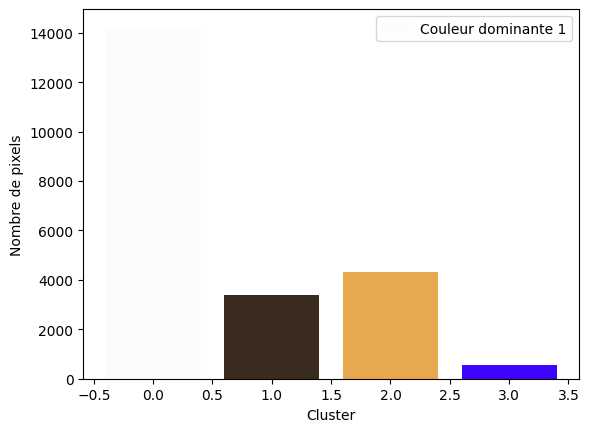

DataFrame pour l'image im-185_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-181_im.png   168,83,23   68,58,40
im-182_im.png   184,83,34   58,47,39
im-183_im.png  170,117,41   33,27,21
im-184_im.png   149,44,16   45,27,21
im-185_im.png  232,168,78   57,44,30

[185 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.68794452 -0.25610851  0.26269394]
   Code couleur RGB: [0.99531635 0.99699216 0.99446067]
   Nombre de pixels: 15860

Cluster 2:
   Code couleur Lab: [12.08896726  3.11467712 11.91847132]
   Code couleur RGB: [0.16112223 0.11651268 0.05613323]
   Nombre de pixels: 2783

Cluster 3:
   Code couleur Lab: [ 39.81296073  74.73698825 -95.36050663]
   Code couleur RGB: [0.38711681 0.14144048 1.        ]
   Nombre de pixels: 1169

Cluster 4:
   Code couleur Lab: [55.3609021  17.55116666 54.38850798]
   Code couleur RGB: [0.7132735  0.46758652 0.12098443]
   Nombre de pixels: 2688



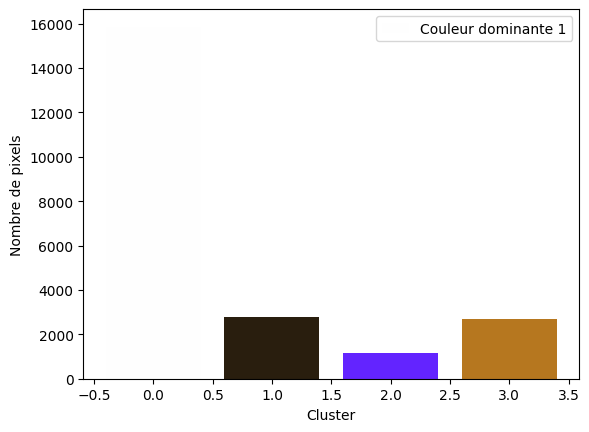

DataFrame pour l'image im-186_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-182_im.png   184,83,34    58,47,39
im-183_im.png  170,117,41    33,27,21
im-184_im.png   149,44,16    45,27,21
im-185_im.png  232,168,78    57,44,30
im-186_im.png    41,30,14  182,119,31

[186 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [35.07203584 20.41856859 36.15437866]
   Code couleur RGB: [0.48713173 0.26781736 0.09038417]
   Nombre de pixels: 7436

Cluster 2:
   Code couleur Lab: [9.99875335e+01 2.89777522e-05 3.50966154e-03]
   Code couleur RGB: [0.99987436 0.99985258 0.9998673 ]
   Nombre de pixels: 10898

Cluster 3:
   Code couleur Lab: [14.72064028  1.28182849 10.80134574]
   Code couleur RGB: [0.17277953 0.14124193 0.08617162]
   Nombre de pixels: 2649

Cluster 4:
   Code couleur Lab: [55.9373762   2.78419469 13.27050488]
   Code couleur RGB: [0.58003258 0.51627962 0.4364018 ]
   Nombre de pixels: 1517



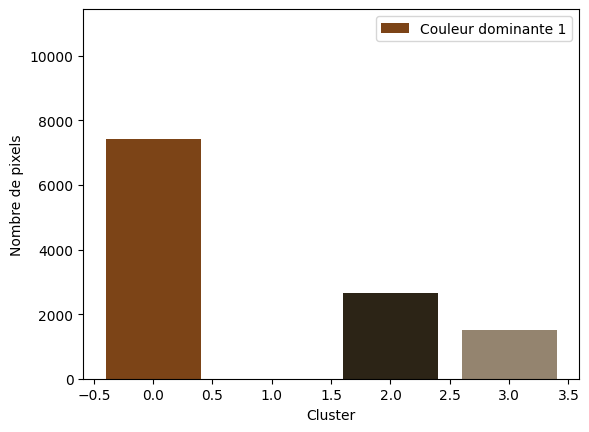

DataFrame pour l'image im-187_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-183_im.png  170,117,41    33,27,21
im-184_im.png   149,44,16    45,27,21
im-185_im.png  232,168,78    57,44,30
im-186_im.png    41,30,14  182,119,31
im-187_im.png   124,68,23    44,36,22

[187 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.95272694 17.09454818 24.57470366]
   Code couleur RGB: [0.3568009  0.18841122 0.08705783]
   Nombre de pixels: 4305

Cluster 2:
   Code couleur Lab: [ 9.86312585e+01 -2.41139457e-02  1.74578122e+00]
   Code couleur RGB: [0.99042161 0.98400146 0.97128093]
   Nombre de pixels: 13032

Cluster 3:
   Code couleur Lab: [54.37812141 37.16890055 57.30701546]
   Code couleur RGB: [0.80469603 0.39506218 0.09268132]
   Nombre de pixels: 5001

Cluster 4:
   Code couleur Lab: [ 46.3058889   74.23556589 -84.47613314]
   Code couleur RGB: [0.56092771 0.20220241 1.        ]
   Nombre de pixels: 162



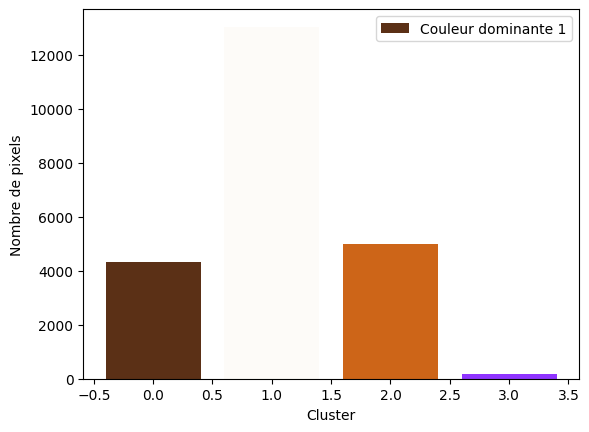

DataFrame pour l'image im-188_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-184_im.png   149,44,16    45,27,21
im-185_im.png  232,168,78    57,44,30
im-186_im.png    41,30,14  182,119,31
im-187_im.png   124,68,23    44,36,22
im-188_im.png  205,101,24    91,48,22

[188 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.20900709 14.89813166 50.64238765]
   Code couleur RGB: [0.62601769 0.41484484 0.09089656]
   Nombre de pixels: 6623

Cluster 2:
   Code couleur Lab: [ 9.96197560e+01 -2.27818482e-01 -2.79577767e-02]
   Code couleur RGB: [0.9937314  0.99623537 0.99589479]
   Nombre de pixels: 13140

Cluster 3:
   Code couleur Lab: [ 49.46520693  63.88215328 -79.2753205 ]
   Code couleur RGB: [0.55022217 0.29725749 1.        ]
   Nombre de pixels: 1296

Cluster 4:
   Code couleur Lab: [17.51093122  4.74166362 12.52132196]
   Code couleur RGB: [0.21644794 0.1571268  0.0987117 ]
   Nombre de pixels: 1441



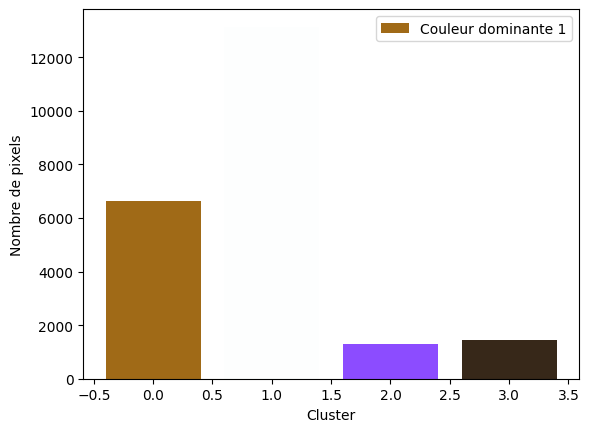

DataFrame pour l'image im-189_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-185_im.png  232,168,78    57,44,30
im-186_im.png    41,30,14  182,119,31
im-187_im.png   124,68,23    44,36,22
im-188_im.png  205,101,24    91,48,22
im-189_im.png  160,106,23    55,40,25

[189 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.73237616 -4.04592866 21.91517549]
   Code couleur RGB: [0.24814862 0.23390366 0.09677217]
   Nombre de pixels: 4279

Cluster 2:
   Code couleur Lab: [9.95221159e+01 1.58056208e-02 4.68951255e-01]
   Code couleur RGB: [0.99637214 0.99438758 0.99105165]
   Nombre de pixels: 13276

Cluster 3:
   Code couleur Lab: [  35.40895155   74.09687116 -102.63289313]
   Code couleur RGB: [0.18423671 0.11403805 1.        ]
   Nombre de pixels: 508

Cluster 4:
   Code couleur Lab: [54.46659053 21.25193561 47.2043006 ]
   Code couleur RGB: [0.71751562 0.44906807 0.18204923]
   Nombre de pixels: 4437



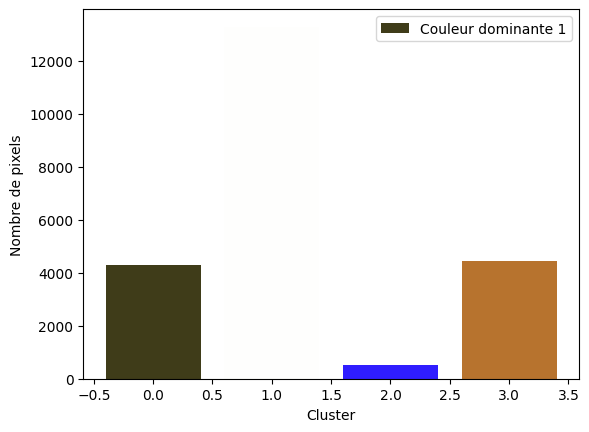

DataFrame pour l'image im-190_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-186_im.png    41,30,14  182,119,31
im-187_im.png   124,68,23    44,36,22
im-188_im.png  205,101,24    91,48,22
im-189_im.png  160,106,23    55,40,25
im-190_im.png  183,115,46    63,60,25

[190 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [23.38442146  2.58658665  5.43829526]
   Code couleur RGB: [0.24638116 0.21231394 0.18719937]
   Nombre de pixels: 4110

Cluster 2:
   Code couleur Lab: [98.28399175  0.19112557  1.17262837]
   Code couleur RGB: [0.98621315 0.97971344 0.97172135]
   Nombre de pixels: 13364

Cluster 3:
   Code couleur Lab: [67.70983005 22.54413908 61.18403489]
   Code couleur RGB: [0.89195565 0.57758656 0.18930637]
   Nombre de pixels: 4771

Cluster 4:
   Code couleur Lab: [ 66.70710928  57.7552452  -51.06968371]
   Code couleur RGB: [0.8551445  0.48129542 1.        ]
   Nombre de pixels: 255



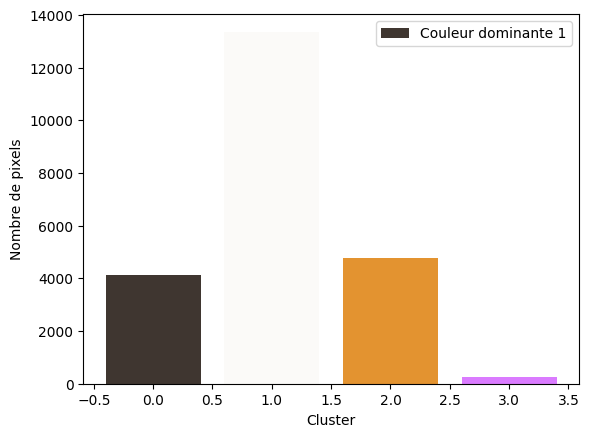

DataFrame pour l'image im-191_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-187_im.png   124,68,23   44,36,22
im-188_im.png  205,101,24   91,48,22
im-189_im.png  160,106,23   55,40,25
im-190_im.png  183,115,46   63,60,25
im-191_im.png  227,147,48   63,54,48

[191 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [17.61990524  9.39700719  1.24255088]
   Code couleur RGB: [0.22300512 0.15007383 0.16350327]
   Nombre de pixels: 1446

Cluster 2:
   Code couleur Lab: [ 9.95629143e+01 -6.11651690e-02  1.03930134e-01]
   Code couleur RGB: [0.99491168 0.99514625 0.99427213]
   Nombre de pixels: 15904

Cluster 3:
   Code couleur Lab: [68.32633394 25.0412512  14.56855178]
   Code couleur RGB: [0.85569254 0.58484031 0.55508822]
   Nombre de pixels: 2149

Cluster 4:
   Code couleur Lab: [50.2292898  51.54525245 49.17196077]
   Code couleur RGB: [0.82008947 0.29043033 0.14177511]
   Nombre de pixels: 3001



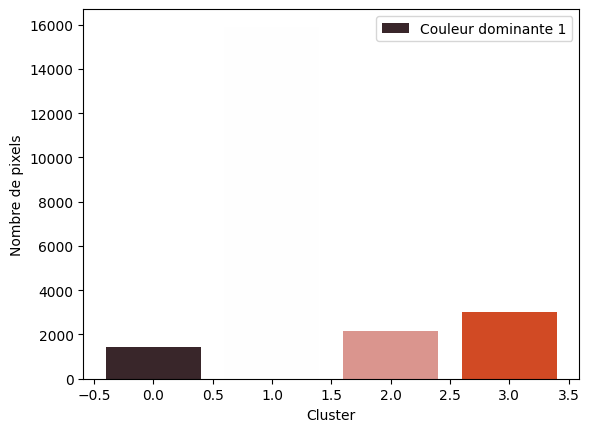

DataFrame pour l'image im-192_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-188_im.png  205,101,24     91,48,22
im-189_im.png  160,106,23     55,40,25
im-190_im.png  183,115,46     63,60,25
im-191_im.png  227,147,48     63,54,48
im-192_im.png   209,74,36  218,149,142

[192 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.62112556 -0.20982081  0.41899278]
   Code couleur RGB: [0.98414416 0.98472669 0.98118247]
   Nombre de pixels: 12423

Cluster 2:
   Code couleur Lab: [38.33364916 27.93222578 37.16971293]
   Code couleur RGB: [0.55976841 0.27408819 0.11562193]
   Nombre de pixels: 7295

Cluster 3:
   Code couleur Lab: [ 41.57947613  76.15754801 -92.24220146]
   Code couleur RGB: [0.45666616 0.14142085 1.        ]
   Nombre de pixels: 796

Cluster 4:
   Code couleur Lab: [11.44842352  0.72310398  5.88554257]
   Code couleur RGB: [0.13513043 0.11677697 0.08792942]
   Nombre de pixels: 1986



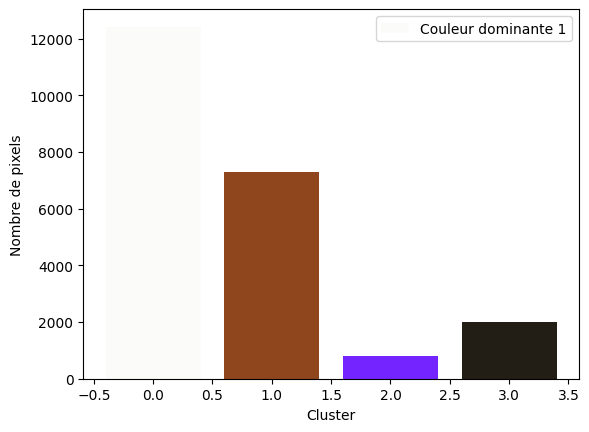

DataFrame pour l'image im-193_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-189_im.png  160,106,23     55,40,25
im-190_im.png  183,115,46     63,60,25
im-191_im.png  227,147,48     63,54,48
im-192_im.png   209,74,36  218,149,142
im-193_im.png   143,70,29     34,30,22

[193 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.83814656e+01  1.66361068e-01 -4.89235192e-02]
   Code couleur RGB: [0.98280674 0.98123885 0.98206006]
   Nombre de pixels: 13521

Cluster 2:
   Code couleur Lab: [50.5804926   8.51874467 47.0786529 ]
   Code couleur RGB: [0.60471801 0.44461488 0.13825677]
   Nombre de pixels: 6378

Cluster 3:
   Code couleur Lab: [18.01377543 -4.92210694  4.02328913]
   Code couleur RGB: [0.15289581 0.18014932 0.14957908]
   Nombre de pixels: 2293

Cluster 4:
   Code couleur Lab: [ 39.50359896  77.77222785 -95.77644872]
   Code couleur RGB: [0.41043587 0.10246336 1.        ]
   Nombre de pixels: 308



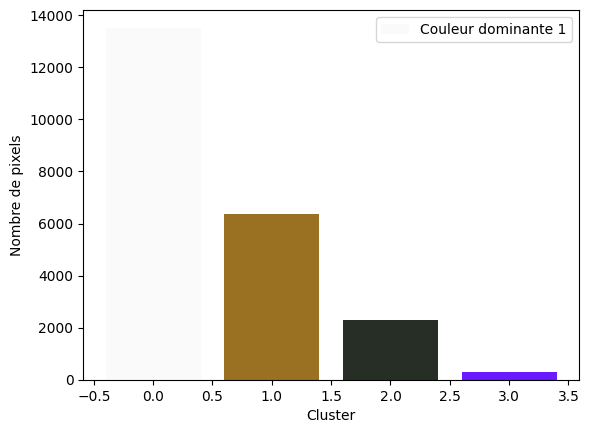

DataFrame pour l'image im-194_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-190_im.png  183,115,46     63,60,25
im-191_im.png  227,147,48     63,54,48
im-192_im.png   209,74,36  218,149,142
im-193_im.png   143,70,29     34,30,22
im-194_im.png  154,113,35     39,46,38

[194 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98799990e+01 -1.69481301e-02  2.00768686e-01]
   Code couleur RGB: [0.99921905 0.99861271 0.99714562]
   Nombre de pixels: 15146

Cluster 2:
   Code couleur Lab: [50.53509792 47.19656952 57.85720122]
   Code couleur RGB: [0.80680083 0.31421567 0.04747146]
   Nombre de pixels: 4770

Cluster 3:
   Code couleur Lab: [ 46.27851767  77.13501138 -84.4738011 ]
   Code couleur RGB: [0.5837185 0.1759356 1.       ]
   Nombre de pixels: 906

Cluster 4:
   Code couleur Lab: [18.7209323  13.30816115 20.71984052]
   Code couleur RGB: [0.2748449  0.14619559 0.06006646]
   Nombre de pixels: 1678



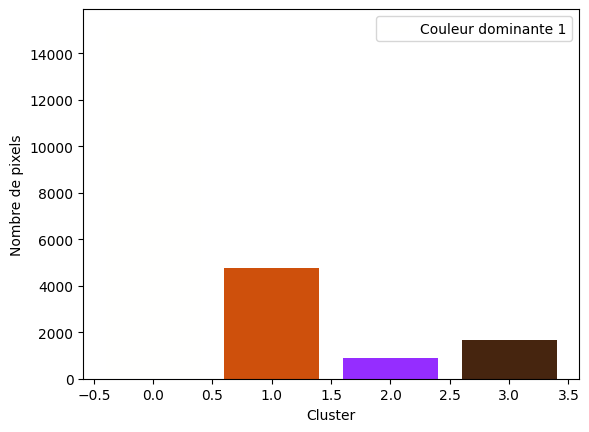

DataFrame pour l'image im-195_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-191_im.png  227,147,48     63,54,48
im-192_im.png   209,74,36  218,149,142
im-193_im.png   143,70,29     34,30,22
im-194_im.png  154,113,35     39,46,38
im-195_im.png   206,80,12     70,37,15

[195 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.71821413 -0.2188316   0.29179001]
   Code couleur RGB: [0.99606682 0.99723707 0.99458892]
   Nombre de pixels: 16296

Cluster 2:
   Code couleur Lab: [16.72429488  9.99985172 18.77662977]
   Code couleur RGB: [0.23984869 0.13821281 0.05407476]
   Nombre de pixels: 1782

Cluster 3:
   Code couleur Lab: [ 37.89968525  75.57746588 -98.43081677]
   Code couleur RGB: [0.33106203 0.11605106 1.        ]
   Nombre de pixels: 1172

Cluster 4:
   Code couleur Lab: [42.64839251 35.10379708 45.90515468]
   Code couleur RGB: [0.64832366 0.28820955 0.08571884]
   Nombre de pixels: 3250



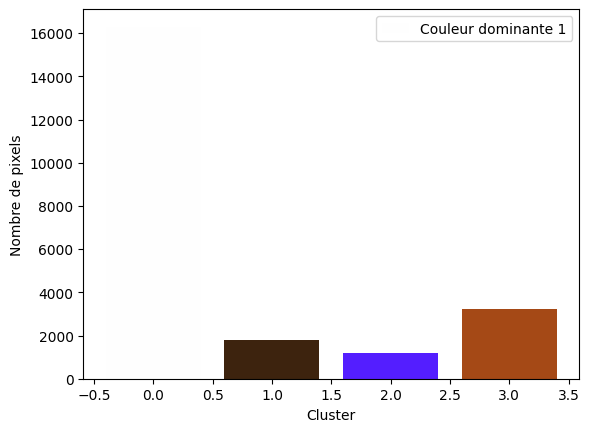

DataFrame pour l'image im-196_im.png:
              ElytraColor    SpotColor
im-001_im.png  202,135,58    133,71,20
im-002_im.png  192,124,51     82,78,76
im-003_im.png   177,83,50     70,55,39
im-004_im.png  180,117,27     54,39,21
im-005_im.png   192,80,47     69,50,33
...                   ...          ...
im-192_im.png   209,74,36  218,149,142
im-193_im.png   143,70,29     34,30,22
im-194_im.png  154,113,35     39,46,38
im-195_im.png   206,80,12     70,37,15
im-196_im.png   165,73,22     61,35,14

[196 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.31978336 -0.34251169  0.74691307]
   Code couleur RGB: [0.99215892 0.99287658 0.98659864]
   Nombre de pixels: 16069

Cluster 2:
   Code couleur Lab: [ 8.08452579 -0.03987774  6.54715728]
   Code couleur RGB: [0.10734519 0.09160856 0.05191623]
   Nombre de pixels: 4209

Cluster 3:
   Code couleur Lab: [43.97485063 56.4150216  52.9413232 ]
   Code couleur RGB: [0.76640313 0.1890947  0.0450923 ]
   Nombre de pixels: 1228

Cluster 4:
   Code couleur Lab: [  35.41031304   78.66384536 -102.6243837 ]
   Code couleur RGB: [0.26816176 0.04346221 1.        ]
   Nombre de pixels: 994



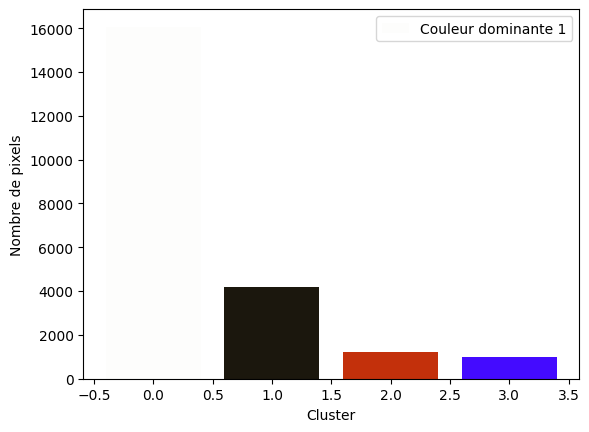

DataFrame pour l'image im-197_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-193_im.png   143,70,29   34,30,22
im-194_im.png  154,113,35   39,46,38
im-195_im.png   206,80,12   70,37,15
im-196_im.png   165,73,22   61,35,14
im-197_im.png    27,23,13  195,48,11

[197 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.96127564e+01 2.75430586e-02 1.58809453e-01]
   Code couleur RGB: [0.99639336 0.9954807  0.99443435]
   Nombre de pixels: 14231

Cluster 2:
   Code couleur Lab: [13.30783986  8.73135366  3.18597695]
   Code couleur RGB: [0.18530662 0.11606642 0.11787053]
   Nombre de pixels: 2411

Cluster 3:
   Code couleur Lab: [38.14333153 42.82101631 39.23084117]
   Code couleur RGB: [0.6279037  0.21020776 0.10599013]
   Nombre de pixels: 5007

Cluster 4:
   Code couleur Lab: [58.52507354  8.17899415  5.1284983 ]
   Code couleur RGB: [0.62272818 0.53178905 0.51810327]
   Nombre de pixels: 851



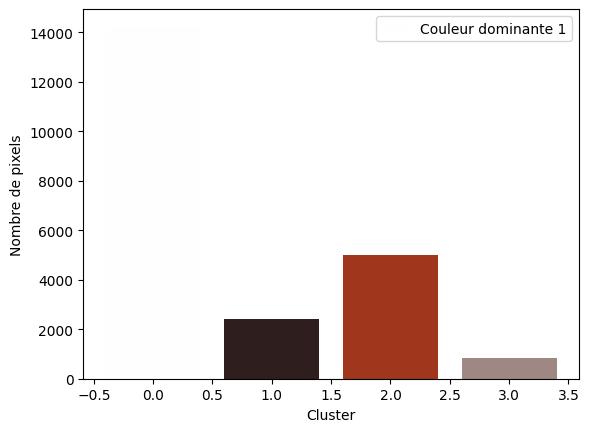

DataFrame pour l'image im-198_im.png:
              ElytraColor  SpotColor
im-001_im.png  202,135,58  133,71,20
im-002_im.png  192,124,51   82,78,76
im-003_im.png   177,83,50   70,55,39
im-004_im.png  180,117,27   54,39,21
im-005_im.png   192,80,47   69,50,33
...                   ...        ...
im-194_im.png  154,113,35   39,46,38
im-195_im.png   206,80,12   70,37,15
im-196_im.png   165,73,22   61,35,14
im-197_im.png    27,23,13  195,48,11
im-198_im.png   160,54,27   47,30,30

[198 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.02888835  0.32508532  0.54953874]
   Code couleur RGB: [0.98221249 0.97668422 0.97356592]
   Nombre de pixels: 12391

Cluster 2:
   Code couleur Lab: [ 8.34296449 -0.94108264  0.08093296]
   Code couleur RGB: [0.08979613 0.09635282 0.0943474 ]
   Nombre de pixels: 6631

Cluster 3:
   Code couleur Lab: [70.30482657 14.03378603 45.16894416]
   Code couleur RGB: [0.85911923 0.63018237 0.34998306]
   Nombre de pixels: 2600

Cluster 4:
   Code couleur Lab: [ 50.59720066  19.64089305 -48.05719813]
   Code couleur RGB: [0.39115714 0.44525228 0.79502637]
   Nombre de pixels: 878



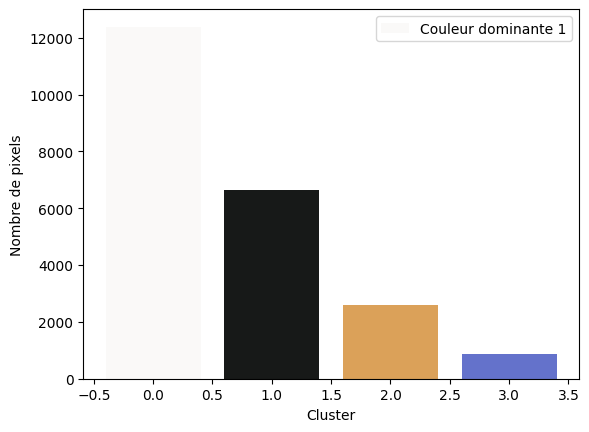

DataFrame pour l'image im-199_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-195_im.png   206,80,12    70,37,15
im-196_im.png   165,73,22    61,35,14
im-197_im.png    27,23,13   195,48,11
im-198_im.png   160,54,27    47,30,30
im-199_im.png    23,25,24  219,161,89

[199 rows x 2 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.95039269e+01 -1.67553380e-02  5.34159184e-01]
   Code couleur RGB: [0.99613332 0.99424073 0.9903462 ]
   Nombre de pixels: 12707

Cluster 2:
   Code couleur Lab: [21.50642796 16.77964566 21.92318597]
   Code couleur RGB: [0.31852848 0.1599815  0.07641806]
   Nombre de pixels: 4018

Cluster 3:
   Code couleur Lab: [ 47.43304855  78.42007679 -82.53183165]
   Code couleur RGB: [0.61993652 0.17461336 1.        ]
   Nombre de pixels: 1120

Cluster 4:
   Code couleur Lab: [49.00795608 48.99161434 56.79512747]
   Code couleur RGB: [0.79597678 0.28963305 0.04501677]
   Nombre de pixels: 4655



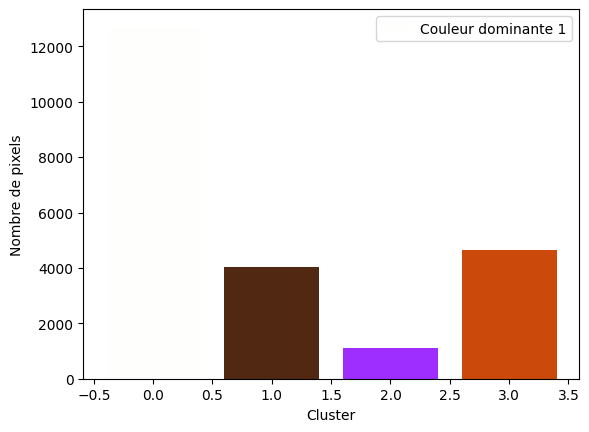

DataFrame pour l'image im-200_im.png:
              ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-196_im.png   165,73,22    61,35,14
im-197_im.png    27,23,13   195,48,11
im-198_im.png   160,54,27    47,30,30
im-199_im.png    23,25,24  219,161,89
im-200_im.png   203,74,11    81,41,19

[200 rows x 2 columns]
--------------------------------------


In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

def plot_color_histogram(image, image_id, df):
    lab_image = color.rgb2lab(image)
    resized_image = lab_image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(resized_image)

    labels = kmeans.labels_
    counts = np.bincount(labels)

    cluster_colors_lab = kmeans.cluster_centers_
    cluster_colors_rgb = [color.lab2rgb([[clr]])[0][0] for clr in cluster_colors_lab]

    sorted_indices = np.argsort(counts)[::-1]

    elytra_color = cluster_colors_rgb[sorted_indices[1]]
    spot_color = cluster_colors_rgb[sorted_indices[2]]

    # Multiply the values by 255 and convert to string representation
    elytra_color_str = ",".join([str(int(round(val * 255))) for val in elytra_color])
    spot_color_str = ",".join([str(int(round(val * 255))) for val in spot_color])

    df.loc[image_id, 'ElytraColor'] = elytra_color_str
    df.loc[image_id, 'SpotColor'] = spot_color_str
    #df['Image_id'] = image_id

    for i, clr in enumerate(cluster_colors_rgb):
        print(f"Cluster {i+1}:")
        print(f"   Code couleur Lab: {cluster_colors_lab[i]}")
        print(f"   Code couleur RGB: {clr}")
        print(f"   Nombre de pixels: {counts[i]}")
        print()

    fig, ax = plt.subplots()
    ax.bar(range(len(counts)), counts, color=cluster_colors_rgb)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Nombre de pixels')
    legend_labels = [f'Couleur dominante {i+1}' for i in range(len(cluster_colors_rgb))]
    ax.legend(legend_labels, loc='upper right')
    plt.show()

    return df

df_colors = pd.DataFrame(columns=['ElytraColor', 'SpotColor'])

for k in range(1, 201):
    try:
        image = io.imread(f'No_Background_Image/im-{k:03}_im.png')
        image_id = f'im-{k:03}_im.png'
        df_colors = plot_color_histogram(image, image_id, df_colors)
        print(f"DataFrame pour l'image {image_id}:")
        print(df_colors)
        print("--------------------------------------")
    except FileNotFoundError:
        print(f"Erreur : Fichier im-{k:03}_im.png non trouvé.")


In [ ]:
df_colors

ElytraColor   SpotColor
im-001_im.png  202,135,58   133,71,20
im-002_im.png  192,124,51    82,78,76
im-003_im.png   177,83,50    70,55,39
im-004_im.png  180,117,27    54,39,21
im-005_im.png   192,80,47    69,50,33
...                   ...         ...
im-196_im.png   165,73,22    61,35,14
im-197_im.png    27,23,13   195,48,11
im-198_im.png   160,54,27    47,30,30
im-199_im.png    23,25,24  219,161,89
im-200_im.png   203,74,11    81,41,19

[200 rows x 2 columns]

In [ ]:
df_colors['SpotColor'] = df_colors['SpotColor'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])
df_colors['ElytraColor'] = df_colors['ElytraColor'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])
df_colors

ElytraColor       SpotColor
im-001_im.png  [202, 135, 58]   [133, 71, 20]
im-002_im.png  [192, 124, 51]    [82, 78, 76]
im-003_im.png   [177, 83, 50]    [70, 55, 39]
im-004_im.png  [180, 117, 27]    [54, 39, 21]
im-005_im.png   [192, 80, 47]    [69, 50, 33]
...                       ...             ...
im-196_im.png   [165, 73, 22]    [61, 35, 14]
im-197_im.png    [27, 23, 13]   [195, 48, 11]
im-198_im.png   [160, 54, 27]    [47, 30, 30]
im-199_im.png    [23, 25, 24]  [219, 161, 89]
im-200_im.png   [203, 74, 11]    [81, 41, 19]

[200 rows x 2 columns]

In [ ]:
base_colors = {
    'orange': [71.27, 27.58, 77.7],
    'yellow': [97.14, -21.57, 94.48],
    'black': [0, 0 ,0],
    'red': [53.23, 80.11, 67.22]
}

In [ ]:
def get_color(rgb):
    closest_color = None
    min_distance = float('inf')

    for color, values in base_colors.items():
        distance = sum([(a - b) ** 2 for a, b in zip(rgb, values)]) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_color = color

    return closest_color


In [ ]:
df_colors['ElytraColorName'] = df_colors['ElytraColor'].apply(get_color)
#df_colors['SpotColorName'] = df_colors['SpotColor'].apply(get_color) car non fonctionnel avec Spot
df_colors

ElytraColor       SpotColor ElytraColorName
im-001_im.png  [202, 135, 58]   [133, 71, 20]             red
im-002_im.png  [192, 124, 51]    [82, 78, 76]             red
im-003_im.png   [177, 83, 50]    [70, 55, 39]          orange
im-004_im.png  [180, 117, 27]    [54, 39, 21]             red
im-005_im.png   [192, 80, 47]    [69, 50, 33]          orange
...                       ...             ...             ...
im-196_im.png   [165, 73, 22]    [61, 35, 14]          orange
im-197_im.png    [27, 23, 13]   [195, 48, 11]           black
im-198_im.png   [160, 54, 27]    [47, 30, 30]          orange
im-199_im.png    [23, 25, 24]  [219, 161, 89]           black
im-200_im.png   [203, 74, 11]    [81, 41, 19]          orange

[200 rows x 3 columns]

In [ ]:
df_colors.reset_index().rename(columns={'index': 'Image_id'}).style


In [ ]:
df_elytra_color = df_colors.reset_index().rename(columns={'index': 'Image_id'}).style
type(df_elytra_color)

pandas.io.formats.style.Styler

In [ ]:
df_original = df_elytra_color.data  # Convert Styler object back to DataFrame
df_original.head(15)

Image_id     ElytraColor       SpotColor ElytraColorName
0   im-001_im.png  [202, 135, 58]   [133, 71, 20]             red
1   im-002_im.png  [192, 124, 51]    [82, 78, 76]             red
2   im-003_im.png   [177, 83, 50]    [70, 55, 39]          orange
3   im-004_im.png  [180, 117, 27]    [54, 39, 21]             red
4   im-005_im.png   [192, 80, 47]    [69, 50, 33]          orange
5   im-006_im.png  [150, 100, 23]    [38, 37, 19]             red
6   im-007_im.png  [221, 113, 50]   [106, 94, 67]             red
7   im-008_im.png    [25, 21, 14]  [205, 109, 19]           black
8   im-009_im.png  [197, 138, 51]    [71, 57, 31]             red
9   im-010_im.png  [225, 165, 86]   [127, 95, 80]             red
10  im-011_im.png   [178, 68, 30]    [67, 59, 65]          orange
11  im-012_im.png   [218, 96, 21]    [66, 43, 17]          orange
12  im-013_im.png   [161, 64, 37]    [74, 57, 45]          orange
13  im-014_im.png   [208, 82, 14]    [46, 24, 14]          orange
14  im-015_im.png   [102, 59, 25]  [186, 124, 77]             red

In [ ]:
df_original.to_csv('elytraColor.csv', index=False)


## 3. Data Exploration

Construire un Dataframe avec notamment comme colonnes : "*Image_ID", "SpotCounting", "ElytraColor", "SpotColor*"


Data exploration (corrélation entre les features, Data visualisation)

## 4. ML training 

## 4.1 Algorithme Spot counting

## 4.2 Algorithme pour la classification 

Appliquer notre algo pour déterminer la classe : application d’un arbre décisionnel en fonction de nos Features de chaque image => résultant à une colonne "*Label*" (qui renvoie 0: Europe 1 : Asiatique)

## 5. Récupération du CSV final

CSV type, Comparaison avec le DataFrame manuel

## 6. Évaluation de notre modèle

Entraînement de notre modèle ML & afficher les performances du modèle (Accuracy, F1 score, …)



---



# **Phase Test**

## Comptage du nombre de point

## Classification

## Performance finale



---



# **BONUS :** Une nouvelle approche (Deep Learning)